In [2]:
import pandas as pd
import numpy as np
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

## Load the data

In [3]:
df = pd.read_csv('../cleaned_data/ISAT.csv', index_col='Date', parse_dates=True)
df.head()

,7 DAYS MA,14 DAYS MA,21 DAYS MA,7 DAYS STD DEV,RSI 7,RSI 14,RSI 21,MFI 7,MFI 14,MFI 21,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,Close
Date,,,,,,,,,,,,,,,,,,
2012-10-17,0.759710,0.604458,0.595933,0.242258,1.073993,0.336948,0.195283,0.418518,1.067216,0.074403,0.008923,1.34241,1.016593,-1.845348,1.033444,0.147246,1.030312,0.865115
2012-10-18,0.799685,0.635721,0.597431,-0.312385,0.806786,0.206638,0.098052,0.304528,0.918634,0.133079,0.716706,1.34241,1.016593,-1.845348,1.042927,0.261864,1.030312,0.834181
2012-10-19,0.808568,0.664751,0.597431,-0.297827,0.806786,0.206638,0.098052,-0.471880,0.973428,0.288599,1.424489,1.34241,1.016593,-1.845348,1.052410,0.376483,1.030312,0.834181
2012-10-22,0.804127,0.700480,0.607911,-0.381060,1.262253,0.576726,0.392023,0.072030,0.933544,0.944165,-1.406643,1.34241,1.016593,-1.845348,1.080859,0.720337,1.096678,0.926983
2012-10-23,0.821893,0.736209,0.633364,-0.038690,0.946168,0.427620,0.284938,0.419894,0.917644,1.321251,-0.698860,1.34241,1.016593,-1.845348,1.090342,0.834955,1.096678,0.896049


### Plot the Close price - our target

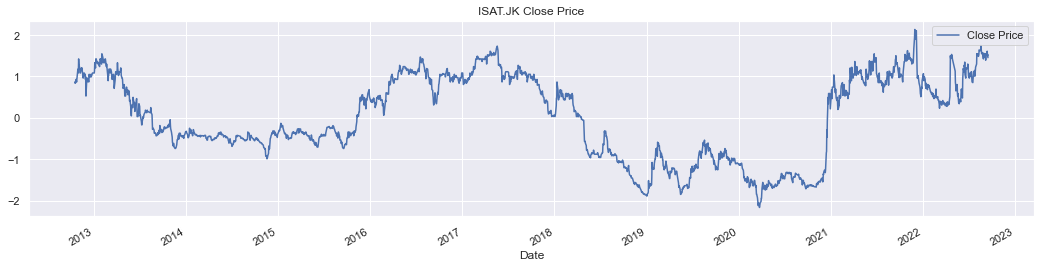

In [4]:
df['Close'].plot(figsize=(18,4))
plt.legend(['Close Price'])
plt.title('ISAT.JK Close Price')
plt.show()

### Split the data
- Split the data into independent variables and target variable
- Split the data into train and test set (80:20)

In [5]:
train_len = int(len(df)*.8)
train_dataset = df[:train_len]
test_dataset = df[train_len:len(df)]

In [6]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('Close')
test_labels = test_features.pop('Close')

## Modeling

### Grid Search to find the best combination of hyperparameters

In [7]:
# ================
# XGBoost regression: 
# Parameters: 
# n_estimators  "Number of gradient boosted trees. Equivalent to number 
#                of boosting rounds."
# learning_rate "Boosting learning rate (also known as “eta”)"
# max_depth     "Maximum depth of a tree. Increasing this value will make 
#                the model more complex and more likely to overfit." 
#=========================================================================
regressor = xgb.XGBRegressor(eval_metric='rmse')

#=========================================================================
# exhaustively search for the optimal hyperparameters
#=========================================================================
from sklearn.model_selection import GridSearchCV
# set up our search grid
param_grid = {"max_depth":    [3, 4, 5],
              "n_estimators": [500, 600, 700, 1000],
              "learning_rate": [0.01, 0.015],
              "base_score": [0.5],
              "booster": ["gbtree"],
              "early_stopping_rounds": [50]}

# try out every combination of the above values
search = GridSearchCV(regressor, param_grid, cv=5).fit(train_features, train_labels, eval_set=[(train_features, train_labels)])

[0]	validation_0-rmse:1.14705
[1]	validation_0-rmse:1.13579
[2]	validation_0-rmse:1.12463
[3]	validation_0-rmse:1.11360
[4]	validation_0-rmse:1.10267
[5]	validation_0-rmse:1.09185
[6]	validation_0-rmse:1.08114
[7]	validation_0-rmse:1.07055
[8]	validation_0-rmse:1.06005
[9]	validation_0-rmse:1.04967
[10]	validation_0-rmse:1.03940
[11]	validation_0-rmse:1.02921
[12]	validation_0-rmse:1.01915
[13]	validation_0-rmse:1.00918
[14]	validation_0-rmse:0.99932
[15]	validation_0-rmse:0.98955
[16]	validation_0-rmse:0.97988
[17]	validation_0-rmse:0.97031
[18]	validation_0-rmse:0.96083
[19]	validation_0-rmse:0.95145
[20]	validation_0-rmse:0.94215
[21]	validation_0-rmse:0.93296
[22]	validation_0-rmse:0.92386
[23]	validation_0-rmse:0.91485
[24]	validation_0-rmse:0.90593
[25]	validation_0-rmse:0.89709
[26]	validation_0-rmse:0.88836
[27]	validation_0-rmse:0.87970
[28]	validation_0-rmse:0.87114
[29]	validation_0-rmse:0.86267
[30]	validation_0-rmse:0.85427
[31]	validation_0-rmse:0.84597
[32]	validation_0-

[260]	validation_0-rmse:0.11568
[261]	validation_0-rmse:0.11493
[262]	validation_0-rmse:0.11417
[263]	validation_0-rmse:0.11343
[264]	validation_0-rmse:0.11270
[265]	validation_0-rmse:0.11199
[266]	validation_0-rmse:0.11128
[267]	validation_0-rmse:0.11057
[268]	validation_0-rmse:0.10987
[269]	validation_0-rmse:0.10919
[270]	validation_0-rmse:0.10852
[271]	validation_0-rmse:0.10784
[272]	validation_0-rmse:0.10717
[273]	validation_0-rmse:0.10651
[274]	validation_0-rmse:0.10587
[275]	validation_0-rmse:0.10522
[276]	validation_0-rmse:0.10459
[277]	validation_0-rmse:0.10397
[278]	validation_0-rmse:0.10334
[279]	validation_0-rmse:0.10273
[280]	validation_0-rmse:0.10212
[281]	validation_0-rmse:0.10153
[282]	validation_0-rmse:0.10093
[283]	validation_0-rmse:0.10034
[284]	validation_0-rmse:0.09978
[285]	validation_0-rmse:0.09920
[286]	validation_0-rmse:0.09864
[287]	validation_0-rmse:0.09810
[288]	validation_0-rmse:0.09754
[289]	validation_0-rmse:0.09701
[290]	validation_0-rmse:0.09646
[291]	va

[16]	validation_0-rmse:0.97953
[17]	validation_0-rmse:0.96996
[18]	validation_0-rmse:0.96044
[19]	validation_0-rmse:0.95107
[20]	validation_0-rmse:0.94178
[21]	validation_0-rmse:0.93255
[22]	validation_0-rmse:0.92345
[23]	validation_0-rmse:0.91453
[24]	validation_0-rmse:0.90558
[25]	validation_0-rmse:0.89675
[26]	validation_0-rmse:0.88800
[27]	validation_0-rmse:0.87932
[28]	validation_0-rmse:0.87085
[29]	validation_0-rmse:0.86237
[30]	validation_0-rmse:0.85407
[31]	validation_0-rmse:0.84571
[32]	validation_0-rmse:0.83749
[33]	validation_0-rmse:0.82935
[34]	validation_0-rmse:0.82124
[35]	validation_0-rmse:0.81327
[36]	validation_0-rmse:0.80533
[37]	validation_0-rmse:0.79760
[38]	validation_0-rmse:0.78986
[39]	validation_0-rmse:0.78216
[40]	validation_0-rmse:0.77457
[41]	validation_0-rmse:0.76715
[42]	validation_0-rmse:0.75968
[43]	validation_0-rmse:0.75232
[44]	validation_0-rmse:0.74500
[45]	validation_0-rmse:0.73779
[46]	validation_0-rmse:0.73065
[47]	validation_0-rmse:0.72354
[48]	val

[275]	validation_0-rmse:0.10201
[276]	validation_0-rmse:0.10134
[277]	validation_0-rmse:0.10073
[278]	validation_0-rmse:0.10010
[279]	validation_0-rmse:0.09948
[280]	validation_0-rmse:0.09884
[281]	validation_0-rmse:0.09822
[282]	validation_0-rmse:0.09763
[283]	validation_0-rmse:0.09701
[284]	validation_0-rmse:0.09641
[285]	validation_0-rmse:0.09582
[286]	validation_0-rmse:0.09525
[287]	validation_0-rmse:0.09468
[288]	validation_0-rmse:0.09409
[289]	validation_0-rmse:0.09354
[290]	validation_0-rmse:0.09297
[291]	validation_0-rmse:0.09243
[292]	validation_0-rmse:0.09189
[293]	validation_0-rmse:0.09135
[294]	validation_0-rmse:0.09084
[295]	validation_0-rmse:0.09031
[296]	validation_0-rmse:0.08980
[297]	validation_0-rmse:0.08928
[298]	validation_0-rmse:0.08878
[299]	validation_0-rmse:0.08827
[300]	validation_0-rmse:0.08779
[301]	validation_0-rmse:0.08730
[302]	validation_0-rmse:0.08683
[303]	validation_0-rmse:0.08636
[304]	validation_0-rmse:0.08590
[305]	validation_0-rmse:0.08542
[306]	va

[33]	validation_0-rmse:0.83253
[34]	validation_0-rmse:0.82454
[35]	validation_0-rmse:0.81658
[36]	validation_0-rmse:0.80875
[37]	validation_0-rmse:0.80101
[38]	validation_0-rmse:0.79339
[39]	validation_0-rmse:0.78580
[40]	validation_0-rmse:0.77823
[41]	validation_0-rmse:0.77079
[42]	validation_0-rmse:0.76344
[43]	validation_0-rmse:0.75620
[44]	validation_0-rmse:0.74899
[45]	validation_0-rmse:0.74179
[46]	validation_0-rmse:0.73471
[47]	validation_0-rmse:0.72770
[48]	validation_0-rmse:0.72076
[49]	validation_0-rmse:0.71395
[50]	validation_0-rmse:0.70715
[51]	validation_0-rmse:0.70042
[52]	validation_0-rmse:0.69376
[53]	validation_0-rmse:0.68718
[54]	validation_0-rmse:0.68069
[55]	validation_0-rmse:0.67423
[56]	validation_0-rmse:0.66788
[57]	validation_0-rmse:0.66156
[58]	validation_0-rmse:0.65530
[59]	validation_0-rmse:0.64911
[60]	validation_0-rmse:0.64292
[61]	validation_0-rmse:0.63684
[62]	validation_0-rmse:0.63085
[63]	validation_0-rmse:0.62494
[64]	validation_0-rmse:0.61905
[65]	val

[292]	validation_0-rmse:0.11172
[293]	validation_0-rmse:0.11128
[294]	validation_0-rmse:0.11081
[295]	validation_0-rmse:0.11029
[296]	validation_0-rmse:0.10978
[297]	validation_0-rmse:0.10934
[298]	validation_0-rmse:0.10885
[299]	validation_0-rmse:0.10835
[300]	validation_0-rmse:0.10791
[301]	validation_0-rmse:0.10750
[302]	validation_0-rmse:0.10702
[303]	validation_0-rmse:0.10661
[304]	validation_0-rmse:0.10620
[305]	validation_0-rmse:0.10575
[306]	validation_0-rmse:0.10536
[307]	validation_0-rmse:0.10496
[308]	validation_0-rmse:0.10458
[309]	validation_0-rmse:0.10422
[310]	validation_0-rmse:0.10377
[311]	validation_0-rmse:0.10341
[312]	validation_0-rmse:0.10297
[313]	validation_0-rmse:0.10255
[314]	validation_0-rmse:0.10212
[315]	validation_0-rmse:0.10172
[316]	validation_0-rmse:0.10133
[317]	validation_0-rmse:0.10092
[318]	validation_0-rmse:0.10059
[319]	validation_0-rmse:0.10020
[320]	validation_0-rmse:0.09984
[321]	validation_0-rmse:0.09944
[322]	validation_0-rmse:0.09911
[323]	va

[50]	validation_0-rmse:0.70627
[51]	validation_0-rmse:0.69950
[52]	validation_0-rmse:0.69280
[53]	validation_0-rmse:0.68618
[54]	validation_0-rmse:0.67960
[55]	validation_0-rmse:0.67313
[56]	validation_0-rmse:0.66669
[57]	validation_0-rmse:0.66032
[58]	validation_0-rmse:0.65400
[59]	validation_0-rmse:0.64775
[60]	validation_0-rmse:0.64157
[61]	validation_0-rmse:0.63544
[62]	validation_0-rmse:0.62937
[63]	validation_0-rmse:0.62336
[64]	validation_0-rmse:0.61743
[65]	validation_0-rmse:0.61155
[66]	validation_0-rmse:0.60573
[67]	validation_0-rmse:0.59996
[68]	validation_0-rmse:0.59423
[69]	validation_0-rmse:0.58859
[70]	validation_0-rmse:0.58300
[71]	validation_0-rmse:0.57747
[72]	validation_0-rmse:0.57199
[73]	validation_0-rmse:0.56656
[74]	validation_0-rmse:0.56121
[75]	validation_0-rmse:0.55590
[76]	validation_0-rmse:0.55063
[77]	validation_0-rmse:0.54541
[78]	validation_0-rmse:0.54025
[79]	validation_0-rmse:0.53515
[80]	validation_0-rmse:0.53012
[81]	validation_0-rmse:0.52515
[82]	val

[308]	validation_0-rmse:0.08565
[309]	validation_0-rmse:0.08525
[310]	validation_0-rmse:0.08482
[311]	validation_0-rmse:0.08442
[312]	validation_0-rmse:0.08402
[313]	validation_0-rmse:0.08361
[314]	validation_0-rmse:0.08323
[315]	validation_0-rmse:0.08286
[316]	validation_0-rmse:0.08246
[317]	validation_0-rmse:0.08210
[318]	validation_0-rmse:0.08172
[319]	validation_0-rmse:0.08134
[320]	validation_0-rmse:0.08098
[321]	validation_0-rmse:0.08062
[322]	validation_0-rmse:0.08026
[323]	validation_0-rmse:0.07990
[324]	validation_0-rmse:0.07956
[325]	validation_0-rmse:0.07920
[326]	validation_0-rmse:0.07888
[327]	validation_0-rmse:0.07855
[328]	validation_0-rmse:0.07822
[329]	validation_0-rmse:0.07790
[330]	validation_0-rmse:0.07757
[331]	validation_0-rmse:0.07726
[332]	validation_0-rmse:0.07695
[333]	validation_0-rmse:0.07665
[334]	validation_0-rmse:0.07637
[335]	validation_0-rmse:0.07605
[336]	validation_0-rmse:0.07578
[337]	validation_0-rmse:0.07549
[338]	validation_0-rmse:0.07519
[339]	va

[67]	validation_0-rmse:0.60212
[68]	validation_0-rmse:0.59636
[69]	validation_0-rmse:0.59066
[70]	validation_0-rmse:0.58518
[71]	validation_0-rmse:0.57959
[72]	validation_0-rmse:0.57418
[73]	validation_0-rmse:0.56882
[74]	validation_0-rmse:0.56340
[75]	validation_0-rmse:0.55808
[76]	validation_0-rmse:0.55288
[77]	validation_0-rmse:0.54762
[78]	validation_0-rmse:0.54253
[79]	validation_0-rmse:0.53748
[80]	validation_0-rmse:0.53244
[81]	validation_0-rmse:0.52750
[82]	validation_0-rmse:0.52265
[83]	validation_0-rmse:0.51770
[84]	validation_0-rmse:0.51285
[85]	validation_0-rmse:0.50813
[86]	validation_0-rmse:0.50348
[87]	validation_0-rmse:0.49888
[88]	validation_0-rmse:0.49430
[89]	validation_0-rmse:0.48964
[90]	validation_0-rmse:0.48515
[91]	validation_0-rmse:0.48073
[92]	validation_0-rmse:0.47634
[93]	validation_0-rmse:0.47198
[94]	validation_0-rmse:0.46769
[95]	validation_0-rmse:0.46334
[96]	validation_0-rmse:0.45915
[97]	validation_0-rmse:0.45489
[98]	validation_0-rmse:0.45077
[99]	val

[325]	validation_0-rmse:0.09862
[326]	validation_0-rmse:0.09821
[327]	validation_0-rmse:0.09792
[328]	validation_0-rmse:0.09752
[329]	validation_0-rmse:0.09723
[330]	validation_0-rmse:0.09684
[331]	validation_0-rmse:0.09639
[332]	validation_0-rmse:0.09603
[333]	validation_0-rmse:0.09575
[334]	validation_0-rmse:0.09538
[335]	validation_0-rmse:0.09495
[336]	validation_0-rmse:0.09458
[337]	validation_0-rmse:0.09431
[338]	validation_0-rmse:0.09397
[339]	validation_0-rmse:0.09355
[340]	validation_0-rmse:0.09330
[341]	validation_0-rmse:0.09289
[342]	validation_0-rmse:0.09255
[343]	validation_0-rmse:0.09216
[344]	validation_0-rmse:0.09182
[345]	validation_0-rmse:0.09142
[346]	validation_0-rmse:0.09119
[347]	validation_0-rmse:0.09085
[348]	validation_0-rmse:0.09062
[349]	validation_0-rmse:0.09024
[350]	validation_0-rmse:0.08992
[351]	validation_0-rmse:0.08969
[352]	validation_0-rmse:0.08938
[353]	validation_0-rmse:0.08901
[354]	validation_0-rmse:0.08870
[355]	validation_0-rmse:0.08849
[356]	va

[84]	validation_0-rmse:0.50723
[85]	validation_0-rmse:0.50242
[86]	validation_0-rmse:0.49769
[87]	validation_0-rmse:0.49299
[88]	validation_0-rmse:0.48832
[89]	validation_0-rmse:0.48372
[90]	validation_0-rmse:0.47919
[91]	validation_0-rmse:0.47467
[92]	validation_0-rmse:0.47021
[93]	validation_0-rmse:0.46579
[94]	validation_0-rmse:0.46143
[95]	validation_0-rmse:0.45709
[96]	validation_0-rmse:0.45283
[97]	validation_0-rmse:0.44859
[98]	validation_0-rmse:0.44442
[99]	validation_0-rmse:0.44029
[100]	validation_0-rmse:0.43616
[101]	validation_0-rmse:0.43209
[102]	validation_0-rmse:0.42807
[103]	validation_0-rmse:0.42406
[104]	validation_0-rmse:0.42010
[105]	validation_0-rmse:0.41621
[106]	validation_0-rmse:0.41233
[107]	validation_0-rmse:0.40852
[108]	validation_0-rmse:0.40471
[109]	validation_0-rmse:0.40096
[110]	validation_0-rmse:0.39724
[111]	validation_0-rmse:0.39351
[112]	validation_0-rmse:0.38986
[113]	validation_0-rmse:0.38622
[114]	validation_0-rmse:0.38261
[115]	validation_0-rmse:

[341]	validation_0-rmse:0.07542
[342]	validation_0-rmse:0.07511
[343]	validation_0-rmse:0.07481
[344]	validation_0-rmse:0.07451
[345]	validation_0-rmse:0.07422
[346]	validation_0-rmse:0.07393
[347]	validation_0-rmse:0.07364
[348]	validation_0-rmse:0.07334
[349]	validation_0-rmse:0.07306
[350]	validation_0-rmse:0.07277
[351]	validation_0-rmse:0.07250
[352]	validation_0-rmse:0.07223
[353]	validation_0-rmse:0.07196
[354]	validation_0-rmse:0.07169
[355]	validation_0-rmse:0.07143
[356]	validation_0-rmse:0.07116
[357]	validation_0-rmse:0.07091
[358]	validation_0-rmse:0.07067
[359]	validation_0-rmse:0.07041
[360]	validation_0-rmse:0.07016
[361]	validation_0-rmse:0.06991
[362]	validation_0-rmse:0.06967
[363]	validation_0-rmse:0.06942
[364]	validation_0-rmse:0.06919
[365]	validation_0-rmse:0.06896
[366]	validation_0-rmse:0.06873
[367]	validation_0-rmse:0.06850
[368]	validation_0-rmse:0.06827
[369]	validation_0-rmse:0.06803
[370]	validation_0-rmse:0.06782
[371]	validation_0-rmse:0.06761
[372]	va

[598]	validation_0-rmse:0.04670
[599]	validation_0-rmse:0.04667
[0]	validation_0-rmse:1.14702
[1]	validation_0-rmse:1.13572
[2]	validation_0-rmse:1.12454
[3]	validation_0-rmse:1.11347
[4]	validation_0-rmse:1.10252
[5]	validation_0-rmse:1.09170
[6]	validation_0-rmse:1.08097
[7]	validation_0-rmse:1.07038
[8]	validation_0-rmse:1.05986
[9]	validation_0-rmse:1.04948
[10]	validation_0-rmse:1.03917
[11]	validation_0-rmse:1.02899
[12]	validation_0-rmse:1.01889
[13]	validation_0-rmse:1.00888
[14]	validation_0-rmse:0.99901
[15]	validation_0-rmse:0.98924
[16]	validation_0-rmse:0.97953
[17]	validation_0-rmse:0.96996
[18]	validation_0-rmse:0.96044
[19]	validation_0-rmse:0.95107
[20]	validation_0-rmse:0.94178
[21]	validation_0-rmse:0.93255
[22]	validation_0-rmse:0.92345
[23]	validation_0-rmse:0.91453
[24]	validation_0-rmse:0.90558
[25]	validation_0-rmse:0.89675
[26]	validation_0-rmse:0.88800
[27]	validation_0-rmse:0.87932
[28]	validation_0-rmse:0.87085
[29]	validation_0-rmse:0.86237
[30]	validation_

[258]	validation_0-rmse:0.11425
[259]	validation_0-rmse:0.11348
[260]	validation_0-rmse:0.11269
[261]	validation_0-rmse:0.11195
[262]	validation_0-rmse:0.11117
[263]	validation_0-rmse:0.11041
[264]	validation_0-rmse:0.10968
[265]	validation_0-rmse:0.10894
[266]	validation_0-rmse:0.10821
[267]	validation_0-rmse:0.10752
[268]	validation_0-rmse:0.10680
[269]	validation_0-rmse:0.10611
[270]	validation_0-rmse:0.10538
[271]	validation_0-rmse:0.10470
[272]	validation_0-rmse:0.10402
[273]	validation_0-rmse:0.10332
[274]	validation_0-rmse:0.10267
[275]	validation_0-rmse:0.10201
[276]	validation_0-rmse:0.10134
[277]	validation_0-rmse:0.10073
[278]	validation_0-rmse:0.10010
[279]	validation_0-rmse:0.09948
[280]	validation_0-rmse:0.09884
[281]	validation_0-rmse:0.09822
[282]	validation_0-rmse:0.09763
[283]	validation_0-rmse:0.09701
[284]	validation_0-rmse:0.09641
[285]	validation_0-rmse:0.09582
[286]	validation_0-rmse:0.09525
[287]	validation_0-rmse:0.09468
[288]	validation_0-rmse:0.09409
[289]	va

[515]	validation_0-rmse:0.04623
[516]	validation_0-rmse:0.04618
[517]	validation_0-rmse:0.04611
[518]	validation_0-rmse:0.04605
[519]	validation_0-rmse:0.04599
[520]	validation_0-rmse:0.04593
[521]	validation_0-rmse:0.04588
[522]	validation_0-rmse:0.04582
[523]	validation_0-rmse:0.04575
[524]	validation_0-rmse:0.04569
[525]	validation_0-rmse:0.04565
[526]	validation_0-rmse:0.04558
[527]	validation_0-rmse:0.04552
[528]	validation_0-rmse:0.04546
[529]	validation_0-rmse:0.04541
[530]	validation_0-rmse:0.04536
[531]	validation_0-rmse:0.04531
[532]	validation_0-rmse:0.04525
[533]	validation_0-rmse:0.04520
[534]	validation_0-rmse:0.04514
[535]	validation_0-rmse:0.04508
[536]	validation_0-rmse:0.04504
[537]	validation_0-rmse:0.04499
[538]	validation_0-rmse:0.04493
[539]	validation_0-rmse:0.04489
[540]	validation_0-rmse:0.04485
[541]	validation_0-rmse:0.04479
[542]	validation_0-rmse:0.04474
[543]	validation_0-rmse:0.04469
[544]	validation_0-rmse:0.04465
[545]	validation_0-rmse:0.04460
[546]	va

[175]	validation_0-rmse:0.23200
[176]	validation_0-rmse:0.23019
[177]	validation_0-rmse:0.22835
[178]	validation_0-rmse:0.22658
[179]	validation_0-rmse:0.22486
[180]	validation_0-rmse:0.22314
[181]	validation_0-rmse:0.22137
[182]	validation_0-rmse:0.21967
[183]	validation_0-rmse:0.21799
[184]	validation_0-rmse:0.21633
[185]	validation_0-rmse:0.21463
[186]	validation_0-rmse:0.21301
[187]	validation_0-rmse:0.21135
[188]	validation_0-rmse:0.20976
[189]	validation_0-rmse:0.20819
[190]	validation_0-rmse:0.20658
[191]	validation_0-rmse:0.20504
[192]	validation_0-rmse:0.20353
[193]	validation_0-rmse:0.20203
[194]	validation_0-rmse:0.20057
[195]	validation_0-rmse:0.19904
[196]	validation_0-rmse:0.19759
[197]	validation_0-rmse:0.19614
[198]	validation_0-rmse:0.19467
[199]	validation_0-rmse:0.19327
[200]	validation_0-rmse:0.19188
[201]	validation_0-rmse:0.19054
[202]	validation_0-rmse:0.18918
[203]	validation_0-rmse:0.18777
[204]	validation_0-rmse:0.18639
[205]	validation_0-rmse:0.18508
[206]	va

[432]	validation_0-rmse:0.07756
[433]	validation_0-rmse:0.07748
[434]	validation_0-rmse:0.07732
[435]	validation_0-rmse:0.07718
[436]	validation_0-rmse:0.07711
[437]	validation_0-rmse:0.07695
[438]	validation_0-rmse:0.07687
[439]	validation_0-rmse:0.07672
[440]	validation_0-rmse:0.07659
[441]	validation_0-rmse:0.07645
[442]	validation_0-rmse:0.07636
[443]	validation_0-rmse:0.07626
[444]	validation_0-rmse:0.07613
[445]	validation_0-rmse:0.07598
[446]	validation_0-rmse:0.07590
[447]	validation_0-rmse:0.07584
[448]	validation_0-rmse:0.07572
[449]	validation_0-rmse:0.07557
[450]	validation_0-rmse:0.07548
[451]	validation_0-rmse:0.07534
[452]	validation_0-rmse:0.07526
[453]	validation_0-rmse:0.07520
[454]	validation_0-rmse:0.07507
[455]	validation_0-rmse:0.07500
[456]	validation_0-rmse:0.07494
[457]	validation_0-rmse:0.07487
[458]	validation_0-rmse:0.07474
[459]	validation_0-rmse:0.07467
[460]	validation_0-rmse:0.07461
[461]	validation_0-rmse:0.07452
[462]	validation_0-rmse:0.07439
[463]	va

[92]	validation_0-rmse:0.47334
[93]	validation_0-rmse:0.46893
[94]	validation_0-rmse:0.46454
[95]	validation_0-rmse:0.46024
[96]	validation_0-rmse:0.45590
[97]	validation_0-rmse:0.45166
[98]	validation_0-rmse:0.44745
[99]	validation_0-rmse:0.44328
[100]	validation_0-rmse:0.43919
[101]	validation_0-rmse:0.43513
[102]	validation_0-rmse:0.43105
[103]	validation_0-rmse:0.42709
[104]	validation_0-rmse:0.42309
[105]	validation_0-rmse:0.41917
[106]	validation_0-rmse:0.41525
[107]	validation_0-rmse:0.41137
[108]	validation_0-rmse:0.40757
[109]	validation_0-rmse:0.40377
[110]	validation_0-rmse:0.39999
[111]	validation_0-rmse:0.39624
[112]	validation_0-rmse:0.39255
[113]	validation_0-rmse:0.38898
[114]	validation_0-rmse:0.38534
[115]	validation_0-rmse:0.38176
[116]	validation_0-rmse:0.37823
[117]	validation_0-rmse:0.37470
[118]	validation_0-rmse:0.37119
[119]	validation_0-rmse:0.36779
[120]	validation_0-rmse:0.36442
[121]	validation_0-rmse:0.36102
[122]	validation_0-rmse:0.35769
[123]	validation

[349]	validation_0-rmse:0.07233
[350]	validation_0-rmse:0.07208
[351]	validation_0-rmse:0.07183
[352]	validation_0-rmse:0.07162
[353]	validation_0-rmse:0.07139
[354]	validation_0-rmse:0.07116
[355]	validation_0-rmse:0.07095
[356]	validation_0-rmse:0.07072
[357]	validation_0-rmse:0.07052
[358]	validation_0-rmse:0.07029
[359]	validation_0-rmse:0.07009
[360]	validation_0-rmse:0.06990
[361]	validation_0-rmse:0.06967
[362]	validation_0-rmse:0.06948
[363]	validation_0-rmse:0.06926
[364]	validation_0-rmse:0.06907
[365]	validation_0-rmse:0.06887
[366]	validation_0-rmse:0.06869
[367]	validation_0-rmse:0.06849
[368]	validation_0-rmse:0.06831
[369]	validation_0-rmse:0.06813
[370]	validation_0-rmse:0.06798
[371]	validation_0-rmse:0.06779
[372]	validation_0-rmse:0.06760
[373]	validation_0-rmse:0.06739
[374]	validation_0-rmse:0.06721
[375]	validation_0-rmse:0.06704
[376]	validation_0-rmse:0.06687
[377]	validation_0-rmse:0.06672
[378]	validation_0-rmse:0.06655
[379]	validation_0-rmse:0.06640
[380]	va

[6]	validation_0-rmse:1.08190
[7]	validation_0-rmse:1.07140
[8]	validation_0-rmse:1.06101
[9]	validation_0-rmse:1.05072
[10]	validation_0-rmse:1.04055
[11]	validation_0-rmse:1.03046
[12]	validation_0-rmse:1.02050
[13]	validation_0-rmse:1.01061
[14]	validation_0-rmse:1.00084
[15]	validation_0-rmse:0.99115
[16]	validation_0-rmse:0.98158
[17]	validation_0-rmse:0.97209
[18]	validation_0-rmse:0.96270
[19]	validation_0-rmse:0.95339
[20]	validation_0-rmse:0.94420
[21]	validation_0-rmse:0.93508
[22]	validation_0-rmse:0.92607
[23]	validation_0-rmse:0.91715
[24]	validation_0-rmse:0.90830
[25]	validation_0-rmse:0.89952
[26]	validation_0-rmse:0.89086
[27]	validation_0-rmse:0.88240
[28]	validation_0-rmse:0.87391
[29]	validation_0-rmse:0.86556
[30]	validation_0-rmse:0.85722
[31]	validation_0-rmse:0.84902
[32]	validation_0-rmse:0.84090
[33]	validation_0-rmse:0.83289
[34]	validation_0-rmse:0.82488
[35]	validation_0-rmse:0.81705
[36]	validation_0-rmse:0.80930
[37]	validation_0-rmse:0.80164
[38]	validat

[266]	validation_0-rmse:0.12951
[267]	validation_0-rmse:0.12886
[268]	validation_0-rmse:0.12820
[269]	validation_0-rmse:0.12754
[270]	validation_0-rmse:0.12683
[271]	validation_0-rmse:0.12622
[272]	validation_0-rmse:0.12559
[273]	validation_0-rmse:0.12497
[274]	validation_0-rmse:0.12439
[275]	validation_0-rmse:0.12376
[276]	validation_0-rmse:0.12314
[277]	validation_0-rmse:0.12246
[278]	validation_0-rmse:0.12186
[279]	validation_0-rmse:0.12125
[280]	validation_0-rmse:0.12058
[281]	validation_0-rmse:0.12006
[282]	validation_0-rmse:0.11946
[283]	validation_0-rmse:0.11893
[284]	validation_0-rmse:0.11835
[285]	validation_0-rmse:0.11778
[286]	validation_0-rmse:0.11715
[287]	validation_0-rmse:0.11649
[288]	validation_0-rmse:0.11601
[289]	validation_0-rmse:0.11546
[290]	validation_0-rmse:0.11496
[291]	validation_0-rmse:0.11441
[292]	validation_0-rmse:0.11391
[293]	validation_0-rmse:0.11332
[294]	validation_0-rmse:0.11279
[295]	validation_0-rmse:0.11238
[296]	validation_0-rmse:0.11185
[297]	va

[523]	validation_0-rmse:0.06321
[524]	validation_0-rmse:0.06314
[525]	validation_0-rmse:0.06309
[526]	validation_0-rmse:0.06302
[527]	validation_0-rmse:0.06298
[528]	validation_0-rmse:0.06290
[529]	validation_0-rmse:0.06283
[530]	validation_0-rmse:0.06278
[531]	validation_0-rmse:0.06270
[532]	validation_0-rmse:0.06263
[533]	validation_0-rmse:0.06257
[534]	validation_0-rmse:0.06247
[535]	validation_0-rmse:0.06243
[536]	validation_0-rmse:0.06236
[537]	validation_0-rmse:0.06226
[538]	validation_0-rmse:0.06221
[539]	validation_0-rmse:0.06214
[540]	validation_0-rmse:0.06208
[541]	validation_0-rmse:0.06204
[542]	validation_0-rmse:0.06196
[543]	validation_0-rmse:0.06189
[544]	validation_0-rmse:0.06182
[545]	validation_0-rmse:0.06176
[546]	validation_0-rmse:0.06169
[547]	validation_0-rmse:0.06165
[548]	validation_0-rmse:0.06159
[549]	validation_0-rmse:0.06153
[550]	validation_0-rmse:0.06148
[551]	validation_0-rmse:0.06139
[552]	validation_0-rmse:0.06135
[553]	validation_0-rmse:0.06128
[554]	va

[183]	validation_0-rmse:0.20685
[184]	validation_0-rmse:0.20513
[185]	validation_0-rmse:0.20341
[186]	validation_0-rmse:0.20172
[187]	validation_0-rmse:0.20006
[188]	validation_0-rmse:0.19840
[189]	validation_0-rmse:0.19676
[190]	validation_0-rmse:0.19515
[191]	validation_0-rmse:0.19355
[192]	validation_0-rmse:0.19198
[193]	validation_0-rmse:0.19038
[194]	validation_0-rmse:0.18884
[195]	validation_0-rmse:0.18729
[196]	validation_0-rmse:0.18575
[197]	validation_0-rmse:0.18426
[198]	validation_0-rmse:0.18277
[199]	validation_0-rmse:0.18130
[200]	validation_0-rmse:0.17986
[201]	validation_0-rmse:0.17840
[202]	validation_0-rmse:0.17699
[203]	validation_0-rmse:0.17556
[204]	validation_0-rmse:0.17417
[205]	validation_0-rmse:0.17281
[206]	validation_0-rmse:0.17144
[207]	validation_0-rmse:0.17009
[208]	validation_0-rmse:0.16876
[209]	validation_0-rmse:0.16744
[210]	validation_0-rmse:0.16615
[211]	validation_0-rmse:0.16483
[212]	validation_0-rmse:0.16357
[213]	validation_0-rmse:0.16230
[214]	va

[440]	validation_0-rmse:0.05643
[441]	validation_0-rmse:0.05632
[442]	validation_0-rmse:0.05620
[443]	validation_0-rmse:0.05608
[444]	validation_0-rmse:0.05599
[445]	validation_0-rmse:0.05588
[446]	validation_0-rmse:0.05578
[447]	validation_0-rmse:0.05566
[448]	validation_0-rmse:0.05554
[449]	validation_0-rmse:0.05545
[450]	validation_0-rmse:0.05535
[451]	validation_0-rmse:0.05526
[452]	validation_0-rmse:0.05516
[453]	validation_0-rmse:0.05505
[454]	validation_0-rmse:0.05494
[455]	validation_0-rmse:0.05485
[456]	validation_0-rmse:0.05476
[457]	validation_0-rmse:0.05466
[458]	validation_0-rmse:0.05457
[459]	validation_0-rmse:0.05447
[460]	validation_0-rmse:0.05438
[461]	validation_0-rmse:0.05429
[462]	validation_0-rmse:0.05419
[463]	validation_0-rmse:0.05410
[464]	validation_0-rmse:0.05400
[465]	validation_0-rmse:0.05392
[466]	validation_0-rmse:0.05383
[467]	validation_0-rmse:0.05374
[468]	validation_0-rmse:0.05365
[469]	validation_0-rmse:0.05358
[470]	validation_0-rmse:0.05348
[471]	va

[697]	validation_0-rmse:0.04433
[698]	validation_0-rmse:0.04430
[699]	validation_0-rmse:0.04429
[0]	validation_0-rmse:1.14702
[1]	validation_0-rmse:1.13572
[2]	validation_0-rmse:1.12454
[3]	validation_0-rmse:1.11347
[4]	validation_0-rmse:1.10252
[5]	validation_0-rmse:1.09170
[6]	validation_0-rmse:1.08097
[7]	validation_0-rmse:1.07038
[8]	validation_0-rmse:1.05986
[9]	validation_0-rmse:1.04948
[10]	validation_0-rmse:1.03917
[11]	validation_0-rmse:1.02899
[12]	validation_0-rmse:1.01889
[13]	validation_0-rmse:1.00888
[14]	validation_0-rmse:0.99901
[15]	validation_0-rmse:0.98924
[16]	validation_0-rmse:0.97953
[17]	validation_0-rmse:0.96996
[18]	validation_0-rmse:0.96044
[19]	validation_0-rmse:0.95107
[20]	validation_0-rmse:0.94178
[21]	validation_0-rmse:0.93255
[22]	validation_0-rmse:0.92345
[23]	validation_0-rmse:0.91453
[24]	validation_0-rmse:0.90558
[25]	validation_0-rmse:0.89675
[26]	validation_0-rmse:0.88800
[27]	validation_0-rmse:0.87932
[28]	validation_0-rmse:0.87085
[29]	validation

[257]	validation_0-rmse:0.11507
[258]	validation_0-rmse:0.11425
[259]	validation_0-rmse:0.11348
[260]	validation_0-rmse:0.11269
[261]	validation_0-rmse:0.11195
[262]	validation_0-rmse:0.11117
[263]	validation_0-rmse:0.11041
[264]	validation_0-rmse:0.10968
[265]	validation_0-rmse:0.10894
[266]	validation_0-rmse:0.10821
[267]	validation_0-rmse:0.10752
[268]	validation_0-rmse:0.10680
[269]	validation_0-rmse:0.10611
[270]	validation_0-rmse:0.10538
[271]	validation_0-rmse:0.10470
[272]	validation_0-rmse:0.10402
[273]	validation_0-rmse:0.10332
[274]	validation_0-rmse:0.10267
[275]	validation_0-rmse:0.10201
[276]	validation_0-rmse:0.10134
[277]	validation_0-rmse:0.10073
[278]	validation_0-rmse:0.10010
[279]	validation_0-rmse:0.09948
[280]	validation_0-rmse:0.09884
[281]	validation_0-rmse:0.09822
[282]	validation_0-rmse:0.09763
[283]	validation_0-rmse:0.09701
[284]	validation_0-rmse:0.09641
[285]	validation_0-rmse:0.09582
[286]	validation_0-rmse:0.09525
[287]	validation_0-rmse:0.09468
[288]	va

[514]	validation_0-rmse:0.04629
[515]	validation_0-rmse:0.04623
[516]	validation_0-rmse:0.04618
[517]	validation_0-rmse:0.04611
[518]	validation_0-rmse:0.04605
[519]	validation_0-rmse:0.04599
[520]	validation_0-rmse:0.04593
[521]	validation_0-rmse:0.04588
[522]	validation_0-rmse:0.04582
[523]	validation_0-rmse:0.04575
[524]	validation_0-rmse:0.04569
[525]	validation_0-rmse:0.04565
[526]	validation_0-rmse:0.04558
[527]	validation_0-rmse:0.04552
[528]	validation_0-rmse:0.04546
[529]	validation_0-rmse:0.04541
[530]	validation_0-rmse:0.04536
[531]	validation_0-rmse:0.04531
[532]	validation_0-rmse:0.04525
[533]	validation_0-rmse:0.04520
[534]	validation_0-rmse:0.04514
[535]	validation_0-rmse:0.04508
[536]	validation_0-rmse:0.04504
[537]	validation_0-rmse:0.04499
[538]	validation_0-rmse:0.04493
[539]	validation_0-rmse:0.04489
[540]	validation_0-rmse:0.04485
[541]	validation_0-rmse:0.04479
[542]	validation_0-rmse:0.04474
[543]	validation_0-rmse:0.04469
[544]	validation_0-rmse:0.04465
[545]	va

[73]	validation_0-rmse:0.56851
[74]	validation_0-rmse:0.56321
[75]	validation_0-rmse:0.55795
[76]	validation_0-rmse:0.55278
[77]	validation_0-rmse:0.54765
[78]	validation_0-rmse:0.54258
[79]	validation_0-rmse:0.53753
[80]	validation_0-rmse:0.53258
[81]	validation_0-rmse:0.52763
[82]	validation_0-rmse:0.52273
[83]	validation_0-rmse:0.51793
[84]	validation_0-rmse:0.51313
[85]	validation_0-rmse:0.50839
[86]	validation_0-rmse:0.50369
[87]	validation_0-rmse:0.49904
[88]	validation_0-rmse:0.49438
[89]	validation_0-rmse:0.48982
[90]	validation_0-rmse:0.48531
[91]	validation_0-rmse:0.48085
[92]	validation_0-rmse:0.47647
[93]	validation_0-rmse:0.47209
[94]	validation_0-rmse:0.46771
[95]	validation_0-rmse:0.46343
[96]	validation_0-rmse:0.45923
[97]	validation_0-rmse:0.45503
[98]	validation_0-rmse:0.45082
[99]	validation_0-rmse:0.44671
[100]	validation_0-rmse:0.44260
[101]	validation_0-rmse:0.43857
[102]	validation_0-rmse:0.43458
[103]	validation_0-rmse:0.43064
[104]	validation_0-rmse:0.42677
[10

[330]	validation_0-rmse:0.09641
[331]	validation_0-rmse:0.09613
[332]	validation_0-rmse:0.09579
[333]	validation_0-rmse:0.09545
[334]	validation_0-rmse:0.09512
[335]	validation_0-rmse:0.09480
[336]	validation_0-rmse:0.09453
[337]	validation_0-rmse:0.09426
[338]	validation_0-rmse:0.09396
[339]	validation_0-rmse:0.09364
[340]	validation_0-rmse:0.09338
[341]	validation_0-rmse:0.09308
[342]	validation_0-rmse:0.09278
[343]	validation_0-rmse:0.09252
[344]	validation_0-rmse:0.09228
[345]	validation_0-rmse:0.09198
[346]	validation_0-rmse:0.09169
[347]	validation_0-rmse:0.09144
[348]	validation_0-rmse:0.09116
[349]	validation_0-rmse:0.09089
[350]	validation_0-rmse:0.09066
[351]	validation_0-rmse:0.09038
[352]	validation_0-rmse:0.09009
[353]	validation_0-rmse:0.08988
[354]	validation_0-rmse:0.08962
[355]	validation_0-rmse:0.08940
[356]	validation_0-rmse:0.08919
[357]	validation_0-rmse:0.08899
[358]	validation_0-rmse:0.08875
[359]	validation_0-rmse:0.08849
[360]	validation_0-rmse:0.08830
[361]	va

[587]	validation_0-rmse:0.06734
[588]	validation_0-rmse:0.06731
[589]	validation_0-rmse:0.06727
[590]	validation_0-rmse:0.06721
[591]	validation_0-rmse:0.06718
[592]	validation_0-rmse:0.06715
[593]	validation_0-rmse:0.06712
[594]	validation_0-rmse:0.06706
[595]	validation_0-rmse:0.06704
[596]	validation_0-rmse:0.06701
[597]	validation_0-rmse:0.06694
[598]	validation_0-rmse:0.06692
[599]	validation_0-rmse:0.06686
[600]	validation_0-rmse:0.06681
[601]	validation_0-rmse:0.06678
[602]	validation_0-rmse:0.06674
[603]	validation_0-rmse:0.06672
[604]	validation_0-rmse:0.06666
[605]	validation_0-rmse:0.06663
[606]	validation_0-rmse:0.06661
[607]	validation_0-rmse:0.06655
[608]	validation_0-rmse:0.06654
[609]	validation_0-rmse:0.06651
[610]	validation_0-rmse:0.06648
[611]	validation_0-rmse:0.06645
[612]	validation_0-rmse:0.06638
[613]	validation_0-rmse:0.06637
[614]	validation_0-rmse:0.06630
[615]	validation_0-rmse:0.06628
[616]	validation_0-rmse:0.06624
[617]	validation_0-rmse:0.06618
[618]	va

[147]	validation_0-rmse:0.28404
[148]	validation_0-rmse:0.28147
[149]	validation_0-rmse:0.27899
[150]	validation_0-rmse:0.27648
[151]	validation_0-rmse:0.27402
[152]	validation_0-rmse:0.27144
[153]	validation_0-rmse:0.26905
[154]	validation_0-rmse:0.26652
[155]	validation_0-rmse:0.26414
[156]	validation_0-rmse:0.26177
[157]	validation_0-rmse:0.25933
[158]	validation_0-rmse:0.25706
[159]	validation_0-rmse:0.25478
[160]	validation_0-rmse:0.25252
[161]	validation_0-rmse:0.25018
[162]	validation_0-rmse:0.24798
[163]	validation_0-rmse:0.24578
[164]	validation_0-rmse:0.24361
[165]	validation_0-rmse:0.24147
[166]	validation_0-rmse:0.23937
[167]	validation_0-rmse:0.23716
[168]	validation_0-rmse:0.23511
[169]	validation_0-rmse:0.23306
[170]	validation_0-rmse:0.23103
[171]	validation_0-rmse:0.22904
[172]	validation_0-rmse:0.22696
[173]	validation_0-rmse:0.22502
[174]	validation_0-rmse:0.22309
[175]	validation_0-rmse:0.22117
[176]	validation_0-rmse:0.21917
[177]	validation_0-rmse:0.21730
[178]	va

[404]	validation_0-rmse:0.06302
[405]	validation_0-rmse:0.06293
[406]	validation_0-rmse:0.06283
[407]	validation_0-rmse:0.06271
[408]	validation_0-rmse:0.06259
[409]	validation_0-rmse:0.06248
[410]	validation_0-rmse:0.06240
[411]	validation_0-rmse:0.06229
[412]	validation_0-rmse:0.06218
[413]	validation_0-rmse:0.06207
[414]	validation_0-rmse:0.06199
[415]	validation_0-rmse:0.06189
[416]	validation_0-rmse:0.06181
[417]	validation_0-rmse:0.06170
[418]	validation_0-rmse:0.06159
[419]	validation_0-rmse:0.06149
[420]	validation_0-rmse:0.06138
[421]	validation_0-rmse:0.06129
[422]	validation_0-rmse:0.06122
[423]	validation_0-rmse:0.06112
[424]	validation_0-rmse:0.06103
[425]	validation_0-rmse:0.06093
[426]	validation_0-rmse:0.06084
[427]	validation_0-rmse:0.06074
[428]	validation_0-rmse:0.06064
[429]	validation_0-rmse:0.06055
[430]	validation_0-rmse:0.06049
[431]	validation_0-rmse:0.06040
[432]	validation_0-rmse:0.06035
[433]	validation_0-rmse:0.06026
[434]	validation_0-rmse:0.06019
[435]	va

[661]	validation_0-rmse:0.05305
[662]	validation_0-rmse:0.05304
[663]	validation_0-rmse:0.05302
[664]	validation_0-rmse:0.05301
[665]	validation_0-rmse:0.05300
[666]	validation_0-rmse:0.05298
[667]	validation_0-rmse:0.05297
[668]	validation_0-rmse:0.05295
[669]	validation_0-rmse:0.05294
[670]	validation_0-rmse:0.05293
[671]	validation_0-rmse:0.05293
[672]	validation_0-rmse:0.05291
[673]	validation_0-rmse:0.05290
[674]	validation_0-rmse:0.05289
[675]	validation_0-rmse:0.05289
[676]	validation_0-rmse:0.05288
[677]	validation_0-rmse:0.05288
[678]	validation_0-rmse:0.05287
[679]	validation_0-rmse:0.05287
[680]	validation_0-rmse:0.05286
[681]	validation_0-rmse:0.05282
[682]	validation_0-rmse:0.05281
[683]	validation_0-rmse:0.05281
[684]	validation_0-rmse:0.05279
[685]	validation_0-rmse:0.05278
[686]	validation_0-rmse:0.05275
[687]	validation_0-rmse:0.05274
[688]	validation_0-rmse:0.05273
[689]	validation_0-rmse:0.05272
[690]	validation_0-rmse:0.05272
[691]	validation_0-rmse:0.05271
[692]	va

[221]	validation_0-rmse:0.16991
[222]	validation_0-rmse:0.16895
[223]	validation_0-rmse:0.16783
[224]	validation_0-rmse:0.16672
[225]	validation_0-rmse:0.16556
[226]	validation_0-rmse:0.16463
[227]	validation_0-rmse:0.16342
[228]	validation_0-rmse:0.16249
[229]	validation_0-rmse:0.16130
[230]	validation_0-rmse:0.16025
[231]	validation_0-rmse:0.15935
[232]	validation_0-rmse:0.15848
[233]	validation_0-rmse:0.15740
[234]	validation_0-rmse:0.15641
[235]	validation_0-rmse:0.15536
[236]	validation_0-rmse:0.15426
[237]	validation_0-rmse:0.15334
[238]	validation_0-rmse:0.15243
[239]	validation_0-rmse:0.15149
[240]	validation_0-rmse:0.15059
[241]	validation_0-rmse:0.14979
[242]	validation_0-rmse:0.14891
[243]	validation_0-rmse:0.14788
[244]	validation_0-rmse:0.14711
[245]	validation_0-rmse:0.14622
[246]	validation_0-rmse:0.14526
[247]	validation_0-rmse:0.14444
[248]	validation_0-rmse:0.14348
[249]	validation_0-rmse:0.14267
[250]	validation_0-rmse:0.14182
[251]	validation_0-rmse:0.14092
[252]	va

[478]	validation_0-rmse:0.06680
[479]	validation_0-rmse:0.06673
[480]	validation_0-rmse:0.06662
[481]	validation_0-rmse:0.06652
[482]	validation_0-rmse:0.06644
[483]	validation_0-rmse:0.06634
[484]	validation_0-rmse:0.06624
[485]	validation_0-rmse:0.06615
[486]	validation_0-rmse:0.06605
[487]	validation_0-rmse:0.06599
[488]	validation_0-rmse:0.06588
[489]	validation_0-rmse:0.06582
[490]	validation_0-rmse:0.06572
[491]	validation_0-rmse:0.06565
[492]	validation_0-rmse:0.06556
[493]	validation_0-rmse:0.06550
[494]	validation_0-rmse:0.06541
[495]	validation_0-rmse:0.06535
[496]	validation_0-rmse:0.06525
[497]	validation_0-rmse:0.06519
[498]	validation_0-rmse:0.06509
[499]	validation_0-rmse:0.06501
[500]	validation_0-rmse:0.06496
[501]	validation_0-rmse:0.06485
[502]	validation_0-rmse:0.06479
[503]	validation_0-rmse:0.06470
[504]	validation_0-rmse:0.06465
[505]	validation_0-rmse:0.06454
[506]	validation_0-rmse:0.06444
[507]	validation_0-rmse:0.06438
[508]	validation_0-rmse:0.06430
[509]	va

[36]	validation_0-rmse:0.80569
[37]	validation_0-rmse:0.79787
[38]	validation_0-rmse:0.79014
[39]	validation_0-rmse:0.78247
[40]	validation_0-rmse:0.77489
[41]	validation_0-rmse:0.76739
[42]	validation_0-rmse:0.75994
[43]	validation_0-rmse:0.75258
[44]	validation_0-rmse:0.74532
[45]	validation_0-rmse:0.73810
[46]	validation_0-rmse:0.73099
[47]	validation_0-rmse:0.72391
[48]	validation_0-rmse:0.71691
[49]	validation_0-rmse:0.71000
[50]	validation_0-rmse:0.70315
[51]	validation_0-rmse:0.69637
[52]	validation_0-rmse:0.68965
[53]	validation_0-rmse:0.68301
[54]	validation_0-rmse:0.67642
[55]	validation_0-rmse:0.66992
[56]	validation_0-rmse:0.66349
[57]	validation_0-rmse:0.65710
[58]	validation_0-rmse:0.65080
[59]	validation_0-rmse:0.64454
[60]	validation_0-rmse:0.63837
[61]	validation_0-rmse:0.63224
[62]	validation_0-rmse:0.62618
[63]	validation_0-rmse:0.62019
[64]	validation_0-rmse:0.61425
[65]	validation_0-rmse:0.60837
[66]	validation_0-rmse:0.60256
[67]	validation_0-rmse:0.59680
[68]	val

[295]	validation_0-rmse:0.09387
[296]	validation_0-rmse:0.09335
[297]	validation_0-rmse:0.09286
[298]	validation_0-rmse:0.09236
[299]	validation_0-rmse:0.09186
[300]	validation_0-rmse:0.09139
[301]	validation_0-rmse:0.09090
[302]	validation_0-rmse:0.09042
[303]	validation_0-rmse:0.08993
[304]	validation_0-rmse:0.08947
[305]	validation_0-rmse:0.08902
[306]	validation_0-rmse:0.08857
[307]	validation_0-rmse:0.08812
[308]	validation_0-rmse:0.08769
[309]	validation_0-rmse:0.08724
[310]	validation_0-rmse:0.08680
[311]	validation_0-rmse:0.08637
[312]	validation_0-rmse:0.08594
[313]	validation_0-rmse:0.08553
[314]	validation_0-rmse:0.08511
[315]	validation_0-rmse:0.08472
[316]	validation_0-rmse:0.08431
[317]	validation_0-rmse:0.08391
[318]	validation_0-rmse:0.08352
[319]	validation_0-rmse:0.08311
[320]	validation_0-rmse:0.08273
[321]	validation_0-rmse:0.08234
[322]	validation_0-rmse:0.08196
[323]	validation_0-rmse:0.08158
[324]	validation_0-rmse:0.08120
[325]	validation_0-rmse:0.08082
[326]	va

[552]	validation_0-rmse:0.04844
[553]	validation_0-rmse:0.04838
[554]	validation_0-rmse:0.04835
[555]	validation_0-rmse:0.04831
[556]	validation_0-rmse:0.04825
[557]	validation_0-rmse:0.04822
[558]	validation_0-rmse:0.04817
[559]	validation_0-rmse:0.04813
[560]	validation_0-rmse:0.04809
[561]	validation_0-rmse:0.04805
[562]	validation_0-rmse:0.04800
[563]	validation_0-rmse:0.04796
[564]	validation_0-rmse:0.04791
[565]	validation_0-rmse:0.04789
[566]	validation_0-rmse:0.04784
[567]	validation_0-rmse:0.04780
[568]	validation_0-rmse:0.04775
[569]	validation_0-rmse:0.04771
[570]	validation_0-rmse:0.04768
[571]	validation_0-rmse:0.04763
[572]	validation_0-rmse:0.04760
[573]	validation_0-rmse:0.04755
[574]	validation_0-rmse:0.04752
[575]	validation_0-rmse:0.04749
[576]	validation_0-rmse:0.04745
[577]	validation_0-rmse:0.04741
[578]	validation_0-rmse:0.04736
[579]	validation_0-rmse:0.04734
[580]	validation_0-rmse:0.04731
[581]	validation_0-rmse:0.04727
[582]	validation_0-rmse:0.04724
[583]	va

[809]	validation_0-rmse:0.04279
[810]	validation_0-rmse:0.04277
[811]	validation_0-rmse:0.04276
[812]	validation_0-rmse:0.04275
[813]	validation_0-rmse:0.04275
[814]	validation_0-rmse:0.04273
[815]	validation_0-rmse:0.04272
[816]	validation_0-rmse:0.04271
[817]	validation_0-rmse:0.04270
[818]	validation_0-rmse:0.04269
[819]	validation_0-rmse:0.04267
[820]	validation_0-rmse:0.04266
[821]	validation_0-rmse:0.04266
[822]	validation_0-rmse:0.04265
[823]	validation_0-rmse:0.04264
[824]	validation_0-rmse:0.04263
[825]	validation_0-rmse:0.04262
[826]	validation_0-rmse:0.04260
[827]	validation_0-rmse:0.04259
[828]	validation_0-rmse:0.04258
[829]	validation_0-rmse:0.04257
[830]	validation_0-rmse:0.04256
[831]	validation_0-rmse:0.04255
[832]	validation_0-rmse:0.04255
[833]	validation_0-rmse:0.04254
[834]	validation_0-rmse:0.04253
[835]	validation_0-rmse:0.04252
[836]	validation_0-rmse:0.04252
[837]	validation_0-rmse:0.04252
[838]	validation_0-rmse:0.04250
[839]	validation_0-rmse:0.04249
[840]	va

[68]	validation_0-rmse:0.59047
[69]	validation_0-rmse:0.58489
[70]	validation_0-rmse:0.57927
[71]	validation_0-rmse:0.57380
[72]	validation_0-rmse:0.56829
[73]	validation_0-rmse:0.56286
[74]	validation_0-rmse:0.55746
[75]	validation_0-rmse:0.55221
[76]	validation_0-rmse:0.54691
[77]	validation_0-rmse:0.54177
[78]	validation_0-rmse:0.53658
[79]	validation_0-rmse:0.53148
[80]	validation_0-rmse:0.52640
[81]	validation_0-rmse:0.52146
[82]	validation_0-rmse:0.51650
[83]	validation_0-rmse:0.51160
[84]	validation_0-rmse:0.50673
[85]	validation_0-rmse:0.50199
[86]	validation_0-rmse:0.49723
[87]	validation_0-rmse:0.49253
[88]	validation_0-rmse:0.48788
[89]	validation_0-rmse:0.48334
[90]	validation_0-rmse:0.47876
[91]	validation_0-rmse:0.47422
[92]	validation_0-rmse:0.46975
[93]	validation_0-rmse:0.46529
[94]	validation_0-rmse:0.46091
[95]	validation_0-rmse:0.45656
[96]	validation_0-rmse:0.45227
[97]	validation_0-rmse:0.44802
[98]	validation_0-rmse:0.44380
[99]	validation_0-rmse:0.43970
[100]	va

[326]	validation_0-rmse:0.07673
[327]	validation_0-rmse:0.07636
[328]	validation_0-rmse:0.07599
[329]	validation_0-rmse:0.07564
[330]	validation_0-rmse:0.07529
[331]	validation_0-rmse:0.07492
[332]	validation_0-rmse:0.07457
[333]	validation_0-rmse:0.07422
[334]	validation_0-rmse:0.07387
[335]	validation_0-rmse:0.07355
[336]	validation_0-rmse:0.07323
[337]	validation_0-rmse:0.07291
[338]	validation_0-rmse:0.07258
[339]	validation_0-rmse:0.07226
[340]	validation_0-rmse:0.07195
[341]	validation_0-rmse:0.07165
[342]	validation_0-rmse:0.07132
[343]	validation_0-rmse:0.07103
[344]	validation_0-rmse:0.07073
[345]	validation_0-rmse:0.07043
[346]	validation_0-rmse:0.07015
[347]	validation_0-rmse:0.06984
[348]	validation_0-rmse:0.06953
[349]	validation_0-rmse:0.06925
[350]	validation_0-rmse:0.06896
[351]	validation_0-rmse:0.06868
[352]	validation_0-rmse:0.06842
[353]	validation_0-rmse:0.06815
[354]	validation_0-rmse:0.06788
[355]	validation_0-rmse:0.06761
[356]	validation_0-rmse:0.06735
[357]	va

[583]	validation_0-rmse:0.04293
[584]	validation_0-rmse:0.04289
[585]	validation_0-rmse:0.04286
[586]	validation_0-rmse:0.04281
[587]	validation_0-rmse:0.04277
[588]	validation_0-rmse:0.04274
[589]	validation_0-rmse:0.04270
[590]	validation_0-rmse:0.04266
[591]	validation_0-rmse:0.04262
[592]	validation_0-rmse:0.04259
[593]	validation_0-rmse:0.04256
[594]	validation_0-rmse:0.04251
[595]	validation_0-rmse:0.04248
[596]	validation_0-rmse:0.04243
[597]	validation_0-rmse:0.04239
[598]	validation_0-rmse:0.04236
[599]	validation_0-rmse:0.04232
[600]	validation_0-rmse:0.04229
[601]	validation_0-rmse:0.04224
[602]	validation_0-rmse:0.04221
[603]	validation_0-rmse:0.04218
[604]	validation_0-rmse:0.04214
[605]	validation_0-rmse:0.04210
[606]	validation_0-rmse:0.04207
[607]	validation_0-rmse:0.04203
[608]	validation_0-rmse:0.04199
[609]	validation_0-rmse:0.04196
[610]	validation_0-rmse:0.04193
[611]	validation_0-rmse:0.04188
[612]	validation_0-rmse:0.04185
[613]	validation_0-rmse:0.04182
[614]	va

[840]	validation_0-rmse:0.03686
[841]	validation_0-rmse:0.03684
[842]	validation_0-rmse:0.03683
[843]	validation_0-rmse:0.03681
[844]	validation_0-rmse:0.03680
[845]	validation_0-rmse:0.03679
[846]	validation_0-rmse:0.03677
[847]	validation_0-rmse:0.03675
[848]	validation_0-rmse:0.03674
[849]	validation_0-rmse:0.03672
[850]	validation_0-rmse:0.03671
[851]	validation_0-rmse:0.03670
[852]	validation_0-rmse:0.03669
[853]	validation_0-rmse:0.03667
[854]	validation_0-rmse:0.03666
[855]	validation_0-rmse:0.03664
[856]	validation_0-rmse:0.03663
[857]	validation_0-rmse:0.03661
[858]	validation_0-rmse:0.03660
[859]	validation_0-rmse:0.03659
[860]	validation_0-rmse:0.03658
[861]	validation_0-rmse:0.03657
[862]	validation_0-rmse:0.03656
[863]	validation_0-rmse:0.03654
[864]	validation_0-rmse:0.03653
[865]	validation_0-rmse:0.03651
[866]	validation_0-rmse:0.03650
[867]	validation_0-rmse:0.03649
[868]	validation_0-rmse:0.03647
[869]	validation_0-rmse:0.03646
[870]	validation_0-rmse:0.03645
[871]	va

[100]	validation_0-rmse:0.44260
[101]	validation_0-rmse:0.43857
[102]	validation_0-rmse:0.43458
[103]	validation_0-rmse:0.43064
[104]	validation_0-rmse:0.42677
[105]	validation_0-rmse:0.42291
[106]	validation_0-rmse:0.41908
[107]	validation_0-rmse:0.41530
[108]	validation_0-rmse:0.41151
[109]	validation_0-rmse:0.40780
[110]	validation_0-rmse:0.40416
[111]	validation_0-rmse:0.40054
[112]	validation_0-rmse:0.39689
[113]	validation_0-rmse:0.39334
[114]	validation_0-rmse:0.38982
[115]	validation_0-rmse:0.38634
[116]	validation_0-rmse:0.38289
[117]	validation_0-rmse:0.37949
[118]	validation_0-rmse:0.37614
[119]	validation_0-rmse:0.37280
[120]	validation_0-rmse:0.36945
[121]	validation_0-rmse:0.36619
[122]	validation_0-rmse:0.36291
[123]	validation_0-rmse:0.35971
[124]	validation_0-rmse:0.35653
[125]	validation_0-rmse:0.35342
[126]	validation_0-rmse:0.35031
[127]	validation_0-rmse:0.34725
[128]	validation_0-rmse:0.34415
[129]	validation_0-rmse:0.34114
[130]	validation_0-rmse:0.33819
[131]	va

[357]	validation_0-rmse:0.08899
[358]	validation_0-rmse:0.08875
[359]	validation_0-rmse:0.08849
[360]	validation_0-rmse:0.08830
[361]	validation_0-rmse:0.08805
[362]	validation_0-rmse:0.08779
[363]	validation_0-rmse:0.08760
[364]	validation_0-rmse:0.08742
[365]	validation_0-rmse:0.08723
[366]	validation_0-rmse:0.08705
[367]	validation_0-rmse:0.08680
[368]	validation_0-rmse:0.08662
[369]	validation_0-rmse:0.08645
[370]	validation_0-rmse:0.08628
[371]	validation_0-rmse:0.08611
[372]	validation_0-rmse:0.08593
[373]	validation_0-rmse:0.08576
[374]	validation_0-rmse:0.08553
[375]	validation_0-rmse:0.08536
[376]	validation_0-rmse:0.08519
[377]	validation_0-rmse:0.08504
[378]	validation_0-rmse:0.08489
[379]	validation_0-rmse:0.08473
[380]	validation_0-rmse:0.08457
[381]	validation_0-rmse:0.08441
[382]	validation_0-rmse:0.08427
[383]	validation_0-rmse:0.08412
[384]	validation_0-rmse:0.08397
[385]	validation_0-rmse:0.08382
[386]	validation_0-rmse:0.08369
[387]	validation_0-rmse:0.08354
[388]	va

[613]	validation_0-rmse:0.06637
[614]	validation_0-rmse:0.06630
[615]	validation_0-rmse:0.06628
[616]	validation_0-rmse:0.06624
[617]	validation_0-rmse:0.06618
[618]	validation_0-rmse:0.06617
[619]	validation_0-rmse:0.06614
[620]	validation_0-rmse:0.06609
[621]	validation_0-rmse:0.06606
[622]	validation_0-rmse:0.06604
[623]	validation_0-rmse:0.06599
[624]	validation_0-rmse:0.06596
[625]	validation_0-rmse:0.06591
[626]	validation_0-rmse:0.06588
[627]	validation_0-rmse:0.06583
[628]	validation_0-rmse:0.06581
[629]	validation_0-rmse:0.06578
[630]	validation_0-rmse:0.06574
[631]	validation_0-rmse:0.06572
[632]	validation_0-rmse:0.06569
[633]	validation_0-rmse:0.06566
[634]	validation_0-rmse:0.06561
[635]	validation_0-rmse:0.06560
[636]	validation_0-rmse:0.06557
[637]	validation_0-rmse:0.06553
[638]	validation_0-rmse:0.06547
[639]	validation_0-rmse:0.06545
[640]	validation_0-rmse:0.06542
[641]	validation_0-rmse:0.06540
[642]	validation_0-rmse:0.06538
[643]	validation_0-rmse:0.06534
[644]	va

[870]	validation_0-rmse:0.06132
[871]	validation_0-rmse:0.06131
[872]	validation_0-rmse:0.06130
[873]	validation_0-rmse:0.06130
[874]	validation_0-rmse:0.06127
[875]	validation_0-rmse:0.06127
[876]	validation_0-rmse:0.06126
[877]	validation_0-rmse:0.06125
[878]	validation_0-rmse:0.06124
[879]	validation_0-rmse:0.06121
[880]	validation_0-rmse:0.06119
[881]	validation_0-rmse:0.06119
[882]	validation_0-rmse:0.06119
[883]	validation_0-rmse:0.06118
[884]	validation_0-rmse:0.06118
[885]	validation_0-rmse:0.06117
[886]	validation_0-rmse:0.06116
[887]	validation_0-rmse:0.06116
[888]	validation_0-rmse:0.06114
[889]	validation_0-rmse:0.06113
[890]	validation_0-rmse:0.06113
[891]	validation_0-rmse:0.06113
[892]	validation_0-rmse:0.06111
[893]	validation_0-rmse:0.06109
[894]	validation_0-rmse:0.06109
[895]	validation_0-rmse:0.06108
[896]	validation_0-rmse:0.06108
[897]	validation_0-rmse:0.06107
[898]	validation_0-rmse:0.06106
[899]	validation_0-rmse:0.06105
[900]	validation_0-rmse:0.06104
[901]	va

[130]	validation_0-rmse:0.33223
[131]	validation_0-rmse:0.32920
[132]	validation_0-rmse:0.32619
[133]	validation_0-rmse:0.32321
[134]	validation_0-rmse:0.32027
[135]	validation_0-rmse:0.31736
[136]	validation_0-rmse:0.31431
[137]	validation_0-rmse:0.31145
[138]	validation_0-rmse:0.30860
[139]	validation_0-rmse:0.30579
[140]	validation_0-rmse:0.30302
[141]	validation_0-rmse:0.30033
[142]	validation_0-rmse:0.29747
[143]	validation_0-rmse:0.29479
[144]	validation_0-rmse:0.29199
[145]	validation_0-rmse:0.28935
[146]	validation_0-rmse:0.28675
[147]	validation_0-rmse:0.28404
[148]	validation_0-rmse:0.28147
[149]	validation_0-rmse:0.27899
[150]	validation_0-rmse:0.27648
[151]	validation_0-rmse:0.27402
[152]	validation_0-rmse:0.27144
[153]	validation_0-rmse:0.26905
[154]	validation_0-rmse:0.26652
[155]	validation_0-rmse:0.26414
[156]	validation_0-rmse:0.26177
[157]	validation_0-rmse:0.25933
[158]	validation_0-rmse:0.25706
[159]	validation_0-rmse:0.25478
[160]	validation_0-rmse:0.25252
[161]	va

[387]	validation_0-rmse:0.06518
[388]	validation_0-rmse:0.06506
[389]	validation_0-rmse:0.06491
[390]	validation_0-rmse:0.06478
[391]	validation_0-rmse:0.06465
[392]	validation_0-rmse:0.06451
[393]	validation_0-rmse:0.06438
[394]	validation_0-rmse:0.06423
[395]	validation_0-rmse:0.06410
[396]	validation_0-rmse:0.06397
[397]	validation_0-rmse:0.06385
[398]	validation_0-rmse:0.06371
[399]	validation_0-rmse:0.06360
[400]	validation_0-rmse:0.06347
[401]	validation_0-rmse:0.06335
[402]	validation_0-rmse:0.06324
[403]	validation_0-rmse:0.06315
[404]	validation_0-rmse:0.06302
[405]	validation_0-rmse:0.06293
[406]	validation_0-rmse:0.06283
[407]	validation_0-rmse:0.06271
[408]	validation_0-rmse:0.06259
[409]	validation_0-rmse:0.06248
[410]	validation_0-rmse:0.06240
[411]	validation_0-rmse:0.06229
[412]	validation_0-rmse:0.06218
[413]	validation_0-rmse:0.06207
[414]	validation_0-rmse:0.06199
[415]	validation_0-rmse:0.06189
[416]	validation_0-rmse:0.06181
[417]	validation_0-rmse:0.06170
[418]	va

[644]	validation_0-rmse:0.05328
[645]	validation_0-rmse:0.05326
[646]	validation_0-rmse:0.05325
[647]	validation_0-rmse:0.05324
[648]	validation_0-rmse:0.05323
[649]	validation_0-rmse:0.05321
[650]	validation_0-rmse:0.05318
[651]	validation_0-rmse:0.05317
[652]	validation_0-rmse:0.05316
[653]	validation_0-rmse:0.05317
[654]	validation_0-rmse:0.05314
[655]	validation_0-rmse:0.05312
[656]	validation_0-rmse:0.05310
[657]	validation_0-rmse:0.05309
[658]	validation_0-rmse:0.05308
[659]	validation_0-rmse:0.05307
[660]	validation_0-rmse:0.05306
[661]	validation_0-rmse:0.05305
[662]	validation_0-rmse:0.05304
[663]	validation_0-rmse:0.05302
[664]	validation_0-rmse:0.05301
[665]	validation_0-rmse:0.05300
[666]	validation_0-rmse:0.05298
[667]	validation_0-rmse:0.05297
[668]	validation_0-rmse:0.05295
[669]	validation_0-rmse:0.05294
[670]	validation_0-rmse:0.05293
[671]	validation_0-rmse:0.05293
[672]	validation_0-rmse:0.05291
[673]	validation_0-rmse:0.05290
[674]	validation_0-rmse:0.05289
[675]	va

[901]	validation_0-rmse:0.05077
[902]	validation_0-rmse:0.05076
[903]	validation_0-rmse:0.05076
[904]	validation_0-rmse:0.05074
[905]	validation_0-rmse:0.05073
[906]	validation_0-rmse:0.05073
[907]	validation_0-rmse:0.05072
[908]	validation_0-rmse:0.05071
[909]	validation_0-rmse:0.05070
[910]	validation_0-rmse:0.05069
[911]	validation_0-rmse:0.05068
[912]	validation_0-rmse:0.05068
[913]	validation_0-rmse:0.05066
[914]	validation_0-rmse:0.05066
[915]	validation_0-rmse:0.05064
[916]	validation_0-rmse:0.05063
[917]	validation_0-rmse:0.05062
[918]	validation_0-rmse:0.05062
[919]	validation_0-rmse:0.05062
[920]	validation_0-rmse:0.05061
[921]	validation_0-rmse:0.05060
[922]	validation_0-rmse:0.05058
[923]	validation_0-rmse:0.05057
[924]	validation_0-rmse:0.05056
[925]	validation_0-rmse:0.05054
[926]	validation_0-rmse:0.05054
[927]	validation_0-rmse:0.05053
[928]	validation_0-rmse:0.05052
[929]	validation_0-rmse:0.05052
[930]	validation_0-rmse:0.05051
[931]	validation_0-rmse:0.05050
[932]	va

[161]	validation_0-rmse:0.26115
[162]	validation_0-rmse:0.25927
[163]	validation_0-rmse:0.25716
[164]	validation_0-rmse:0.25506
[165]	validation_0-rmse:0.25326
[166]	validation_0-rmse:0.25149
[167]	validation_0-rmse:0.24970
[168]	validation_0-rmse:0.24796
[169]	validation_0-rmse:0.24589
[170]	validation_0-rmse:0.24420
[171]	validation_0-rmse:0.24218
[172]	validation_0-rmse:0.24017
[173]	validation_0-rmse:0.23853
[174]	validation_0-rmse:0.23658
[175]	validation_0-rmse:0.23494
[176]	validation_0-rmse:0.23301
[177]	validation_0-rmse:0.23145
[178]	validation_0-rmse:0.22957
[179]	validation_0-rmse:0.22803
[180]	validation_0-rmse:0.22618
[181]	validation_0-rmse:0.22446
[182]	validation_0-rmse:0.22292
[183]	validation_0-rmse:0.22139
[184]	validation_0-rmse:0.21961
[185]	validation_0-rmse:0.21816
[186]	validation_0-rmse:0.21669
[187]	validation_0-rmse:0.21496
[188]	validation_0-rmse:0.21326
[189]	validation_0-rmse:0.21183
[190]	validation_0-rmse:0.21047
[191]	validation_0-rmse:0.20881
[192]	va

[418]	validation_0-rmse:0.07442
[419]	validation_0-rmse:0.07426
[420]	validation_0-rmse:0.07407
[421]	validation_0-rmse:0.07396
[422]	validation_0-rmse:0.07379
[423]	validation_0-rmse:0.07366
[424]	validation_0-rmse:0.07349
[425]	validation_0-rmse:0.07330
[426]	validation_0-rmse:0.07315
[427]	validation_0-rmse:0.07300
[428]	validation_0-rmse:0.07282
[429]	validation_0-rmse:0.07272
[430]	validation_0-rmse:0.07257
[431]	validation_0-rmse:0.07247
[432]	validation_0-rmse:0.07232
[433]	validation_0-rmse:0.07219
[434]	validation_0-rmse:0.07201
[435]	validation_0-rmse:0.07186
[436]	validation_0-rmse:0.07173
[437]	validation_0-rmse:0.07158
[438]	validation_0-rmse:0.07142
[439]	validation_0-rmse:0.07133
[440]	validation_0-rmse:0.07117
[441]	validation_0-rmse:0.07101
[442]	validation_0-rmse:0.07092
[443]	validation_0-rmse:0.07079
[444]	validation_0-rmse:0.07070
[445]	validation_0-rmse:0.07058
[446]	validation_0-rmse:0.07043
[447]	validation_0-rmse:0.07027
[448]	validation_0-rmse:0.07016
[449]	va

[675]	validation_0-rmse:0.05646
[676]	validation_0-rmse:0.05644
[677]	validation_0-rmse:0.05643
[678]	validation_0-rmse:0.05639
[679]	validation_0-rmse:0.05636
[680]	validation_0-rmse:0.05635
[681]	validation_0-rmse:0.05634
[682]	validation_0-rmse:0.05632
[683]	validation_0-rmse:0.05631
[684]	validation_0-rmse:0.05627
[685]	validation_0-rmse:0.05624
[686]	validation_0-rmse:0.05621
[687]	validation_0-rmse:0.05620
[688]	validation_0-rmse:0.05616
[689]	validation_0-rmse:0.05614
[690]	validation_0-rmse:0.05611
[691]	validation_0-rmse:0.05610
[692]	validation_0-rmse:0.05607
[693]	validation_0-rmse:0.05605
[694]	validation_0-rmse:0.05602
[695]	validation_0-rmse:0.05601
[696]	validation_0-rmse:0.05598
[697]	validation_0-rmse:0.05596
[698]	validation_0-rmse:0.05595
[699]	validation_0-rmse:0.05594
[700]	validation_0-rmse:0.05591
[701]	validation_0-rmse:0.05588
[702]	validation_0-rmse:0.05586
[703]	validation_0-rmse:0.05584
[704]	validation_0-rmse:0.05584
[705]	validation_0-rmse:0.05581
[706]	va

[932]	validation_0-rmse:0.05198
[933]	validation_0-rmse:0.05197
[934]	validation_0-rmse:0.05197
[935]	validation_0-rmse:0.05195
[936]	validation_0-rmse:0.05194
[937]	validation_0-rmse:0.05192
[938]	validation_0-rmse:0.05191
[939]	validation_0-rmse:0.05191
[940]	validation_0-rmse:0.05189
[941]	validation_0-rmse:0.05188
[942]	validation_0-rmse:0.05186
[943]	validation_0-rmse:0.05185
[944]	validation_0-rmse:0.05183
[945]	validation_0-rmse:0.05182
[946]	validation_0-rmse:0.05182
[947]	validation_0-rmse:0.05180
[948]	validation_0-rmse:0.05178
[949]	validation_0-rmse:0.05177
[950]	validation_0-rmse:0.05175
[951]	validation_0-rmse:0.05174
[952]	validation_0-rmse:0.05172
[953]	validation_0-rmse:0.05171
[954]	validation_0-rmse:0.05169
[955]	validation_0-rmse:0.05167
[956]	validation_0-rmse:0.05165
[957]	validation_0-rmse:0.05164
[958]	validation_0-rmse:0.05164
[959]	validation_0-rmse:0.05162
[960]	validation_0-rmse:0.05161
[961]	validation_0-rmse:0.05160
[962]	validation_0-rmse:0.05159
[963]	va

[192]	validation_0-rmse:0.18218
[193]	validation_0-rmse:0.18057
[194]	validation_0-rmse:0.17898
[195]	validation_0-rmse:0.17741
[196]	validation_0-rmse:0.17585
[197]	validation_0-rmse:0.17432
[198]	validation_0-rmse:0.17280
[199]	validation_0-rmse:0.17129
[200]	validation_0-rmse:0.16980
[201]	validation_0-rmse:0.16833
[202]	validation_0-rmse:0.16687
[203]	validation_0-rmse:0.16543
[204]	validation_0-rmse:0.16401
[205]	validation_0-rmse:0.16260
[206]	validation_0-rmse:0.16120
[207]	validation_0-rmse:0.15982
[208]	validation_0-rmse:0.15845
[209]	validation_0-rmse:0.15710
[210]	validation_0-rmse:0.15576
[211]	validation_0-rmse:0.15444
[212]	validation_0-rmse:0.15314
[213]	validation_0-rmse:0.15185
[214]	validation_0-rmse:0.15056
[215]	validation_0-rmse:0.14929
[216]	validation_0-rmse:0.14804
[217]	validation_0-rmse:0.14680
[218]	validation_0-rmse:0.14557
[219]	validation_0-rmse:0.14436
[220]	validation_0-rmse:0.14315
[221]	validation_0-rmse:0.14197
[222]	validation_0-rmse:0.14080
[223]	va

[449]	validation_0-rmse:0.04797
[450]	validation_0-rmse:0.04789
[451]	validation_0-rmse:0.04781
[452]	validation_0-rmse:0.04774
[453]	validation_0-rmse:0.04766
[454]	validation_0-rmse:0.04759
[455]	validation_0-rmse:0.04753
[456]	validation_0-rmse:0.04746
[457]	validation_0-rmse:0.04739
[458]	validation_0-rmse:0.04732
[459]	validation_0-rmse:0.04726
[460]	validation_0-rmse:0.04719
[461]	validation_0-rmse:0.04712
[462]	validation_0-rmse:0.04706
[463]	validation_0-rmse:0.04699
[464]	validation_0-rmse:0.04693
[465]	validation_0-rmse:0.04686
[466]	validation_0-rmse:0.04680
[467]	validation_0-rmse:0.04674
[468]	validation_0-rmse:0.04668
[469]	validation_0-rmse:0.04662
[470]	validation_0-rmse:0.04656
[471]	validation_0-rmse:0.04650
[472]	validation_0-rmse:0.04644
[473]	validation_0-rmse:0.04639
[474]	validation_0-rmse:0.04633
[475]	validation_0-rmse:0.04627
[476]	validation_0-rmse:0.04621
[477]	validation_0-rmse:0.04616
[478]	validation_0-rmse:0.04610
[479]	validation_0-rmse:0.04605
[480]	va

[209]	validation_0-rmse:0.15633
[210]	validation_0-rmse:0.15497
[211]	validation_0-rmse:0.15364
[212]	validation_0-rmse:0.15231
[213]	validation_0-rmse:0.15100
[214]	validation_0-rmse:0.14970
[215]	validation_0-rmse:0.14842
[216]	validation_0-rmse:0.14717
[217]	validation_0-rmse:0.14590
[218]	validation_0-rmse:0.14467
[219]	validation_0-rmse:0.14344
[220]	validation_0-rmse:0.14221
[221]	validation_0-rmse:0.14099
[222]	validation_0-rmse:0.13978
[223]	validation_0-rmse:0.13860
[224]	validation_0-rmse:0.13742
[225]	validation_0-rmse:0.13627
[226]	validation_0-rmse:0.13511
[227]	validation_0-rmse:0.13397
[228]	validation_0-rmse:0.13285
[229]	validation_0-rmse:0.13174
[230]	validation_0-rmse:0.13065
[231]	validation_0-rmse:0.12955
[232]	validation_0-rmse:0.12847
[233]	validation_0-rmse:0.12741
[234]	validation_0-rmse:0.12636
[235]	validation_0-rmse:0.12531
[236]	validation_0-rmse:0.12428
[237]	validation_0-rmse:0.12324
[238]	validation_0-rmse:0.12223
[239]	validation_0-rmse:0.12125
[240]	va

[465]	validation_0-rmse:0.04067
[466]	validation_0-rmse:0.04061
[467]	validation_0-rmse:0.04054
[468]	validation_0-rmse:0.04047
[469]	validation_0-rmse:0.04041
[470]	validation_0-rmse:0.04034
[471]	validation_0-rmse:0.04028
[472]	validation_0-rmse:0.04021
[473]	validation_0-rmse:0.04014
[474]	validation_0-rmse:0.04008
[475]	validation_0-rmse:0.04001
[476]	validation_0-rmse:0.03994
[477]	validation_0-rmse:0.03988
[478]	validation_0-rmse:0.03982
[479]	validation_0-rmse:0.03976
[480]	validation_0-rmse:0.03970
[481]	validation_0-rmse:0.03965
[482]	validation_0-rmse:0.03959
[483]	validation_0-rmse:0.03953
[484]	validation_0-rmse:0.03948
[485]	validation_0-rmse:0.03942
[486]	validation_0-rmse:0.03937
[487]	validation_0-rmse:0.03931
[488]	validation_0-rmse:0.03926
[489]	validation_0-rmse:0.03920
[490]	validation_0-rmse:0.03915
[491]	validation_0-rmse:0.03909
[492]	validation_0-rmse:0.03903
[493]	validation_0-rmse:0.03898
[494]	validation_0-rmse:0.03893
[495]	validation_0-rmse:0.03888
[496]	va

[225]	validation_0-rmse:0.14923
[226]	validation_0-rmse:0.14814
[227]	validation_0-rmse:0.14705
[228]	validation_0-rmse:0.14598
[229]	validation_0-rmse:0.14493
[230]	validation_0-rmse:0.14388
[231]	validation_0-rmse:0.14285
[232]	validation_0-rmse:0.14183
[233]	validation_0-rmse:0.14085
[234]	validation_0-rmse:0.13986
[235]	validation_0-rmse:0.13887
[236]	validation_0-rmse:0.13789
[237]	validation_0-rmse:0.13692
[238]	validation_0-rmse:0.13600
[239]	validation_0-rmse:0.13506
[240]	validation_0-rmse:0.13413
[241]	validation_0-rmse:0.13320
[242]	validation_0-rmse:0.13229
[243]	validation_0-rmse:0.13142
[244]	validation_0-rmse:0.13054
[245]	validation_0-rmse:0.12965
[246]	validation_0-rmse:0.12878
[247]	validation_0-rmse:0.12792
[248]	validation_0-rmse:0.12709
[249]	validation_0-rmse:0.12625
[250]	validation_0-rmse:0.12545
[251]	validation_0-rmse:0.12464
[252]	validation_0-rmse:0.12383
[253]	validation_0-rmse:0.12303
[254]	validation_0-rmse:0.12226
[255]	validation_0-rmse:0.12151
[256]	va

[482]	validation_0-rmse:0.06512
[483]	validation_0-rmse:0.06508
[484]	validation_0-rmse:0.06505
[485]	validation_0-rmse:0.06500
[486]	validation_0-rmse:0.06497
[487]	validation_0-rmse:0.06494
[488]	validation_0-rmse:0.06491
[489]	validation_0-rmse:0.06487
[490]	validation_0-rmse:0.06484
[491]	validation_0-rmse:0.06479
[492]	validation_0-rmse:0.06476
[493]	validation_0-rmse:0.06474
[494]	validation_0-rmse:0.06468
[495]	validation_0-rmse:0.06465
[496]	validation_0-rmse:0.06463
[497]	validation_0-rmse:0.06460
[498]	validation_0-rmse:0.06455
[499]	validation_0-rmse:0.06453
[0]	validation_0-rmse:1.14709
[1]	validation_0-rmse:1.13586
[2]	validation_0-rmse:1.12475
[3]	validation_0-rmse:1.11375
[4]	validation_0-rmse:1.10286
[5]	validation_0-rmse:1.09213
[6]	validation_0-rmse:1.08146
[7]	validation_0-rmse:1.07091
[8]	validation_0-rmse:1.06046
[9]	validation_0-rmse:1.05013
[10]	validation_0-rmse:1.03989
[11]	validation_0-rmse:1.02975
[12]	validation_0-rmse:1.01968
[13]	validation_0-rmse:1.00975


[241]	validation_0-rmse:0.11718
[242]	validation_0-rmse:0.11622
[243]	validation_0-rmse:0.11527
[244]	validation_0-rmse:0.11432
[245]	validation_0-rmse:0.11340
[246]	validation_0-rmse:0.11249
[247]	validation_0-rmse:0.11159
[248]	validation_0-rmse:0.11067
[249]	validation_0-rmse:0.10980
[250]	validation_0-rmse:0.10892
[251]	validation_0-rmse:0.10807
[252]	validation_0-rmse:0.10720
[253]	validation_0-rmse:0.10636
[254]	validation_0-rmse:0.10552
[255]	validation_0-rmse:0.10470
[256]	validation_0-rmse:0.10389
[257]	validation_0-rmse:0.10310
[258]	validation_0-rmse:0.10230
[259]	validation_0-rmse:0.10150
[260]	validation_0-rmse:0.10074
[261]	validation_0-rmse:0.09996
[262]	validation_0-rmse:0.09921
[263]	validation_0-rmse:0.09846
[264]	validation_0-rmse:0.09773
[265]	validation_0-rmse:0.09699
[266]	validation_0-rmse:0.09627
[267]	validation_0-rmse:0.09556
[268]	validation_0-rmse:0.09487
[269]	validation_0-rmse:0.09418
[270]	validation_0-rmse:0.09350
[271]	validation_0-rmse:0.09282
[272]	va

[497]	validation_0-rmse:0.04954
[498]	validation_0-rmse:0.04951
[499]	validation_0-rmse:0.04950
[0]	validation_0-rmse:1.14711
[1]	validation_0-rmse:1.13591
[2]	validation_0-rmse:1.12480
[3]	validation_0-rmse:1.11382
[4]	validation_0-rmse:1.10294
[5]	validation_0-rmse:1.09220
[6]	validation_0-rmse:1.08153
[7]	validation_0-rmse:1.07100
[8]	validation_0-rmse:1.06055
[9]	validation_0-rmse:1.05023
[10]	validation_0-rmse:1.04000
[11]	validation_0-rmse:1.02988
[12]	validation_0-rmse:1.01986
[13]	validation_0-rmse:1.00994
[14]	validation_0-rmse:1.00011
[15]	validation_0-rmse:0.99037
[16]	validation_0-rmse:0.98077
[17]	validation_0-rmse:0.97121
[18]	validation_0-rmse:0.96180
[19]	validation_0-rmse:0.95245
[20]	validation_0-rmse:0.94321
[21]	validation_0-rmse:0.93401
[22]	validation_0-rmse:0.92495
[23]	validation_0-rmse:0.91597
[24]	validation_0-rmse:0.90709
[25]	validation_0-rmse:0.89828
[26]	validation_0-rmse:0.88957
[27]	validation_0-rmse:0.88096
[28]	validation_0-rmse:0.87244
[29]	validation

[257]	validation_0-rmse:0.11970
[258]	validation_0-rmse:0.11891
[259]	validation_0-rmse:0.11813
[260]	validation_0-rmse:0.11737
[261]	validation_0-rmse:0.11659
[262]	validation_0-rmse:0.11584
[263]	validation_0-rmse:0.11509
[264]	validation_0-rmse:0.11436
[265]	validation_0-rmse:0.11365
[266]	validation_0-rmse:0.11291
[267]	validation_0-rmse:0.11221
[268]	validation_0-rmse:0.11149
[269]	validation_0-rmse:0.11080
[270]	validation_0-rmse:0.11010
[271]	validation_0-rmse:0.10939
[272]	validation_0-rmse:0.10875
[273]	validation_0-rmse:0.10808
[274]	validation_0-rmse:0.10744
[275]	validation_0-rmse:0.10677
[276]	validation_0-rmse:0.10609
[277]	validation_0-rmse:0.10542
[278]	validation_0-rmse:0.10483
[279]	validation_0-rmse:0.10420
[280]	validation_0-rmse:0.10358
[281]	validation_0-rmse:0.10296
[282]	validation_0-rmse:0.10236
[283]	validation_0-rmse:0.10174
[284]	validation_0-rmse:0.10119
[285]	validation_0-rmse:0.10061
[286]	validation_0-rmse:0.10008
[287]	validation_0-rmse:0.09950
[288]	va

[14]	validation_0-rmse:0.99857
[15]	validation_0-rmse:0.98874
[16]	validation_0-rmse:0.97901
[17]	validation_0-rmse:0.96940
[18]	validation_0-rmse:0.95986
[19]	validation_0-rmse:0.95042
[20]	validation_0-rmse:0.94110
[21]	validation_0-rmse:0.93185
[22]	validation_0-rmse:0.92269
[23]	validation_0-rmse:0.91362
[24]	validation_0-rmse:0.90465
[25]	validation_0-rmse:0.89576
[26]	validation_0-rmse:0.88696
[27]	validation_0-rmse:0.87826
[28]	validation_0-rmse:0.86965
[29]	validation_0-rmse:0.86112
[30]	validation_0-rmse:0.85268
[31]	validation_0-rmse:0.84433
[32]	validation_0-rmse:0.83605
[33]	validation_0-rmse:0.82785
[34]	validation_0-rmse:0.81973
[35]	validation_0-rmse:0.81171
[36]	validation_0-rmse:0.80376
[37]	validation_0-rmse:0.79587
[38]	validation_0-rmse:0.78808
[39]	validation_0-rmse:0.78036
[40]	validation_0-rmse:0.77270
[41]	validation_0-rmse:0.76515
[42]	validation_0-rmse:0.75767
[43]	validation_0-rmse:0.75027
[44]	validation_0-rmse:0.74294
[45]	validation_0-rmse:0.73568
[46]	val

[273]	validation_0-rmse:0.09515
[274]	validation_0-rmse:0.09448
[275]	validation_0-rmse:0.09383
[276]	validation_0-rmse:0.09319
[277]	validation_0-rmse:0.09254
[278]	validation_0-rmse:0.09192
[279]	validation_0-rmse:0.09131
[280]	validation_0-rmse:0.09070
[281]	validation_0-rmse:0.09009
[282]	validation_0-rmse:0.08949
[283]	validation_0-rmse:0.08891
[284]	validation_0-rmse:0.08833
[285]	validation_0-rmse:0.08775
[286]	validation_0-rmse:0.08718
[287]	validation_0-rmse:0.08661
[288]	validation_0-rmse:0.08606
[289]	validation_0-rmse:0.08551
[290]	validation_0-rmse:0.08497
[291]	validation_0-rmse:0.08444
[292]	validation_0-rmse:0.08391
[293]	validation_0-rmse:0.08338
[294]	validation_0-rmse:0.08288
[295]	validation_0-rmse:0.08238
[296]	validation_0-rmse:0.08187
[297]	validation_0-rmse:0.08138
[298]	validation_0-rmse:0.08090
[299]	validation_0-rmse:0.08041
[300]	validation_0-rmse:0.07995
[301]	validation_0-rmse:0.07947
[302]	validation_0-rmse:0.07900
[303]	validation_0-rmse:0.07854
[304]	va

[530]	validation_0-rmse:0.04397
[531]	validation_0-rmse:0.04394
[532]	validation_0-rmse:0.04391
[533]	validation_0-rmse:0.04387
[534]	validation_0-rmse:0.04384
[535]	validation_0-rmse:0.04381
[536]	validation_0-rmse:0.04378
[537]	validation_0-rmse:0.04376
[538]	validation_0-rmse:0.04373
[539]	validation_0-rmse:0.04370
[540]	validation_0-rmse:0.04368
[541]	validation_0-rmse:0.04365
[542]	validation_0-rmse:0.04361
[543]	validation_0-rmse:0.04359
[544]	validation_0-rmse:0.04356
[545]	validation_0-rmse:0.04354
[546]	validation_0-rmse:0.04350
[547]	validation_0-rmse:0.04348
[548]	validation_0-rmse:0.04345
[549]	validation_0-rmse:0.04343
[550]	validation_0-rmse:0.04341
[551]	validation_0-rmse:0.04338
[552]	validation_0-rmse:0.04336
[553]	validation_0-rmse:0.04333
[554]	validation_0-rmse:0.04331
[555]	validation_0-rmse:0.04328
[556]	validation_0-rmse:0.04325
[557]	validation_0-rmse:0.04323
[558]	validation_0-rmse:0.04321
[559]	validation_0-rmse:0.04318
[560]	validation_0-rmse:0.04316
[561]	va

[190]	validation_0-rmse:0.18497
[191]	validation_0-rmse:0.18332
[192]	validation_0-rmse:0.18168
[193]	validation_0-rmse:0.18005
[194]	validation_0-rmse:0.17845
[195]	validation_0-rmse:0.17686
[196]	validation_0-rmse:0.17530
[197]	validation_0-rmse:0.17378
[198]	validation_0-rmse:0.17224
[199]	validation_0-rmse:0.17071
[200]	validation_0-rmse:0.16920
[201]	validation_0-rmse:0.16771
[202]	validation_0-rmse:0.16624
[203]	validation_0-rmse:0.16478
[204]	validation_0-rmse:0.16334
[205]	validation_0-rmse:0.16190
[206]	validation_0-rmse:0.16049
[207]	validation_0-rmse:0.15908
[208]	validation_0-rmse:0.15769
[209]	validation_0-rmse:0.15633
[210]	validation_0-rmse:0.15497
[211]	validation_0-rmse:0.15364
[212]	validation_0-rmse:0.15231
[213]	validation_0-rmse:0.15100
[214]	validation_0-rmse:0.14970
[215]	validation_0-rmse:0.14842
[216]	validation_0-rmse:0.14717
[217]	validation_0-rmse:0.14590
[218]	validation_0-rmse:0.14467
[219]	validation_0-rmse:0.14344
[220]	validation_0-rmse:0.14221
[221]	va

[447]	validation_0-rmse:0.04207
[448]	validation_0-rmse:0.04199
[449]	validation_0-rmse:0.04191
[450]	validation_0-rmse:0.04183
[451]	validation_0-rmse:0.04175
[452]	validation_0-rmse:0.04167
[453]	validation_0-rmse:0.04157
[454]	validation_0-rmse:0.04149
[455]	validation_0-rmse:0.04142
[456]	validation_0-rmse:0.04134
[457]	validation_0-rmse:0.04127
[458]	validation_0-rmse:0.04120
[459]	validation_0-rmse:0.04112
[460]	validation_0-rmse:0.04104
[461]	validation_0-rmse:0.04097
[462]	validation_0-rmse:0.04089
[463]	validation_0-rmse:0.04082
[464]	validation_0-rmse:0.04074
[465]	validation_0-rmse:0.04067
[466]	validation_0-rmse:0.04061
[467]	validation_0-rmse:0.04054
[468]	validation_0-rmse:0.04047
[469]	validation_0-rmse:0.04041
[470]	validation_0-rmse:0.04034
[471]	validation_0-rmse:0.04028
[472]	validation_0-rmse:0.04021
[473]	validation_0-rmse:0.04014
[474]	validation_0-rmse:0.04008
[475]	validation_0-rmse:0.04001
[476]	validation_0-rmse:0.03994
[477]	validation_0-rmse:0.03988
[478]	va

[107]	validation_0-rmse:0.40940
[108]	validation_0-rmse:0.40559
[109]	validation_0-rmse:0.40179
[110]	validation_0-rmse:0.39808
[111]	validation_0-rmse:0.39436
[112]	validation_0-rmse:0.39072
[113]	validation_0-rmse:0.38706
[114]	validation_0-rmse:0.38344
[115]	validation_0-rmse:0.37989
[116]	validation_0-rmse:0.37642
[117]	validation_0-rmse:0.37291
[118]	validation_0-rmse:0.36948
[119]	validation_0-rmse:0.36604
[120]	validation_0-rmse:0.36264
[121]	validation_0-rmse:0.35929
[122]	validation_0-rmse:0.35602
[123]	validation_0-rmse:0.35278
[124]	validation_0-rmse:0.34952
[125]	validation_0-rmse:0.34630
[126]	validation_0-rmse:0.34311
[127]	validation_0-rmse:0.34000
[128]	validation_0-rmse:0.33693
[129]	validation_0-rmse:0.33389
[130]	validation_0-rmse:0.33084
[131]	validation_0-rmse:0.32786
[132]	validation_0-rmse:0.32491
[133]	validation_0-rmse:0.32194
[134]	validation_0-rmse:0.31905
[135]	validation_0-rmse:0.31616
[136]	validation_0-rmse:0.31328
[137]	validation_0-rmse:0.31046
[138]	va

[364]	validation_0-rmse:0.07649
[365]	validation_0-rmse:0.07630
[366]	validation_0-rmse:0.07612
[367]	validation_0-rmse:0.07596
[368]	validation_0-rmse:0.07579
[369]	validation_0-rmse:0.07560
[370]	validation_0-rmse:0.07543
[371]	validation_0-rmse:0.07523
[372]	validation_0-rmse:0.07505
[373]	validation_0-rmse:0.07485
[374]	validation_0-rmse:0.07471
[375]	validation_0-rmse:0.07455
[376]	validation_0-rmse:0.07437
[377]	validation_0-rmse:0.07419
[378]	validation_0-rmse:0.07401
[379]	validation_0-rmse:0.07386
[380]	validation_0-rmse:0.07369
[381]	validation_0-rmse:0.07356
[382]	validation_0-rmse:0.07339
[383]	validation_0-rmse:0.07327
[384]	validation_0-rmse:0.07315
[385]	validation_0-rmse:0.07298
[386]	validation_0-rmse:0.07283
[387]	validation_0-rmse:0.07271
[388]	validation_0-rmse:0.07256
[389]	validation_0-rmse:0.07243
[390]	validation_0-rmse:0.07231
[391]	validation_0-rmse:0.07219
[392]	validation_0-rmse:0.07204
[393]	validation_0-rmse:0.07194
[394]	validation_0-rmse:0.07179
[395]	va

[21]	validation_0-rmse:0.93355
[22]	validation_0-rmse:0.92448
[23]	validation_0-rmse:0.91546
[24]	validation_0-rmse:0.90653
[25]	validation_0-rmse:0.89772
[26]	validation_0-rmse:0.88903
[27]	validation_0-rmse:0.88036
[28]	validation_0-rmse:0.87179
[29]	validation_0-rmse:0.86333
[30]	validation_0-rmse:0.85492
[31]	validation_0-rmse:0.84661
[32]	validation_0-rmse:0.83840
[33]	validation_0-rmse:0.83025
[34]	validation_0-rmse:0.82221
[35]	validation_0-rmse:0.81422
[36]	validation_0-rmse:0.80632
[37]	validation_0-rmse:0.79849
[38]	validation_0-rmse:0.79077
[39]	validation_0-rmse:0.78310
[40]	validation_0-rmse:0.77549
[41]	validation_0-rmse:0.76796
[42]	validation_0-rmse:0.76052
[43]	validation_0-rmse:0.75314
[44]	validation_0-rmse:0.74584
[45]	validation_0-rmse:0.73861
[46]	validation_0-rmse:0.73148
[47]	validation_0-rmse:0.72438
[48]	validation_0-rmse:0.71740
[49]	validation_0-rmse:0.71044
[50]	validation_0-rmse:0.70360
[51]	validation_0-rmse:0.69678
[52]	validation_0-rmse:0.69007
[53]	val

[280]	validation_0-rmse:0.08714
[281]	validation_0-rmse:0.08653
[282]	validation_0-rmse:0.08595
[283]	validation_0-rmse:0.08540
[284]	validation_0-rmse:0.08482
[285]	validation_0-rmse:0.08424
[286]	validation_0-rmse:0.08371
[287]	validation_0-rmse:0.08315
[288]	validation_0-rmse:0.08262
[289]	validation_0-rmse:0.08208
[290]	validation_0-rmse:0.08157
[291]	validation_0-rmse:0.08107
[292]	validation_0-rmse:0.08056
[293]	validation_0-rmse:0.08006
[294]	validation_0-rmse:0.07955
[295]	validation_0-rmse:0.07907
[296]	validation_0-rmse:0.07859
[297]	validation_0-rmse:0.07813
[298]	validation_0-rmse:0.07766
[299]	validation_0-rmse:0.07718
[300]	validation_0-rmse:0.07674
[301]	validation_0-rmse:0.07627
[302]	validation_0-rmse:0.07585
[303]	validation_0-rmse:0.07542
[304]	validation_0-rmse:0.07498
[305]	validation_0-rmse:0.07457
[306]	validation_0-rmse:0.07414
[307]	validation_0-rmse:0.07374
[308]	validation_0-rmse:0.07335
[309]	validation_0-rmse:0.07297
[310]	validation_0-rmse:0.07256
[311]	va

[537]	validation_0-rmse:0.04893
[538]	validation_0-rmse:0.04892
[539]	validation_0-rmse:0.04889
[540]	validation_0-rmse:0.04888
[541]	validation_0-rmse:0.04886
[542]	validation_0-rmse:0.04884
[543]	validation_0-rmse:0.04883
[544]	validation_0-rmse:0.04883
[545]	validation_0-rmse:0.04883
[546]	validation_0-rmse:0.04881
[547]	validation_0-rmse:0.04881
[548]	validation_0-rmse:0.04879
[549]	validation_0-rmse:0.04878
[550]	validation_0-rmse:0.04876
[551]	validation_0-rmse:0.04875
[552]	validation_0-rmse:0.04874
[553]	validation_0-rmse:0.04872
[554]	validation_0-rmse:0.04871
[555]	validation_0-rmse:0.04869
[556]	validation_0-rmse:0.04867
[557]	validation_0-rmse:0.04865
[558]	validation_0-rmse:0.04864
[559]	validation_0-rmse:0.04863
[560]	validation_0-rmse:0.04862
[561]	validation_0-rmse:0.04860
[562]	validation_0-rmse:0.04859
[563]	validation_0-rmse:0.04859
[564]	validation_0-rmse:0.04858
[565]	validation_0-rmse:0.04857
[566]	validation_0-rmse:0.04856
[567]	validation_0-rmse:0.04855
[568]	va

[197]	validation_0-rmse:0.18602
[198]	validation_0-rmse:0.18459
[199]	validation_0-rmse:0.18307
[200]	validation_0-rmse:0.18157
[201]	validation_0-rmse:0.18007
[202]	validation_0-rmse:0.17865
[203]	validation_0-rmse:0.17725
[204]	validation_0-rmse:0.17581
[205]	validation_0-rmse:0.17444
[206]	validation_0-rmse:0.17311
[207]	validation_0-rmse:0.17176
[208]	validation_0-rmse:0.17042
[209]	validation_0-rmse:0.16910
[210]	validation_0-rmse:0.16785
[211]	validation_0-rmse:0.16657
[212]	validation_0-rmse:0.16529
[213]	validation_0-rmse:0.16401
[214]	validation_0-rmse:0.16276
[215]	validation_0-rmse:0.16152
[216]	validation_0-rmse:0.16028
[217]	validation_0-rmse:0.15907
[218]	validation_0-rmse:0.15785
[219]	validation_0-rmse:0.15667
[220]	validation_0-rmse:0.15549
[221]	validation_0-rmse:0.15433
[222]	validation_0-rmse:0.15323
[223]	validation_0-rmse:0.15209
[224]	validation_0-rmse:0.15097
[225]	validation_0-rmse:0.14983
[226]	validation_0-rmse:0.14873
[227]	validation_0-rmse:0.14768
[228]	va

[454]	validation_0-rmse:0.05698
[455]	validation_0-rmse:0.05689
[456]	validation_0-rmse:0.05680
[457]	validation_0-rmse:0.05668
[458]	validation_0-rmse:0.05661
[459]	validation_0-rmse:0.05652
[460]	validation_0-rmse:0.05643
[461]	validation_0-rmse:0.05635
[462]	validation_0-rmse:0.05628
[463]	validation_0-rmse:0.05620
[464]	validation_0-rmse:0.05613
[465]	validation_0-rmse:0.05604
[466]	validation_0-rmse:0.05597
[467]	validation_0-rmse:0.05587
[468]	validation_0-rmse:0.05579
[469]	validation_0-rmse:0.05569
[470]	validation_0-rmse:0.05562
[471]	validation_0-rmse:0.05554
[472]	validation_0-rmse:0.05546
[473]	validation_0-rmse:0.05540
[474]	validation_0-rmse:0.05530
[475]	validation_0-rmse:0.05522
[476]	validation_0-rmse:0.05515
[477]	validation_0-rmse:0.05506
[478]	validation_0-rmse:0.05500
[479]	validation_0-rmse:0.05490
[480]	validation_0-rmse:0.05483
[481]	validation_0-rmse:0.05474
[482]	validation_0-rmse:0.05467
[483]	validation_0-rmse:0.05460
[484]	validation_0-rmse:0.05453
[485]	va

[114]	validation_0-rmse:0.37615
[115]	validation_0-rmse:0.37256
[116]	validation_0-rmse:0.36901
[117]	validation_0-rmse:0.36550
[118]	validation_0-rmse:0.36202
[119]	validation_0-rmse:0.35857
[120]	validation_0-rmse:0.35515
[121]	validation_0-rmse:0.35177
[122]	validation_0-rmse:0.34843
[123]	validation_0-rmse:0.34512
[124]	validation_0-rmse:0.34183
[125]	validation_0-rmse:0.33859
[126]	validation_0-rmse:0.33537
[127]	validation_0-rmse:0.33218
[128]	validation_0-rmse:0.32903
[129]	validation_0-rmse:0.32590
[130]	validation_0-rmse:0.32282
[131]	validation_0-rmse:0.31976
[132]	validation_0-rmse:0.31673
[133]	validation_0-rmse:0.31373
[134]	validation_0-rmse:0.31076
[135]	validation_0-rmse:0.30784
[136]	validation_0-rmse:0.30493
[137]	validation_0-rmse:0.30205
[138]	validation_0-rmse:0.29921
[139]	validation_0-rmse:0.29641
[140]	validation_0-rmse:0.29361
[141]	validation_0-rmse:0.29085
[142]	validation_0-rmse:0.28813
[143]	validation_0-rmse:0.28542
[144]	validation_0-rmse:0.28274
[145]	va

[371]	validation_0-rmse:0.05748
[372]	validation_0-rmse:0.05728
[373]	validation_0-rmse:0.05710
[374]	validation_0-rmse:0.05690
[375]	validation_0-rmse:0.05673
[376]	validation_0-rmse:0.05655
[377]	validation_0-rmse:0.05637
[378]	validation_0-rmse:0.05619
[379]	validation_0-rmse:0.05601
[380]	validation_0-rmse:0.05583
[381]	validation_0-rmse:0.05566
[382]	validation_0-rmse:0.05549
[383]	validation_0-rmse:0.05532
[384]	validation_0-rmse:0.05516
[385]	validation_0-rmse:0.05499
[386]	validation_0-rmse:0.05482
[387]	validation_0-rmse:0.05467
[388]	validation_0-rmse:0.05451
[389]	validation_0-rmse:0.05435
[390]	validation_0-rmse:0.05420
[391]	validation_0-rmse:0.05405
[392]	validation_0-rmse:0.05390
[393]	validation_0-rmse:0.05375
[394]	validation_0-rmse:0.05360
[395]	validation_0-rmse:0.05346
[396]	validation_0-rmse:0.05332
[397]	validation_0-rmse:0.05318
[398]	validation_0-rmse:0.05305
[399]	validation_0-rmse:0.05292
[400]	validation_0-rmse:0.05279
[401]	validation_0-rmse:0.05266
[402]	va

[628]	validation_0-rmse:0.04150
[629]	validation_0-rmse:0.04148
[630]	validation_0-rmse:0.04146
[631]	validation_0-rmse:0.04144
[632]	validation_0-rmse:0.04142
[633]	validation_0-rmse:0.04140
[634]	validation_0-rmse:0.04138
[635]	validation_0-rmse:0.04136
[636]	validation_0-rmse:0.04135
[637]	validation_0-rmse:0.04134
[638]	validation_0-rmse:0.04133
[639]	validation_0-rmse:0.04132
[640]	validation_0-rmse:0.04129
[641]	validation_0-rmse:0.04128
[642]	validation_0-rmse:0.04125
[643]	validation_0-rmse:0.04123
[644]	validation_0-rmse:0.04122
[645]	validation_0-rmse:0.04121
[646]	validation_0-rmse:0.04120
[647]	validation_0-rmse:0.04119
[648]	validation_0-rmse:0.04118
[649]	validation_0-rmse:0.04117
[650]	validation_0-rmse:0.04115
[651]	validation_0-rmse:0.04113
[652]	validation_0-rmse:0.04111
[653]	validation_0-rmse:0.04110
[654]	validation_0-rmse:0.04108
[655]	validation_0-rmse:0.04107
[656]	validation_0-rmse:0.04106
[657]	validation_0-rmse:0.04104
[658]	validation_0-rmse:0.04103
[659]	va

[188]	validation_0-rmse:0.18833
[189]	validation_0-rmse:0.18664
[190]	validation_0-rmse:0.18497
[191]	validation_0-rmse:0.18332
[192]	validation_0-rmse:0.18168
[193]	validation_0-rmse:0.18005
[194]	validation_0-rmse:0.17845
[195]	validation_0-rmse:0.17686
[196]	validation_0-rmse:0.17530
[197]	validation_0-rmse:0.17378
[198]	validation_0-rmse:0.17224
[199]	validation_0-rmse:0.17071
[200]	validation_0-rmse:0.16920
[201]	validation_0-rmse:0.16771
[202]	validation_0-rmse:0.16624
[203]	validation_0-rmse:0.16478
[204]	validation_0-rmse:0.16334
[205]	validation_0-rmse:0.16190
[206]	validation_0-rmse:0.16049
[207]	validation_0-rmse:0.15908
[208]	validation_0-rmse:0.15769
[209]	validation_0-rmse:0.15633
[210]	validation_0-rmse:0.15497
[211]	validation_0-rmse:0.15364
[212]	validation_0-rmse:0.15231
[213]	validation_0-rmse:0.15100
[214]	validation_0-rmse:0.14970
[215]	validation_0-rmse:0.14842
[216]	validation_0-rmse:0.14717
[217]	validation_0-rmse:0.14590
[218]	validation_0-rmse:0.14467
[219]	va

[445]	validation_0-rmse:0.04225
[446]	validation_0-rmse:0.04216
[447]	validation_0-rmse:0.04207
[448]	validation_0-rmse:0.04199
[449]	validation_0-rmse:0.04191
[450]	validation_0-rmse:0.04183
[451]	validation_0-rmse:0.04175
[452]	validation_0-rmse:0.04167
[453]	validation_0-rmse:0.04157
[454]	validation_0-rmse:0.04149
[455]	validation_0-rmse:0.04142
[456]	validation_0-rmse:0.04134
[457]	validation_0-rmse:0.04127
[458]	validation_0-rmse:0.04120
[459]	validation_0-rmse:0.04112
[460]	validation_0-rmse:0.04104
[461]	validation_0-rmse:0.04097
[462]	validation_0-rmse:0.04089
[463]	validation_0-rmse:0.04082
[464]	validation_0-rmse:0.04074
[465]	validation_0-rmse:0.04067
[466]	validation_0-rmse:0.04061
[467]	validation_0-rmse:0.04054
[468]	validation_0-rmse:0.04047
[469]	validation_0-rmse:0.04041
[470]	validation_0-rmse:0.04034
[471]	validation_0-rmse:0.04028
[472]	validation_0-rmse:0.04021
[473]	validation_0-rmse:0.04014
[474]	validation_0-rmse:0.04008
[475]	validation_0-rmse:0.04001
[476]	va

[2]	validation_0-rmse:1.12469
[3]	validation_0-rmse:1.11366
[4]	validation_0-rmse:1.10285
[5]	validation_0-rmse:1.09205
[6]	validation_0-rmse:1.08145
[7]	validation_0-rmse:1.07086
[8]	validation_0-rmse:1.06047
[9]	validation_0-rmse:1.05011
[10]	validation_0-rmse:1.03992
[11]	validation_0-rmse:1.02975
[12]	validation_0-rmse:1.01967
[13]	validation_0-rmse:1.00975
[14]	validation_0-rmse:0.99996
[15]	validation_0-rmse:0.99021
[16]	validation_0-rmse:0.98052
[17]	validation_0-rmse:0.97104
[18]	validation_0-rmse:0.96155
[19]	validation_0-rmse:0.95225
[20]	validation_0-rmse:0.94296
[21]	validation_0-rmse:0.93384
[22]	validation_0-rmse:0.92473
[23]	validation_0-rmse:0.91580
[24]	validation_0-rmse:0.90687
[25]	validation_0-rmse:0.89811
[26]	validation_0-rmse:0.88935
[27]	validation_0-rmse:0.88068
[28]	validation_0-rmse:0.87219
[29]	validation_0-rmse:0.86370
[30]	validation_0-rmse:0.85538
[31]	validation_0-rmse:0.84708
[32]	validation_0-rmse:0.83892
[33]	validation_0-rmse:0.83077
[34]	validation_

[262]	validation_0-rmse:0.11645
[263]	validation_0-rmse:0.11574
[264]	validation_0-rmse:0.11507
[265]	validation_0-rmse:0.11440
[266]	validation_0-rmse:0.11371
[267]	validation_0-rmse:0.11304
[268]	validation_0-rmse:0.11238
[269]	validation_0-rmse:0.11175
[270]	validation_0-rmse:0.11110
[271]	validation_0-rmse:0.11047
[272]	validation_0-rmse:0.10987
[273]	validation_0-rmse:0.10923
[274]	validation_0-rmse:0.10862
[275]	validation_0-rmse:0.10801
[276]	validation_0-rmse:0.10744
[277]	validation_0-rmse:0.10687
[278]	validation_0-rmse:0.10629
[279]	validation_0-rmse:0.10574
[280]	validation_0-rmse:0.10517
[281]	validation_0-rmse:0.10460
[282]	validation_0-rmse:0.10406
[283]	validation_0-rmse:0.10350
[284]	validation_0-rmse:0.10294
[285]	validation_0-rmse:0.10243
[286]	validation_0-rmse:0.10189
[287]	validation_0-rmse:0.10136
[288]	validation_0-rmse:0.10085
[289]	validation_0-rmse:0.10033
[290]	validation_0-rmse:0.09981
[291]	validation_0-rmse:0.09932
[292]	validation_0-rmse:0.09884
[293]	va

[519]	validation_0-rmse:0.06393
[520]	validation_0-rmse:0.06389
[521]	validation_0-rmse:0.06384
[522]	validation_0-rmse:0.06382
[523]	validation_0-rmse:0.06379
[524]	validation_0-rmse:0.06377
[525]	validation_0-rmse:0.06372
[526]	validation_0-rmse:0.06370
[527]	validation_0-rmse:0.06367
[528]	validation_0-rmse:0.06364
[529]	validation_0-rmse:0.06362
[530]	validation_0-rmse:0.06359
[531]	validation_0-rmse:0.06357
[532]	validation_0-rmse:0.06352
[533]	validation_0-rmse:0.06350
[534]	validation_0-rmse:0.06348
[535]	validation_0-rmse:0.06344
[536]	validation_0-rmse:0.06341
[537]	validation_0-rmse:0.06339
[538]	validation_0-rmse:0.06336
[539]	validation_0-rmse:0.06334
[540]	validation_0-rmse:0.06332
[541]	validation_0-rmse:0.06329
[542]	validation_0-rmse:0.06327
[543]	validation_0-rmse:0.06324
[544]	validation_0-rmse:0.06322
[545]	validation_0-rmse:0.06319
[546]	validation_0-rmse:0.06317
[547]	validation_0-rmse:0.06313
[548]	validation_0-rmse:0.06310
[549]	validation_0-rmse:0.06307
[550]	va

[77]	validation_0-rmse:0.54143
[78]	validation_0-rmse:0.53625
[79]	validation_0-rmse:0.53103
[80]	validation_0-rmse:0.52590
[81]	validation_0-rmse:0.52079
[82]	validation_0-rmse:0.51575
[83]	validation_0-rmse:0.51078
[84]	validation_0-rmse:0.50584
[85]	validation_0-rmse:0.50102
[86]	validation_0-rmse:0.49611
[87]	validation_0-rmse:0.49133
[88]	validation_0-rmse:0.48659
[89]	validation_0-rmse:0.48186
[90]	validation_0-rmse:0.47720
[91]	validation_0-rmse:0.47255
[92]	validation_0-rmse:0.46798
[93]	validation_0-rmse:0.46347
[94]	validation_0-rmse:0.45904
[95]	validation_0-rmse:0.45457
[96]	validation_0-rmse:0.45018
[97]	validation_0-rmse:0.44585
[98]	validation_0-rmse:0.44154
[99]	validation_0-rmse:0.43729
[100]	validation_0-rmse:0.43309
[101]	validation_0-rmse:0.42890
[102]	validation_0-rmse:0.42476
[103]	validation_0-rmse:0.42063
[104]	validation_0-rmse:0.41659
[105]	validation_0-rmse:0.41259
[106]	validation_0-rmse:0.40866
[107]	validation_0-rmse:0.40468
[108]	validation_0-rmse:0.40077

[334]	validation_0-rmse:0.06475
[335]	validation_0-rmse:0.06447
[336]	validation_0-rmse:0.06420
[337]	validation_0-rmse:0.06394
[338]	validation_0-rmse:0.06368
[339]	validation_0-rmse:0.06345
[340]	validation_0-rmse:0.06319
[341]	validation_0-rmse:0.06293
[342]	validation_0-rmse:0.06269
[343]	validation_0-rmse:0.06245
[344]	validation_0-rmse:0.06221
[345]	validation_0-rmse:0.06199
[346]	validation_0-rmse:0.06176
[347]	validation_0-rmse:0.06154
[348]	validation_0-rmse:0.06132
[349]	validation_0-rmse:0.06110
[350]	validation_0-rmse:0.06091
[351]	validation_0-rmse:0.06071
[352]	validation_0-rmse:0.06050
[353]	validation_0-rmse:0.06030
[354]	validation_0-rmse:0.06009
[355]	validation_0-rmse:0.05992
[356]	validation_0-rmse:0.05973
[357]	validation_0-rmse:0.05954
[358]	validation_0-rmse:0.05936
[359]	validation_0-rmse:0.05919
[360]	validation_0-rmse:0.05901
[361]	validation_0-rmse:0.05884
[362]	validation_0-rmse:0.05866
[363]	validation_0-rmse:0.05848
[364]	validation_0-rmse:0.05834
[365]	va

[591]	validation_0-rmse:0.04816
[592]	validation_0-rmse:0.04814
[593]	validation_0-rmse:0.04812
[594]	validation_0-rmse:0.04809
[595]	validation_0-rmse:0.04808
[596]	validation_0-rmse:0.04805
[597]	validation_0-rmse:0.04805
[598]	validation_0-rmse:0.04804
[599]	validation_0-rmse:0.04802
[600]	validation_0-rmse:0.04802
[601]	validation_0-rmse:0.04799
[602]	validation_0-rmse:0.04798
[603]	validation_0-rmse:0.04796
[604]	validation_0-rmse:0.04795
[605]	validation_0-rmse:0.04792
[606]	validation_0-rmse:0.04791
[607]	validation_0-rmse:0.04791
[608]	validation_0-rmse:0.04789
[609]	validation_0-rmse:0.04787
[610]	validation_0-rmse:0.04786
[611]	validation_0-rmse:0.04783
[612]	validation_0-rmse:0.04782
[613]	validation_0-rmse:0.04782
[614]	validation_0-rmse:0.04781
[615]	validation_0-rmse:0.04779
[616]	validation_0-rmse:0.04777
[617]	validation_0-rmse:0.04776
[618]	validation_0-rmse:0.04775
[619]	validation_0-rmse:0.04774
[620]	validation_0-rmse:0.04772
[621]	validation_0-rmse:0.04771
[622]	va

[151]	validation_0-rmse:0.27522
[152]	validation_0-rmse:0.27288
[153]	validation_0-rmse:0.27045
[154]	validation_0-rmse:0.26816
[155]	validation_0-rmse:0.26577
[156]	validation_0-rmse:0.26354
[157]	validation_0-rmse:0.26127
[158]	validation_0-rmse:0.25897
[159]	validation_0-rmse:0.25674
[160]	validation_0-rmse:0.25458
[161]	validation_0-rmse:0.25241
[162]	validation_0-rmse:0.25018
[163]	validation_0-rmse:0.24803
[164]	validation_0-rmse:0.24588
[165]	validation_0-rmse:0.24373
[166]	validation_0-rmse:0.24165
[167]	validation_0-rmse:0.23965
[168]	validation_0-rmse:0.23765
[169]	validation_0-rmse:0.23558
[170]	validation_0-rmse:0.23355
[171]	validation_0-rmse:0.23155
[172]	validation_0-rmse:0.22955
[173]	validation_0-rmse:0.22756
[174]	validation_0-rmse:0.22567
[175]	validation_0-rmse:0.22381
[176]	validation_0-rmse:0.22188
[177]	validation_0-rmse:0.21997
[178]	validation_0-rmse:0.21808
[179]	validation_0-rmse:0.21621
[180]	validation_0-rmse:0.21441
[181]	validation_0-rmse:0.21258
[182]	va

[408]	validation_0-rmse:0.06220
[409]	validation_0-rmse:0.06206
[410]	validation_0-rmse:0.06191
[411]	validation_0-rmse:0.06176
[412]	validation_0-rmse:0.06163
[413]	validation_0-rmse:0.06150
[414]	validation_0-rmse:0.06136
[415]	validation_0-rmse:0.06123
[416]	validation_0-rmse:0.06109
[417]	validation_0-rmse:0.06095
[418]	validation_0-rmse:0.06081
[419]	validation_0-rmse:0.06069
[420]	validation_0-rmse:0.06055
[421]	validation_0-rmse:0.06042
[422]	validation_0-rmse:0.06030
[423]	validation_0-rmse:0.06016
[424]	validation_0-rmse:0.06005
[425]	validation_0-rmse:0.05991
[426]	validation_0-rmse:0.05981
[427]	validation_0-rmse:0.05970
[428]	validation_0-rmse:0.05959
[429]	validation_0-rmse:0.05947
[430]	validation_0-rmse:0.05936
[431]	validation_0-rmse:0.05925
[432]	validation_0-rmse:0.05915
[433]	validation_0-rmse:0.05904
[434]	validation_0-rmse:0.05892
[435]	validation_0-rmse:0.05882
[436]	validation_0-rmse:0.05872
[437]	validation_0-rmse:0.05860
[438]	validation_0-rmse:0.05851
[439]	va

[665]	validation_0-rmse:0.04781
[666]	validation_0-rmse:0.04779
[667]	validation_0-rmse:0.04777
[668]	validation_0-rmse:0.04776
[669]	validation_0-rmse:0.04774
[670]	validation_0-rmse:0.04772
[671]	validation_0-rmse:0.04770
[672]	validation_0-rmse:0.04769
[673]	validation_0-rmse:0.04766
[674]	validation_0-rmse:0.04765
[675]	validation_0-rmse:0.04762
[676]	validation_0-rmse:0.04761
[677]	validation_0-rmse:0.04759
[678]	validation_0-rmse:0.04758
[679]	validation_0-rmse:0.04755
[680]	validation_0-rmse:0.04754
[681]	validation_0-rmse:0.04753
[682]	validation_0-rmse:0.04751
[683]	validation_0-rmse:0.04749
[684]	validation_0-rmse:0.04747
[685]	validation_0-rmse:0.04746
[686]	validation_0-rmse:0.04745
[687]	validation_0-rmse:0.04744
[688]	validation_0-rmse:0.04742
[689]	validation_0-rmse:0.04741
[690]	validation_0-rmse:0.04738
[691]	validation_0-rmse:0.04738
[692]	validation_0-rmse:0.04736
[693]	validation_0-rmse:0.04735
[694]	validation_0-rmse:0.04733
[695]	validation_0-rmse:0.04732
[696]	va

[224]	validation_0-rmse:0.13847
[225]	validation_0-rmse:0.13732
[226]	validation_0-rmse:0.13619
[227]	validation_0-rmse:0.13509
[228]	validation_0-rmse:0.13398
[229]	validation_0-rmse:0.13289
[230]	validation_0-rmse:0.13180
[231]	validation_0-rmse:0.13073
[232]	validation_0-rmse:0.12968
[233]	validation_0-rmse:0.12864
[234]	validation_0-rmse:0.12760
[235]	validation_0-rmse:0.12657
[236]	validation_0-rmse:0.12556
[237]	validation_0-rmse:0.12456
[238]	validation_0-rmse:0.12358
[239]	validation_0-rmse:0.12260
[240]	validation_0-rmse:0.12164
[241]	validation_0-rmse:0.12068
[242]	validation_0-rmse:0.11975
[243]	validation_0-rmse:0.11882
[244]	validation_0-rmse:0.11789
[245]	validation_0-rmse:0.11698
[246]	validation_0-rmse:0.11608
[247]	validation_0-rmse:0.11518
[248]	validation_0-rmse:0.11430
[249]	validation_0-rmse:0.11344
[250]	validation_0-rmse:0.11257
[251]	validation_0-rmse:0.11173
[252]	validation_0-rmse:0.11088
[253]	validation_0-rmse:0.11004
[254]	validation_0-rmse:0.10921
[255]	va

[481]	validation_0-rmse:0.04594
[482]	validation_0-rmse:0.04588
[483]	validation_0-rmse:0.04583
[484]	validation_0-rmse:0.04578
[485]	validation_0-rmse:0.04573
[486]	validation_0-rmse:0.04568
[487]	validation_0-rmse:0.04562
[488]	validation_0-rmse:0.04558
[489]	validation_0-rmse:0.04554
[490]	validation_0-rmse:0.04548
[491]	validation_0-rmse:0.04544
[492]	validation_0-rmse:0.04540
[493]	validation_0-rmse:0.04536
[494]	validation_0-rmse:0.04531
[495]	validation_0-rmse:0.04526
[496]	validation_0-rmse:0.04522
[497]	validation_0-rmse:0.04519
[498]	validation_0-rmse:0.04514
[499]	validation_0-rmse:0.04510
[500]	validation_0-rmse:0.04506
[501]	validation_0-rmse:0.04502
[502]	validation_0-rmse:0.04498
[503]	validation_0-rmse:0.04493
[504]	validation_0-rmse:0.04489
[505]	validation_0-rmse:0.04485
[506]	validation_0-rmse:0.04482
[507]	validation_0-rmse:0.04477
[508]	validation_0-rmse:0.04473
[509]	validation_0-rmse:0.04469
[510]	validation_0-rmse:0.04465
[511]	validation_0-rmse:0.04461
[512]	va

[738]	validation_0-rmse:0.04007
[739]	validation_0-rmse:0.04006
[740]	validation_0-rmse:0.04005
[741]	validation_0-rmse:0.04004
[742]	validation_0-rmse:0.04003
[743]	validation_0-rmse:0.04001
[744]	validation_0-rmse:0.04001
[745]	validation_0-rmse:0.04000
[746]	validation_0-rmse:0.03999
[747]	validation_0-rmse:0.03998
[748]	validation_0-rmse:0.03998
[749]	validation_0-rmse:0.03996
[750]	validation_0-rmse:0.03994
[751]	validation_0-rmse:0.03995
[752]	validation_0-rmse:0.03994
[753]	validation_0-rmse:0.03994
[754]	validation_0-rmse:0.03993
[755]	validation_0-rmse:0.03991
[756]	validation_0-rmse:0.03991
[757]	validation_0-rmse:0.03989
[758]	validation_0-rmse:0.03989
[759]	validation_0-rmse:0.03988
[760]	validation_0-rmse:0.03987
[761]	validation_0-rmse:0.03986
[762]	validation_0-rmse:0.03986
[763]	validation_0-rmse:0.03985
[764]	validation_0-rmse:0.03985
[765]	validation_0-rmse:0.03983
[766]	validation_0-rmse:0.03982
[767]	validation_0-rmse:0.03981
[768]	validation_0-rmse:0.03981
[769]	va

[995]	validation_0-rmse:0.03851
[996]	validation_0-rmse:0.03851
[997]	validation_0-rmse:0.03850
[998]	validation_0-rmse:0.03850
[999]	validation_0-rmse:0.03849
[0]	validation_0-rmse:1.14699
[1]	validation_0-rmse:1.13567
[2]	validation_0-rmse:1.12447
[3]	validation_0-rmse:1.11337
[4]	validation_0-rmse:1.10239
[5]	validation_0-rmse:1.09154
[6]	validation_0-rmse:1.08078
[7]	validation_0-rmse:1.07016
[8]	validation_0-rmse:1.05965
[9]	validation_0-rmse:1.04921
[10]	validation_0-rmse:1.03890
[11]	validation_0-rmse:1.02866
[12]	validation_0-rmse:1.01856
[13]	validation_0-rmse:1.00853
[14]	validation_0-rmse:0.99860
[15]	validation_0-rmse:0.98874
[16]	validation_0-rmse:0.97901
[17]	validation_0-rmse:0.96935
[18]	validation_0-rmse:0.95979
[19]	validation_0-rmse:0.95034
[20]	validation_0-rmse:0.94102
[21]	validation_0-rmse:0.93174
[22]	validation_0-rmse:0.92260
[23]	validation_0-rmse:0.91348
[24]	validation_0-rmse:0.90451
[25]	validation_0-rmse:0.89559
[26]	validation_0-rmse:0.88681
[27]	validati

[255]	validation_0-rmse:0.10657
[256]	validation_0-rmse:0.10575
[257]	validation_0-rmse:0.10492
[258]	validation_0-rmse:0.10410
[259]	validation_0-rmse:0.10329
[260]	validation_0-rmse:0.10252
[261]	validation_0-rmse:0.10172
[262]	validation_0-rmse:0.10096
[263]	validation_0-rmse:0.10018
[264]	validation_0-rmse:0.09942
[265]	validation_0-rmse:0.09866
[266]	validation_0-rmse:0.09789
[267]	validation_0-rmse:0.09718
[268]	validation_0-rmse:0.09644
[269]	validation_0-rmse:0.09570
[270]	validation_0-rmse:0.09500
[271]	validation_0-rmse:0.09428
[272]	validation_0-rmse:0.09357
[273]	validation_0-rmse:0.09287
[274]	validation_0-rmse:0.09220
[275]	validation_0-rmse:0.09153
[276]	validation_0-rmse:0.09084
[277]	validation_0-rmse:0.09018
[278]	validation_0-rmse:0.08954
[279]	validation_0-rmse:0.08889
[280]	validation_0-rmse:0.08828
[281]	validation_0-rmse:0.08763
[282]	validation_0-rmse:0.08700
[283]	validation_0-rmse:0.08637
[284]	validation_0-rmse:0.08577
[285]	validation_0-rmse:0.08516
[286]	va

[512]	validation_0-rmse:0.03808
[513]	validation_0-rmse:0.03804
[514]	validation_0-rmse:0.03800
[515]	validation_0-rmse:0.03796
[516]	validation_0-rmse:0.03791
[517]	validation_0-rmse:0.03786
[518]	validation_0-rmse:0.03782
[519]	validation_0-rmse:0.03778
[520]	validation_0-rmse:0.03773
[521]	validation_0-rmse:0.03769
[522]	validation_0-rmse:0.03765
[523]	validation_0-rmse:0.03761
[524]	validation_0-rmse:0.03757
[525]	validation_0-rmse:0.03752
[526]	validation_0-rmse:0.03748
[527]	validation_0-rmse:0.03745
[528]	validation_0-rmse:0.03741
[529]	validation_0-rmse:0.03738
[530]	validation_0-rmse:0.03735
[531]	validation_0-rmse:0.03732
[532]	validation_0-rmse:0.03729
[533]	validation_0-rmse:0.03724
[534]	validation_0-rmse:0.03720
[535]	validation_0-rmse:0.03717
[536]	validation_0-rmse:0.03713
[537]	validation_0-rmse:0.03710
[538]	validation_0-rmse:0.03706
[539]	validation_0-rmse:0.03701
[540]	validation_0-rmse:0.03698
[541]	validation_0-rmse:0.03695
[542]	validation_0-rmse:0.03691
[543]	va

[769]	validation_0-rmse:0.03250
[770]	validation_0-rmse:0.03249
[771]	validation_0-rmse:0.03248
[772]	validation_0-rmse:0.03247
[773]	validation_0-rmse:0.03246
[774]	validation_0-rmse:0.03244
[775]	validation_0-rmse:0.03243
[776]	validation_0-rmse:0.03242
[777]	validation_0-rmse:0.03241
[778]	validation_0-rmse:0.03239
[779]	validation_0-rmse:0.03238
[780]	validation_0-rmse:0.03237
[781]	validation_0-rmse:0.03236
[782]	validation_0-rmse:0.03234
[783]	validation_0-rmse:0.03233
[784]	validation_0-rmse:0.03232
[785]	validation_0-rmse:0.03231
[786]	validation_0-rmse:0.03231
[787]	validation_0-rmse:0.03230
[788]	validation_0-rmse:0.03229
[789]	validation_0-rmse:0.03228
[790]	validation_0-rmse:0.03227
[791]	validation_0-rmse:0.03226
[792]	validation_0-rmse:0.03225
[793]	validation_0-rmse:0.03224
[794]	validation_0-rmse:0.03223
[795]	validation_0-rmse:0.03222
[796]	validation_0-rmse:0.03222
[797]	validation_0-rmse:0.03221
[798]	validation_0-rmse:0.03220
[799]	validation_0-rmse:0.03219
[800]	va

[27]	validation_0-rmse:0.88068
[28]	validation_0-rmse:0.87219
[29]	validation_0-rmse:0.86370
[30]	validation_0-rmse:0.85538
[31]	validation_0-rmse:0.84708
[32]	validation_0-rmse:0.83892
[33]	validation_0-rmse:0.83077
[34]	validation_0-rmse:0.82278
[35]	validation_0-rmse:0.81486
[36]	validation_0-rmse:0.80693
[37]	validation_0-rmse:0.79917
[38]	validation_0-rmse:0.79140
[39]	validation_0-rmse:0.78379
[40]	validation_0-rmse:0.77618
[41]	validation_0-rmse:0.76872
[42]	validation_0-rmse:0.76126
[43]	validation_0-rmse:0.75396
[44]	validation_0-rmse:0.74665
[45]	validation_0-rmse:0.73951
[46]	validation_0-rmse:0.73243
[47]	validation_0-rmse:0.72533
[48]	validation_0-rmse:0.71838
[49]	validation_0-rmse:0.71143
[50]	validation_0-rmse:0.70462
[51]	validation_0-rmse:0.69780
[52]	validation_0-rmse:0.69114
[53]	validation_0-rmse:0.68447
[54]	validation_0-rmse:0.67787
[55]	validation_0-rmse:0.67132
[56]	validation_0-rmse:0.66494
[57]	validation_0-rmse:0.65854
[58]	validation_0-rmse:0.65219
[59]	val

[286]	validation_0-rmse:0.10189
[287]	validation_0-rmse:0.10136
[288]	validation_0-rmse:0.10085
[289]	validation_0-rmse:0.10033
[290]	validation_0-rmse:0.09981
[291]	validation_0-rmse:0.09932
[292]	validation_0-rmse:0.09884
[293]	validation_0-rmse:0.09836
[294]	validation_0-rmse:0.09789
[295]	validation_0-rmse:0.09743
[296]	validation_0-rmse:0.09697
[297]	validation_0-rmse:0.09652
[298]	validation_0-rmse:0.09607
[299]	validation_0-rmse:0.09562
[300]	validation_0-rmse:0.09518
[301]	validation_0-rmse:0.09476
[302]	validation_0-rmse:0.09433
[303]	validation_0-rmse:0.09391
[304]	validation_0-rmse:0.09348
[305]	validation_0-rmse:0.09304
[306]	validation_0-rmse:0.09265
[307]	validation_0-rmse:0.09225
[308]	validation_0-rmse:0.09186
[309]	validation_0-rmse:0.09147
[310]	validation_0-rmse:0.09110
[311]	validation_0-rmse:0.09073
[312]	validation_0-rmse:0.09034
[313]	validation_0-rmse:0.08998
[314]	validation_0-rmse:0.08959
[315]	validation_0-rmse:0.08923
[316]	validation_0-rmse:0.08886
[317]	va

[543]	validation_0-rmse:0.06324
[544]	validation_0-rmse:0.06322
[545]	validation_0-rmse:0.06319
[546]	validation_0-rmse:0.06317
[547]	validation_0-rmse:0.06313
[548]	validation_0-rmse:0.06310
[549]	validation_0-rmse:0.06307
[550]	validation_0-rmse:0.06305
[551]	validation_0-rmse:0.06302
[552]	validation_0-rmse:0.06301
[553]	validation_0-rmse:0.06297
[554]	validation_0-rmse:0.06295
[555]	validation_0-rmse:0.06293
[556]	validation_0-rmse:0.06291
[557]	validation_0-rmse:0.06288
[558]	validation_0-rmse:0.06286
[559]	validation_0-rmse:0.06284
[560]	validation_0-rmse:0.06281
[561]	validation_0-rmse:0.06278
[562]	validation_0-rmse:0.06277
[563]	validation_0-rmse:0.06275
[564]	validation_0-rmse:0.06272
[565]	validation_0-rmse:0.06271
[566]	validation_0-rmse:0.06269
[567]	validation_0-rmse:0.06268
[568]	validation_0-rmse:0.06265
[569]	validation_0-rmse:0.06263
[570]	validation_0-rmse:0.06262
[571]	validation_0-rmse:0.06259
[572]	validation_0-rmse:0.06259
[573]	validation_0-rmse:0.06257
[574]	va

[799]	validation_0-rmse:0.06025
[800]	validation_0-rmse:0.06025
[801]	validation_0-rmse:0.06024
[802]	validation_0-rmse:0.06023
[803]	validation_0-rmse:0.06023
[804]	validation_0-rmse:0.06023
[805]	validation_0-rmse:0.06023
[806]	validation_0-rmse:0.06022
[807]	validation_0-rmse:0.06021
[808]	validation_0-rmse:0.06021
[809]	validation_0-rmse:0.06020
[810]	validation_0-rmse:0.06020
[811]	validation_0-rmse:0.06020
[812]	validation_0-rmse:0.06020
[813]	validation_0-rmse:0.06019
[814]	validation_0-rmse:0.06019
[815]	validation_0-rmse:0.06018
[816]	validation_0-rmse:0.06016
[817]	validation_0-rmse:0.06016
[818]	validation_0-rmse:0.06016
[819]	validation_0-rmse:0.06016
[820]	validation_0-rmse:0.06015
[821]	validation_0-rmse:0.06015
[822]	validation_0-rmse:0.06015
[823]	validation_0-rmse:0.06014
[824]	validation_0-rmse:0.06014
[825]	validation_0-rmse:0.06013
[826]	validation_0-rmse:0.06012
[827]	validation_0-rmse:0.06012
[828]	validation_0-rmse:0.06012
[829]	validation_0-rmse:0.06011
[830]	va

[58]	validation_0-rmse:0.65093
[59]	validation_0-rmse:0.64465
[60]	validation_0-rmse:0.63839
[61]	validation_0-rmse:0.63224
[62]	validation_0-rmse:0.62611
[63]	validation_0-rmse:0.62006
[64]	validation_0-rmse:0.61411
[65]	validation_0-rmse:0.60821
[66]	validation_0-rmse:0.60232
[67]	validation_0-rmse:0.59651
[68]	validation_0-rmse:0.59072
[69]	validation_0-rmse:0.58505
[70]	validation_0-rmse:0.57936
[71]	validation_0-rmse:0.57381
[72]	validation_0-rmse:0.56832
[73]	validation_0-rmse:0.56283
[74]	validation_0-rmse:0.55737
[75]	validation_0-rmse:0.55205
[76]	validation_0-rmse:0.54673
[77]	validation_0-rmse:0.54143
[78]	validation_0-rmse:0.53625
[79]	validation_0-rmse:0.53103
[80]	validation_0-rmse:0.52590
[81]	validation_0-rmse:0.52079
[82]	validation_0-rmse:0.51575
[83]	validation_0-rmse:0.51078
[84]	validation_0-rmse:0.50584
[85]	validation_0-rmse:0.50102
[86]	validation_0-rmse:0.49611
[87]	validation_0-rmse:0.49133
[88]	validation_0-rmse:0.48659
[89]	validation_0-rmse:0.48186
[90]	val

[315]	validation_0-rmse:0.07073
[316]	validation_0-rmse:0.07040
[317]	validation_0-rmse:0.07003
[318]	validation_0-rmse:0.06968
[319]	validation_0-rmse:0.06932
[320]	validation_0-rmse:0.06900
[321]	validation_0-rmse:0.06866
[322]	validation_0-rmse:0.06834
[323]	validation_0-rmse:0.06801
[324]	validation_0-rmse:0.06768
[325]	validation_0-rmse:0.06739
[326]	validation_0-rmse:0.06709
[327]	validation_0-rmse:0.06677
[328]	validation_0-rmse:0.06647
[329]	validation_0-rmse:0.06617
[330]	validation_0-rmse:0.06590
[331]	validation_0-rmse:0.06560
[332]	validation_0-rmse:0.06531
[333]	validation_0-rmse:0.06503
[334]	validation_0-rmse:0.06475
[335]	validation_0-rmse:0.06447
[336]	validation_0-rmse:0.06420
[337]	validation_0-rmse:0.06394
[338]	validation_0-rmse:0.06368
[339]	validation_0-rmse:0.06345
[340]	validation_0-rmse:0.06319
[341]	validation_0-rmse:0.06293
[342]	validation_0-rmse:0.06269
[343]	validation_0-rmse:0.06245
[344]	validation_0-rmse:0.06221
[345]	validation_0-rmse:0.06199
[346]	va

[572]	validation_0-rmse:0.04850
[573]	validation_0-rmse:0.04849
[574]	validation_0-rmse:0.04848
[575]	validation_0-rmse:0.04847
[576]	validation_0-rmse:0.04846
[577]	validation_0-rmse:0.04844
[578]	validation_0-rmse:0.04844
[579]	validation_0-rmse:0.04841
[580]	validation_0-rmse:0.04840
[581]	validation_0-rmse:0.04837
[582]	validation_0-rmse:0.04834
[583]	validation_0-rmse:0.04830
[584]	validation_0-rmse:0.04829
[585]	validation_0-rmse:0.04829
[586]	validation_0-rmse:0.04828
[587]	validation_0-rmse:0.04825
[588]	validation_0-rmse:0.04822
[589]	validation_0-rmse:0.04821
[590]	validation_0-rmse:0.04818
[591]	validation_0-rmse:0.04816
[592]	validation_0-rmse:0.04814
[593]	validation_0-rmse:0.04812
[594]	validation_0-rmse:0.04809
[595]	validation_0-rmse:0.04808
[596]	validation_0-rmse:0.04805
[597]	validation_0-rmse:0.04805
[598]	validation_0-rmse:0.04804
[599]	validation_0-rmse:0.04802
[600]	validation_0-rmse:0.04802
[601]	validation_0-rmse:0.04799
[602]	validation_0-rmse:0.04798
[603]	va

[829]	validation_0-rmse:0.04648
[830]	validation_0-rmse:0.04648
[831]	validation_0-rmse:0.04647
[832]	validation_0-rmse:0.04647
[833]	validation_0-rmse:0.04647
[834]	validation_0-rmse:0.04646
[835]	validation_0-rmse:0.04646
[836]	validation_0-rmse:0.04645
[837]	validation_0-rmse:0.04645
[838]	validation_0-rmse:0.04645
[839]	validation_0-rmse:0.04645
[840]	validation_0-rmse:0.04644
[841]	validation_0-rmse:0.04644
[842]	validation_0-rmse:0.04644
[843]	validation_0-rmse:0.04643
[844]	validation_0-rmse:0.04643
[845]	validation_0-rmse:0.04643
[846]	validation_0-rmse:0.04642
[847]	validation_0-rmse:0.04642
[848]	validation_0-rmse:0.04642
[849]	validation_0-rmse:0.04642
[850]	validation_0-rmse:0.04641
[851]	validation_0-rmse:0.04641
[852]	validation_0-rmse:0.04641
[853]	validation_0-rmse:0.04641
[854]	validation_0-rmse:0.04639
[855]	validation_0-rmse:0.04639
[856]	validation_0-rmse:0.04639
[857]	validation_0-rmse:0.04638
[858]	validation_0-rmse:0.04638
[859]	validation_0-rmse:0.04637
[860]	va

[89]	validation_0-rmse:0.48589
[90]	validation_0-rmse:0.48134
[91]	validation_0-rmse:0.47683
[92]	validation_0-rmse:0.47242
[93]	validation_0-rmse:0.46793
[94]	validation_0-rmse:0.46356
[95]	validation_0-rmse:0.45919
[96]	validation_0-rmse:0.45486
[97]	validation_0-rmse:0.45067
[98]	validation_0-rmse:0.44642
[99]	validation_0-rmse:0.44226
[100]	validation_0-rmse:0.43814
[101]	validation_0-rmse:0.43412
[102]	validation_0-rmse:0.43020
[103]	validation_0-rmse:0.42621
[104]	validation_0-rmse:0.42222
[105]	validation_0-rmse:0.41835
[106]	validation_0-rmse:0.41447
[107]	validation_0-rmse:0.41062
[108]	validation_0-rmse:0.40687
[109]	validation_0-rmse:0.40310
[110]	validation_0-rmse:0.39935
[111]	validation_0-rmse:0.39566
[112]	validation_0-rmse:0.39196
[113]	validation_0-rmse:0.38833
[114]	validation_0-rmse:0.38469
[115]	validation_0-rmse:0.38113
[116]	validation_0-rmse:0.37757
[117]	validation_0-rmse:0.37410
[118]	validation_0-rmse:0.37061
[119]	validation_0-rmse:0.36718
[120]	validation_0-

[346]	validation_0-rmse:0.07535
[347]	validation_0-rmse:0.07509
[348]	validation_0-rmse:0.07480
[349]	validation_0-rmse:0.07451
[350]	validation_0-rmse:0.07422
[351]	validation_0-rmse:0.07394
[352]	validation_0-rmse:0.07368
[353]	validation_0-rmse:0.07342
[354]	validation_0-rmse:0.07314
[355]	validation_0-rmse:0.07289
[356]	validation_0-rmse:0.07263
[357]	validation_0-rmse:0.07237
[358]	validation_0-rmse:0.07211
[359]	validation_0-rmse:0.07187
[360]	validation_0-rmse:0.07161
[361]	validation_0-rmse:0.07136
[362]	validation_0-rmse:0.07110
[363]	validation_0-rmse:0.07086
[364]	validation_0-rmse:0.07061
[365]	validation_0-rmse:0.07038
[366]	validation_0-rmse:0.07013
[367]	validation_0-rmse:0.06990
[368]	validation_0-rmse:0.06967
[369]	validation_0-rmse:0.06944
[370]	validation_0-rmse:0.06922
[371]	validation_0-rmse:0.06899
[372]	validation_0-rmse:0.06877
[373]	validation_0-rmse:0.06854
[374]	validation_0-rmse:0.06832
[375]	validation_0-rmse:0.06811
[376]	validation_0-rmse:0.06791
[377]	va

[603]	validation_0-rmse:0.04933
[604]	validation_0-rmse:0.04930
[605]	validation_0-rmse:0.04927
[606]	validation_0-rmse:0.04923
[607]	validation_0-rmse:0.04920
[608]	validation_0-rmse:0.04917
[609]	validation_0-rmse:0.04914
[610]	validation_0-rmse:0.04911
[611]	validation_0-rmse:0.04908
[612]	validation_0-rmse:0.04904
[613]	validation_0-rmse:0.04902
[614]	validation_0-rmse:0.04898
[615]	validation_0-rmse:0.04895
[616]	validation_0-rmse:0.04892
[617]	validation_0-rmse:0.04889
[618]	validation_0-rmse:0.04886
[619]	validation_0-rmse:0.04884
[620]	validation_0-rmse:0.04882
[621]	validation_0-rmse:0.04878
[622]	validation_0-rmse:0.04877
[623]	validation_0-rmse:0.04874
[624]	validation_0-rmse:0.04872
[625]	validation_0-rmse:0.04870
[626]	validation_0-rmse:0.04867
[627]	validation_0-rmse:0.04865
[628]	validation_0-rmse:0.04862
[629]	validation_0-rmse:0.04859
[630]	validation_0-rmse:0.04857
[631]	validation_0-rmse:0.04854
[632]	validation_0-rmse:0.04851
[633]	validation_0-rmse:0.04849
[634]	va

[860]	validation_0-rmse:0.04558
[861]	validation_0-rmse:0.04557
[862]	validation_0-rmse:0.04555
[863]	validation_0-rmse:0.04554
[864]	validation_0-rmse:0.04553
[865]	validation_0-rmse:0.04552
[866]	validation_0-rmse:0.04552
[867]	validation_0-rmse:0.04551
[868]	validation_0-rmse:0.04551
[869]	validation_0-rmse:0.04550
[870]	validation_0-rmse:0.04549
[871]	validation_0-rmse:0.04548
[872]	validation_0-rmse:0.04547
[873]	validation_0-rmse:0.04547
[874]	validation_0-rmse:0.04547
[875]	validation_0-rmse:0.04546
[876]	validation_0-rmse:0.04545
[877]	validation_0-rmse:0.04544
[878]	validation_0-rmse:0.04543
[879]	validation_0-rmse:0.04542
[880]	validation_0-rmse:0.04541
[881]	validation_0-rmse:0.04541
[882]	validation_0-rmse:0.04540
[883]	validation_0-rmse:0.04540
[884]	validation_0-rmse:0.04539
[885]	validation_0-rmse:0.04539
[886]	validation_0-rmse:0.04539
[887]	validation_0-rmse:0.04538
[888]	validation_0-rmse:0.04536
[889]	validation_0-rmse:0.04534
[890]	validation_0-rmse:0.04534
[891]	va

[120]	validation_0-rmse:0.35367
[121]	validation_0-rmse:0.35028
[122]	validation_0-rmse:0.34692
[123]	validation_0-rmse:0.34361
[124]	validation_0-rmse:0.34033
[125]	validation_0-rmse:0.33708
[126]	validation_0-rmse:0.33384
[127]	validation_0-rmse:0.33065
[128]	validation_0-rmse:0.32749
[129]	validation_0-rmse:0.32436
[130]	validation_0-rmse:0.32126
[131]	validation_0-rmse:0.31820
[132]	validation_0-rmse:0.31516
[133]	validation_0-rmse:0.31216
[134]	validation_0-rmse:0.30918
[135]	validation_0-rmse:0.30624
[136]	validation_0-rmse:0.30334
[137]	validation_0-rmse:0.30045
[138]	validation_0-rmse:0.29759
[139]	validation_0-rmse:0.29477
[140]	validation_0-rmse:0.29197
[141]	validation_0-rmse:0.28920
[142]	validation_0-rmse:0.28646
[143]	validation_0-rmse:0.28375
[144]	validation_0-rmse:0.28105
[145]	validation_0-rmse:0.27841
[146]	validation_0-rmse:0.27578
[147]	validation_0-rmse:0.27317
[148]	validation_0-rmse:0.27060
[149]	validation_0-rmse:0.26805
[150]	validation_0-rmse:0.26553
[151]	va

[377]	validation_0-rmse:0.05284
[378]	validation_0-rmse:0.05267
[379]	validation_0-rmse:0.05250
[380]	validation_0-rmse:0.05234
[381]	validation_0-rmse:0.05218
[382]	validation_0-rmse:0.05202
[383]	validation_0-rmse:0.05186
[384]	validation_0-rmse:0.05170
[385]	validation_0-rmse:0.05155
[386]	validation_0-rmse:0.05140
[387]	validation_0-rmse:0.05126
[388]	validation_0-rmse:0.05111
[389]	validation_0-rmse:0.05097
[390]	validation_0-rmse:0.05083
[391]	validation_0-rmse:0.05070
[392]	validation_0-rmse:0.05056
[393]	validation_0-rmse:0.05043
[394]	validation_0-rmse:0.05029
[395]	validation_0-rmse:0.05017
[396]	validation_0-rmse:0.05004
[397]	validation_0-rmse:0.04992
[398]	validation_0-rmse:0.04980
[399]	validation_0-rmse:0.04967
[400]	validation_0-rmse:0.04955
[401]	validation_0-rmse:0.04943
[402]	validation_0-rmse:0.04931
[403]	validation_0-rmse:0.04919
[404]	validation_0-rmse:0.04908
[405]	validation_0-rmse:0.04897
[406]	validation_0-rmse:0.04886
[407]	validation_0-rmse:0.04875
[408]	va

[137]	validation_0-rmse:0.29991
[138]	validation_0-rmse:0.29702
[139]	validation_0-rmse:0.29415
[140]	validation_0-rmse:0.29135
[141]	validation_0-rmse:0.28855
[142]	validation_0-rmse:0.28582
[143]	validation_0-rmse:0.28307
[144]	validation_0-rmse:0.28035
[145]	validation_0-rmse:0.27771
[146]	validation_0-rmse:0.27510
[147]	validation_0-rmse:0.27250
[148]	validation_0-rmse:0.26993
[149]	validation_0-rmse:0.26740
[150]	validation_0-rmse:0.26489
[151]	validation_0-rmse:0.26239
[152]	validation_0-rmse:0.25993
[153]	validation_0-rmse:0.25750
[154]	validation_0-rmse:0.25507
[155]	validation_0-rmse:0.25268
[156]	validation_0-rmse:0.25032
[157]	validation_0-rmse:0.24793
[158]	validation_0-rmse:0.24562
[159]	validation_0-rmse:0.24332
[160]	validation_0-rmse:0.24106
[161]	validation_0-rmse:0.23880
[162]	validation_0-rmse:0.23657
[163]	validation_0-rmse:0.23437
[164]	validation_0-rmse:0.23217
[165]	validation_0-rmse:0.23002
[166]	validation_0-rmse:0.22786
[167]	validation_0-rmse:0.22574
[168]	va

[394]	validation_0-rmse:0.04251
[395]	validation_0-rmse:0.04235
[396]	validation_0-rmse:0.04220
[397]	validation_0-rmse:0.04204
[398]	validation_0-rmse:0.04189
[399]	validation_0-rmse:0.04174
[400]	validation_0-rmse:0.04159
[401]	validation_0-rmse:0.04144
[402]	validation_0-rmse:0.04129
[403]	validation_0-rmse:0.04115
[404]	validation_0-rmse:0.04101
[405]	validation_0-rmse:0.04086
[406]	validation_0-rmse:0.04072
[407]	validation_0-rmse:0.04058
[408]	validation_0-rmse:0.04045
[409]	validation_0-rmse:0.04031
[410]	validation_0-rmse:0.04018
[411]	validation_0-rmse:0.04004
[412]	validation_0-rmse:0.03991
[413]	validation_0-rmse:0.03979
[414]	validation_0-rmse:0.03967
[415]	validation_0-rmse:0.03954
[416]	validation_0-rmse:0.03942
[417]	validation_0-rmse:0.03929
[418]	validation_0-rmse:0.03917
[419]	validation_0-rmse:0.03905
[420]	validation_0-rmse:0.03894
[421]	validation_0-rmse:0.03882
[422]	validation_0-rmse:0.03870
[423]	validation_0-rmse:0.03860
[424]	validation_0-rmse:0.03848
[425]	va

[154]	validation_0-rmse:0.26477
[155]	validation_0-rmse:0.26239
[156]	validation_0-rmse:0.26005
[157]	validation_0-rmse:0.25774
[158]	validation_0-rmse:0.25544
[159]	validation_0-rmse:0.25315
[160]	validation_0-rmse:0.25089
[161]	validation_0-rmse:0.24868
[162]	validation_0-rmse:0.24647
[163]	validation_0-rmse:0.24428
[164]	validation_0-rmse:0.24213
[165]	validation_0-rmse:0.23999
[166]	validation_0-rmse:0.23788
[167]	validation_0-rmse:0.23580
[168]	validation_0-rmse:0.23374
[169]	validation_0-rmse:0.23170
[170]	validation_0-rmse:0.22967
[171]	validation_0-rmse:0.22766
[172]	validation_0-rmse:0.22568
[173]	validation_0-rmse:0.22372
[174]	validation_0-rmse:0.22177
[175]	validation_0-rmse:0.21989
[176]	validation_0-rmse:0.21800
[177]	validation_0-rmse:0.21616
[178]	validation_0-rmse:0.21431
[179]	validation_0-rmse:0.21248
[180]	validation_0-rmse:0.21070
[181]	validation_0-rmse:0.20890
[182]	validation_0-rmse:0.20712
[183]	validation_0-rmse:0.20540
[184]	validation_0-rmse:0.20370
[185]	va

[411]	validation_0-rmse:0.06928
[412]	validation_0-rmse:0.06920
[413]	validation_0-rmse:0.06913
[414]	validation_0-rmse:0.06905
[415]	validation_0-rmse:0.06899
[416]	validation_0-rmse:0.06892
[417]	validation_0-rmse:0.06884
[418]	validation_0-rmse:0.06877
[419]	validation_0-rmse:0.06869
[420]	validation_0-rmse:0.06861
[421]	validation_0-rmse:0.06854
[422]	validation_0-rmse:0.06846
[423]	validation_0-rmse:0.06839
[424]	validation_0-rmse:0.06833
[425]	validation_0-rmse:0.06827
[426]	validation_0-rmse:0.06821
[427]	validation_0-rmse:0.06813
[428]	validation_0-rmse:0.06807
[429]	validation_0-rmse:0.06801
[430]	validation_0-rmse:0.06796
[431]	validation_0-rmse:0.06789
[432]	validation_0-rmse:0.06784
[433]	validation_0-rmse:0.06778
[434]	validation_0-rmse:0.06773
[435]	validation_0-rmse:0.06767
[436]	validation_0-rmse:0.06761
[437]	validation_0-rmse:0.06754
[438]	validation_0-rmse:0.06749
[439]	validation_0-rmse:0.06744
[440]	validation_0-rmse:0.06739
[441]	validation_0-rmse:0.06734
[442]	va

[170]	validation_0-rmse:0.21891
[171]	validation_0-rmse:0.21681
[172]	validation_0-rmse:0.21477
[173]	validation_0-rmse:0.21270
[174]	validation_0-rmse:0.21069
[175]	validation_0-rmse:0.20867
[176]	validation_0-rmse:0.20666
[177]	validation_0-rmse:0.20472
[178]	validation_0-rmse:0.20277
[179]	validation_0-rmse:0.20085
[180]	validation_0-rmse:0.19893
[181]	validation_0-rmse:0.19706
[182]	validation_0-rmse:0.19521
[183]	validation_0-rmse:0.19336
[184]	validation_0-rmse:0.19152
[185]	validation_0-rmse:0.18973
[186]	validation_0-rmse:0.18791
[187]	validation_0-rmse:0.18615
[188]	validation_0-rmse:0.18438
[189]	validation_0-rmse:0.18266
[190]	validation_0-rmse:0.18096
[191]	validation_0-rmse:0.17929
[192]	validation_0-rmse:0.17759
[193]	validation_0-rmse:0.17592
[194]	validation_0-rmse:0.17428
[195]	validation_0-rmse:0.17267
[196]	validation_0-rmse:0.17105
[197]	validation_0-rmse:0.16947
[198]	validation_0-rmse:0.16788
[199]	validation_0-rmse:0.16633
[200]	validation_0-rmse:0.16480
[201]	va

[427]	validation_0-rmse:0.04627
[428]	validation_0-rmse:0.04623
[429]	validation_0-rmse:0.04617
[430]	validation_0-rmse:0.04612
[431]	validation_0-rmse:0.04605
[432]	validation_0-rmse:0.04600
[433]	validation_0-rmse:0.04594
[434]	validation_0-rmse:0.04589
[435]	validation_0-rmse:0.04584
[436]	validation_0-rmse:0.04579
[437]	validation_0-rmse:0.04575
[438]	validation_0-rmse:0.04570
[439]	validation_0-rmse:0.04566
[440]	validation_0-rmse:0.04562
[441]	validation_0-rmse:0.04558
[442]	validation_0-rmse:0.04554
[443]	validation_0-rmse:0.04549
[444]	validation_0-rmse:0.04544
[445]	validation_0-rmse:0.04541
[446]	validation_0-rmse:0.04537
[447]	validation_0-rmse:0.04533
[448]	validation_0-rmse:0.04529
[449]	validation_0-rmse:0.04525
[450]	validation_0-rmse:0.04521
[451]	validation_0-rmse:0.04517
[452]	validation_0-rmse:0.04513
[453]	validation_0-rmse:0.04510
[454]	validation_0-rmse:0.04506
[455]	validation_0-rmse:0.04502
[456]	validation_0-rmse:0.04499
[457]	validation_0-rmse:0.04494
[458]	va

[187]	validation_0-rmse:0.19977
[188]	validation_0-rmse:0.19815
[189]	validation_0-rmse:0.19654
[190]	validation_0-rmse:0.19495
[191]	validation_0-rmse:0.19332
[192]	validation_0-rmse:0.19167
[193]	validation_0-rmse:0.19011
[194]	validation_0-rmse:0.18852
[195]	validation_0-rmse:0.18698
[196]	validation_0-rmse:0.18541
[197]	validation_0-rmse:0.18391
[198]	validation_0-rmse:0.18239
[199]	validation_0-rmse:0.18086
[200]	validation_0-rmse:0.17937
[201]	validation_0-rmse:0.17794
[202]	validation_0-rmse:0.17654
[203]	validation_0-rmse:0.17508
[204]	validation_0-rmse:0.17367
[205]	validation_0-rmse:0.17230
[206]	validation_0-rmse:0.17087
[207]	validation_0-rmse:0.16952
[208]	validation_0-rmse:0.16814
[209]	validation_0-rmse:0.16682
[210]	validation_0-rmse:0.16552
[211]	validation_0-rmse:0.16418
[212]	validation_0-rmse:0.16283
[213]	validation_0-rmse:0.16152
[214]	validation_0-rmse:0.16025
[215]	validation_0-rmse:0.15900
[216]	validation_0-rmse:0.15776
[217]	validation_0-rmse:0.15649
[218]	va

[444]	validation_0-rmse:0.05423
[445]	validation_0-rmse:0.05415
[446]	validation_0-rmse:0.05406
[447]	validation_0-rmse:0.05398
[448]	validation_0-rmse:0.05389
[449]	validation_0-rmse:0.05381
[450]	validation_0-rmse:0.05373
[451]	validation_0-rmse:0.05365
[452]	validation_0-rmse:0.05357
[453]	validation_0-rmse:0.05348
[454]	validation_0-rmse:0.05340
[455]	validation_0-rmse:0.05332
[456]	validation_0-rmse:0.05325
[457]	validation_0-rmse:0.05317
[458]	validation_0-rmse:0.05310
[459]	validation_0-rmse:0.05302
[460]	validation_0-rmse:0.05295
[461]	validation_0-rmse:0.05288
[462]	validation_0-rmse:0.05281
[463]	validation_0-rmse:0.05274
[464]	validation_0-rmse:0.05267
[465]	validation_0-rmse:0.05260
[466]	validation_0-rmse:0.05253
[467]	validation_0-rmse:0.05248
[468]	validation_0-rmse:0.05241
[469]	validation_0-rmse:0.05234
[470]	validation_0-rmse:0.05229
[471]	validation_0-rmse:0.05224
[472]	validation_0-rmse:0.05217
[473]	validation_0-rmse:0.05211
[474]	validation_0-rmse:0.05205
[475]	va

[204]	validation_0-rmse:0.16160
[205]	validation_0-rmse:0.16017
[206]	validation_0-rmse:0.15876
[207]	validation_0-rmse:0.15737
[208]	validation_0-rmse:0.15599
[209]	validation_0-rmse:0.15463
[210]	validation_0-rmse:0.15328
[211]	validation_0-rmse:0.15195
[212]	validation_0-rmse:0.15061
[213]	validation_0-rmse:0.14930
[214]	validation_0-rmse:0.14801
[215]	validation_0-rmse:0.14672
[216]	validation_0-rmse:0.14544
[217]	validation_0-rmse:0.14419
[218]	validation_0-rmse:0.14295
[219]	validation_0-rmse:0.14172
[220]	validation_0-rmse:0.14051
[221]	validation_0-rmse:0.13930
[222]	validation_0-rmse:0.13811
[223]	validation_0-rmse:0.13694
[224]	validation_0-rmse:0.13577
[225]	validation_0-rmse:0.13462
[226]	validation_0-rmse:0.13347
[227]	validation_0-rmse:0.13235
[228]	validation_0-rmse:0.13123
[229]	validation_0-rmse:0.13011
[230]	validation_0-rmse:0.12902
[231]	validation_0-rmse:0.12793
[232]	validation_0-rmse:0.12686
[233]	validation_0-rmse:0.12579
[234]	validation_0-rmse:0.12475
[235]	va

[461]	validation_0-rmse:0.04455
[462]	validation_0-rmse:0.04449
[463]	validation_0-rmse:0.04444
[464]	validation_0-rmse:0.04439
[465]	validation_0-rmse:0.04435
[466]	validation_0-rmse:0.04430
[467]	validation_0-rmse:0.04425
[468]	validation_0-rmse:0.04420
[469]	validation_0-rmse:0.04416
[470]	validation_0-rmse:0.04411
[471]	validation_0-rmse:0.04407
[472]	validation_0-rmse:0.04402
[473]	validation_0-rmse:0.04398
[474]	validation_0-rmse:0.04394
[475]	validation_0-rmse:0.04389
[476]	validation_0-rmse:0.04385
[477]	validation_0-rmse:0.04381
[478]	validation_0-rmse:0.04377
[479]	validation_0-rmse:0.04373
[480]	validation_0-rmse:0.04369
[481]	validation_0-rmse:0.04365
[482]	validation_0-rmse:0.04361
[483]	validation_0-rmse:0.04357
[484]	validation_0-rmse:0.04353
[485]	validation_0-rmse:0.04349
[486]	validation_0-rmse:0.04346
[487]	validation_0-rmse:0.04342
[488]	validation_0-rmse:0.04339
[489]	validation_0-rmse:0.04335
[490]	validation_0-rmse:0.04332
[491]	validation_0-rmse:0.04329
[492]	va

[121]	validation_0-rmse:0.35023
[122]	validation_0-rmse:0.34686
[123]	validation_0-rmse:0.34356
[124]	validation_0-rmse:0.34026
[125]	validation_0-rmse:0.33703
[126]	validation_0-rmse:0.33376
[127]	validation_0-rmse:0.33053
[128]	validation_0-rmse:0.32732
[129]	validation_0-rmse:0.32415
[130]	validation_0-rmse:0.32101
[131]	validation_0-rmse:0.31790
[132]	validation_0-rmse:0.31483
[133]	validation_0-rmse:0.31178
[134]	validation_0-rmse:0.30876
[135]	validation_0-rmse:0.30578
[136]	validation_0-rmse:0.30283
[137]	validation_0-rmse:0.29991
[138]	validation_0-rmse:0.29702
[139]	validation_0-rmse:0.29415
[140]	validation_0-rmse:0.29135
[141]	validation_0-rmse:0.28855
[142]	validation_0-rmse:0.28582
[143]	validation_0-rmse:0.28307
[144]	validation_0-rmse:0.28035
[145]	validation_0-rmse:0.27771
[146]	validation_0-rmse:0.27510
[147]	validation_0-rmse:0.27250
[148]	validation_0-rmse:0.26993
[149]	validation_0-rmse:0.26740
[150]	validation_0-rmse:0.26489
[151]	validation_0-rmse:0.26239
[152]	va

[378]	validation_0-rmse:0.04543
[379]	validation_0-rmse:0.04524
[380]	validation_0-rmse:0.04504
[381]	validation_0-rmse:0.04484
[382]	validation_0-rmse:0.04464
[383]	validation_0-rmse:0.04444
[384]	validation_0-rmse:0.04425
[385]	validation_0-rmse:0.04406
[386]	validation_0-rmse:0.04389
[387]	validation_0-rmse:0.04370
[388]	validation_0-rmse:0.04353
[389]	validation_0-rmse:0.04336
[390]	validation_0-rmse:0.04319
[391]	validation_0-rmse:0.04301
[392]	validation_0-rmse:0.04284
[393]	validation_0-rmse:0.04267
[394]	validation_0-rmse:0.04251
[395]	validation_0-rmse:0.04235
[396]	validation_0-rmse:0.04220
[397]	validation_0-rmse:0.04204
[398]	validation_0-rmse:0.04189
[399]	validation_0-rmse:0.04174
[400]	validation_0-rmse:0.04159
[401]	validation_0-rmse:0.04144
[402]	validation_0-rmse:0.04129
[403]	validation_0-rmse:0.04115
[404]	validation_0-rmse:0.04101
[405]	validation_0-rmse:0.04086
[406]	validation_0-rmse:0.04072
[407]	validation_0-rmse:0.04058
[408]	validation_0-rmse:0.04045
[409]	va

[36]	validation_0-rmse:0.80621
[37]	validation_0-rmse:0.79836
[38]	validation_0-rmse:0.79066
[39]	validation_0-rmse:0.78299
[40]	validation_0-rmse:0.77546
[41]	validation_0-rmse:0.76801
[42]	validation_0-rmse:0.76054
[43]	validation_0-rmse:0.75315
[44]	validation_0-rmse:0.74592
[45]	validation_0-rmse:0.73876
[46]	validation_0-rmse:0.73159
[47]	validation_0-rmse:0.72451
[48]	validation_0-rmse:0.71756
[49]	validation_0-rmse:0.71060
[50]	validation_0-rmse:0.70380
[51]	validation_0-rmse:0.69706
[52]	validation_0-rmse:0.69032
[53]	validation_0-rmse:0.68365
[54]	validation_0-rmse:0.67704
[55]	validation_0-rmse:0.67057
[56]	validation_0-rmse:0.66409
[57]	validation_0-rmse:0.65775
[58]	validation_0-rmse:0.65140
[59]	validation_0-rmse:0.64519
[60]	validation_0-rmse:0.63897
[61]	validation_0-rmse:0.63281
[62]	validation_0-rmse:0.62678
[63]	validation_0-rmse:0.62073
[64]	validation_0-rmse:0.61483
[65]	validation_0-rmse:0.60892
[66]	validation_0-rmse:0.60313
[67]	validation_0-rmse:0.59733
[68]	val

[295]	validation_0-rmse:0.09463
[296]	validation_0-rmse:0.09417
[297]	validation_0-rmse:0.09373
[298]	validation_0-rmse:0.09328
[299]	validation_0-rmse:0.09284
[300]	validation_0-rmse:0.09243
[301]	validation_0-rmse:0.09200
[302]	validation_0-rmse:0.09156
[303]	validation_0-rmse:0.09115
[304]	validation_0-rmse:0.09075
[305]	validation_0-rmse:0.09037
[306]	validation_0-rmse:0.08995
[307]	validation_0-rmse:0.08956
[308]	validation_0-rmse:0.08916
[309]	validation_0-rmse:0.08879
[310]	validation_0-rmse:0.08843
[311]	validation_0-rmse:0.08807
[312]	validation_0-rmse:0.08769
[313]	validation_0-rmse:0.08733
[314]	validation_0-rmse:0.08698
[315]	validation_0-rmse:0.08663
[316]	validation_0-rmse:0.08627
[317]	validation_0-rmse:0.08593
[318]	validation_0-rmse:0.08561
[319]	validation_0-rmse:0.08527
[320]	validation_0-rmse:0.08494
[321]	validation_0-rmse:0.08464
[322]	validation_0-rmse:0.08433
[323]	validation_0-rmse:0.08402
[324]	validation_0-rmse:0.08372
[325]	validation_0-rmse:0.08342
[326]	va

[552]	validation_0-rmse:0.06453
[553]	validation_0-rmse:0.06451
[554]	validation_0-rmse:0.06450
[555]	validation_0-rmse:0.06449
[556]	validation_0-rmse:0.06447
[557]	validation_0-rmse:0.06446
[558]	validation_0-rmse:0.06444
[559]	validation_0-rmse:0.06443
[560]	validation_0-rmse:0.06442
[561]	validation_0-rmse:0.06441
[562]	validation_0-rmse:0.06441
[563]	validation_0-rmse:0.06440
[564]	validation_0-rmse:0.06439
[565]	validation_0-rmse:0.06438
[566]	validation_0-rmse:0.06437
[567]	validation_0-rmse:0.06437
[568]	validation_0-rmse:0.06435
[569]	validation_0-rmse:0.06435
[570]	validation_0-rmse:0.06433
[571]	validation_0-rmse:0.06432
[572]	validation_0-rmse:0.06432
[573]	validation_0-rmse:0.06430
[574]	validation_0-rmse:0.06430
[575]	validation_0-rmse:0.06429
[576]	validation_0-rmse:0.06428
[577]	validation_0-rmse:0.06427
[578]	validation_0-rmse:0.06427
[579]	validation_0-rmse:0.06426
[580]	validation_0-rmse:0.06425
[581]	validation_0-rmse:0.06425
[582]	validation_0-rmse:0.06423
[583]	va

[212]	validation_0-rmse:0.14754
[213]	validation_0-rmse:0.14621
[214]	validation_0-rmse:0.14490
[215]	validation_0-rmse:0.14358
[216]	validation_0-rmse:0.14229
[217]	validation_0-rmse:0.14099
[218]	validation_0-rmse:0.13973
[219]	validation_0-rmse:0.13847
[220]	validation_0-rmse:0.13723
[221]	validation_0-rmse:0.13600
[222]	validation_0-rmse:0.13476
[223]	validation_0-rmse:0.13357
[224]	validation_0-rmse:0.13240
[225]	validation_0-rmse:0.13123
[226]	validation_0-rmse:0.13006
[227]	validation_0-rmse:0.12890
[228]	validation_0-rmse:0.12777
[229]	validation_0-rmse:0.12665
[230]	validation_0-rmse:0.12555
[231]	validation_0-rmse:0.12445
[232]	validation_0-rmse:0.12337
[233]	validation_0-rmse:0.12230
[234]	validation_0-rmse:0.12123
[235]	validation_0-rmse:0.12015
[236]	validation_0-rmse:0.11912
[237]	validation_0-rmse:0.11808
[238]	validation_0-rmse:0.11706
[239]	validation_0-rmse:0.11606
[240]	validation_0-rmse:0.11504
[241]	validation_0-rmse:0.11405
[242]	validation_0-rmse:0.11305
[243]	va

[468]	validation_0-rmse:0.04467
[469]	validation_0-rmse:0.04465
[470]	validation_0-rmse:0.04462
[471]	validation_0-rmse:0.04460
[472]	validation_0-rmse:0.04457
[473]	validation_0-rmse:0.04455
[474]	validation_0-rmse:0.04454
[475]	validation_0-rmse:0.04450
[476]	validation_0-rmse:0.04449
[477]	validation_0-rmse:0.04448
[478]	validation_0-rmse:0.04447
[479]	validation_0-rmse:0.04445
[480]	validation_0-rmse:0.04443
[481]	validation_0-rmse:0.04443
[482]	validation_0-rmse:0.04442
[483]	validation_0-rmse:0.04439
[484]	validation_0-rmse:0.04438
[485]	validation_0-rmse:0.04438
[486]	validation_0-rmse:0.04437
[487]	validation_0-rmse:0.04435
[488]	validation_0-rmse:0.04432
[489]	validation_0-rmse:0.04431
[490]	validation_0-rmse:0.04430
[491]	validation_0-rmse:0.04428
[492]	validation_0-rmse:0.04428
[493]	validation_0-rmse:0.04428
[494]	validation_0-rmse:0.04428
[495]	validation_0-rmse:0.04426
[496]	validation_0-rmse:0.04424
[497]	validation_0-rmse:0.04422
[498]	validation_0-rmse:0.04421
[499]	va

[128]	validation_0-rmse:0.33515
[129]	validation_0-rmse:0.33216
[130]	validation_0-rmse:0.32915
[131]	validation_0-rmse:0.32609
[132]	validation_0-rmse:0.32307
[133]	validation_0-rmse:0.32014
[134]	validation_0-rmse:0.31716
[135]	validation_0-rmse:0.31433
[136]	validation_0-rmse:0.31151
[137]	validation_0-rmse:0.30878
[138]	validation_0-rmse:0.30608
[139]	validation_0-rmse:0.30333
[140]	validation_0-rmse:0.30057
[141]	validation_0-rmse:0.29791
[142]	validation_0-rmse:0.29517
[143]	validation_0-rmse:0.29252
[144]	validation_0-rmse:0.28998
[145]	validation_0-rmse:0.28735
[146]	validation_0-rmse:0.28474
[147]	validation_0-rmse:0.28227
[148]	validation_0-rmse:0.27975
[149]	validation_0-rmse:0.27723
[150]	validation_0-rmse:0.27473
[151]	validation_0-rmse:0.27235
[152]	validation_0-rmse:0.26991
[153]	validation_0-rmse:0.26759
[154]	validation_0-rmse:0.26523
[155]	validation_0-rmse:0.26295
[156]	validation_0-rmse:0.26069
[157]	validation_0-rmse:0.25839
[158]	validation_0-rmse:0.25618
[159]	va

[385]	validation_0-rmse:0.06187
[386]	validation_0-rmse:0.06169
[387]	validation_0-rmse:0.06152
[388]	validation_0-rmse:0.06135
[389]	validation_0-rmse:0.06117
[390]	validation_0-rmse:0.06100
[391]	validation_0-rmse:0.06081
[392]	validation_0-rmse:0.06065
[393]	validation_0-rmse:0.06048
[394]	validation_0-rmse:0.06031
[395]	validation_0-rmse:0.06017
[396]	validation_0-rmse:0.06001
[397]	validation_0-rmse:0.05983
[398]	validation_0-rmse:0.05969
[399]	validation_0-rmse:0.05953
[400]	validation_0-rmse:0.05938
[401]	validation_0-rmse:0.05924
[402]	validation_0-rmse:0.05909
[403]	validation_0-rmse:0.05894
[404]	validation_0-rmse:0.05880
[405]	validation_0-rmse:0.05867
[406]	validation_0-rmse:0.05852
[407]	validation_0-rmse:0.05836
[408]	validation_0-rmse:0.05823
[409]	validation_0-rmse:0.05810
[410]	validation_0-rmse:0.05794
[411]	validation_0-rmse:0.05781
[412]	validation_0-rmse:0.05769
[413]	validation_0-rmse:0.05757
[414]	validation_0-rmse:0.05745
[415]	validation_0-rmse:0.05730
[416]	va

[43]	validation_0-rmse:0.74931
[44]	validation_0-rmse:0.74197
[45]	validation_0-rmse:0.73470
[46]	validation_0-rmse:0.72749
[47]	validation_0-rmse:0.72037
[48]	validation_0-rmse:0.71331
[49]	validation_0-rmse:0.70632
[50]	validation_0-rmse:0.69940
[51]	validation_0-rmse:0.69255
[52]	validation_0-rmse:0.68578
[53]	validation_0-rmse:0.67906
[54]	validation_0-rmse:0.67243
[55]	validation_0-rmse:0.66586
[56]	validation_0-rmse:0.65935
[57]	validation_0-rmse:0.65290
[58]	validation_0-rmse:0.64650
[59]	validation_0-rmse:0.64020
[60]	validation_0-rmse:0.63393
[61]	validation_0-rmse:0.62775
[62]	validation_0-rmse:0.62162
[63]	validation_0-rmse:0.61555
[64]	validation_0-rmse:0.60954
[65]	validation_0-rmse:0.60357
[66]	validation_0-rmse:0.59768
[67]	validation_0-rmse:0.59187
[68]	validation_0-rmse:0.58609
[69]	validation_0-rmse:0.58039
[70]	validation_0-rmse:0.57473
[71]	validation_0-rmse:0.56915
[72]	validation_0-rmse:0.56360
[73]	validation_0-rmse:0.55813
[74]	validation_0-rmse:0.55269
[75]	val

[301]	validation_0-rmse:0.07594
[302]	validation_0-rmse:0.07546
[303]	validation_0-rmse:0.07500
[304]	validation_0-rmse:0.07453
[305]	validation_0-rmse:0.07408
[306]	validation_0-rmse:0.07363
[307]	validation_0-rmse:0.07318
[308]	validation_0-rmse:0.07274
[309]	validation_0-rmse:0.07230
[310]	validation_0-rmse:0.07186
[311]	validation_0-rmse:0.07144
[312]	validation_0-rmse:0.07102
[313]	validation_0-rmse:0.07060
[314]	validation_0-rmse:0.07018
[315]	validation_0-rmse:0.06977
[316]	validation_0-rmse:0.06938
[317]	validation_0-rmse:0.06898
[318]	validation_0-rmse:0.06859
[319]	validation_0-rmse:0.06820
[320]	validation_0-rmse:0.06782
[321]	validation_0-rmse:0.06745
[322]	validation_0-rmse:0.06708
[323]	validation_0-rmse:0.06671
[324]	validation_0-rmse:0.06635
[325]	validation_0-rmse:0.06599
[326]	validation_0-rmse:0.06564
[327]	validation_0-rmse:0.06529
[328]	validation_0-rmse:0.06495
[329]	validation_0-rmse:0.06461
[330]	validation_0-rmse:0.06428
[331]	validation_0-rmse:0.06395
[332]	va

[558]	validation_0-rmse:0.04166
[559]	validation_0-rmse:0.04164
[560]	validation_0-rmse:0.04162
[561]	validation_0-rmse:0.04161
[562]	validation_0-rmse:0.04159
[563]	validation_0-rmse:0.04157
[564]	validation_0-rmse:0.04156
[565]	validation_0-rmse:0.04154
[566]	validation_0-rmse:0.04153
[567]	validation_0-rmse:0.04151
[568]	validation_0-rmse:0.04149
[569]	validation_0-rmse:0.04147
[570]	validation_0-rmse:0.04145
[571]	validation_0-rmse:0.04144
[572]	validation_0-rmse:0.04142
[573]	validation_0-rmse:0.04141
[574]	validation_0-rmse:0.04139
[575]	validation_0-rmse:0.04138
[576]	validation_0-rmse:0.04136
[577]	validation_0-rmse:0.04135
[578]	validation_0-rmse:0.04134
[579]	validation_0-rmse:0.04132
[580]	validation_0-rmse:0.04131
[581]	validation_0-rmse:0.04130
[582]	validation_0-rmse:0.04128
[583]	validation_0-rmse:0.04127
[584]	validation_0-rmse:0.04126
[585]	validation_0-rmse:0.04124
[586]	validation_0-rmse:0.04123
[587]	validation_0-rmse:0.04122
[588]	validation_0-rmse:0.04121
[589]	va

[118]	validation_0-rmse:0.36049
[119]	validation_0-rmse:0.35706
[120]	validation_0-rmse:0.35363
[121]	validation_0-rmse:0.35023
[122]	validation_0-rmse:0.34686
[123]	validation_0-rmse:0.34356
[124]	validation_0-rmse:0.34026
[125]	validation_0-rmse:0.33703
[126]	validation_0-rmse:0.33376
[127]	validation_0-rmse:0.33053
[128]	validation_0-rmse:0.32732
[129]	validation_0-rmse:0.32415
[130]	validation_0-rmse:0.32101
[131]	validation_0-rmse:0.31790
[132]	validation_0-rmse:0.31483
[133]	validation_0-rmse:0.31178
[134]	validation_0-rmse:0.30876
[135]	validation_0-rmse:0.30578
[136]	validation_0-rmse:0.30283
[137]	validation_0-rmse:0.29991
[138]	validation_0-rmse:0.29702
[139]	validation_0-rmse:0.29415
[140]	validation_0-rmse:0.29135
[141]	validation_0-rmse:0.28855
[142]	validation_0-rmse:0.28582
[143]	validation_0-rmse:0.28307
[144]	validation_0-rmse:0.28035
[145]	validation_0-rmse:0.27771
[146]	validation_0-rmse:0.27510
[147]	validation_0-rmse:0.27250
[148]	validation_0-rmse:0.26993
[149]	va

[375]	validation_0-rmse:0.04606
[376]	validation_0-rmse:0.04585
[377]	validation_0-rmse:0.04564
[378]	validation_0-rmse:0.04543
[379]	validation_0-rmse:0.04524
[380]	validation_0-rmse:0.04504
[381]	validation_0-rmse:0.04484
[382]	validation_0-rmse:0.04464
[383]	validation_0-rmse:0.04444
[384]	validation_0-rmse:0.04425
[385]	validation_0-rmse:0.04406
[386]	validation_0-rmse:0.04389
[387]	validation_0-rmse:0.04370
[388]	validation_0-rmse:0.04353
[389]	validation_0-rmse:0.04336
[390]	validation_0-rmse:0.04319
[391]	validation_0-rmse:0.04301
[392]	validation_0-rmse:0.04284
[393]	validation_0-rmse:0.04267
[394]	validation_0-rmse:0.04251
[395]	validation_0-rmse:0.04235
[396]	validation_0-rmse:0.04220
[397]	validation_0-rmse:0.04204
[398]	validation_0-rmse:0.04189
[399]	validation_0-rmse:0.04174
[400]	validation_0-rmse:0.04159
[401]	validation_0-rmse:0.04144
[402]	validation_0-rmse:0.04129
[403]	validation_0-rmse:0.04115
[404]	validation_0-rmse:0.04101
[405]	validation_0-rmse:0.04086
[406]	va

[632]	validation_0-rmse:0.02984
[633]	validation_0-rmse:0.02983
[634]	validation_0-rmse:0.02982
[635]	validation_0-rmse:0.02981
[636]	validation_0-rmse:0.02979
[637]	validation_0-rmse:0.02978
[638]	validation_0-rmse:0.02977
[639]	validation_0-rmse:0.02975
[640]	validation_0-rmse:0.02974
[641]	validation_0-rmse:0.02973
[642]	validation_0-rmse:0.02972
[643]	validation_0-rmse:0.02970
[644]	validation_0-rmse:0.02969
[645]	validation_0-rmse:0.02967
[646]	validation_0-rmse:0.02966
[647]	validation_0-rmse:0.02965
[648]	validation_0-rmse:0.02964
[649]	validation_0-rmse:0.02962
[650]	validation_0-rmse:0.02961
[651]	validation_0-rmse:0.02960
[652]	validation_0-rmse:0.02959
[653]	validation_0-rmse:0.02958
[654]	validation_0-rmse:0.02956
[655]	validation_0-rmse:0.02955
[656]	validation_0-rmse:0.02953
[657]	validation_0-rmse:0.02952
[658]	validation_0-rmse:0.02951
[659]	validation_0-rmse:0.02950
[660]	validation_0-rmse:0.02949
[661]	validation_0-rmse:0.02948
[662]	validation_0-rmse:0.02947
[663]	va

[192]	validation_0-rmse:0.19048
[193]	validation_0-rmse:0.18890
[194]	validation_0-rmse:0.18732
[195]	validation_0-rmse:0.18578
[196]	validation_0-rmse:0.18425
[197]	validation_0-rmse:0.18272
[198]	validation_0-rmse:0.18124
[199]	validation_0-rmse:0.17976
[200]	validation_0-rmse:0.17833
[201]	validation_0-rmse:0.17687
[202]	validation_0-rmse:0.17548
[203]	validation_0-rmse:0.17406
[204]	validation_0-rmse:0.17265
[205]	validation_0-rmse:0.17126
[206]	validation_0-rmse:0.16988
[207]	validation_0-rmse:0.16852
[208]	validation_0-rmse:0.16718
[209]	validation_0-rmse:0.16583
[210]	validation_0-rmse:0.16452
[211]	validation_0-rmse:0.16322
[212]	validation_0-rmse:0.16193
[213]	validation_0-rmse:0.16065
[214]	validation_0-rmse:0.15939
[215]	validation_0-rmse:0.15814
[216]	validation_0-rmse:0.15690
[217]	validation_0-rmse:0.15568
[218]	validation_0-rmse:0.15447
[219]	validation_0-rmse:0.15326
[220]	validation_0-rmse:0.15209
[221]	validation_0-rmse:0.15091
[222]	validation_0-rmse:0.14976
[223]	va

[449]	validation_0-rmse:0.06697
[450]	validation_0-rmse:0.06694
[451]	validation_0-rmse:0.06690
[452]	validation_0-rmse:0.06686
[453]	validation_0-rmse:0.06682
[454]	validation_0-rmse:0.06678
[455]	validation_0-rmse:0.06673
[456]	validation_0-rmse:0.06669
[457]	validation_0-rmse:0.06666
[458]	validation_0-rmse:0.06662
[459]	validation_0-rmse:0.06658
[460]	validation_0-rmse:0.06653
[461]	validation_0-rmse:0.06650
[462]	validation_0-rmse:0.06646
[463]	validation_0-rmse:0.06642
[464]	validation_0-rmse:0.06638
[465]	validation_0-rmse:0.06635
[466]	validation_0-rmse:0.06631
[467]	validation_0-rmse:0.06628
[468]	validation_0-rmse:0.06624
[469]	validation_0-rmse:0.06621
[470]	validation_0-rmse:0.06617
[471]	validation_0-rmse:0.06615
[472]	validation_0-rmse:0.06611
[473]	validation_0-rmse:0.06609
[474]	validation_0-rmse:0.06606
[475]	validation_0-rmse:0.06603
[476]	validation_0-rmse:0.06600
[477]	validation_0-rmse:0.06597
[478]	validation_0-rmse:0.06595
[479]	validation_0-rmse:0.06592
[480]	va

[6]	validation_0-rmse:1.08148
[7]	validation_0-rmse:1.07090
[8]	validation_0-rmse:1.06043
[9]	validation_0-rmse:1.05009
[10]	validation_0-rmse:1.03983
[11]	validation_0-rmse:1.02965
[12]	validation_0-rmse:1.01956
[13]	validation_0-rmse:1.00957
[14]	validation_0-rmse:0.99968
[15]	validation_0-rmse:0.98990
[16]	validation_0-rmse:0.98020
[17]	validation_0-rmse:0.97061
[18]	validation_0-rmse:0.96110
[19]	validation_0-rmse:0.95173
[20]	validation_0-rmse:0.94241
[21]	validation_0-rmse:0.93318
[22]	validation_0-rmse:0.92407
[23]	validation_0-rmse:0.91505
[24]	validation_0-rmse:0.90609
[25]	validation_0-rmse:0.89726
[26]	validation_0-rmse:0.88851
[27]	validation_0-rmse:0.87981
[28]	validation_0-rmse:0.87121
[29]	validation_0-rmse:0.86272
[30]	validation_0-rmse:0.85430
[31]	validation_0-rmse:0.84595
[32]	validation_0-rmse:0.83770
[33]	validation_0-rmse:0.82957
[34]	validation_0-rmse:0.82148
[35]	validation_0-rmse:0.81351
[36]	validation_0-rmse:0.80559
[37]	validation_0-rmse:0.79778
[38]	validat

[266]	validation_0-rmse:0.09274
[267]	validation_0-rmse:0.09202
[268]	validation_0-rmse:0.09132
[269]	validation_0-rmse:0.09061
[270]	validation_0-rmse:0.08992
[271]	validation_0-rmse:0.08924
[272]	validation_0-rmse:0.08855
[273]	validation_0-rmse:0.08788
[274]	validation_0-rmse:0.08723
[275]	validation_0-rmse:0.08658
[276]	validation_0-rmse:0.08594
[277]	validation_0-rmse:0.08530
[278]	validation_0-rmse:0.08467
[279]	validation_0-rmse:0.08406
[280]	validation_0-rmse:0.08347
[281]	validation_0-rmse:0.08287
[282]	validation_0-rmse:0.08228
[283]	validation_0-rmse:0.08168
[284]	validation_0-rmse:0.08109
[285]	validation_0-rmse:0.08053
[286]	validation_0-rmse:0.07997
[287]	validation_0-rmse:0.07940
[288]	validation_0-rmse:0.07886
[289]	validation_0-rmse:0.07832
[290]	validation_0-rmse:0.07778
[291]	validation_0-rmse:0.07724
[292]	validation_0-rmse:0.07672
[293]	validation_0-rmse:0.07619
[294]	validation_0-rmse:0.07568
[295]	validation_0-rmse:0.07519
[296]	validation_0-rmse:0.07470
[297]	va

[523]	validation_0-rmse:0.04398
[524]	validation_0-rmse:0.04396
[525]	validation_0-rmse:0.04396
[526]	validation_0-rmse:0.04394
[527]	validation_0-rmse:0.04395
[528]	validation_0-rmse:0.04395
[529]	validation_0-rmse:0.04394
[530]	validation_0-rmse:0.04394
[531]	validation_0-rmse:0.04394
[532]	validation_0-rmse:0.04392
[533]	validation_0-rmse:0.04393
[534]	validation_0-rmse:0.04392
[535]	validation_0-rmse:0.04392
[536]	validation_0-rmse:0.04390
[537]	validation_0-rmse:0.04389
[538]	validation_0-rmse:0.04388
[539]	validation_0-rmse:0.04388
[540]	validation_0-rmse:0.04387
[541]	validation_0-rmse:0.04387
[542]	validation_0-rmse:0.04387
[543]	validation_0-rmse:0.04387
[544]	validation_0-rmse:0.04386
[545]	validation_0-rmse:0.04385
[546]	validation_0-rmse:0.04383
[547]	validation_0-rmse:0.04383
[548]	validation_0-rmse:0.04383
[549]	validation_0-rmse:0.04382
[550]	validation_0-rmse:0.04382
[551]	validation_0-rmse:0.04380
[552]	validation_0-rmse:0.04379
[553]	validation_0-rmse:0.04379
[554]	va

[82]	validation_0-rmse:0.51695
[83]	validation_0-rmse:0.51200
[84]	validation_0-rmse:0.50710
[85]	validation_0-rmse:0.50224
[86]	validation_0-rmse:0.49752
[87]	validation_0-rmse:0.49277
[88]	validation_0-rmse:0.48808
[89]	validation_0-rmse:0.48343
[90]	validation_0-rmse:0.47884
[91]	validation_0-rmse:0.47428
[92]	validation_0-rmse:0.46974
[93]	validation_0-rmse:0.46530
[94]	validation_0-rmse:0.46108
[95]	validation_0-rmse:0.45669
[96]	validation_0-rmse:0.45245
[97]	validation_0-rmse:0.44820
[98]	validation_0-rmse:0.44395
[99]	validation_0-rmse:0.43982
[100]	validation_0-rmse:0.43571
[101]	validation_0-rmse:0.43178
[102]	validation_0-rmse:0.42778
[103]	validation_0-rmse:0.42373
[104]	validation_0-rmse:0.41970
[105]	validation_0-rmse:0.41582
[106]	validation_0-rmse:0.41194
[107]	validation_0-rmse:0.40802
[108]	validation_0-rmse:0.40421
[109]	validation_0-rmse:0.40043
[110]	validation_0-rmse:0.39670
[111]	validation_0-rmse:0.39295
[112]	validation_0-rmse:0.38928
[113]	validation_0-rmse:0.

[339]	validation_0-rmse:0.07326
[340]	validation_0-rmse:0.07296
[341]	validation_0-rmse:0.07265
[342]	validation_0-rmse:0.07235
[343]	validation_0-rmse:0.07206
[344]	validation_0-rmse:0.07176
[345]	validation_0-rmse:0.07148
[346]	validation_0-rmse:0.07117
[347]	validation_0-rmse:0.07089
[348]	validation_0-rmse:0.07061
[349]	validation_0-rmse:0.07034
[350]	validation_0-rmse:0.07007
[351]	validation_0-rmse:0.06981
[352]	validation_0-rmse:0.06954
[353]	validation_0-rmse:0.06927
[354]	validation_0-rmse:0.06902
[355]	validation_0-rmse:0.06877
[356]	validation_0-rmse:0.06848
[357]	validation_0-rmse:0.06819
[358]	validation_0-rmse:0.06795
[359]	validation_0-rmse:0.06769
[360]	validation_0-rmse:0.06745
[361]	validation_0-rmse:0.06718
[362]	validation_0-rmse:0.06691
[363]	validation_0-rmse:0.06668
[364]	validation_0-rmse:0.06646
[365]	validation_0-rmse:0.06620
[366]	validation_0-rmse:0.06599
[367]	validation_0-rmse:0.06577
[368]	validation_0-rmse:0.06552
[369]	validation_0-rmse:0.06527
[370]	va

[596]	validation_0-rmse:0.04786
[597]	validation_0-rmse:0.04785
[598]	validation_0-rmse:0.04783
[599]	validation_0-rmse:0.04781
[600]	validation_0-rmse:0.04780
[601]	validation_0-rmse:0.04778
[602]	validation_0-rmse:0.04776
[603]	validation_0-rmse:0.04775
[604]	validation_0-rmse:0.04773
[605]	validation_0-rmse:0.04771
[606]	validation_0-rmse:0.04770
[607]	validation_0-rmse:0.04768
[608]	validation_0-rmse:0.04766
[609]	validation_0-rmse:0.04765
[610]	validation_0-rmse:0.04763
[611]	validation_0-rmse:0.04761
[612]	validation_0-rmse:0.04760
[613]	validation_0-rmse:0.04758
[614]	validation_0-rmse:0.04756
[615]	validation_0-rmse:0.04754
[616]	validation_0-rmse:0.04753
[617]	validation_0-rmse:0.04751
[618]	validation_0-rmse:0.04749
[619]	validation_0-rmse:0.04748
[620]	validation_0-rmse:0.04746
[621]	validation_0-rmse:0.04745
[622]	validation_0-rmse:0.04743
[623]	validation_0-rmse:0.04742
[624]	validation_0-rmse:0.04741
[625]	validation_0-rmse:0.04739
[626]	validation_0-rmse:0.04738
[627]	va

[156]	validation_0-rmse:0.25093
[157]	validation_0-rmse:0.24858
[158]	validation_0-rmse:0.24624
[159]	validation_0-rmse:0.24395
[160]	validation_0-rmse:0.24167
[161]	validation_0-rmse:0.23941
[162]	validation_0-rmse:0.23718
[163]	validation_0-rmse:0.23497
[164]	validation_0-rmse:0.23279
[165]	validation_0-rmse:0.23062
[166]	validation_0-rmse:0.22849
[167]	validation_0-rmse:0.22636
[168]	validation_0-rmse:0.22427
[169]	validation_0-rmse:0.22218
[170]	validation_0-rmse:0.22013
[171]	validation_0-rmse:0.21809
[172]	validation_0-rmse:0.21608
[173]	validation_0-rmse:0.21409
[174]	validation_0-rmse:0.21212
[175]	validation_0-rmse:0.21017
[176]	validation_0-rmse:0.20824
[177]	validation_0-rmse:0.20632
[178]	validation_0-rmse:0.20443
[179]	validation_0-rmse:0.20255
[180]	validation_0-rmse:0.20070
[181]	validation_0-rmse:0.19886
[182]	validation_0-rmse:0.19705
[183]	validation_0-rmse:0.19525
[184]	validation_0-rmse:0.19347
[185]	validation_0-rmse:0.19172
[186]	validation_0-rmse:0.18998
[187]	va

[413]	validation_0-rmse:0.04813
[414]	validation_0-rmse:0.04803
[415]	validation_0-rmse:0.04793
[416]	validation_0-rmse:0.04783
[417]	validation_0-rmse:0.04773
[418]	validation_0-rmse:0.04764
[419]	validation_0-rmse:0.04754
[420]	validation_0-rmse:0.04745
[421]	validation_0-rmse:0.04736
[422]	validation_0-rmse:0.04726
[423]	validation_0-rmse:0.04718
[424]	validation_0-rmse:0.04709
[425]	validation_0-rmse:0.04700
[426]	validation_0-rmse:0.04691
[427]	validation_0-rmse:0.04683
[428]	validation_0-rmse:0.04674
[429]	validation_0-rmse:0.04666
[430]	validation_0-rmse:0.04658
[431]	validation_0-rmse:0.04650
[432]	validation_0-rmse:0.04642
[433]	validation_0-rmse:0.04634
[434]	validation_0-rmse:0.04627
[435]	validation_0-rmse:0.04619
[436]	validation_0-rmse:0.04612
[437]	validation_0-rmse:0.04605
[438]	validation_0-rmse:0.04597
[439]	validation_0-rmse:0.04590
[440]	validation_0-rmse:0.04584
[441]	validation_0-rmse:0.04577
[442]	validation_0-rmse:0.04570
[443]	validation_0-rmse:0.04563
[444]	va

[670]	validation_0-rmse:0.04049
[671]	validation_0-rmse:0.04048
[672]	validation_0-rmse:0.04048
[673]	validation_0-rmse:0.04047
[674]	validation_0-rmse:0.04046
[675]	validation_0-rmse:0.04046
[676]	validation_0-rmse:0.04045
[677]	validation_0-rmse:0.04044
[678]	validation_0-rmse:0.04043
[679]	validation_0-rmse:0.04043
[680]	validation_0-rmse:0.04042
[681]	validation_0-rmse:0.04041
[682]	validation_0-rmse:0.04040
[683]	validation_0-rmse:0.04040
[684]	validation_0-rmse:0.04039
[685]	validation_0-rmse:0.04039
[686]	validation_0-rmse:0.04038
[687]	validation_0-rmse:0.04037
[688]	validation_0-rmse:0.04036
[689]	validation_0-rmse:0.04036
[690]	validation_0-rmse:0.04035
[691]	validation_0-rmse:0.04034
[692]	validation_0-rmse:0.04033
[693]	validation_0-rmse:0.04032
[694]	validation_0-rmse:0.04032
[695]	validation_0-rmse:0.04031
[696]	validation_0-rmse:0.04030
[697]	validation_0-rmse:0.04030
[698]	validation_0-rmse:0.04029
[699]	validation_0-rmse:0.04028
[700]	validation_0-rmse:0.04027
[701]	va

[927]	validation_0-rmse:0.03947
[928]	validation_0-rmse:0.03946
[929]	validation_0-rmse:0.03946
[930]	validation_0-rmse:0.03946
[931]	validation_0-rmse:0.03946
[932]	validation_0-rmse:0.03946
[933]	validation_0-rmse:0.03946
[934]	validation_0-rmse:0.03945
[935]	validation_0-rmse:0.03945
[936]	validation_0-rmse:0.03945
[937]	validation_0-rmse:0.03945
[938]	validation_0-rmse:0.03945
[939]	validation_0-rmse:0.03945
[940]	validation_0-rmse:0.03945
[941]	validation_0-rmse:0.03945
[942]	validation_0-rmse:0.03944
[943]	validation_0-rmse:0.03944
[944]	validation_0-rmse:0.03944
[945]	validation_0-rmse:0.03944
[946]	validation_0-rmse:0.03944
[947]	validation_0-rmse:0.03944
[948]	validation_0-rmse:0.03944
[949]	validation_0-rmse:0.03944
[950]	validation_0-rmse:0.03944
[951]	validation_0-rmse:0.03944
[952]	validation_0-rmse:0.03943
[953]	validation_0-rmse:0.03943
[954]	validation_0-rmse:0.03943
[955]	validation_0-rmse:0.03943
[956]	validation_0-rmse:0.03943
[957]	validation_0-rmse:0.03943
[958]	va

[187]	validation_0-rmse:0.18745
[188]	validation_0-rmse:0.18574
[189]	validation_0-rmse:0.18403
[190]	validation_0-rmse:0.18235
[191]	validation_0-rmse:0.18070
[192]	validation_0-rmse:0.17904
[193]	validation_0-rmse:0.17740
[194]	validation_0-rmse:0.17579
[195]	validation_0-rmse:0.17418
[196]	validation_0-rmse:0.17258
[197]	validation_0-rmse:0.17103
[198]	validation_0-rmse:0.16948
[199]	validation_0-rmse:0.16794
[200]	validation_0-rmse:0.16643
[201]	validation_0-rmse:0.16491
[202]	validation_0-rmse:0.16342
[203]	validation_0-rmse:0.16196
[204]	validation_0-rmse:0.16052
[205]	validation_0-rmse:0.15906
[206]	validation_0-rmse:0.15762
[207]	validation_0-rmse:0.15622
[208]	validation_0-rmse:0.15481
[209]	validation_0-rmse:0.15342
[210]	validation_0-rmse:0.15207
[211]	validation_0-rmse:0.15069
[212]	validation_0-rmse:0.14935
[213]	validation_0-rmse:0.14803
[214]	validation_0-rmse:0.14671
[215]	validation_0-rmse:0.14539
[216]	validation_0-rmse:0.14410
[217]	validation_0-rmse:0.14281
[218]	va

[444]	validation_0-rmse:0.03666
[445]	validation_0-rmse:0.03659
[446]	validation_0-rmse:0.03652
[447]	validation_0-rmse:0.03643
[448]	validation_0-rmse:0.03635
[449]	validation_0-rmse:0.03628
[450]	validation_0-rmse:0.03620
[451]	validation_0-rmse:0.03613
[452]	validation_0-rmse:0.03605
[453]	validation_0-rmse:0.03597
[454]	validation_0-rmse:0.03590
[455]	validation_0-rmse:0.03582
[456]	validation_0-rmse:0.03575
[457]	validation_0-rmse:0.03567
[458]	validation_0-rmse:0.03560
[459]	validation_0-rmse:0.03553
[460]	validation_0-rmse:0.03545
[461]	validation_0-rmse:0.03538
[462]	validation_0-rmse:0.03531
[463]	validation_0-rmse:0.03525
[464]	validation_0-rmse:0.03518
[465]	validation_0-rmse:0.03511
[466]	validation_0-rmse:0.03504
[467]	validation_0-rmse:0.03499
[468]	validation_0-rmse:0.03492
[469]	validation_0-rmse:0.03485
[470]	validation_0-rmse:0.03479
[471]	validation_0-rmse:0.03473
[472]	validation_0-rmse:0.03466
[473]	validation_0-rmse:0.03460
[474]	validation_0-rmse:0.03455
[475]	va

[701]	validation_0-rmse:0.02903
[702]	validation_0-rmse:0.02902
[703]	validation_0-rmse:0.02901
[704]	validation_0-rmse:0.02900
[705]	validation_0-rmse:0.02899
[706]	validation_0-rmse:0.02898
[707]	validation_0-rmse:0.02897
[708]	validation_0-rmse:0.02896
[709]	validation_0-rmse:0.02895
[710]	validation_0-rmse:0.02894
[711]	validation_0-rmse:0.02892
[712]	validation_0-rmse:0.02891
[713]	validation_0-rmse:0.02891
[714]	validation_0-rmse:0.02889
[715]	validation_0-rmse:0.02888
[716]	validation_0-rmse:0.02888
[717]	validation_0-rmse:0.02886
[718]	validation_0-rmse:0.02884
[719]	validation_0-rmse:0.02884
[720]	validation_0-rmse:0.02883
[721]	validation_0-rmse:0.02882
[722]	validation_0-rmse:0.02881
[723]	validation_0-rmse:0.02881
[724]	validation_0-rmse:0.02879
[725]	validation_0-rmse:0.02879
[726]	validation_0-rmse:0.02878
[727]	validation_0-rmse:0.02877
[728]	validation_0-rmse:0.02876
[729]	validation_0-rmse:0.02875
[730]	validation_0-rmse:0.02875
[731]	validation_0-rmse:0.02874
[732]	va

[958]	validation_0-rmse:0.02759
[959]	validation_0-rmse:0.02759
[960]	validation_0-rmse:0.02759
[961]	validation_0-rmse:0.02758
[962]	validation_0-rmse:0.02758
[963]	validation_0-rmse:0.02758
[964]	validation_0-rmse:0.02757
[965]	validation_0-rmse:0.02757
[966]	validation_0-rmse:0.02757
[967]	validation_0-rmse:0.02757
[968]	validation_0-rmse:0.02756
[969]	validation_0-rmse:0.02756
[970]	validation_0-rmse:0.02755
[971]	validation_0-rmse:0.02754
[972]	validation_0-rmse:0.02754
[973]	validation_0-rmse:0.02754
[974]	validation_0-rmse:0.02754
[975]	validation_0-rmse:0.02753
[976]	validation_0-rmse:0.02753
[977]	validation_0-rmse:0.02753
[978]	validation_0-rmse:0.02752
[979]	validation_0-rmse:0.02752
[980]	validation_0-rmse:0.02752
[981]	validation_0-rmse:0.02751
[982]	validation_0-rmse:0.02751
[983]	validation_0-rmse:0.02751
[984]	validation_0-rmse:0.02751
[985]	validation_0-rmse:0.02750
[986]	validation_0-rmse:0.02750
[987]	validation_0-rmse:0.02749
[988]	validation_0-rmse:0.02749
[989]	va

[218]	validation_0-rmse:0.15447
[219]	validation_0-rmse:0.15326
[220]	validation_0-rmse:0.15209
[221]	validation_0-rmse:0.15091
[222]	validation_0-rmse:0.14976
[223]	validation_0-rmse:0.14862
[224]	validation_0-rmse:0.14749
[225]	validation_0-rmse:0.14639
[226]	validation_0-rmse:0.14529
[227]	validation_0-rmse:0.14420
[228]	validation_0-rmse:0.14313
[229]	validation_0-rmse:0.14207
[230]	validation_0-rmse:0.14102
[231]	validation_0-rmse:0.13999
[232]	validation_0-rmse:0.13896
[233]	validation_0-rmse:0.13794
[234]	validation_0-rmse:0.13696
[235]	validation_0-rmse:0.13597
[236]	validation_0-rmse:0.13500
[237]	validation_0-rmse:0.13403
[238]	validation_0-rmse:0.13310
[239]	validation_0-rmse:0.13216
[240]	validation_0-rmse:0.13124
[241]	validation_0-rmse:0.13033
[242]	validation_0-rmse:0.12942
[243]	validation_0-rmse:0.12852
[244]	validation_0-rmse:0.12763
[245]	validation_0-rmse:0.12678
[246]	validation_0-rmse:0.12592
[247]	validation_0-rmse:0.12509
[248]	validation_0-rmse:0.12425
[249]	va

[474]	validation_0-rmse:0.06606
[475]	validation_0-rmse:0.06603
[476]	validation_0-rmse:0.06600
[477]	validation_0-rmse:0.06597
[478]	validation_0-rmse:0.06595
[479]	validation_0-rmse:0.06592
[480]	validation_0-rmse:0.06590
[481]	validation_0-rmse:0.06587
[482]	validation_0-rmse:0.06584
[483]	validation_0-rmse:0.06581
[484]	validation_0-rmse:0.06579
[485]	validation_0-rmse:0.06575
[486]	validation_0-rmse:0.06573
[487]	validation_0-rmse:0.06570
[488]	validation_0-rmse:0.06568
[489]	validation_0-rmse:0.06565
[490]	validation_0-rmse:0.06562
[491]	validation_0-rmse:0.06559
[492]	validation_0-rmse:0.06557
[493]	validation_0-rmse:0.06554
[494]	validation_0-rmse:0.06552
[495]	validation_0-rmse:0.06549
[496]	validation_0-rmse:0.06547
[497]	validation_0-rmse:0.06545
[498]	validation_0-rmse:0.06541
[499]	validation_0-rmse:0.06539
[500]	validation_0-rmse:0.06537
[501]	validation_0-rmse:0.06535
[502]	validation_0-rmse:0.06533
[503]	validation_0-rmse:0.06530
[504]	validation_0-rmse:0.06528
[505]	va

[731]	validation_0-rmse:0.06340
[732]	validation_0-rmse:0.06340
[733]	validation_0-rmse:0.06339
[734]	validation_0-rmse:0.06339
[735]	validation_0-rmse:0.06338
[736]	validation_0-rmse:0.06338
[737]	validation_0-rmse:0.06337
[738]	validation_0-rmse:0.06337
[739]	validation_0-rmse:0.06336
[740]	validation_0-rmse:0.06336
[741]	validation_0-rmse:0.06335
[742]	validation_0-rmse:0.06335
[743]	validation_0-rmse:0.06334
[744]	validation_0-rmse:0.06333
[745]	validation_0-rmse:0.06333
[746]	validation_0-rmse:0.06333
[747]	validation_0-rmse:0.06333
[748]	validation_0-rmse:0.06332
[749]	validation_0-rmse:0.06332
[750]	validation_0-rmse:0.06331
[751]	validation_0-rmse:0.06331
[752]	validation_0-rmse:0.06331
[753]	validation_0-rmse:0.06330
[754]	validation_0-rmse:0.06330
[755]	validation_0-rmse:0.06329
[756]	validation_0-rmse:0.06329
[757]	validation_0-rmse:0.06329
[758]	validation_0-rmse:0.06329
[759]	validation_0-rmse:0.06329
[760]	validation_0-rmse:0.06328
[761]	validation_0-rmse:0.06328
[762]	va

[988]	validation_0-rmse:0.06279
[989]	validation_0-rmse:0.06279
[990]	validation_0-rmse:0.06279
[991]	validation_0-rmse:0.06278
[992]	validation_0-rmse:0.06278
[993]	validation_0-rmse:0.06278
[994]	validation_0-rmse:0.06278
[995]	validation_0-rmse:0.06278
[996]	validation_0-rmse:0.06278
[997]	validation_0-rmse:0.06277
[998]	validation_0-rmse:0.06277
[999]	validation_0-rmse:0.06277
[0]	validation_0-rmse:1.14710
[1]	validation_0-rmse:1.13587
[2]	validation_0-rmse:1.12476
[3]	validation_0-rmse:1.11377
[4]	validation_0-rmse:1.10288
[5]	validation_0-rmse:1.09215
[6]	validation_0-rmse:1.08148
[7]	validation_0-rmse:1.07090
[8]	validation_0-rmse:1.06043
[9]	validation_0-rmse:1.05009
[10]	validation_0-rmse:1.03983
[11]	validation_0-rmse:1.02965
[12]	validation_0-rmse:1.01956
[13]	validation_0-rmse:1.00957
[14]	validation_0-rmse:0.99968
[15]	validation_0-rmse:0.98990
[16]	validation_0-rmse:0.98020
[17]	validation_0-rmse:0.97061
[18]	validation_0-rmse:0.96110
[19]	validation_0-rmse:0.95173
[20]	v

[247]	validation_0-rmse:0.10833
[248]	validation_0-rmse:0.10742
[249]	validation_0-rmse:0.10652
[250]	validation_0-rmse:0.10563
[251]	validation_0-rmse:0.10473
[252]	validation_0-rmse:0.10386
[253]	validation_0-rmse:0.10300
[254]	validation_0-rmse:0.10216
[255]	validation_0-rmse:0.10133
[256]	validation_0-rmse:0.10050
[257]	validation_0-rmse:0.09968
[258]	validation_0-rmse:0.09887
[259]	validation_0-rmse:0.09806
[260]	validation_0-rmse:0.09727
[261]	validation_0-rmse:0.09649
[262]	validation_0-rmse:0.09572
[263]	validation_0-rmse:0.09496
[264]	validation_0-rmse:0.09421
[265]	validation_0-rmse:0.09346
[266]	validation_0-rmse:0.09274
[267]	validation_0-rmse:0.09202
[268]	validation_0-rmse:0.09132
[269]	validation_0-rmse:0.09061
[270]	validation_0-rmse:0.08992
[271]	validation_0-rmse:0.08924
[272]	validation_0-rmse:0.08855
[273]	validation_0-rmse:0.08788
[274]	validation_0-rmse:0.08723
[275]	validation_0-rmse:0.08658
[276]	validation_0-rmse:0.08594
[277]	validation_0-rmse:0.08530
[278]	va

[504]	validation_0-rmse:0.04413
[505]	validation_0-rmse:0.04413
[506]	validation_0-rmse:0.04412
[507]	validation_0-rmse:0.04412
[508]	validation_0-rmse:0.04411
[509]	validation_0-rmse:0.04409
[510]	validation_0-rmse:0.04408
[511]	validation_0-rmse:0.04406
[512]	validation_0-rmse:0.04405
[513]	validation_0-rmse:0.04403
[514]	validation_0-rmse:0.04402
[515]	validation_0-rmse:0.04402
[516]	validation_0-rmse:0.04401
[517]	validation_0-rmse:0.04400
[518]	validation_0-rmse:0.04400
[519]	validation_0-rmse:0.04399
[520]	validation_0-rmse:0.04398
[521]	validation_0-rmse:0.04398
[522]	validation_0-rmse:0.04398
[523]	validation_0-rmse:0.04398
[524]	validation_0-rmse:0.04396
[525]	validation_0-rmse:0.04396
[526]	validation_0-rmse:0.04394
[527]	validation_0-rmse:0.04395
[528]	validation_0-rmse:0.04395
[529]	validation_0-rmse:0.04394
[530]	validation_0-rmse:0.04394
[531]	validation_0-rmse:0.04394
[532]	validation_0-rmse:0.04392
[533]	validation_0-rmse:0.04393
[534]	validation_0-rmse:0.04392
[535]	va

[761]	validation_0-rmse:0.04306
[762]	validation_0-rmse:0.04306
[763]	validation_0-rmse:0.04305
[764]	validation_0-rmse:0.04305
[765]	validation_0-rmse:0.04304
[766]	validation_0-rmse:0.04304
[767]	validation_0-rmse:0.04304
[768]	validation_0-rmse:0.04304
[769]	validation_0-rmse:0.04304
[770]	validation_0-rmse:0.04303
[771]	validation_0-rmse:0.04303
[772]	validation_0-rmse:0.04303
[773]	validation_0-rmse:0.04303
[774]	validation_0-rmse:0.04302
[775]	validation_0-rmse:0.04301
[776]	validation_0-rmse:0.04301
[777]	validation_0-rmse:0.04301
[778]	validation_0-rmse:0.04301
[779]	validation_0-rmse:0.04301
[780]	validation_0-rmse:0.04301
[781]	validation_0-rmse:0.04300
[782]	validation_0-rmse:0.04299
[783]	validation_0-rmse:0.04299
[784]	validation_0-rmse:0.04299
[785]	validation_0-rmse:0.04298
[786]	validation_0-rmse:0.04297
[787]	validation_0-rmse:0.04297
[788]	validation_0-rmse:0.04297
[789]	validation_0-rmse:0.04297
[790]	validation_0-rmse:0.04297
[791]	validation_0-rmse:0.04297
[792]	va

[18]	validation_0-rmse:0.96159
[19]	validation_0-rmse:0.95222
[20]	validation_0-rmse:0.94294
[21]	validation_0-rmse:0.93377
[22]	validation_0-rmse:0.92469
[23]	validation_0-rmse:0.91571
[24]	validation_0-rmse:0.90680
[25]	validation_0-rmse:0.89800
[26]	validation_0-rmse:0.88927
[27]	validation_0-rmse:0.88056
[28]	validation_0-rmse:0.87201
[29]	validation_0-rmse:0.86355
[30]	validation_0-rmse:0.85517
[31]	validation_0-rmse:0.84688
[32]	validation_0-rmse:0.83866
[33]	validation_0-rmse:0.83052
[34]	validation_0-rmse:0.82248
[35]	validation_0-rmse:0.81451
[36]	validation_0-rmse:0.80661
[37]	validation_0-rmse:0.79880
[38]	validation_0-rmse:0.79106
[39]	validation_0-rmse:0.78337
[40]	validation_0-rmse:0.77579
[41]	validation_0-rmse:0.76823
[42]	validation_0-rmse:0.76076
[43]	validation_0-rmse:0.75338
[44]	validation_0-rmse:0.74609
[45]	validation_0-rmse:0.73887
[46]	validation_0-rmse:0.73169
[47]	validation_0-rmse:0.72460
[48]	validation_0-rmse:0.71752
[49]	validation_0-rmse:0.71058
[50]	val

[277]	validation_0-rmse:0.10202
[278]	validation_0-rmse:0.10137
[279]	validation_0-rmse:0.10073
[280]	validation_0-rmse:0.10013
[281]	validation_0-rmse:0.09951
[282]	validation_0-rmse:0.09887
[283]	validation_0-rmse:0.09826
[284]	validation_0-rmse:0.09765
[285]	validation_0-rmse:0.09704
[286]	validation_0-rmse:0.09644
[287]	validation_0-rmse:0.09585
[288]	validation_0-rmse:0.09527
[289]	validation_0-rmse:0.09468
[290]	validation_0-rmse:0.09411
[291]	validation_0-rmse:0.09354
[292]	validation_0-rmse:0.09298
[293]	validation_0-rmse:0.09245
[294]	validation_0-rmse:0.09190
[295]	validation_0-rmse:0.09136
[296]	validation_0-rmse:0.09082
[297]	validation_0-rmse:0.09032
[298]	validation_0-rmse:0.08979
[299]	validation_0-rmse:0.08930
[300]	validation_0-rmse:0.08880
[301]	validation_0-rmse:0.08830
[302]	validation_0-rmse:0.08780
[303]	validation_0-rmse:0.08732
[304]	validation_0-rmse:0.08685
[305]	validation_0-rmse:0.08639
[306]	validation_0-rmse:0.08592
[307]	validation_0-rmse:0.08548
[308]	va

[534]	validation_0-rmse:0.04938
[535]	validation_0-rmse:0.04935
[536]	validation_0-rmse:0.04932
[537]	validation_0-rmse:0.04929
[538]	validation_0-rmse:0.04926
[539]	validation_0-rmse:0.04922
[540]	validation_0-rmse:0.04919
[541]	validation_0-rmse:0.04916
[542]	validation_0-rmse:0.04912
[543]	validation_0-rmse:0.04909
[544]	validation_0-rmse:0.04906
[545]	validation_0-rmse:0.04903
[546]	validation_0-rmse:0.04901
[547]	validation_0-rmse:0.04897
[548]	validation_0-rmse:0.04895
[549]	validation_0-rmse:0.04892
[550]	validation_0-rmse:0.04889
[551]	validation_0-rmse:0.04887
[552]	validation_0-rmse:0.04883
[553]	validation_0-rmse:0.04881
[554]	validation_0-rmse:0.04878
[555]	validation_0-rmse:0.04875
[556]	validation_0-rmse:0.04873
[557]	validation_0-rmse:0.04870
[558]	validation_0-rmse:0.04867
[559]	validation_0-rmse:0.04864
[560]	validation_0-rmse:0.04862
[561]	validation_0-rmse:0.04859
[562]	validation_0-rmse:0.04857
[563]	validation_0-rmse:0.04854
[564]	validation_0-rmse:0.04853
[565]	va

[791]	validation_0-rmse:0.04585
[792]	validation_0-rmse:0.04584
[793]	validation_0-rmse:0.04584
[794]	validation_0-rmse:0.04583
[795]	validation_0-rmse:0.04583
[796]	validation_0-rmse:0.04582
[797]	validation_0-rmse:0.04582
[798]	validation_0-rmse:0.04582
[799]	validation_0-rmse:0.04581
[800]	validation_0-rmse:0.04581
[801]	validation_0-rmse:0.04580
[802]	validation_0-rmse:0.04580
[803]	validation_0-rmse:0.04579
[804]	validation_0-rmse:0.04578
[805]	validation_0-rmse:0.04577
[806]	validation_0-rmse:0.04577
[807]	validation_0-rmse:0.04577
[808]	validation_0-rmse:0.04576
[809]	validation_0-rmse:0.04575
[810]	validation_0-rmse:0.04575
[811]	validation_0-rmse:0.04574
[812]	validation_0-rmse:0.04574
[813]	validation_0-rmse:0.04573
[814]	validation_0-rmse:0.04573
[815]	validation_0-rmse:0.04572
[816]	validation_0-rmse:0.04572
[817]	validation_0-rmse:0.04572
[818]	validation_0-rmse:0.04571
[819]	validation_0-rmse:0.04571
[820]	validation_0-rmse:0.04569
[821]	validation_0-rmse:0.04569
[822]	va

[49]	validation_0-rmse:0.55705
[50]	validation_0-rmse:0.54906
[51]	validation_0-rmse:0.54125
[52]	validation_0-rmse:0.53351
[53]	validation_0-rmse:0.52590
[54]	validation_0-rmse:0.51845
[55]	validation_0-rmse:0.51105
[56]	validation_0-rmse:0.50378
[57]	validation_0-rmse:0.49663
[58]	validation_0-rmse:0.48958
[59]	validation_0-rmse:0.48269
[60]	validation_0-rmse:0.47587
[61]	validation_0-rmse:0.46916
[62]	validation_0-rmse:0.46257
[63]	validation_0-rmse:0.45611
[64]	validation_0-rmse:0.44969
[65]	validation_0-rmse:0.44339
[66]	validation_0-rmse:0.43720
[67]	validation_0-rmse:0.43110
[68]	validation_0-rmse:0.42511
[69]	validation_0-rmse:0.41911
[70]	validation_0-rmse:0.41327
[71]	validation_0-rmse:0.40750
[72]	validation_0-rmse:0.40186
[73]	validation_0-rmse:0.39622
[74]	validation_0-rmse:0.39070
[75]	validation_0-rmse:0.38522
[76]	validation_0-rmse:0.37982
[77]	validation_0-rmse:0.37451
[78]	validation_0-rmse:0.36934
[79]	validation_0-rmse:0.36424
[80]	validation_0-rmse:0.35921
[81]	val

[307]	validation_0-rmse:0.05435
[308]	validation_0-rmse:0.05423
[309]	validation_0-rmse:0.05408
[310]	validation_0-rmse:0.05396
[311]	validation_0-rmse:0.05383
[312]	validation_0-rmse:0.05370
[313]	validation_0-rmse:0.05357
[314]	validation_0-rmse:0.05347
[315]	validation_0-rmse:0.05333
[316]	validation_0-rmse:0.05319
[317]	validation_0-rmse:0.05308
[318]	validation_0-rmse:0.05297
[319]	validation_0-rmse:0.05285
[320]	validation_0-rmse:0.05273
[321]	validation_0-rmse:0.05261
[322]	validation_0-rmse:0.05252
[323]	validation_0-rmse:0.05240
[324]	validation_0-rmse:0.05227
[325]	validation_0-rmse:0.05215
[326]	validation_0-rmse:0.05204
[327]	validation_0-rmse:0.05193
[328]	validation_0-rmse:0.05182
[329]	validation_0-rmse:0.05170
[330]	validation_0-rmse:0.05163
[331]	validation_0-rmse:0.05152
[332]	validation_0-rmse:0.05141
[333]	validation_0-rmse:0.05131
[334]	validation_0-rmse:0.05121
[335]	validation_0-rmse:0.05114
[336]	validation_0-rmse:0.05104
[337]	validation_0-rmse:0.05096
[338]	va

[66]	validation_0-rmse:0.43663
[67]	validation_0-rmse:0.43051
[68]	validation_0-rmse:0.42444
[69]	validation_0-rmse:0.41850
[70]	validation_0-rmse:0.41266
[71]	validation_0-rmse:0.40684
[72]	validation_0-rmse:0.40116
[73]	validation_0-rmse:0.39553
[74]	validation_0-rmse:0.39000
[75]	validation_0-rmse:0.38455
[76]	validation_0-rmse:0.37919
[77]	validation_0-rmse:0.37403
[78]	validation_0-rmse:0.36884
[79]	validation_0-rmse:0.36372
[80]	validation_0-rmse:0.35868
[81]	validation_0-rmse:0.35375
[82]	validation_0-rmse:0.34887
[83]	validation_0-rmse:0.34393
[84]	validation_0-rmse:0.33922
[85]	validation_0-rmse:0.33458
[86]	validation_0-rmse:0.33001
[87]	validation_0-rmse:0.32541
[88]	validation_0-rmse:0.32099
[89]	validation_0-rmse:0.31663
[90]	validation_0-rmse:0.31220
[91]	validation_0-rmse:0.30802
[92]	validation_0-rmse:0.30372
[93]	validation_0-rmse:0.29950
[94]	validation_0-rmse:0.29547
[95]	validation_0-rmse:0.29143
[96]	validation_0-rmse:0.28740
[97]	validation_0-rmse:0.28360
[98]	val

[324]	validation_0-rmse:0.04827
[325]	validation_0-rmse:0.04815
[326]	validation_0-rmse:0.04801
[327]	validation_0-rmse:0.04791
[328]	validation_0-rmse:0.04780
[329]	validation_0-rmse:0.04769
[330]	validation_0-rmse:0.04755
[331]	validation_0-rmse:0.04745
[332]	validation_0-rmse:0.04736
[333]	validation_0-rmse:0.04723
[334]	validation_0-rmse:0.04712
[335]	validation_0-rmse:0.04703
[336]	validation_0-rmse:0.04694
[337]	validation_0-rmse:0.04682
[338]	validation_0-rmse:0.04672
[339]	validation_0-rmse:0.04662
[340]	validation_0-rmse:0.04654
[341]	validation_0-rmse:0.04643
[342]	validation_0-rmse:0.04632
[343]	validation_0-rmse:0.04623
[344]	validation_0-rmse:0.04615
[345]	validation_0-rmse:0.04605
[346]	validation_0-rmse:0.04595
[347]	validation_0-rmse:0.04587
[348]	validation_0-rmse:0.04580
[349]	validation_0-rmse:0.04571
[350]	validation_0-rmse:0.04563
[351]	validation_0-rmse:0.04552
[352]	validation_0-rmse:0.04544
[353]	validation_0-rmse:0.04537
[354]	validation_0-rmse:0.04528
[355]	va

[83]	validation_0-rmse:0.35236
[84]	validation_0-rmse:0.34772
[85]	validation_0-rmse:0.34320
[86]	validation_0-rmse:0.33870
[87]	validation_0-rmse:0.33426
[88]	validation_0-rmse:0.32995
[89]	validation_0-rmse:0.32565
[90]	validation_0-rmse:0.32136
[91]	validation_0-rmse:0.31721
[92]	validation_0-rmse:0.31312
[93]	validation_0-rmse:0.30904
[94]	validation_0-rmse:0.30509
[95]	validation_0-rmse:0.30112
[96]	validation_0-rmse:0.29728
[97]	validation_0-rmse:0.29356
[98]	validation_0-rmse:0.28984
[99]	validation_0-rmse:0.28619
[100]	validation_0-rmse:0.28266
[101]	validation_0-rmse:0.27911
[102]	validation_0-rmse:0.27562
[103]	validation_0-rmse:0.27212
[104]	validation_0-rmse:0.26876
[105]	validation_0-rmse:0.26542
[106]	validation_0-rmse:0.26221
[107]	validation_0-rmse:0.25898
[108]	validation_0-rmse:0.25584
[109]	validation_0-rmse:0.25266
[110]	validation_0-rmse:0.24958
[111]	validation_0-rmse:0.24656
[112]	validation_0-rmse:0.24358
[113]	validation_0-rmse:0.24070
[114]	validation_0-rmse:0

[340]	validation_0-rmse:0.07148
[341]	validation_0-rmse:0.07134
[342]	validation_0-rmse:0.07129
[343]	validation_0-rmse:0.07124
[344]	validation_0-rmse:0.07111
[345]	validation_0-rmse:0.07104
[346]	validation_0-rmse:0.07096
[347]	validation_0-rmse:0.07091
[348]	validation_0-rmse:0.07079
[349]	validation_0-rmse:0.07073
[350]	validation_0-rmse:0.07059
[351]	validation_0-rmse:0.07051
[352]	validation_0-rmse:0.07046
[353]	validation_0-rmse:0.07038
[354]	validation_0-rmse:0.07034
[355]	validation_0-rmse:0.07020
[356]	validation_0-rmse:0.07009
[357]	validation_0-rmse:0.07005
[358]	validation_0-rmse:0.06995
[359]	validation_0-rmse:0.06990
[360]	validation_0-rmse:0.06979
[361]	validation_0-rmse:0.06967
[362]	validation_0-rmse:0.06962
[363]	validation_0-rmse:0.06951
[364]	validation_0-rmse:0.06944
[365]	validation_0-rmse:0.06940
[366]	validation_0-rmse:0.06933
[367]	validation_0-rmse:0.06922
[368]	validation_0-rmse:0.06916
[369]	validation_0-rmse:0.06906
[370]	validation_0-rmse:0.06902
[371]	va

[100]	validation_0-rmse:0.27433
[101]	validation_0-rmse:0.27066
[102]	validation_0-rmse:0.26684
[103]	validation_0-rmse:0.26328
[104]	validation_0-rmse:0.25977
[105]	validation_0-rmse:0.25612
[106]	validation_0-rmse:0.25271
[107]	validation_0-rmse:0.24940
[108]	validation_0-rmse:0.24611
[109]	validation_0-rmse:0.24272
[110]	validation_0-rmse:0.23937
[111]	validation_0-rmse:0.23627
[112]	validation_0-rmse:0.23316
[113]	validation_0-rmse:0.23016
[114]	validation_0-rmse:0.22703
[115]	validation_0-rmse:0.22410
[116]	validation_0-rmse:0.22120
[117]	validation_0-rmse:0.21831
[118]	validation_0-rmse:0.21551
[119]	validation_0-rmse:0.21275
[120]	validation_0-rmse:0.20983
[121]	validation_0-rmse:0.20714
[122]	validation_0-rmse:0.20449
[123]	validation_0-rmse:0.20190
[124]	validation_0-rmse:0.19935
[125]	validation_0-rmse:0.19671
[126]	validation_0-rmse:0.19422
[127]	validation_0-rmse:0.19178
[128]	validation_0-rmse:0.18938
[129]	validation_0-rmse:0.18702
[130]	validation_0-rmse:0.18472
[131]	va

[357]	validation_0-rmse:0.05544
[358]	validation_0-rmse:0.05541
[359]	validation_0-rmse:0.05538
[360]	validation_0-rmse:0.05534
[361]	validation_0-rmse:0.05532
[362]	validation_0-rmse:0.05530
[363]	validation_0-rmse:0.05526
[364]	validation_0-rmse:0.05523
[365]	validation_0-rmse:0.05519
[366]	validation_0-rmse:0.05517
[367]	validation_0-rmse:0.05513
[368]	validation_0-rmse:0.05511
[369]	validation_0-rmse:0.05507
[370]	validation_0-rmse:0.05504
[371]	validation_0-rmse:0.05502
[372]	validation_0-rmse:0.05499
[373]	validation_0-rmse:0.05495
[374]	validation_0-rmse:0.05494
[375]	validation_0-rmse:0.05490
[376]	validation_0-rmse:0.05488
[377]	validation_0-rmse:0.05486
[378]	validation_0-rmse:0.05481
[379]	validation_0-rmse:0.05478
[380]	validation_0-rmse:0.05474
[381]	validation_0-rmse:0.05473
[382]	validation_0-rmse:0.05470
[383]	validation_0-rmse:0.05467
[384]	validation_0-rmse:0.05463
[385]	validation_0-rmse:0.05461
[386]	validation_0-rmse:0.05460
[387]	validation_0-rmse:0.05457
[388]	va

[117]	validation_0-rmse:0.23276
[118]	validation_0-rmse:0.23036
[119]	validation_0-rmse:0.22797
[120]	validation_0-rmse:0.22570
[121]	validation_0-rmse:0.22297
[122]	validation_0-rmse:0.22029
[123]	validation_0-rmse:0.21806
[124]	validation_0-rmse:0.21548
[125]	validation_0-rmse:0.21333
[126]	validation_0-rmse:0.21096
[127]	validation_0-rmse:0.20847
[128]	validation_0-rmse:0.20617
[129]	validation_0-rmse:0.20413
[130]	validation_0-rmse:0.20175
[131]	validation_0-rmse:0.19985
[132]	validation_0-rmse:0.19756
[133]	validation_0-rmse:0.19566
[134]	validation_0-rmse:0.19385
[135]	validation_0-rmse:0.19163
[136]	validation_0-rmse:0.18951
[137]	validation_0-rmse:0.18780
[138]	validation_0-rmse:0.18571
[139]	validation_0-rmse:0.18377
[140]	validation_0-rmse:0.18211
[141]	validation_0-rmse:0.18045
[142]	validation_0-rmse:0.17846
[143]	validation_0-rmse:0.17666
[144]	validation_0-rmse:0.17476
[145]	validation_0-rmse:0.17325
[146]	validation_0-rmse:0.17129
[147]	validation_0-rmse:0.16937
[148]	va

[374]	validation_0-rmse:0.06109
[375]	validation_0-rmse:0.06106
[376]	validation_0-rmse:0.06097
[377]	validation_0-rmse:0.06091
[378]	validation_0-rmse:0.06079
[379]	validation_0-rmse:0.06071
[380]	validation_0-rmse:0.06061
[381]	validation_0-rmse:0.06056
[382]	validation_0-rmse:0.06048
[383]	validation_0-rmse:0.06040
[384]	validation_0-rmse:0.06028
[385]	validation_0-rmse:0.06024
[386]	validation_0-rmse:0.06016
[387]	validation_0-rmse:0.06009
[388]	validation_0-rmse:0.05999
[389]	validation_0-rmse:0.05993
[390]	validation_0-rmse:0.05986
[391]	validation_0-rmse:0.05978
[392]	validation_0-rmse:0.05972
[393]	validation_0-rmse:0.05962
[394]	validation_0-rmse:0.05959
[395]	validation_0-rmse:0.05953
[396]	validation_0-rmse:0.05948
[397]	validation_0-rmse:0.05939
[398]	validation_0-rmse:0.05933
[399]	validation_0-rmse:0.05925
[400]	validation_0-rmse:0.05922
[401]	validation_0-rmse:0.05912
[402]	validation_0-rmse:0.05906
[403]	validation_0-rmse:0.05899
[404]	validation_0-rmse:0.05891
[405]	va

[134]	validation_0-rmse:0.17691
[135]	validation_0-rmse:0.17478
[136]	validation_0-rmse:0.17270
[137]	validation_0-rmse:0.17065
[138]	validation_0-rmse:0.16865
[139]	validation_0-rmse:0.16666
[140]	validation_0-rmse:0.16470
[141]	validation_0-rmse:0.16278
[142]	validation_0-rmse:0.16089
[143]	validation_0-rmse:0.15900
[144]	validation_0-rmse:0.15717
[145]	validation_0-rmse:0.15535
[146]	validation_0-rmse:0.15361
[147]	validation_0-rmse:0.15189
[148]	validation_0-rmse:0.15020
[149]	validation_0-rmse:0.14853
[150]	validation_0-rmse:0.14687
[151]	validation_0-rmse:0.14522
[152]	validation_0-rmse:0.14358
[153]	validation_0-rmse:0.14202
[154]	validation_0-rmse:0.14045
[155]	validation_0-rmse:0.13892
[156]	validation_0-rmse:0.13738
[157]	validation_0-rmse:0.13592
[158]	validation_0-rmse:0.13448
[159]	validation_0-rmse:0.13302
[160]	validation_0-rmse:0.13163
[161]	validation_0-rmse:0.13022
[162]	validation_0-rmse:0.12887
[163]	validation_0-rmse:0.12752
[164]	validation_0-rmse:0.12620
[165]	va

[391]	validation_0-rmse:0.04720
[392]	validation_0-rmse:0.04714
[393]	validation_0-rmse:0.04711
[394]	validation_0-rmse:0.04704
[395]	validation_0-rmse:0.04700
[396]	validation_0-rmse:0.04694
[397]	validation_0-rmse:0.04688
[398]	validation_0-rmse:0.04682
[399]	validation_0-rmse:0.04679
[400]	validation_0-rmse:0.04673
[401]	validation_0-rmse:0.04667
[402]	validation_0-rmse:0.04661
[403]	validation_0-rmse:0.04658
[404]	validation_0-rmse:0.04652
[405]	validation_0-rmse:0.04648
[406]	validation_0-rmse:0.04645
[407]	validation_0-rmse:0.04642
[408]	validation_0-rmse:0.04637
[409]	validation_0-rmse:0.04631
[410]	validation_0-rmse:0.04627
[411]	validation_0-rmse:0.04623
[412]	validation_0-rmse:0.04617
[413]	validation_0-rmse:0.04615
[414]	validation_0-rmse:0.04609
[415]	validation_0-rmse:0.04606
[416]	validation_0-rmse:0.04603
[417]	validation_0-rmse:0.04598
[418]	validation_0-rmse:0.04595
[419]	validation_0-rmse:0.04589
[420]	validation_0-rmse:0.04584
[421]	validation_0-rmse:0.04581
[422]	va

[48]	validation_0-rmse:0.56465
[49]	validation_0-rmse:0.55653
[50]	validation_0-rmse:0.54857
[51]	validation_0-rmse:0.54070
[52]	validation_0-rmse:0.53294
[53]	validation_0-rmse:0.52543
[54]	validation_0-rmse:0.51804
[55]	validation_0-rmse:0.51063
[56]	validation_0-rmse:0.50333
[57]	validation_0-rmse:0.49627
[58]	validation_0-rmse:0.48921
[59]	validation_0-rmse:0.48229
[60]	validation_0-rmse:0.47555
[61]	validation_0-rmse:0.46883
[62]	validation_0-rmse:0.46218
[63]	validation_0-rmse:0.45566
[64]	validation_0-rmse:0.44925
[65]	validation_0-rmse:0.44289
[66]	validation_0-rmse:0.43663
[67]	validation_0-rmse:0.43051
[68]	validation_0-rmse:0.42444
[69]	validation_0-rmse:0.41850
[70]	validation_0-rmse:0.41266
[71]	validation_0-rmse:0.40684
[72]	validation_0-rmse:0.40116
[73]	validation_0-rmse:0.39553
[74]	validation_0-rmse:0.39000
[75]	validation_0-rmse:0.38455
[76]	validation_0-rmse:0.37919
[77]	validation_0-rmse:0.37403
[78]	validation_0-rmse:0.36884
[79]	validation_0-rmse:0.36372
[80]	val

[306]	validation_0-rmse:0.05065
[307]	validation_0-rmse:0.05051
[308]	validation_0-rmse:0.05038
[309]	validation_0-rmse:0.05024
[310]	validation_0-rmse:0.05010
[311]	validation_0-rmse:0.04995
[312]	validation_0-rmse:0.04980
[313]	validation_0-rmse:0.04967
[314]	validation_0-rmse:0.04954
[315]	validation_0-rmse:0.04940
[316]	validation_0-rmse:0.04929
[317]	validation_0-rmse:0.04915
[318]	validation_0-rmse:0.04901
[319]	validation_0-rmse:0.04888
[320]	validation_0-rmse:0.04876
[321]	validation_0-rmse:0.04860
[322]	validation_0-rmse:0.04849
[323]	validation_0-rmse:0.04838
[324]	validation_0-rmse:0.04827
[325]	validation_0-rmse:0.04815
[326]	validation_0-rmse:0.04801
[327]	validation_0-rmse:0.04791
[328]	validation_0-rmse:0.04780
[329]	validation_0-rmse:0.04769
[330]	validation_0-rmse:0.04755
[331]	validation_0-rmse:0.04745
[332]	validation_0-rmse:0.04736
[333]	validation_0-rmse:0.04723
[334]	validation_0-rmse:0.04712
[335]	validation_0-rmse:0.04703
[336]	validation_0-rmse:0.04694
[337]	va

[563]	validation_0-rmse:0.03672
[564]	validation_0-rmse:0.03670
[565]	validation_0-rmse:0.03669
[566]	validation_0-rmse:0.03666
[567]	validation_0-rmse:0.03662
[568]	validation_0-rmse:0.03661
[569]	validation_0-rmse:0.03659
[570]	validation_0-rmse:0.03658
[571]	validation_0-rmse:0.03656
[572]	validation_0-rmse:0.03653
[573]	validation_0-rmse:0.03649
[574]	validation_0-rmse:0.03647
[575]	validation_0-rmse:0.03646
[576]	validation_0-rmse:0.03643
[577]	validation_0-rmse:0.03640
[578]	validation_0-rmse:0.03638
[579]	validation_0-rmse:0.03635
[580]	validation_0-rmse:0.03632
[581]	validation_0-rmse:0.03631
[582]	validation_0-rmse:0.03629
[583]	validation_0-rmse:0.03626
[584]	validation_0-rmse:0.03624
[585]	validation_0-rmse:0.03622
[586]	validation_0-rmse:0.03621
[587]	validation_0-rmse:0.03619
[588]	validation_0-rmse:0.03618
[589]	validation_0-rmse:0.03616
[590]	validation_0-rmse:0.03615
[591]	validation_0-rmse:0.03612
[592]	validation_0-rmse:0.03611
[593]	validation_0-rmse:0.03608
[594]	va

[223]	validation_0-rmse:0.09477
[224]	validation_0-rmse:0.09429
[225]	validation_0-rmse:0.09389
[226]	validation_0-rmse:0.09350
[227]	validation_0-rmse:0.09305
[228]	validation_0-rmse:0.09260
[229]	validation_0-rmse:0.09217
[230]	validation_0-rmse:0.09174
[231]	validation_0-rmse:0.09138
[232]	validation_0-rmse:0.09106
[233]	validation_0-rmse:0.09062
[234]	validation_0-rmse:0.09020
[235]	validation_0-rmse:0.08986
[236]	validation_0-rmse:0.08953
[237]	validation_0-rmse:0.08915
[238]	validation_0-rmse:0.08876
[239]	validation_0-rmse:0.08848
[240]	validation_0-rmse:0.08817
[241]	validation_0-rmse:0.08779
[242]	validation_0-rmse:0.08740
[243]	validation_0-rmse:0.08713
[244]	validation_0-rmse:0.08687
[245]	validation_0-rmse:0.08662
[246]	validation_0-rmse:0.08636
[247]	validation_0-rmse:0.08609
[248]	validation_0-rmse:0.08583
[249]	validation_0-rmse:0.08558
[250]	validation_0-rmse:0.08534
[251]	validation_0-rmse:0.08509
[252]	validation_0-rmse:0.08486
[253]	validation_0-rmse:0.08464
[254]	va

[480]	validation_0-rmse:0.06391
[481]	validation_0-rmse:0.06388
[482]	validation_0-rmse:0.06387
[483]	validation_0-rmse:0.06385
[484]	validation_0-rmse:0.06380
[485]	validation_0-rmse:0.06379
[486]	validation_0-rmse:0.06373
[487]	validation_0-rmse:0.06370
[488]	validation_0-rmse:0.06368
[489]	validation_0-rmse:0.06367
[490]	validation_0-rmse:0.06365
[491]	validation_0-rmse:0.06363
[492]	validation_0-rmse:0.06361
[493]	validation_0-rmse:0.06359
[494]	validation_0-rmse:0.06358
[495]	validation_0-rmse:0.06353
[496]	validation_0-rmse:0.06347
[497]	validation_0-rmse:0.06346
[498]	validation_0-rmse:0.06342
[499]	validation_0-rmse:0.06340
[500]	validation_0-rmse:0.06339
[501]	validation_0-rmse:0.06338
[502]	validation_0-rmse:0.06333
[503]	validation_0-rmse:0.06329
[504]	validation_0-rmse:0.06326
[505]	validation_0-rmse:0.06324
[506]	validation_0-rmse:0.06323
[507]	validation_0-rmse:0.06319
[508]	validation_0-rmse:0.06318
[509]	validation_0-rmse:0.06313
[510]	validation_0-rmse:0.06311
[511]	va

[140]	validation_0-rmse:0.16337
[141]	validation_0-rmse:0.16143
[142]	validation_0-rmse:0.15953
[143]	validation_0-rmse:0.15766
[144]	validation_0-rmse:0.15570
[145]	validation_0-rmse:0.15387
[146]	validation_0-rmse:0.15208
[147]	validation_0-rmse:0.15032
[148]	validation_0-rmse:0.14859
[149]	validation_0-rmse:0.14690
[150]	validation_0-rmse:0.14523
[151]	validation_0-rmse:0.14359
[152]	validation_0-rmse:0.14196
[153]	validation_0-rmse:0.14039
[154]	validation_0-rmse:0.13881
[155]	validation_0-rmse:0.13728
[156]	validation_0-rmse:0.13578
[157]	validation_0-rmse:0.13428
[158]	validation_0-rmse:0.13274
[159]	validation_0-rmse:0.13128
[160]	validation_0-rmse:0.12982
[161]	validation_0-rmse:0.12844
[162]	validation_0-rmse:0.12707
[163]	validation_0-rmse:0.12566
[164]	validation_0-rmse:0.12428
[165]	validation_0-rmse:0.12300
[166]	validation_0-rmse:0.12166
[167]	validation_0-rmse:0.12040
[168]	validation_0-rmse:0.11911
[169]	validation_0-rmse:0.11785
[170]	validation_0-rmse:0.11665
[171]	va

[397]	validation_0-rmse:0.05429
[398]	validation_0-rmse:0.05426
[399]	validation_0-rmse:0.05424
[400]	validation_0-rmse:0.05421
[401]	validation_0-rmse:0.05418
[402]	validation_0-rmse:0.05414
[403]	validation_0-rmse:0.05413
[404]	validation_0-rmse:0.05408
[405]	validation_0-rmse:0.05405
[406]	validation_0-rmse:0.05403
[407]	validation_0-rmse:0.05401
[408]	validation_0-rmse:0.05397
[409]	validation_0-rmse:0.05397
[410]	validation_0-rmse:0.05395
[411]	validation_0-rmse:0.05393
[412]	validation_0-rmse:0.05390
[413]	validation_0-rmse:0.05390
[414]	validation_0-rmse:0.05388
[415]	validation_0-rmse:0.05385
[416]	validation_0-rmse:0.05383
[417]	validation_0-rmse:0.05382
[418]	validation_0-rmse:0.05380
[419]	validation_0-rmse:0.05380
[420]	validation_0-rmse:0.05376
[421]	validation_0-rmse:0.05373
[422]	validation_0-rmse:0.05371
[423]	validation_0-rmse:0.05369
[424]	validation_0-rmse:0.05367
[425]	validation_0-rmse:0.05366
[426]	validation_0-rmse:0.05362
[427]	validation_0-rmse:0.05362
[428]	va

[56]	validation_0-rmse:0.50964
[57]	validation_0-rmse:0.50259
[58]	validation_0-rmse:0.49571
[59]	validation_0-rmse:0.48876
[60]	validation_0-rmse:0.48186
[61]	validation_0-rmse:0.47526
[62]	validation_0-rmse:0.46878
[63]	validation_0-rmse:0.46236
[64]	validation_0-rmse:0.45606
[65]	validation_0-rmse:0.44983
[66]	validation_0-rmse:0.44370
[67]	validation_0-rmse:0.43749
[68]	validation_0-rmse:0.43160
[69]	validation_0-rmse:0.42563
[70]	validation_0-rmse:0.41986
[71]	validation_0-rmse:0.41415
[72]	validation_0-rmse:0.40852
[73]	validation_0-rmse:0.40303
[74]	validation_0-rmse:0.39766
[75]	validation_0-rmse:0.39232
[76]	validation_0-rmse:0.38709
[77]	validation_0-rmse:0.38176
[78]	validation_0-rmse:0.37668
[79]	validation_0-rmse:0.37169
[80]	validation_0-rmse:0.36679
[81]	validation_0-rmse:0.36190
[82]	validation_0-rmse:0.35706
[83]	validation_0-rmse:0.35236
[84]	validation_0-rmse:0.34756
[85]	validation_0-rmse:0.34304
[86]	validation_0-rmse:0.33852
[87]	validation_0-rmse:0.33398
[88]	val

[314]	validation_0-rmse:0.06780
[315]	validation_0-rmse:0.06768
[316]	validation_0-rmse:0.06752
[317]	validation_0-rmse:0.06734
[318]	validation_0-rmse:0.06719
[319]	validation_0-rmse:0.06708
[320]	validation_0-rmse:0.06690
[321]	validation_0-rmse:0.06675
[322]	validation_0-rmse:0.06659
[323]	validation_0-rmse:0.06649
[324]	validation_0-rmse:0.06634
[325]	validation_0-rmse:0.06619
[326]	validation_0-rmse:0.06605
[327]	validation_0-rmse:0.06597
[328]	validation_0-rmse:0.06581
[329]	validation_0-rmse:0.06573
[330]	validation_0-rmse:0.06558
[331]	validation_0-rmse:0.06544
[332]	validation_0-rmse:0.06535
[333]	validation_0-rmse:0.06523
[334]	validation_0-rmse:0.06515
[335]	validation_0-rmse:0.06504
[336]	validation_0-rmse:0.06492
[337]	validation_0-rmse:0.06484
[338]	validation_0-rmse:0.06470
[339]	validation_0-rmse:0.06462
[340]	validation_0-rmse:0.06450
[341]	validation_0-rmse:0.06439
[342]	validation_0-rmse:0.06432
[343]	validation_0-rmse:0.06420
[344]	validation_0-rmse:0.06409
[345]	va

[571]	validation_0-rmse:0.05345
[572]	validation_0-rmse:0.05343
[573]	validation_0-rmse:0.05340
[574]	validation_0-rmse:0.05336
[575]	validation_0-rmse:0.05335
[576]	validation_0-rmse:0.05332
[577]	validation_0-rmse:0.05332
[578]	validation_0-rmse:0.05329
[579]	validation_0-rmse:0.05323
[580]	validation_0-rmse:0.05322
[581]	validation_0-rmse:0.05320
[582]	validation_0-rmse:0.05317
[583]	validation_0-rmse:0.05314
[584]	validation_0-rmse:0.05312
[585]	validation_0-rmse:0.05311
[586]	validation_0-rmse:0.05308
[587]	validation_0-rmse:0.05306
[588]	validation_0-rmse:0.05305
[589]	validation_0-rmse:0.05303
[590]	validation_0-rmse:0.05300
[591]	validation_0-rmse:0.05297
[592]	validation_0-rmse:0.05294
[593]	validation_0-rmse:0.05293
[594]	validation_0-rmse:0.05292
[595]	validation_0-rmse:0.05290
[596]	validation_0-rmse:0.05287
[597]	validation_0-rmse:0.05286
[598]	validation_0-rmse:0.05284
[599]	validation_0-rmse:0.05282
[0]	validation_0-rmse:1.14136
[1]	validation_0-rmse:1.12455
[2]	validati

[231]	validation_0-rmse:0.07351
[232]	validation_0-rmse:0.07307
[233]	validation_0-rmse:0.07265
[234]	validation_0-rmse:0.07225
[235]	validation_0-rmse:0.07186
[236]	validation_0-rmse:0.07146
[237]	validation_0-rmse:0.07107
[238]	validation_0-rmse:0.07068
[239]	validation_0-rmse:0.07030
[240]	validation_0-rmse:0.06992
[241]	validation_0-rmse:0.06956
[242]	validation_0-rmse:0.06922
[243]	validation_0-rmse:0.06887
[244]	validation_0-rmse:0.06853
[245]	validation_0-rmse:0.06819
[246]	validation_0-rmse:0.06786
[247]	validation_0-rmse:0.06751
[248]	validation_0-rmse:0.06719
[249]	validation_0-rmse:0.06688
[250]	validation_0-rmse:0.06655
[251]	validation_0-rmse:0.06626
[252]	validation_0-rmse:0.06596
[253]	validation_0-rmse:0.06567
[254]	validation_0-rmse:0.06535
[255]	validation_0-rmse:0.06507
[256]	validation_0-rmse:0.06479
[257]	validation_0-rmse:0.06451
[258]	validation_0-rmse:0.06423
[259]	validation_0-rmse:0.06395
[260]	validation_0-rmse:0.06370
[261]	validation_0-rmse:0.06344
[262]	va

[488]	validation_0-rmse:0.04379
[489]	validation_0-rmse:0.04377
[490]	validation_0-rmse:0.04376
[491]	validation_0-rmse:0.04372
[492]	validation_0-rmse:0.04370
[493]	validation_0-rmse:0.04367
[494]	validation_0-rmse:0.04364
[495]	validation_0-rmse:0.04362
[496]	validation_0-rmse:0.04360
[497]	validation_0-rmse:0.04358
[498]	validation_0-rmse:0.04355
[499]	validation_0-rmse:0.04353
[500]	validation_0-rmse:0.04352
[501]	validation_0-rmse:0.04349
[502]	validation_0-rmse:0.04347
[503]	validation_0-rmse:0.04345
[504]	validation_0-rmse:0.04342
[505]	validation_0-rmse:0.04341
[506]	validation_0-rmse:0.04340
[507]	validation_0-rmse:0.04338
[508]	validation_0-rmse:0.04334
[509]	validation_0-rmse:0.04332
[510]	validation_0-rmse:0.04331
[511]	validation_0-rmse:0.04330
[512]	validation_0-rmse:0.04327
[513]	validation_0-rmse:0.04323
[514]	validation_0-rmse:0.04322
[515]	validation_0-rmse:0.04321
[516]	validation_0-rmse:0.04319
[517]	validation_0-rmse:0.04318
[518]	validation_0-rmse:0.04317
[519]	va

[46]	validation_0-rmse:0.58114
[47]	validation_0-rmse:0.57276
[48]	validation_0-rmse:0.56465
[49]	validation_0-rmse:0.55653
[50]	validation_0-rmse:0.54857
[51]	validation_0-rmse:0.54070
[52]	validation_0-rmse:0.53294
[53]	validation_0-rmse:0.52543
[54]	validation_0-rmse:0.51804
[55]	validation_0-rmse:0.51063
[56]	validation_0-rmse:0.50333
[57]	validation_0-rmse:0.49627
[58]	validation_0-rmse:0.48921
[59]	validation_0-rmse:0.48229
[60]	validation_0-rmse:0.47555
[61]	validation_0-rmse:0.46883
[62]	validation_0-rmse:0.46218
[63]	validation_0-rmse:0.45566
[64]	validation_0-rmse:0.44925
[65]	validation_0-rmse:0.44289
[66]	validation_0-rmse:0.43663
[67]	validation_0-rmse:0.43051
[68]	validation_0-rmse:0.42444
[69]	validation_0-rmse:0.41850
[70]	validation_0-rmse:0.41266
[71]	validation_0-rmse:0.40684
[72]	validation_0-rmse:0.40116
[73]	validation_0-rmse:0.39553
[74]	validation_0-rmse:0.39000
[75]	validation_0-rmse:0.38455
[76]	validation_0-rmse:0.37919
[77]	validation_0-rmse:0.37403
[78]	val

[304]	validation_0-rmse:0.05094
[305]	validation_0-rmse:0.05079
[306]	validation_0-rmse:0.05065
[307]	validation_0-rmse:0.05051
[308]	validation_0-rmse:0.05038
[309]	validation_0-rmse:0.05024
[310]	validation_0-rmse:0.05010
[311]	validation_0-rmse:0.04995
[312]	validation_0-rmse:0.04980
[313]	validation_0-rmse:0.04967
[314]	validation_0-rmse:0.04954
[315]	validation_0-rmse:0.04940
[316]	validation_0-rmse:0.04929
[317]	validation_0-rmse:0.04915
[318]	validation_0-rmse:0.04901
[319]	validation_0-rmse:0.04888
[320]	validation_0-rmse:0.04876
[321]	validation_0-rmse:0.04860
[322]	validation_0-rmse:0.04849
[323]	validation_0-rmse:0.04838
[324]	validation_0-rmse:0.04827
[325]	validation_0-rmse:0.04815
[326]	validation_0-rmse:0.04801
[327]	validation_0-rmse:0.04791
[328]	validation_0-rmse:0.04780
[329]	validation_0-rmse:0.04769
[330]	validation_0-rmse:0.04755
[331]	validation_0-rmse:0.04745
[332]	validation_0-rmse:0.04736
[333]	validation_0-rmse:0.04723
[334]	validation_0-rmse:0.04712
[335]	va

[561]	validation_0-rmse:0.03677
[562]	validation_0-rmse:0.03675
[563]	validation_0-rmse:0.03672
[564]	validation_0-rmse:0.03670
[565]	validation_0-rmse:0.03669
[566]	validation_0-rmse:0.03666
[567]	validation_0-rmse:0.03662
[568]	validation_0-rmse:0.03661
[569]	validation_0-rmse:0.03659
[570]	validation_0-rmse:0.03658
[571]	validation_0-rmse:0.03656
[572]	validation_0-rmse:0.03653
[573]	validation_0-rmse:0.03649
[574]	validation_0-rmse:0.03647
[575]	validation_0-rmse:0.03646
[576]	validation_0-rmse:0.03643
[577]	validation_0-rmse:0.03640
[578]	validation_0-rmse:0.03638
[579]	validation_0-rmse:0.03635
[580]	validation_0-rmse:0.03632
[581]	validation_0-rmse:0.03631
[582]	validation_0-rmse:0.03629
[583]	validation_0-rmse:0.03626
[584]	validation_0-rmse:0.03624
[585]	validation_0-rmse:0.03622
[586]	validation_0-rmse:0.03621
[587]	validation_0-rmse:0.03619
[588]	validation_0-rmse:0.03618
[589]	validation_0-rmse:0.03616
[590]	validation_0-rmse:0.03615
[591]	validation_0-rmse:0.03612
[592]	va

[121]	validation_0-rmse:0.21900
[122]	validation_0-rmse:0.21650
[123]	validation_0-rmse:0.21395
[124]	validation_0-rmse:0.21154
[125]	validation_0-rmse:0.20918
[126]	validation_0-rmse:0.20676
[127]	validation_0-rmse:0.20445
[128]	validation_0-rmse:0.20219
[129]	validation_0-rmse:0.19996
[130]	validation_0-rmse:0.19768
[131]	validation_0-rmse:0.19546
[132]	validation_0-rmse:0.19334
[133]	validation_0-rmse:0.19118
[134]	validation_0-rmse:0.18912
[135]	validation_0-rmse:0.18712
[136]	validation_0-rmse:0.18513
[137]	validation_0-rmse:0.18308
[138]	validation_0-rmse:0.18120
[139]	validation_0-rmse:0.17931
[140]	validation_0-rmse:0.17746
[141]	validation_0-rmse:0.17555
[142]	validation_0-rmse:0.17369
[143]	validation_0-rmse:0.17192
[144]	validation_0-rmse:0.17024
[145]	validation_0-rmse:0.16844
[146]	validation_0-rmse:0.16669
[147]	validation_0-rmse:0.16497
[148]	validation_0-rmse:0.16336
[149]	validation_0-rmse:0.16170
[150]	validation_0-rmse:0.16007
[151]	validation_0-rmse:0.15854
[152]	va

[378]	validation_0-rmse:0.06847
[379]	validation_0-rmse:0.06845
[380]	validation_0-rmse:0.06832
[381]	validation_0-rmse:0.06828
[382]	validation_0-rmse:0.06824
[383]	validation_0-rmse:0.06816
[384]	validation_0-rmse:0.06811
[385]	validation_0-rmse:0.06805
[386]	validation_0-rmse:0.06800
[387]	validation_0-rmse:0.06791
[388]	validation_0-rmse:0.06785
[389]	validation_0-rmse:0.06774
[390]	validation_0-rmse:0.06770
[391]	validation_0-rmse:0.06766
[392]	validation_0-rmse:0.06761
[393]	validation_0-rmse:0.06751
[394]	validation_0-rmse:0.06746
[395]	validation_0-rmse:0.06743
[396]	validation_0-rmse:0.06738
[397]	validation_0-rmse:0.06732
[398]	validation_0-rmse:0.06722
[399]	validation_0-rmse:0.06713
[400]	validation_0-rmse:0.06710
[401]	validation_0-rmse:0.06704
[402]	validation_0-rmse:0.06702
[403]	validation_0-rmse:0.06692
[404]	validation_0-rmse:0.06687
[405]	validation_0-rmse:0.06682
[406]	validation_0-rmse:0.06675
[407]	validation_0-rmse:0.06670
[408]	validation_0-rmse:0.06662
[409]	va

[635]	validation_0-rmse:0.06096
[636]	validation_0-rmse:0.06096
[637]	validation_0-rmse:0.06096
[638]	validation_0-rmse:0.06095
[639]	validation_0-rmse:0.06094
[640]	validation_0-rmse:0.06091
[641]	validation_0-rmse:0.06091
[642]	validation_0-rmse:0.06090
[643]	validation_0-rmse:0.06089
[644]	validation_0-rmse:0.06086
[645]	validation_0-rmse:0.06086
[646]	validation_0-rmse:0.06085
[647]	validation_0-rmse:0.06082
[648]	validation_0-rmse:0.06081
[649]	validation_0-rmse:0.06080
[650]	validation_0-rmse:0.06080
[651]	validation_0-rmse:0.06079
[652]	validation_0-rmse:0.06078
[653]	validation_0-rmse:0.06077
[654]	validation_0-rmse:0.06077
[655]	validation_0-rmse:0.06076
[656]	validation_0-rmse:0.06076
[657]	validation_0-rmse:0.06073
[658]	validation_0-rmse:0.06072
[659]	validation_0-rmse:0.06072
[660]	validation_0-rmse:0.06070
[661]	validation_0-rmse:0.06069
[662]	validation_0-rmse:0.06067
[663]	validation_0-rmse:0.06067
[664]	validation_0-rmse:0.06067
[665]	validation_0-rmse:0.06066
[666]	va

[195]	validation_0-rmse:0.09241
[196]	validation_0-rmse:0.09167
[197]	validation_0-rmse:0.09090
[198]	validation_0-rmse:0.09015
[199]	validation_0-rmse:0.08941
[200]	validation_0-rmse:0.08872
[201]	validation_0-rmse:0.08801
[202]	validation_0-rmse:0.08731
[203]	validation_0-rmse:0.08663
[204]	validation_0-rmse:0.08595
[205]	validation_0-rmse:0.08535
[206]	validation_0-rmse:0.08471
[207]	validation_0-rmse:0.08411
[208]	validation_0-rmse:0.08348
[209]	validation_0-rmse:0.08293
[210]	validation_0-rmse:0.08234
[211]	validation_0-rmse:0.08180
[212]	validation_0-rmse:0.08125
[213]	validation_0-rmse:0.08072
[214]	validation_0-rmse:0.08016
[215]	validation_0-rmse:0.07964
[216]	validation_0-rmse:0.07913
[217]	validation_0-rmse:0.07866
[218]	validation_0-rmse:0.07817
[219]	validation_0-rmse:0.07770
[220]	validation_0-rmse:0.07720
[221]	validation_0-rmse:0.07675
[222]	validation_0-rmse:0.07630
[223]	validation_0-rmse:0.07584
[224]	validation_0-rmse:0.07544
[225]	validation_0-rmse:0.07499
[226]	va

[452]	validation_0-rmse:0.05316
[453]	validation_0-rmse:0.05315
[454]	validation_0-rmse:0.05313
[455]	validation_0-rmse:0.05312
[456]	validation_0-rmse:0.05310
[457]	validation_0-rmse:0.05309
[458]	validation_0-rmse:0.05307
[459]	validation_0-rmse:0.05305
[460]	validation_0-rmse:0.05303
[461]	validation_0-rmse:0.05302
[462]	validation_0-rmse:0.05300
[463]	validation_0-rmse:0.05298
[464]	validation_0-rmse:0.05297
[465]	validation_0-rmse:0.05296
[466]	validation_0-rmse:0.05295
[467]	validation_0-rmse:0.05293
[468]	validation_0-rmse:0.05292
[469]	validation_0-rmse:0.05291
[470]	validation_0-rmse:0.05290
[471]	validation_0-rmse:0.05289
[472]	validation_0-rmse:0.05287
[473]	validation_0-rmse:0.05284
[474]	validation_0-rmse:0.05284
[475]	validation_0-rmse:0.05283
[476]	validation_0-rmse:0.05281
[477]	validation_0-rmse:0.05279
[478]	validation_0-rmse:0.05277
[479]	validation_0-rmse:0.05275
[480]	validation_0-rmse:0.05275
[481]	validation_0-rmse:0.05274
[482]	validation_0-rmse:0.05273
[483]	va

[9]	validation_0-rmse:1.00047
[10]	validation_0-rmse:0.98595
[11]	validation_0-rmse:0.97164
[12]	validation_0-rmse:0.95759
[13]	validation_0-rmse:0.94371
[14]	validation_0-rmse:0.93003
[15]	validation_0-rmse:0.91660
[16]	validation_0-rmse:0.90335
[17]	validation_0-rmse:0.89027
[18]	validation_0-rmse:0.87758
[19]	validation_0-rmse:0.86498
[20]	validation_0-rmse:0.85260
[21]	validation_0-rmse:0.84031
[22]	validation_0-rmse:0.82826
[23]	validation_0-rmse:0.81632
[24]	validation_0-rmse:0.80453
[25]	validation_0-rmse:0.79309
[26]	validation_0-rmse:0.78174
[27]	validation_0-rmse:0.77066
[28]	validation_0-rmse:0.75966
[29]	validation_0-rmse:0.74873
[30]	validation_0-rmse:0.73797
[31]	validation_0-rmse:0.72747
[32]	validation_0-rmse:0.71703
[33]	validation_0-rmse:0.70689
[34]	validation_0-rmse:0.69686
[35]	validation_0-rmse:0.68688
[36]	validation_0-rmse:0.67714
[37]	validation_0-rmse:0.66760
[38]	validation_0-rmse:0.65817
[39]	validation_0-rmse:0.64878
[40]	validation_0-rmse:0.63959
[41]	vali

[268]	validation_0-rmse:0.07737
[269]	validation_0-rmse:0.07708
[270]	validation_0-rmse:0.07689
[271]	validation_0-rmse:0.07660
[272]	validation_0-rmse:0.07631
[273]	validation_0-rmse:0.07600
[274]	validation_0-rmse:0.07573
[275]	validation_0-rmse:0.07552
[276]	validation_0-rmse:0.07526
[277]	validation_0-rmse:0.07509
[278]	validation_0-rmse:0.07483
[279]	validation_0-rmse:0.07461
[280]	validation_0-rmse:0.07433
[281]	validation_0-rmse:0.07408
[282]	validation_0-rmse:0.07393
[283]	validation_0-rmse:0.07365
[284]	validation_0-rmse:0.07342
[285]	validation_0-rmse:0.07327
[286]	validation_0-rmse:0.07301
[287]	validation_0-rmse:0.07281
[288]	validation_0-rmse:0.07258
[289]	validation_0-rmse:0.07240
[290]	validation_0-rmse:0.07213
[291]	validation_0-rmse:0.07199
[292]	validation_0-rmse:0.07178
[293]	validation_0-rmse:0.07154
[294]	validation_0-rmse:0.07130
[295]	validation_0-rmse:0.07118
[296]	validation_0-rmse:0.07096
[297]	validation_0-rmse:0.07084
[298]	validation_0-rmse:0.07067
[299]	va

[525]	validation_0-rmse:0.05467
[526]	validation_0-rmse:0.05465
[527]	validation_0-rmse:0.05461
[528]	validation_0-rmse:0.05457
[529]	validation_0-rmse:0.05456
[530]	validation_0-rmse:0.05455
[531]	validation_0-rmse:0.05451
[532]	validation_0-rmse:0.05448
[533]	validation_0-rmse:0.05447
[534]	validation_0-rmse:0.05446
[535]	validation_0-rmse:0.05433
[536]	validation_0-rmse:0.05429
[537]	validation_0-rmse:0.05426
[538]	validation_0-rmse:0.05425
[539]	validation_0-rmse:0.05422
[540]	validation_0-rmse:0.05418
[541]	validation_0-rmse:0.05417
[542]	validation_0-rmse:0.05416
[543]	validation_0-rmse:0.05412
[544]	validation_0-rmse:0.05411
[545]	validation_0-rmse:0.05407
[546]	validation_0-rmse:0.05405
[547]	validation_0-rmse:0.05401
[548]	validation_0-rmse:0.05400
[549]	validation_0-rmse:0.05398
[550]	validation_0-rmse:0.05397
[551]	validation_0-rmse:0.05395
[552]	validation_0-rmse:0.05391
[553]	validation_0-rmse:0.05388
[554]	validation_0-rmse:0.05386
[555]	validation_0-rmse:0.05385
[556]	va

[84]	validation_0-rmse:0.33984
[85]	validation_0-rmse:0.33517
[86]	validation_0-rmse:0.33054
[87]	validation_0-rmse:0.32602
[88]	validation_0-rmse:0.32158
[89]	validation_0-rmse:0.31722
[90]	validation_0-rmse:0.31290
[91]	validation_0-rmse:0.30863
[92]	validation_0-rmse:0.30444
[93]	validation_0-rmse:0.30033
[94]	validation_0-rmse:0.29627
[95]	validation_0-rmse:0.29229
[96]	validation_0-rmse:0.28835
[97]	validation_0-rmse:0.28448
[98]	validation_0-rmse:0.28069
[99]	validation_0-rmse:0.27694
[100]	validation_0-rmse:0.27327
[101]	validation_0-rmse:0.26964
[102]	validation_0-rmse:0.26606
[103]	validation_0-rmse:0.26255
[104]	validation_0-rmse:0.25906
[105]	validation_0-rmse:0.25561
[106]	validation_0-rmse:0.25228
[107]	validation_0-rmse:0.24898
[108]	validation_0-rmse:0.24569
[109]	validation_0-rmse:0.24250
[110]	validation_0-rmse:0.23931
[111]	validation_0-rmse:0.23621
[112]	validation_0-rmse:0.23314
[113]	validation_0-rmse:0.23013
[114]	validation_0-rmse:0.22716
[115]	validation_0-rmse:

[341]	validation_0-rmse:0.05060
[342]	validation_0-rmse:0.05051
[343]	validation_0-rmse:0.05040
[344]	validation_0-rmse:0.05031
[345]	validation_0-rmse:0.05024
[346]	validation_0-rmse:0.05016
[347]	validation_0-rmse:0.05007
[348]	validation_0-rmse:0.04997
[349]	validation_0-rmse:0.04991
[350]	validation_0-rmse:0.04985
[351]	validation_0-rmse:0.04975
[352]	validation_0-rmse:0.04967
[353]	validation_0-rmse:0.04960
[354]	validation_0-rmse:0.04951
[355]	validation_0-rmse:0.04946
[356]	validation_0-rmse:0.04938
[357]	validation_0-rmse:0.04929
[358]	validation_0-rmse:0.04922
[359]	validation_0-rmse:0.04914
[360]	validation_0-rmse:0.04907
[361]	validation_0-rmse:0.04900
[362]	validation_0-rmse:0.04895
[363]	validation_0-rmse:0.04888
[364]	validation_0-rmse:0.04880
[365]	validation_0-rmse:0.04873
[366]	validation_0-rmse:0.04866
[367]	validation_0-rmse:0.04861
[368]	validation_0-rmse:0.04855
[369]	validation_0-rmse:0.04849
[370]	validation_0-rmse:0.04843
[371]	validation_0-rmse:0.04835
[372]	va

[598]	validation_0-rmse:0.04193
[599]	validation_0-rmse:0.04192
[600]	validation_0-rmse:0.04190
[601]	validation_0-rmse:0.04189
[602]	validation_0-rmse:0.04188
[603]	validation_0-rmse:0.04187
[604]	validation_0-rmse:0.04186
[605]	validation_0-rmse:0.04186
[606]	validation_0-rmse:0.04183
[607]	validation_0-rmse:0.04182
[608]	validation_0-rmse:0.04181
[609]	validation_0-rmse:0.04179
[610]	validation_0-rmse:0.04179
[611]	validation_0-rmse:0.04177
[612]	validation_0-rmse:0.04176
[613]	validation_0-rmse:0.04174
[614]	validation_0-rmse:0.04173
[615]	validation_0-rmse:0.04173
[616]	validation_0-rmse:0.04172
[617]	validation_0-rmse:0.04171
[618]	validation_0-rmse:0.04169
[619]	validation_0-rmse:0.04168
[620]	validation_0-rmse:0.04167
[621]	validation_0-rmse:0.04164
[622]	validation_0-rmse:0.04163
[623]	validation_0-rmse:0.04162
[624]	validation_0-rmse:0.04161
[625]	validation_0-rmse:0.04159
[626]	validation_0-rmse:0.04159
[627]	validation_0-rmse:0.04158
[628]	validation_0-rmse:0.04155
[629]	va

[855]	validation_0-rmse:0.03951
[856]	validation_0-rmse:0.03950
[857]	validation_0-rmse:0.03949
[858]	validation_0-rmse:0.03948
[859]	validation_0-rmse:0.03947
[860]	validation_0-rmse:0.03946
[861]	validation_0-rmse:0.03946
[862]	validation_0-rmse:0.03945
[863]	validation_0-rmse:0.03944
[864]	validation_0-rmse:0.03944
[865]	validation_0-rmse:0.03944
[866]	validation_0-rmse:0.03943
[867]	validation_0-rmse:0.03942
[868]	validation_0-rmse:0.03941
[869]	validation_0-rmse:0.03940
[870]	validation_0-rmse:0.03939
[871]	validation_0-rmse:0.03939
[872]	validation_0-rmse:0.03938
[873]	validation_0-rmse:0.03938
[874]	validation_0-rmse:0.03937
[875]	validation_0-rmse:0.03937
[876]	validation_0-rmse:0.03935
[877]	validation_0-rmse:0.03934
[878]	validation_0-rmse:0.03934
[879]	validation_0-rmse:0.03933
[880]	validation_0-rmse:0.03933
[881]	validation_0-rmse:0.03933
[882]	validation_0-rmse:0.03932
[883]	validation_0-rmse:0.03931
[884]	validation_0-rmse:0.03930
[885]	validation_0-rmse:0.03930
[886]	va

[115]	validation_0-rmse:0.22301
[116]	validation_0-rmse:0.22007
[117]	validation_0-rmse:0.21719
[118]	validation_0-rmse:0.21447
[119]	validation_0-rmse:0.21167
[120]	validation_0-rmse:0.20891
[121]	validation_0-rmse:0.20631
[122]	validation_0-rmse:0.20365
[123]	validation_0-rmse:0.20102
[124]	validation_0-rmse:0.19855
[125]	validation_0-rmse:0.19600
[126]	validation_0-rmse:0.19356
[127]	validation_0-rmse:0.19111
[128]	validation_0-rmse:0.18881
[129]	validation_0-rmse:0.18652
[130]	validation_0-rmse:0.18417
[131]	validation_0-rmse:0.18192
[132]	validation_0-rmse:0.17963
[133]	validation_0-rmse:0.17748
[134]	validation_0-rmse:0.17525
[135]	validation_0-rmse:0.17315
[136]	validation_0-rmse:0.17109
[137]	validation_0-rmse:0.16900
[138]	validation_0-rmse:0.16691
[139]	validation_0-rmse:0.16493
[140]	validation_0-rmse:0.16291
[141]	validation_0-rmse:0.16100
[142]	validation_0-rmse:0.15914
[143]	validation_0-rmse:0.15721
[144]	validation_0-rmse:0.15540
[145]	validation_0-rmse:0.15354
[146]	va

[372]	validation_0-rmse:0.04395
[373]	validation_0-rmse:0.04388
[374]	validation_0-rmse:0.04381
[375]	validation_0-rmse:0.04374
[376]	validation_0-rmse:0.04366
[377]	validation_0-rmse:0.04360
[378]	validation_0-rmse:0.04354
[379]	validation_0-rmse:0.04347
[380]	validation_0-rmse:0.04342
[381]	validation_0-rmse:0.04335
[382]	validation_0-rmse:0.04330
[383]	validation_0-rmse:0.04324
[384]	validation_0-rmse:0.04316
[385]	validation_0-rmse:0.04311
[386]	validation_0-rmse:0.04305
[387]	validation_0-rmse:0.04299
[388]	validation_0-rmse:0.04293
[389]	validation_0-rmse:0.04285
[390]	validation_0-rmse:0.04279
[391]	validation_0-rmse:0.04273
[392]	validation_0-rmse:0.04268
[393]	validation_0-rmse:0.04261
[394]	validation_0-rmse:0.04255
[395]	validation_0-rmse:0.04250
[396]	validation_0-rmse:0.04245
[397]	validation_0-rmse:0.04238
[398]	validation_0-rmse:0.04233
[399]	validation_0-rmse:0.04228
[400]	validation_0-rmse:0.04221
[401]	validation_0-rmse:0.04216
[402]	validation_0-rmse:0.04211
[403]	va

[629]	validation_0-rmse:0.03546
[630]	validation_0-rmse:0.03544
[631]	validation_0-rmse:0.03542
[632]	validation_0-rmse:0.03539
[633]	validation_0-rmse:0.03538
[634]	validation_0-rmse:0.03535
[635]	validation_0-rmse:0.03534
[636]	validation_0-rmse:0.03531
[637]	validation_0-rmse:0.03530
[638]	validation_0-rmse:0.03528
[639]	validation_0-rmse:0.03526
[640]	validation_0-rmse:0.03524
[641]	validation_0-rmse:0.03524
[642]	validation_0-rmse:0.03522
[643]	validation_0-rmse:0.03521
[644]	validation_0-rmse:0.03519
[645]	validation_0-rmse:0.03518
[646]	validation_0-rmse:0.03517
[647]	validation_0-rmse:0.03515
[648]	validation_0-rmse:0.03514
[649]	validation_0-rmse:0.03513
[650]	validation_0-rmse:0.03512
[651]	validation_0-rmse:0.03510
[652]	validation_0-rmse:0.03507
[653]	validation_0-rmse:0.03504
[654]	validation_0-rmse:0.03503
[655]	validation_0-rmse:0.03500
[656]	validation_0-rmse:0.03499
[657]	validation_0-rmse:0.03499
[658]	validation_0-rmse:0.03496
[659]	validation_0-rmse:0.03495
[660]	va

[886]	validation_0-rmse:0.03215
[887]	validation_0-rmse:0.03215
[888]	validation_0-rmse:0.03213
[889]	validation_0-rmse:0.03212
[890]	validation_0-rmse:0.03211
[891]	validation_0-rmse:0.03209
[892]	validation_0-rmse:0.03208
[893]	validation_0-rmse:0.03207
[894]	validation_0-rmse:0.03206
[895]	validation_0-rmse:0.03205
[896]	validation_0-rmse:0.03204
[897]	validation_0-rmse:0.03202
[898]	validation_0-rmse:0.03201
[899]	validation_0-rmse:0.03199
[900]	validation_0-rmse:0.03199
[901]	validation_0-rmse:0.03199
[902]	validation_0-rmse:0.03198
[903]	validation_0-rmse:0.03197
[904]	validation_0-rmse:0.03196
[905]	validation_0-rmse:0.03196
[906]	validation_0-rmse:0.03194
[907]	validation_0-rmse:0.03193
[908]	validation_0-rmse:0.03193
[909]	validation_0-rmse:0.03192
[910]	validation_0-rmse:0.03191
[911]	validation_0-rmse:0.03191
[912]	validation_0-rmse:0.03190
[913]	validation_0-rmse:0.03189
[914]	validation_0-rmse:0.03188
[915]	validation_0-rmse:0.03187
[916]	validation_0-rmse:0.03187
[917]	va

[146]	validation_0-rmse:0.16669
[147]	validation_0-rmse:0.16497
[148]	validation_0-rmse:0.16336
[149]	validation_0-rmse:0.16170
[150]	validation_0-rmse:0.16007
[151]	validation_0-rmse:0.15854
[152]	validation_0-rmse:0.15696
[153]	validation_0-rmse:0.15552
[154]	validation_0-rmse:0.15406
[155]	validation_0-rmse:0.15263
[156]	validation_0-rmse:0.15115
[157]	validation_0-rmse:0.14977
[158]	validation_0-rmse:0.14841
[159]	validation_0-rmse:0.14712
[160]	validation_0-rmse:0.14574
[161]	validation_0-rmse:0.14438
[162]	validation_0-rmse:0.14306
[163]	validation_0-rmse:0.14176
[164]	validation_0-rmse:0.14053
[165]	validation_0-rmse:0.13937
[166]	validation_0-rmse:0.13819
[167]	validation_0-rmse:0.13699
[168]	validation_0-rmse:0.13581
[169]	validation_0-rmse:0.13469
[170]	validation_0-rmse:0.13351
[171]	validation_0-rmse:0.13241
[172]	validation_0-rmse:0.13125
[173]	validation_0-rmse:0.13021
[174]	validation_0-rmse:0.12922
[175]	validation_0-rmse:0.12821
[176]	validation_0-rmse:0.12713
[177]	va

[403]	validation_0-rmse:0.06692
[404]	validation_0-rmse:0.06687
[405]	validation_0-rmse:0.06682
[406]	validation_0-rmse:0.06675
[407]	validation_0-rmse:0.06670
[408]	validation_0-rmse:0.06662
[409]	validation_0-rmse:0.06658
[410]	validation_0-rmse:0.06655
[411]	validation_0-rmse:0.06648
[412]	validation_0-rmse:0.06643
[413]	validation_0-rmse:0.06636
[414]	validation_0-rmse:0.06632
[415]	validation_0-rmse:0.06628
[416]	validation_0-rmse:0.06623
[417]	validation_0-rmse:0.06619
[418]	validation_0-rmse:0.06612
[419]	validation_0-rmse:0.06608
[420]	validation_0-rmse:0.06601
[421]	validation_0-rmse:0.06599
[422]	validation_0-rmse:0.06595
[423]	validation_0-rmse:0.06591
[424]	validation_0-rmse:0.06587
[425]	validation_0-rmse:0.06580
[426]	validation_0-rmse:0.06575
[427]	validation_0-rmse:0.06571
[428]	validation_0-rmse:0.06569
[429]	validation_0-rmse:0.06565
[430]	validation_0-rmse:0.06559
[431]	validation_0-rmse:0.06555
[432]	validation_0-rmse:0.06551
[433]	validation_0-rmse:0.06549
[434]	va

[660]	validation_0-rmse:0.06070
[661]	validation_0-rmse:0.06069
[662]	validation_0-rmse:0.06067
[663]	validation_0-rmse:0.06067
[664]	validation_0-rmse:0.06067
[665]	validation_0-rmse:0.06066
[666]	validation_0-rmse:0.06065
[667]	validation_0-rmse:0.06065
[668]	validation_0-rmse:0.06064
[669]	validation_0-rmse:0.06064
[670]	validation_0-rmse:0.06063
[671]	validation_0-rmse:0.06061
[672]	validation_0-rmse:0.06060
[673]	validation_0-rmse:0.06059
[674]	validation_0-rmse:0.06056
[675]	validation_0-rmse:0.06054
[676]	validation_0-rmse:0.06054
[677]	validation_0-rmse:0.06053
[678]	validation_0-rmse:0.06052
[679]	validation_0-rmse:0.06052
[680]	validation_0-rmse:0.06051
[681]	validation_0-rmse:0.06050
[682]	validation_0-rmse:0.06048
[683]	validation_0-rmse:0.06047
[684]	validation_0-rmse:0.06047
[685]	validation_0-rmse:0.06046
[686]	validation_0-rmse:0.06046
[687]	validation_0-rmse:0.06045
[688]	validation_0-rmse:0.06042
[689]	validation_0-rmse:0.06041
[690]	validation_0-rmse:0.06041
[691]	va

[917]	validation_0-rmse:0.05853
[918]	validation_0-rmse:0.05853
[919]	validation_0-rmse:0.05853
[920]	validation_0-rmse:0.05852
[921]	validation_0-rmse:0.05851
[922]	validation_0-rmse:0.05851
[923]	validation_0-rmse:0.05850
[924]	validation_0-rmse:0.05850
[925]	validation_0-rmse:0.05849
[926]	validation_0-rmse:0.05849
[927]	validation_0-rmse:0.05849
[928]	validation_0-rmse:0.05848
[929]	validation_0-rmse:0.05847
[930]	validation_0-rmse:0.05847
[931]	validation_0-rmse:0.05846
[932]	validation_0-rmse:0.05846
[933]	validation_0-rmse:0.05846
[934]	validation_0-rmse:0.05845
[935]	validation_0-rmse:0.05845
[936]	validation_0-rmse:0.05845
[937]	validation_0-rmse:0.05844
[938]	validation_0-rmse:0.05843
[939]	validation_0-rmse:0.05843
[940]	validation_0-rmse:0.05842
[941]	validation_0-rmse:0.05842
[942]	validation_0-rmse:0.05842
[943]	validation_0-rmse:0.05841
[944]	validation_0-rmse:0.05841
[945]	validation_0-rmse:0.05840
[946]	validation_0-rmse:0.05840
[947]	validation_0-rmse:0.05840
[948]	va

[177]	validation_0-rmse:0.10872
[178]	validation_0-rmse:0.10770
[179]	validation_0-rmse:0.10663
[180]	validation_0-rmse:0.10560
[181]	validation_0-rmse:0.10461
[182]	validation_0-rmse:0.10366
[183]	validation_0-rmse:0.10269
[184]	validation_0-rmse:0.10170
[185]	validation_0-rmse:0.10080
[186]	validation_0-rmse:0.09989
[187]	validation_0-rmse:0.09896
[188]	validation_0-rmse:0.09808
[189]	validation_0-rmse:0.09727
[190]	validation_0-rmse:0.09644
[191]	validation_0-rmse:0.09558
[192]	validation_0-rmse:0.09477
[193]	validation_0-rmse:0.09394
[194]	validation_0-rmse:0.09319
[195]	validation_0-rmse:0.09241
[196]	validation_0-rmse:0.09167
[197]	validation_0-rmse:0.09090
[198]	validation_0-rmse:0.09015
[199]	validation_0-rmse:0.08941
[200]	validation_0-rmse:0.08872
[201]	validation_0-rmse:0.08801
[202]	validation_0-rmse:0.08731
[203]	validation_0-rmse:0.08663
[204]	validation_0-rmse:0.08595
[205]	validation_0-rmse:0.08535
[206]	validation_0-rmse:0.08471
[207]	validation_0-rmse:0.08411
[208]	va

[434]	validation_0-rmse:0.05348
[435]	validation_0-rmse:0.05345
[436]	validation_0-rmse:0.05342
[437]	validation_0-rmse:0.05341
[438]	validation_0-rmse:0.05339
[439]	validation_0-rmse:0.05336
[440]	validation_0-rmse:0.05333
[441]	validation_0-rmse:0.05331
[442]	validation_0-rmse:0.05330
[443]	validation_0-rmse:0.05329
[444]	validation_0-rmse:0.05326
[445]	validation_0-rmse:0.05325
[446]	validation_0-rmse:0.05323
[447]	validation_0-rmse:0.05322
[448]	validation_0-rmse:0.05321
[449]	validation_0-rmse:0.05320
[450]	validation_0-rmse:0.05318
[451]	validation_0-rmse:0.05318
[452]	validation_0-rmse:0.05316
[453]	validation_0-rmse:0.05315
[454]	validation_0-rmse:0.05313
[455]	validation_0-rmse:0.05312
[456]	validation_0-rmse:0.05310
[457]	validation_0-rmse:0.05309
[458]	validation_0-rmse:0.05307
[459]	validation_0-rmse:0.05305
[460]	validation_0-rmse:0.05303
[461]	validation_0-rmse:0.05302
[462]	validation_0-rmse:0.05300
[463]	validation_0-rmse:0.05298
[464]	validation_0-rmse:0.05297
[465]	va

[691]	validation_0-rmse:0.05049
[692]	validation_0-rmse:0.05048
[693]	validation_0-rmse:0.05049
[694]	validation_0-rmse:0.05048
[695]	validation_0-rmse:0.05048
[696]	validation_0-rmse:0.05047
[697]	validation_0-rmse:0.05046
[698]	validation_0-rmse:0.05044
[699]	validation_0-rmse:0.05043
[700]	validation_0-rmse:0.05043
[701]	validation_0-rmse:0.05043
[702]	validation_0-rmse:0.05042
[703]	validation_0-rmse:0.05042
[704]	validation_0-rmse:0.05043
[705]	validation_0-rmse:0.05042
[706]	validation_0-rmse:0.05042
[707]	validation_0-rmse:0.05041
[708]	validation_0-rmse:0.05040
[709]	validation_0-rmse:0.05040
[710]	validation_0-rmse:0.05039
[711]	validation_0-rmse:0.05039
[712]	validation_0-rmse:0.05038
[713]	validation_0-rmse:0.05038
[714]	validation_0-rmse:0.05035
[715]	validation_0-rmse:0.05035
[716]	validation_0-rmse:0.05034
[717]	validation_0-rmse:0.05033
[718]	validation_0-rmse:0.05033
[719]	validation_0-rmse:0.05032
[720]	validation_0-rmse:0.05032
[721]	validation_0-rmse:0.05032
[722]	va

[948]	validation_0-rmse:0.04846
[949]	validation_0-rmse:0.04844
[950]	validation_0-rmse:0.04844
[951]	validation_0-rmse:0.04844
[952]	validation_0-rmse:0.04842
[953]	validation_0-rmse:0.04840
[954]	validation_0-rmse:0.04840
[955]	validation_0-rmse:0.04839
[956]	validation_0-rmse:0.04839
[957]	validation_0-rmse:0.04838
[958]	validation_0-rmse:0.04838
[959]	validation_0-rmse:0.04838
[960]	validation_0-rmse:0.04836
[961]	validation_0-rmse:0.04835
[962]	validation_0-rmse:0.04835
[963]	validation_0-rmse:0.04835
[964]	validation_0-rmse:0.04836
[965]	validation_0-rmse:0.04836
[966]	validation_0-rmse:0.04835
[967]	validation_0-rmse:0.04834
[968]	validation_0-rmse:0.04832
[969]	validation_0-rmse:0.04832
[970]	validation_0-rmse:0.04831
[971]	validation_0-rmse:0.04831
[972]	validation_0-rmse:0.04831
[973]	validation_0-rmse:0.04831
[974]	validation_0-rmse:0.04830
[975]	validation_0-rmse:0.04829
[976]	validation_0-rmse:0.04827
[977]	validation_0-rmse:0.04826
[978]	validation_0-rmse:0.04825
[979]	va

[207]	validation_0-rmse:0.10447
[208]	validation_0-rmse:0.10378
[209]	validation_0-rmse:0.10327
[210]	validation_0-rmse:0.10260
[211]	validation_0-rmse:0.10198
[212]	validation_0-rmse:0.10124
[213]	validation_0-rmse:0.10061
[214]	validation_0-rmse:0.10012
[215]	validation_0-rmse:0.09952
[216]	validation_0-rmse:0.09882
[217]	validation_0-rmse:0.09812
[218]	validation_0-rmse:0.09753
[219]	validation_0-rmse:0.09710
[220]	validation_0-rmse:0.09651
[221]	validation_0-rmse:0.09586
[222]	validation_0-rmse:0.09521
[223]	validation_0-rmse:0.09469
[224]	validation_0-rmse:0.09429
[225]	validation_0-rmse:0.09376
[226]	validation_0-rmse:0.09314
[227]	validation_0-rmse:0.09262
[228]	validation_0-rmse:0.09225
[229]	validation_0-rmse:0.09174
[230]	validation_0-rmse:0.09136
[231]	validation_0-rmse:0.09080
[232]	validation_0-rmse:0.09032
[233]	validation_0-rmse:0.08998
[234]	validation_0-rmse:0.08950
[235]	validation_0-rmse:0.08896
[236]	validation_0-rmse:0.08863
[237]	validation_0-rmse:0.08818
[238]	va

[464]	validation_0-rmse:0.05644
[465]	validation_0-rmse:0.05639
[466]	validation_0-rmse:0.05637
[467]	validation_0-rmse:0.05636
[468]	validation_0-rmse:0.05632
[469]	validation_0-rmse:0.05627
[470]	validation_0-rmse:0.05623
[471]	validation_0-rmse:0.05621
[472]	validation_0-rmse:0.05619
[473]	validation_0-rmse:0.05616
[474]	validation_0-rmse:0.05612
[475]	validation_0-rmse:0.05611
[476]	validation_0-rmse:0.05607
[477]	validation_0-rmse:0.05603
[478]	validation_0-rmse:0.05601
[479]	validation_0-rmse:0.05600
[480]	validation_0-rmse:0.05597
[481]	validation_0-rmse:0.05593
[482]	validation_0-rmse:0.05592
[483]	validation_0-rmse:0.05588
[484]	validation_0-rmse:0.05584
[485]	validation_0-rmse:0.05580
[486]	validation_0-rmse:0.05578
[487]	validation_0-rmse:0.05576
[488]	validation_0-rmse:0.05575
[489]	validation_0-rmse:0.05573
[490]	validation_0-rmse:0.05569
[491]	validation_0-rmse:0.05565
[492]	validation_0-rmse:0.05564
[493]	validation_0-rmse:0.05560
[494]	validation_0-rmse:0.05554
[495]	va

[721]	validation_0-rmse:0.05039
[722]	validation_0-rmse:0.05037
[723]	validation_0-rmse:0.05035
[724]	validation_0-rmse:0.05035
[725]	validation_0-rmse:0.05034
[726]	validation_0-rmse:0.05031
[727]	validation_0-rmse:0.05029
[728]	validation_0-rmse:0.05027
[729]	validation_0-rmse:0.05026
[730]	validation_0-rmse:0.05025
[731]	validation_0-rmse:0.05022
[732]	validation_0-rmse:0.05022
[733]	validation_0-rmse:0.05020
[734]	validation_0-rmse:0.05018
[735]	validation_0-rmse:0.05017
[736]	validation_0-rmse:0.05017
[737]	validation_0-rmse:0.05016
[738]	validation_0-rmse:0.05015
[739]	validation_0-rmse:0.05013
[740]	validation_0-rmse:0.05010
[741]	validation_0-rmse:0.05008
[742]	validation_0-rmse:0.05006
[743]	validation_0-rmse:0.05004
[744]	validation_0-rmse:0.05004
[745]	validation_0-rmse:0.05003
[746]	validation_0-rmse:0.05001
[747]	validation_0-rmse:0.04998
[748]	validation_0-rmse:0.04995
[749]	validation_0-rmse:0.04994
[750]	validation_0-rmse:0.04993
[751]	validation_0-rmse:0.04991
[752]	va

[978]	validation_0-rmse:0.04724
[979]	validation_0-rmse:0.04723
[980]	validation_0-rmse:0.04722
[981]	validation_0-rmse:0.04722
[982]	validation_0-rmse:0.04722
[983]	validation_0-rmse:0.04720
[984]	validation_0-rmse:0.04719
[985]	validation_0-rmse:0.04718
[986]	validation_0-rmse:0.04717
[987]	validation_0-rmse:0.04715
[988]	validation_0-rmse:0.04714
[989]	validation_0-rmse:0.04713
[990]	validation_0-rmse:0.04712
[991]	validation_0-rmse:0.04711
[992]	validation_0-rmse:0.04711
[993]	validation_0-rmse:0.04710
[994]	validation_0-rmse:0.04709
[995]	validation_0-rmse:0.04709
[996]	validation_0-rmse:0.04708
[997]	validation_0-rmse:0.04707
[998]	validation_0-rmse:0.04707
[999]	validation_0-rmse:0.04706
[0]	validation_0-rmse:1.14132
[1]	validation_0-rmse:1.12448
[2]	validation_0-rmse:1.10787
[3]	validation_0-rmse:1.09154
[4]	validation_0-rmse:1.07537
[5]	validation_0-rmse:1.05946
[6]	validation_0-rmse:1.04377
[7]	validation_0-rmse:1.02839
[8]	validation_0-rmse:1.01318
[9]	validation_0-rmse:0.99

[238]	validation_0-rmse:0.06035
[239]	validation_0-rmse:0.06002
[240]	validation_0-rmse:0.05970
[241]	validation_0-rmse:0.05935
[242]	validation_0-rmse:0.05902
[243]	validation_0-rmse:0.05871
[244]	validation_0-rmse:0.05840
[245]	validation_0-rmse:0.05808
[246]	validation_0-rmse:0.05778
[247]	validation_0-rmse:0.05748
[248]	validation_0-rmse:0.05721
[249]	validation_0-rmse:0.05692
[250]	validation_0-rmse:0.05663
[251]	validation_0-rmse:0.05636
[252]	validation_0-rmse:0.05611
[253]	validation_0-rmse:0.05585
[254]	validation_0-rmse:0.05559
[255]	validation_0-rmse:0.05535
[256]	validation_0-rmse:0.05510
[257]	validation_0-rmse:0.05485
[258]	validation_0-rmse:0.05462
[259]	validation_0-rmse:0.05439
[260]	validation_0-rmse:0.05417
[261]	validation_0-rmse:0.05395
[262]	validation_0-rmse:0.05372
[263]	validation_0-rmse:0.05352
[264]	validation_0-rmse:0.05332
[265]	validation_0-rmse:0.05310
[266]	validation_0-rmse:0.05291
[267]	validation_0-rmse:0.05271
[268]	validation_0-rmse:0.05251
[269]	va

[495]	validation_0-rmse:0.04012
[496]	validation_0-rmse:0.04011
[497]	validation_0-rmse:0.04009
[498]	validation_0-rmse:0.04010
[499]	validation_0-rmse:0.04007
[0]	validation_0-rmse:1.14127
[1]	validation_0-rmse:1.12438
[2]	validation_0-rmse:1.10774
[3]	validation_0-rmse:1.09135
[4]	validation_0-rmse:1.07527
[5]	validation_0-rmse:1.05938
[6]	validation_0-rmse:1.04377
[7]	validation_0-rmse:1.02837
[8]	validation_0-rmse:1.01317
[9]	validation_0-rmse:0.99822
[10]	validation_0-rmse:0.98352
[11]	validation_0-rmse:0.96895
[12]	validation_0-rmse:0.95462
[13]	validation_0-rmse:0.94054
[14]	validation_0-rmse:0.92662
[15]	validation_0-rmse:0.91297
[16]	validation_0-rmse:0.89946
[17]	validation_0-rmse:0.88625
[18]	validation_0-rmse:0.87326
[19]	validation_0-rmse:0.86035
[20]	validation_0-rmse:0.84781
[21]	validation_0-rmse:0.83533
[22]	validation_0-rmse:0.82305
[23]	validation_0-rmse:0.81087
[24]	validation_0-rmse:0.79887
[25]	validation_0-rmse:0.78723
[26]	validation_0-rmse:0.77566
[27]	validati

[255]	validation_0-rmse:0.05000
[256]	validation_0-rmse:0.04972
[257]	validation_0-rmse:0.04946
[258]	validation_0-rmse:0.04922
[259]	validation_0-rmse:0.04895
[260]	validation_0-rmse:0.04871
[261]	validation_0-rmse:0.04846
[262]	validation_0-rmse:0.04823
[263]	validation_0-rmse:0.04801
[264]	validation_0-rmse:0.04777
[265]	validation_0-rmse:0.04753
[266]	validation_0-rmse:0.04731
[267]	validation_0-rmse:0.04708
[268]	validation_0-rmse:0.04687
[269]	validation_0-rmse:0.04665
[270]	validation_0-rmse:0.04643
[271]	validation_0-rmse:0.04623
[272]	validation_0-rmse:0.04603
[273]	validation_0-rmse:0.04586
[274]	validation_0-rmse:0.04566
[275]	validation_0-rmse:0.04549
[276]	validation_0-rmse:0.04530
[277]	validation_0-rmse:0.04512
[278]	validation_0-rmse:0.04494
[279]	validation_0-rmse:0.04476
[280]	validation_0-rmse:0.04458
[281]	validation_0-rmse:0.04441
[282]	validation_0-rmse:0.04426
[283]	validation_0-rmse:0.04409
[284]	validation_0-rmse:0.04392
[285]	validation_0-rmse:0.04376
[286]	va

[12]	validation_0-rmse:0.95639
[13]	validation_0-rmse:0.94242
[14]	validation_0-rmse:0.92876
[15]	validation_0-rmse:0.91517
[16]	validation_0-rmse:0.90192
[17]	validation_0-rmse:0.88886
[18]	validation_0-rmse:0.87587
[19]	validation_0-rmse:0.86320
[20]	validation_0-rmse:0.85060
[21]	validation_0-rmse:0.83833
[22]	validation_0-rmse:0.82610
[23]	validation_0-rmse:0.81419
[24]	validation_0-rmse:0.80231
[25]	validation_0-rmse:0.79076
[26]	validation_0-rmse:0.77936
[27]	validation_0-rmse:0.76801
[28]	validation_0-rmse:0.75683
[29]	validation_0-rmse:0.74594
[30]	validation_0-rmse:0.73524
[31]	validation_0-rmse:0.72468
[32]	validation_0-rmse:0.71415
[33]	validation_0-rmse:0.70381
[34]	validation_0-rmse:0.69362
[35]	validation_0-rmse:0.68356
[36]	validation_0-rmse:0.67376
[37]	validation_0-rmse:0.66401
[38]	validation_0-rmse:0.65450
[39]	validation_0-rmse:0.64518
[40]	validation_0-rmse:0.63596
[41]	validation_0-rmse:0.62678
[42]	validation_0-rmse:0.61775
[43]	validation_0-rmse:0.60887
[44]	val

[271]	validation_0-rmse:0.07036
[272]	validation_0-rmse:0.07023
[273]	validation_0-rmse:0.07009
[274]	validation_0-rmse:0.06992
[275]	validation_0-rmse:0.06980
[276]	validation_0-rmse:0.06963
[277]	validation_0-rmse:0.06950
[278]	validation_0-rmse:0.06935
[279]	validation_0-rmse:0.06924
[280]	validation_0-rmse:0.06913
[281]	validation_0-rmse:0.06902
[282]	validation_0-rmse:0.06890
[283]	validation_0-rmse:0.06876
[284]	validation_0-rmse:0.06862
[285]	validation_0-rmse:0.06852
[286]	validation_0-rmse:0.06839
[287]	validation_0-rmse:0.06825
[288]	validation_0-rmse:0.06815
[289]	validation_0-rmse:0.06805
[290]	validation_0-rmse:0.06793
[291]	validation_0-rmse:0.06783
[292]	validation_0-rmse:0.06774
[293]	validation_0-rmse:0.06765
[294]	validation_0-rmse:0.06752
[295]	validation_0-rmse:0.06743
[296]	validation_0-rmse:0.06734
[297]	validation_0-rmse:0.06724
[298]	validation_0-rmse:0.06713
[299]	validation_0-rmse:0.06704
[300]	validation_0-rmse:0.06694
[301]	validation_0-rmse:0.06683
[302]	va

[29]	validation_0-rmse:0.74508
[30]	validation_0-rmse:0.73426
[31]	validation_0-rmse:0.72358
[32]	validation_0-rmse:0.71308
[33]	validation_0-rmse:0.70277
[34]	validation_0-rmse:0.69255
[35]	validation_0-rmse:0.68250
[36]	validation_0-rmse:0.67255
[37]	validation_0-rmse:0.66280
[38]	validation_0-rmse:0.65315
[39]	validation_0-rmse:0.64368
[40]	validation_0-rmse:0.63431
[41]	validation_0-rmse:0.62511
[42]	validation_0-rmse:0.61605
[43]	validation_0-rmse:0.60710
[44]	validation_0-rmse:0.59835
[45]	validation_0-rmse:0.58966
[46]	validation_0-rmse:0.58106
[47]	validation_0-rmse:0.57271
[48]	validation_0-rmse:0.56447
[49]	validation_0-rmse:0.55625
[50]	validation_0-rmse:0.54823
[51]	validation_0-rmse:0.54018
[52]	validation_0-rmse:0.53245
[53]	validation_0-rmse:0.52480
[54]	validation_0-rmse:0.51716
[55]	validation_0-rmse:0.50966
[56]	validation_0-rmse:0.50227
[57]	validation_0-rmse:0.49498
[58]	validation_0-rmse:0.48784
[59]	validation_0-rmse:0.48074
[60]	validation_0-rmse:0.47389
[61]	val

[288]	validation_0-rmse:0.05121
[289]	validation_0-rmse:0.05115
[290]	validation_0-rmse:0.05107
[291]	validation_0-rmse:0.05099
[292]	validation_0-rmse:0.05094
[293]	validation_0-rmse:0.05087
[294]	validation_0-rmse:0.05081
[295]	validation_0-rmse:0.05075
[296]	validation_0-rmse:0.05068
[297]	validation_0-rmse:0.05060
[298]	validation_0-rmse:0.05056
[299]	validation_0-rmse:0.05050
[300]	validation_0-rmse:0.05042
[301]	validation_0-rmse:0.05036
[302]	validation_0-rmse:0.05032
[303]	validation_0-rmse:0.05029
[304]	validation_0-rmse:0.05023
[305]	validation_0-rmse:0.05019
[306]	validation_0-rmse:0.05013
[307]	validation_0-rmse:0.05007
[308]	validation_0-rmse:0.05000
[309]	validation_0-rmse:0.04996
[310]	validation_0-rmse:0.04992
[311]	validation_0-rmse:0.04989
[312]	validation_0-rmse:0.04984
[313]	validation_0-rmse:0.04980
[314]	validation_0-rmse:0.04977
[315]	validation_0-rmse:0.04972
[316]	validation_0-rmse:0.04969
[317]	validation_0-rmse:0.04967
[318]	validation_0-rmse:0.04962
[319]	va

[46]	validation_0-rmse:0.58351
[47]	validation_0-rmse:0.57515
[48]	validation_0-rmse:0.56699
[49]	validation_0-rmse:0.55887
[50]	validation_0-rmse:0.55093
[51]	validation_0-rmse:0.54314
[52]	validation_0-rmse:0.53547
[53]	validation_0-rmse:0.52794
[54]	validation_0-rmse:0.52051
[55]	validation_0-rmse:0.51314
[56]	validation_0-rmse:0.50590
[57]	validation_0-rmse:0.49867
[58]	validation_0-rmse:0.49166
[59]	validation_0-rmse:0.48474
[60]	validation_0-rmse:0.47784
[61]	validation_0-rmse:0.47113
[62]	validation_0-rmse:0.46456
[63]	validation_0-rmse:0.45805
[64]	validation_0-rmse:0.45157
[65]	validation_0-rmse:0.44544
[66]	validation_0-rmse:0.43912
[67]	validation_0-rmse:0.43293
[68]	validation_0-rmse:0.42688
[69]	validation_0-rmse:0.42101
[70]	validation_0-rmse:0.41515
[71]	validation_0-rmse:0.40934
[72]	validation_0-rmse:0.40373
[73]	validation_0-rmse:0.39812
[74]	validation_0-rmse:0.39257
[75]	validation_0-rmse:0.38706
[76]	validation_0-rmse:0.38170
[77]	validation_0-rmse:0.37649
[78]	val

[304]	validation_0-rmse:0.05618
[305]	validation_0-rmse:0.05606
[306]	validation_0-rmse:0.05592
[307]	validation_0-rmse:0.05581
[308]	validation_0-rmse:0.05568
[309]	validation_0-rmse:0.05558
[310]	validation_0-rmse:0.05545
[311]	validation_0-rmse:0.05532
[312]	validation_0-rmse:0.05520
[313]	validation_0-rmse:0.05510
[314]	validation_0-rmse:0.05498
[315]	validation_0-rmse:0.05486
[316]	validation_0-rmse:0.05478
[317]	validation_0-rmse:0.05466
[318]	validation_0-rmse:0.05454
[319]	validation_0-rmse:0.05447
[320]	validation_0-rmse:0.05437
[321]	validation_0-rmse:0.05425
[322]	validation_0-rmse:0.05415
[323]	validation_0-rmse:0.05408
[324]	validation_0-rmse:0.05397
[325]	validation_0-rmse:0.05387
[326]	validation_0-rmse:0.05380
[327]	validation_0-rmse:0.05371
[328]	validation_0-rmse:0.05361
[329]	validation_0-rmse:0.05351
[330]	validation_0-rmse:0.05345
[331]	validation_0-rmse:0.05337
[332]	validation_0-rmse:0.05325
[333]	validation_0-rmse:0.05317
[334]	validation_0-rmse:0.05307
[335]	va

[63]	validation_0-rmse:0.45061
[64]	validation_0-rmse:0.44410
[65]	validation_0-rmse:0.43769
[66]	validation_0-rmse:0.43139
[67]	validation_0-rmse:0.42518
[68]	validation_0-rmse:0.41906
[69]	validation_0-rmse:0.41303
[70]	validation_0-rmse:0.40709
[71]	validation_0-rmse:0.40124
[72]	validation_0-rmse:0.39546
[73]	validation_0-rmse:0.38980
[74]	validation_0-rmse:0.38422
[75]	validation_0-rmse:0.37872
[76]	validation_0-rmse:0.37330
[77]	validation_0-rmse:0.36798
[78]	validation_0-rmse:0.36270
[79]	validation_0-rmse:0.35752
[80]	validation_0-rmse:0.35242
[81]	validation_0-rmse:0.34739
[82]	validation_0-rmse:0.34245
[83]	validation_0-rmse:0.33757
[84]	validation_0-rmse:0.33277
[85]	validation_0-rmse:0.32803
[86]	validation_0-rmse:0.32336
[87]	validation_0-rmse:0.31877
[88]	validation_0-rmse:0.31424
[89]	validation_0-rmse:0.30978
[90]	validation_0-rmse:0.30539
[91]	validation_0-rmse:0.30107
[92]	validation_0-rmse:0.29681
[93]	validation_0-rmse:0.29263
[94]	validation_0-rmse:0.28852
[95]	val

[321]	validation_0-rmse:0.04605
[322]	validation_0-rmse:0.04597
[323]	validation_0-rmse:0.04589
[324]	validation_0-rmse:0.04582
[325]	validation_0-rmse:0.04576
[326]	validation_0-rmse:0.04570
[327]	validation_0-rmse:0.04564
[328]	validation_0-rmse:0.04557
[329]	validation_0-rmse:0.04550
[330]	validation_0-rmse:0.04543
[331]	validation_0-rmse:0.04538
[332]	validation_0-rmse:0.04532
[333]	validation_0-rmse:0.04525
[334]	validation_0-rmse:0.04518
[335]	validation_0-rmse:0.04514
[336]	validation_0-rmse:0.04507
[337]	validation_0-rmse:0.04501
[338]	validation_0-rmse:0.04494
[339]	validation_0-rmse:0.04489
[340]	validation_0-rmse:0.04482
[341]	validation_0-rmse:0.04476
[342]	validation_0-rmse:0.04471
[343]	validation_0-rmse:0.04466
[344]	validation_0-rmse:0.04460
[345]	validation_0-rmse:0.04455
[346]	validation_0-rmse:0.04450
[347]	validation_0-rmse:0.04445
[348]	validation_0-rmse:0.04439
[349]	validation_0-rmse:0.04433
[350]	validation_0-rmse:0.04430
[351]	validation_0-rmse:0.04425
[352]	va

[578]	validation_0-rmse:0.03923
[579]	validation_0-rmse:0.03922
[580]	validation_0-rmse:0.03921
[581]	validation_0-rmse:0.03920
[582]	validation_0-rmse:0.03919
[583]	validation_0-rmse:0.03919
[584]	validation_0-rmse:0.03918
[585]	validation_0-rmse:0.03917
[586]	validation_0-rmse:0.03917
[587]	validation_0-rmse:0.03916
[588]	validation_0-rmse:0.03915
[589]	validation_0-rmse:0.03914
[590]	validation_0-rmse:0.03913
[591]	validation_0-rmse:0.03913
[592]	validation_0-rmse:0.03912
[593]	validation_0-rmse:0.03911
[594]	validation_0-rmse:0.03910
[595]	validation_0-rmse:0.03910
[596]	validation_0-rmse:0.03909
[597]	validation_0-rmse:0.03908
[598]	validation_0-rmse:0.03907
[599]	validation_0-rmse:0.03906
[0]	validation_0-rmse:1.14127
[1]	validation_0-rmse:1.12438
[2]	validation_0-rmse:1.10774
[3]	validation_0-rmse:1.09135
[4]	validation_0-rmse:1.07527
[5]	validation_0-rmse:1.05938
[6]	validation_0-rmse:1.04377
[7]	validation_0-rmse:1.02837
[8]	validation_0-rmse:1.01317
[9]	validation_0-rmse:0.99

[238]	validation_0-rmse:0.05550
[239]	validation_0-rmse:0.05512
[240]	validation_0-rmse:0.05476
[241]	validation_0-rmse:0.05440
[242]	validation_0-rmse:0.05404
[243]	validation_0-rmse:0.05369
[244]	validation_0-rmse:0.05335
[245]	validation_0-rmse:0.05302
[246]	validation_0-rmse:0.05269
[247]	validation_0-rmse:0.05236
[248]	validation_0-rmse:0.05204
[249]	validation_0-rmse:0.05174
[250]	validation_0-rmse:0.05142
[251]	validation_0-rmse:0.05114
[252]	validation_0-rmse:0.05084
[253]	validation_0-rmse:0.05057
[254]	validation_0-rmse:0.05028
[255]	validation_0-rmse:0.05000
[256]	validation_0-rmse:0.04972
[257]	validation_0-rmse:0.04946
[258]	validation_0-rmse:0.04922
[259]	validation_0-rmse:0.04895
[260]	validation_0-rmse:0.04871
[261]	validation_0-rmse:0.04846
[262]	validation_0-rmse:0.04823
[263]	validation_0-rmse:0.04801
[264]	validation_0-rmse:0.04777
[265]	validation_0-rmse:0.04753
[266]	validation_0-rmse:0.04731
[267]	validation_0-rmse:0.04708
[268]	validation_0-rmse:0.04687
[269]	va

[495]	validation_0-rmse:0.03286
[496]	validation_0-rmse:0.03285
[497]	validation_0-rmse:0.03283
[498]	validation_0-rmse:0.03282
[499]	validation_0-rmse:0.03281
[500]	validation_0-rmse:0.03280
[501]	validation_0-rmse:0.03278
[502]	validation_0-rmse:0.03277
[503]	validation_0-rmse:0.03275
[504]	validation_0-rmse:0.03274
[505]	validation_0-rmse:0.03273
[506]	validation_0-rmse:0.03272
[507]	validation_0-rmse:0.03271
[508]	validation_0-rmse:0.03269
[509]	validation_0-rmse:0.03268
[510]	validation_0-rmse:0.03266
[511]	validation_0-rmse:0.03264
[512]	validation_0-rmse:0.03263
[513]	validation_0-rmse:0.03261
[514]	validation_0-rmse:0.03260
[515]	validation_0-rmse:0.03259
[516]	validation_0-rmse:0.03256
[517]	validation_0-rmse:0.03255
[518]	validation_0-rmse:0.03254
[519]	validation_0-rmse:0.03253
[520]	validation_0-rmse:0.03251
[521]	validation_0-rmse:0.03250
[522]	validation_0-rmse:0.03248
[523]	validation_0-rmse:0.03246
[524]	validation_0-rmse:0.03244
[525]	validation_0-rmse:0.03242
[526]	va

[155]	validation_0-rmse:0.14047
[156]	validation_0-rmse:0.13898
[157]	validation_0-rmse:0.13756
[158]	validation_0-rmse:0.13613
[159]	validation_0-rmse:0.13470
[160]	validation_0-rmse:0.13332
[161]	validation_0-rmse:0.13194
[162]	validation_0-rmse:0.13061
[163]	validation_0-rmse:0.12935
[164]	validation_0-rmse:0.12808
[165]	validation_0-rmse:0.12681
[166]	validation_0-rmse:0.12556
[167]	validation_0-rmse:0.12434
[168]	validation_0-rmse:0.12315
[169]	validation_0-rmse:0.12199
[170]	validation_0-rmse:0.12084
[171]	validation_0-rmse:0.11974
[172]	validation_0-rmse:0.11865
[173]	validation_0-rmse:0.11760
[174]	validation_0-rmse:0.11652
[175]	validation_0-rmse:0.11547
[176]	validation_0-rmse:0.11442
[177]	validation_0-rmse:0.11341
[178]	validation_0-rmse:0.11245
[179]	validation_0-rmse:0.11151
[180]	validation_0-rmse:0.11054
[181]	validation_0-rmse:0.10960
[182]	validation_0-rmse:0.10871
[183]	validation_0-rmse:0.10781
[184]	validation_0-rmse:0.10692
[185]	validation_0-rmse:0.10606
[186]	va

[412]	validation_0-rmse:0.06196
[413]	validation_0-rmse:0.06193
[414]	validation_0-rmse:0.06192
[415]	validation_0-rmse:0.06189
[416]	validation_0-rmse:0.06187
[417]	validation_0-rmse:0.06185
[418]	validation_0-rmse:0.06183
[419]	validation_0-rmse:0.06181
[420]	validation_0-rmse:0.06177
[421]	validation_0-rmse:0.06175
[422]	validation_0-rmse:0.06174
[423]	validation_0-rmse:0.06170
[424]	validation_0-rmse:0.06168
[425]	validation_0-rmse:0.06165
[426]	validation_0-rmse:0.06164
[427]	validation_0-rmse:0.06161
[428]	validation_0-rmse:0.06159
[429]	validation_0-rmse:0.06158
[430]	validation_0-rmse:0.06154
[431]	validation_0-rmse:0.06152
[432]	validation_0-rmse:0.06151
[433]	validation_0-rmse:0.06149
[434]	validation_0-rmse:0.06146
[435]	validation_0-rmse:0.06144
[436]	validation_0-rmse:0.06140
[437]	validation_0-rmse:0.06138
[438]	validation_0-rmse:0.06136
[439]	validation_0-rmse:0.06132
[440]	validation_0-rmse:0.06131
[441]	validation_0-rmse:0.06130
[442]	validation_0-rmse:0.06126
[443]	va

[71]	validation_0-rmse:0.40362
[72]	validation_0-rmse:0.39782
[73]	validation_0-rmse:0.39211
[74]	validation_0-rmse:0.38650
[75]	validation_0-rmse:0.38095
[76]	validation_0-rmse:0.37544
[77]	validation_0-rmse:0.36997
[78]	validation_0-rmse:0.36469
[79]	validation_0-rmse:0.35941
[80]	validation_0-rmse:0.35424
[81]	validation_0-rmse:0.34917
[82]	validation_0-rmse:0.34418
[83]	validation_0-rmse:0.33919
[84]	validation_0-rmse:0.33430
[85]	validation_0-rmse:0.32954
[86]	validation_0-rmse:0.32473
[87]	validation_0-rmse:0.32008
[88]	validation_0-rmse:0.31552
[89]	validation_0-rmse:0.31102
[90]	validation_0-rmse:0.30660
[91]	validation_0-rmse:0.30219
[92]	validation_0-rmse:0.29782
[93]	validation_0-rmse:0.29357
[94]	validation_0-rmse:0.28931
[95]	validation_0-rmse:0.28520
[96]	validation_0-rmse:0.28113
[97]	validation_0-rmse:0.27710
[98]	validation_0-rmse:0.27319
[99]	validation_0-rmse:0.26932
[100]	validation_0-rmse:0.26547
[101]	validation_0-rmse:0.26171
[102]	validation_0-rmse:0.25795
[103]

[328]	validation_0-rmse:0.04933
[329]	validation_0-rmse:0.04930
[330]	validation_0-rmse:0.04927
[331]	validation_0-rmse:0.04924
[332]	validation_0-rmse:0.04923
[333]	validation_0-rmse:0.04921
[334]	validation_0-rmse:0.04919
[335]	validation_0-rmse:0.04917
[336]	validation_0-rmse:0.04913
[337]	validation_0-rmse:0.04912
[338]	validation_0-rmse:0.04910
[339]	validation_0-rmse:0.04910
[340]	validation_0-rmse:0.04908
[341]	validation_0-rmse:0.04906
[342]	validation_0-rmse:0.04903
[343]	validation_0-rmse:0.04902
[344]	validation_0-rmse:0.04901
[345]	validation_0-rmse:0.04897
[346]	validation_0-rmse:0.04893
[347]	validation_0-rmse:0.04891
[348]	validation_0-rmse:0.04891
[349]	validation_0-rmse:0.04890
[350]	validation_0-rmse:0.04889
[351]	validation_0-rmse:0.04889
[352]	validation_0-rmse:0.04885
[353]	validation_0-rmse:0.04884
[354]	validation_0-rmse:0.04881
[355]	validation_0-rmse:0.04878
[356]	validation_0-rmse:0.04877
[357]	validation_0-rmse:0.04874
[358]	validation_0-rmse:0.04871
[359]	va

[585]	validation_0-rmse:0.04626
[586]	validation_0-rmse:0.04626
[587]	validation_0-rmse:0.04626
[588]	validation_0-rmse:0.04625
[589]	validation_0-rmse:0.04624
[590]	validation_0-rmse:0.04624
[591]	validation_0-rmse:0.04623
[592]	validation_0-rmse:0.04622
[593]	validation_0-rmse:0.04622
[594]	validation_0-rmse:0.04620
[595]	validation_0-rmse:0.04620
[596]	validation_0-rmse:0.04620
[597]	validation_0-rmse:0.04620
[598]	validation_0-rmse:0.04619
[599]	validation_0-rmse:0.04619
[0]	validation_0-rmse:1.14145
[1]	validation_0-rmse:1.12471
[2]	validation_0-rmse:1.10824
[3]	validation_0-rmse:1.09204
[4]	validation_0-rmse:1.07606
[5]	validation_0-rmse:1.06034
[6]	validation_0-rmse:1.04485
[7]	validation_0-rmse:1.02956
[8]	validation_0-rmse:1.01456
[9]	validation_0-rmse:0.99973
[10]	validation_0-rmse:0.98516
[11]	validation_0-rmse:0.97077
[12]	validation_0-rmse:0.95666
[13]	validation_0-rmse:0.94272
[14]	validation_0-rmse:0.92894
[15]	validation_0-rmse:0.91544
[16]	validation_0-rmse:0.90207
[17

[245]	validation_0-rmse:0.06891
[246]	validation_0-rmse:0.06856
[247]	validation_0-rmse:0.06822
[248]	validation_0-rmse:0.06790
[249]	validation_0-rmse:0.06759
[250]	validation_0-rmse:0.06726
[251]	validation_0-rmse:0.06694
[252]	validation_0-rmse:0.06662
[253]	validation_0-rmse:0.06632
[254]	validation_0-rmse:0.06601
[255]	validation_0-rmse:0.06571
[256]	validation_0-rmse:0.06545
[257]	validation_0-rmse:0.06519
[258]	validation_0-rmse:0.06491
[259]	validation_0-rmse:0.06464
[260]	validation_0-rmse:0.06438
[261]	validation_0-rmse:0.06411
[262]	validation_0-rmse:0.06386
[263]	validation_0-rmse:0.06358
[264]	validation_0-rmse:0.06334
[265]	validation_0-rmse:0.06308
[266]	validation_0-rmse:0.06285
[267]	validation_0-rmse:0.06259
[268]	validation_0-rmse:0.06237
[269]	validation_0-rmse:0.06214
[270]	validation_0-rmse:0.06192
[271]	validation_0-rmse:0.06169
[272]	validation_0-rmse:0.06148
[273]	validation_0-rmse:0.06125
[274]	validation_0-rmse:0.06105
[275]	validation_0-rmse:0.06085
[276]	va

[502]	validation_0-rmse:0.04613
[503]	validation_0-rmse:0.04612
[504]	validation_0-rmse:0.04610
[505]	validation_0-rmse:0.04608
[506]	validation_0-rmse:0.04608
[507]	validation_0-rmse:0.04605
[508]	validation_0-rmse:0.04605
[509]	validation_0-rmse:0.04604
[510]	validation_0-rmse:0.04601
[511]	validation_0-rmse:0.04600
[512]	validation_0-rmse:0.04598
[513]	validation_0-rmse:0.04595
[514]	validation_0-rmse:0.04592
[515]	validation_0-rmse:0.04592
[516]	validation_0-rmse:0.04590
[517]	validation_0-rmse:0.04587
[518]	validation_0-rmse:0.04586
[519]	validation_0-rmse:0.04584
[520]	validation_0-rmse:0.04581
[521]	validation_0-rmse:0.04581
[522]	validation_0-rmse:0.04578
[523]	validation_0-rmse:0.04577
[524]	validation_0-rmse:0.04576
[525]	validation_0-rmse:0.04575
[526]	validation_0-rmse:0.04573
[527]	validation_0-rmse:0.04572
[528]	validation_0-rmse:0.04571
[529]	validation_0-rmse:0.04570
[530]	validation_0-rmse:0.04569
[531]	validation_0-rmse:0.04567
[532]	validation_0-rmse:0.04565
[533]	va

[162]	validation_0-rmse:0.11785
[163]	validation_0-rmse:0.11648
[164]	validation_0-rmse:0.11514
[165]	validation_0-rmse:0.11381
[166]	validation_0-rmse:0.11251
[167]	validation_0-rmse:0.11123
[168]	validation_0-rmse:0.10998
[169]	validation_0-rmse:0.10875
[170]	validation_0-rmse:0.10753
[171]	validation_0-rmse:0.10633
[172]	validation_0-rmse:0.10514
[173]	validation_0-rmse:0.10399
[174]	validation_0-rmse:0.10284
[175]	validation_0-rmse:0.10173
[176]	validation_0-rmse:0.10063
[177]	validation_0-rmse:0.09955
[178]	validation_0-rmse:0.09848
[179]	validation_0-rmse:0.09745
[180]	validation_0-rmse:0.09642
[181]	validation_0-rmse:0.09541
[182]	validation_0-rmse:0.09444
[183]	validation_0-rmse:0.09347
[184]	validation_0-rmse:0.09252
[185]	validation_0-rmse:0.09157
[186]	validation_0-rmse:0.09064
[187]	validation_0-rmse:0.08974
[188]	validation_0-rmse:0.08884
[189]	validation_0-rmse:0.08799
[190]	validation_0-rmse:0.08714
[191]	validation_0-rmse:0.08632
[192]	validation_0-rmse:0.08548
[193]	va

[419]	validation_0-rmse:0.04159
[420]	validation_0-rmse:0.04156
[421]	validation_0-rmse:0.04154
[422]	validation_0-rmse:0.04151
[423]	validation_0-rmse:0.04148
[424]	validation_0-rmse:0.04147
[425]	validation_0-rmse:0.04144
[426]	validation_0-rmse:0.04140
[427]	validation_0-rmse:0.04138
[428]	validation_0-rmse:0.04135
[429]	validation_0-rmse:0.04132
[430]	validation_0-rmse:0.04130
[431]	validation_0-rmse:0.04128
[432]	validation_0-rmse:0.04125
[433]	validation_0-rmse:0.04123
[434]	validation_0-rmse:0.04120
[435]	validation_0-rmse:0.04117
[436]	validation_0-rmse:0.04116
[437]	validation_0-rmse:0.04113
[438]	validation_0-rmse:0.04110
[439]	validation_0-rmse:0.04107
[440]	validation_0-rmse:0.04106
[441]	validation_0-rmse:0.04103
[442]	validation_0-rmse:0.04102
[443]	validation_0-rmse:0.04099
[444]	validation_0-rmse:0.04097
[445]	validation_0-rmse:0.04096
[446]	validation_0-rmse:0.04093
[447]	validation_0-rmse:0.04092
[448]	validation_0-rmse:0.04089
[449]	validation_0-rmse:0.04088
[450]	va

[676]	validation_0-rmse:0.03852
[677]	validation_0-rmse:0.03852
[678]	validation_0-rmse:0.03852
[679]	validation_0-rmse:0.03852
[680]	validation_0-rmse:0.03851
[681]	validation_0-rmse:0.03850
[682]	validation_0-rmse:0.03850
[683]	validation_0-rmse:0.03849
[684]	validation_0-rmse:0.03848
[685]	validation_0-rmse:0.03847
[686]	validation_0-rmse:0.03847
[687]	validation_0-rmse:0.03847
[688]	validation_0-rmse:0.03847
[689]	validation_0-rmse:0.03846
[690]	validation_0-rmse:0.03846
[691]	validation_0-rmse:0.03846
[692]	validation_0-rmse:0.03846
[693]	validation_0-rmse:0.03845
[694]	validation_0-rmse:0.03845
[695]	validation_0-rmse:0.03845
[696]	validation_0-rmse:0.03844
[697]	validation_0-rmse:0.03844
[698]	validation_0-rmse:0.03843
[699]	validation_0-rmse:0.03843
[0]	validation_0-rmse:1.14127
[1]	validation_0-rmse:1.12438
[2]	validation_0-rmse:1.10774
[3]	validation_0-rmse:1.09135
[4]	validation_0-rmse:1.07527
[5]	validation_0-rmse:1.05938
[6]	validation_0-rmse:1.04377
[7]	validation_0-rmse:

[236]	validation_0-rmse:0.05627
[237]	validation_0-rmse:0.05589
[238]	validation_0-rmse:0.05550
[239]	validation_0-rmse:0.05512
[240]	validation_0-rmse:0.05476
[241]	validation_0-rmse:0.05440
[242]	validation_0-rmse:0.05404
[243]	validation_0-rmse:0.05369
[244]	validation_0-rmse:0.05335
[245]	validation_0-rmse:0.05302
[246]	validation_0-rmse:0.05269
[247]	validation_0-rmse:0.05236
[248]	validation_0-rmse:0.05204
[249]	validation_0-rmse:0.05174
[250]	validation_0-rmse:0.05142
[251]	validation_0-rmse:0.05114
[252]	validation_0-rmse:0.05084
[253]	validation_0-rmse:0.05057
[254]	validation_0-rmse:0.05028
[255]	validation_0-rmse:0.05000
[256]	validation_0-rmse:0.04972
[257]	validation_0-rmse:0.04946
[258]	validation_0-rmse:0.04922
[259]	validation_0-rmse:0.04895
[260]	validation_0-rmse:0.04871
[261]	validation_0-rmse:0.04846
[262]	validation_0-rmse:0.04823
[263]	validation_0-rmse:0.04801
[264]	validation_0-rmse:0.04777
[265]	validation_0-rmse:0.04753
[266]	validation_0-rmse:0.04731
[267]	va

[493]	validation_0-rmse:0.03289
[494]	validation_0-rmse:0.03288
[495]	validation_0-rmse:0.03286
[496]	validation_0-rmse:0.03285
[497]	validation_0-rmse:0.03283
[498]	validation_0-rmse:0.03282
[499]	validation_0-rmse:0.03281
[500]	validation_0-rmse:0.03280
[501]	validation_0-rmse:0.03278
[502]	validation_0-rmse:0.03277
[503]	validation_0-rmse:0.03275
[504]	validation_0-rmse:0.03274
[505]	validation_0-rmse:0.03273
[506]	validation_0-rmse:0.03272
[507]	validation_0-rmse:0.03271
[508]	validation_0-rmse:0.03269
[509]	validation_0-rmse:0.03268
[510]	validation_0-rmse:0.03266
[511]	validation_0-rmse:0.03264
[512]	validation_0-rmse:0.03263
[513]	validation_0-rmse:0.03261
[514]	validation_0-rmse:0.03260
[515]	validation_0-rmse:0.03259
[516]	validation_0-rmse:0.03256
[517]	validation_0-rmse:0.03255
[518]	validation_0-rmse:0.03254
[519]	validation_0-rmse:0.03253
[520]	validation_0-rmse:0.03251
[521]	validation_0-rmse:0.03250
[522]	validation_0-rmse:0.03248
[523]	validation_0-rmse:0.03246
[524]	va

[51]	validation_0-rmse:0.54284
[52]	validation_0-rmse:0.53508
[53]	validation_0-rmse:0.52752
[54]	validation_0-rmse:0.52007
[55]	validation_0-rmse:0.51266
[56]	validation_0-rmse:0.50535
[57]	validation_0-rmse:0.49822
[58]	validation_0-rmse:0.49110
[59]	validation_0-rmse:0.48420
[60]	validation_0-rmse:0.47731
[61]	validation_0-rmse:0.47055
[62]	validation_0-rmse:0.46385
[63]	validation_0-rmse:0.45736
[64]	validation_0-rmse:0.45090
[65]	validation_0-rmse:0.44460
[66]	validation_0-rmse:0.43841
[67]	validation_0-rmse:0.43221
[68]	validation_0-rmse:0.42611
[69]	validation_0-rmse:0.42009
[70]	validation_0-rmse:0.41419
[71]	validation_0-rmse:0.40835
[72]	validation_0-rmse:0.40265
[73]	validation_0-rmse:0.39709
[74]	validation_0-rmse:0.39151
[75]	validation_0-rmse:0.38613
[76]	validation_0-rmse:0.38072
[77]	validation_0-rmse:0.37540
[78]	validation_0-rmse:0.37022
[79]	validation_0-rmse:0.36505
[80]	validation_0-rmse:0.36007
[81]	validation_0-rmse:0.35515
[82]	validation_0-rmse:0.35024
[83]	val

[309]	validation_0-rmse:0.06615
[310]	validation_0-rmse:0.06606
[311]	validation_0-rmse:0.06601
[312]	validation_0-rmse:0.06592
[313]	validation_0-rmse:0.06585
[314]	validation_0-rmse:0.06579
[315]	validation_0-rmse:0.06574
[316]	validation_0-rmse:0.06566
[317]	validation_0-rmse:0.06561
[318]	validation_0-rmse:0.06556
[319]	validation_0-rmse:0.06546
[320]	validation_0-rmse:0.06542
[321]	validation_0-rmse:0.06537
[322]	validation_0-rmse:0.06528
[323]	validation_0-rmse:0.06524
[324]	validation_0-rmse:0.06517
[325]	validation_0-rmse:0.06513
[326]	validation_0-rmse:0.06505
[327]	validation_0-rmse:0.06501
[328]	validation_0-rmse:0.06497
[329]	validation_0-rmse:0.06493
[330]	validation_0-rmse:0.06485
[331]	validation_0-rmse:0.06476
[332]	validation_0-rmse:0.06472
[333]	validation_0-rmse:0.06463
[334]	validation_0-rmse:0.06457
[335]	validation_0-rmse:0.06454
[336]	validation_0-rmse:0.06450
[337]	validation_0-rmse:0.06446
[338]	validation_0-rmse:0.06442
[339]	validation_0-rmse:0.06434
[340]	va

[566]	validation_0-rmse:0.06008
[567]	validation_0-rmse:0.06007
[568]	validation_0-rmse:0.06006
[569]	validation_0-rmse:0.06006
[570]	validation_0-rmse:0.06005
[571]	validation_0-rmse:0.06005
[572]	validation_0-rmse:0.06004
[573]	validation_0-rmse:0.06003
[574]	validation_0-rmse:0.06002
[575]	validation_0-rmse:0.06002
[576]	validation_0-rmse:0.06002
[577]	validation_0-rmse:0.06001
[578]	validation_0-rmse:0.06000
[579]	validation_0-rmse:0.05999
[580]	validation_0-rmse:0.05999
[581]	validation_0-rmse:0.05999
[582]	validation_0-rmse:0.05997
[583]	validation_0-rmse:0.05997
[584]	validation_0-rmse:0.05997
[585]	validation_0-rmse:0.05996
[586]	validation_0-rmse:0.05996
[587]	validation_0-rmse:0.05996
[588]	validation_0-rmse:0.05995
[589]	validation_0-rmse:0.05995
[590]	validation_0-rmse:0.05995
[591]	validation_0-rmse:0.05994
[592]	validation_0-rmse:0.05994
[593]	validation_0-rmse:0.05993
[594]	validation_0-rmse:0.05991
[595]	validation_0-rmse:0.05991
[596]	validation_0-rmse:0.05990
[597]	va

[126]	validation_0-rmse:0.18366
[127]	validation_0-rmse:0.18110
[128]	validation_0-rmse:0.17861
[129]	validation_0-rmse:0.17616
[130]	validation_0-rmse:0.17376
[131]	validation_0-rmse:0.17142
[132]	validation_0-rmse:0.16905
[133]	validation_0-rmse:0.16675
[134]	validation_0-rmse:0.16448
[135]	validation_0-rmse:0.16225
[136]	validation_0-rmse:0.16004
[137]	validation_0-rmse:0.15788
[138]	validation_0-rmse:0.15578
[139]	validation_0-rmse:0.15369
[140]	validation_0-rmse:0.15166
[141]	validation_0-rmse:0.14964
[142]	validation_0-rmse:0.14765
[143]	validation_0-rmse:0.14569
[144]	validation_0-rmse:0.14377
[145]	validation_0-rmse:0.14185
[146]	validation_0-rmse:0.14001
[147]	validation_0-rmse:0.13819
[148]	validation_0-rmse:0.13637
[149]	validation_0-rmse:0.13459
[150]	validation_0-rmse:0.13286
[151]	validation_0-rmse:0.13116
[152]	validation_0-rmse:0.12950
[153]	validation_0-rmse:0.12783
[154]	validation_0-rmse:0.12623
[155]	validation_0-rmse:0.12462
[156]	validation_0-rmse:0.12307
[157]	va

[383]	validation_0-rmse:0.04825
[384]	validation_0-rmse:0.04823
[385]	validation_0-rmse:0.04821
[386]	validation_0-rmse:0.04816
[387]	validation_0-rmse:0.04813
[388]	validation_0-rmse:0.04812
[389]	validation_0-rmse:0.04809
[390]	validation_0-rmse:0.04805
[391]	validation_0-rmse:0.04803
[392]	validation_0-rmse:0.04803
[393]	validation_0-rmse:0.04801
[394]	validation_0-rmse:0.04797
[395]	validation_0-rmse:0.04795
[396]	validation_0-rmse:0.04794
[397]	validation_0-rmse:0.04790
[398]	validation_0-rmse:0.04790
[399]	validation_0-rmse:0.04790
[400]	validation_0-rmse:0.04786
[401]	validation_0-rmse:0.04783
[402]	validation_0-rmse:0.04781
[403]	validation_0-rmse:0.04780
[404]	validation_0-rmse:0.04777
[405]	validation_0-rmse:0.04774
[406]	validation_0-rmse:0.04773
[407]	validation_0-rmse:0.04771
[408]	validation_0-rmse:0.04768
[409]	validation_0-rmse:0.04765
[410]	validation_0-rmse:0.04762
[411]	validation_0-rmse:0.04761
[412]	validation_0-rmse:0.04759
[413]	validation_0-rmse:0.04757
[414]	va

[640]	validation_0-rmse:0.04600
[641]	validation_0-rmse:0.04600
[642]	validation_0-rmse:0.04599
[643]	validation_0-rmse:0.04599
[644]	validation_0-rmse:0.04599
[645]	validation_0-rmse:0.04598
[646]	validation_0-rmse:0.04599
[647]	validation_0-rmse:0.04599
[648]	validation_0-rmse:0.04598
[649]	validation_0-rmse:0.04598
[650]	validation_0-rmse:0.04598
[651]	validation_0-rmse:0.04598
[652]	validation_0-rmse:0.04598
[653]	validation_0-rmse:0.04599
[654]	validation_0-rmse:0.04598
[655]	validation_0-rmse:0.04597
[656]	validation_0-rmse:0.04596
[657]	validation_0-rmse:0.04595
[658]	validation_0-rmse:0.04594
[659]	validation_0-rmse:0.04594
[660]	validation_0-rmse:0.04594
[661]	validation_0-rmse:0.04594
[662]	validation_0-rmse:0.04593
[663]	validation_0-rmse:0.04593
[664]	validation_0-rmse:0.04593
[665]	validation_0-rmse:0.04593
[666]	validation_0-rmse:0.04591
[667]	validation_0-rmse:0.04591
[668]	validation_0-rmse:0.04590
[669]	validation_0-rmse:0.04590
[670]	validation_0-rmse:0.04589
[671]	va

[200]	validation_0-rmse:0.09164
[201]	validation_0-rmse:0.09093
[202]	validation_0-rmse:0.09019
[203]	validation_0-rmse:0.08958
[204]	validation_0-rmse:0.08886
[205]	validation_0-rmse:0.08819
[206]	validation_0-rmse:0.08747
[207]	validation_0-rmse:0.08676
[208]	validation_0-rmse:0.08614
[209]	validation_0-rmse:0.08560
[210]	validation_0-rmse:0.08500
[211]	validation_0-rmse:0.08437
[212]	validation_0-rmse:0.08378
[213]	validation_0-rmse:0.08327
[214]	validation_0-rmse:0.08268
[215]	validation_0-rmse:0.08211
[216]	validation_0-rmse:0.08155
[217]	validation_0-rmse:0.08108
[218]	validation_0-rmse:0.08053
[219]	validation_0-rmse:0.07996
[220]	validation_0-rmse:0.07940
[221]	validation_0-rmse:0.07888
[222]	validation_0-rmse:0.07837
[223]	validation_0-rmse:0.07793
[224]	validation_0-rmse:0.07746
[225]	validation_0-rmse:0.07696
[226]	validation_0-rmse:0.07649
[227]	validation_0-rmse:0.07603
[228]	validation_0-rmse:0.07558
[229]	validation_0-rmse:0.07512
[230]	validation_0-rmse:0.07467
[231]	va

[457]	validation_0-rmse:0.04701
[458]	validation_0-rmse:0.04700
[459]	validation_0-rmse:0.04699
[460]	validation_0-rmse:0.04696
[461]	validation_0-rmse:0.04694
[462]	validation_0-rmse:0.04692
[463]	validation_0-rmse:0.04688
[464]	validation_0-rmse:0.04686
[465]	validation_0-rmse:0.04684
[466]	validation_0-rmse:0.04682
[467]	validation_0-rmse:0.04681
[468]	validation_0-rmse:0.04678
[469]	validation_0-rmse:0.04676
[470]	validation_0-rmse:0.04673
[471]	validation_0-rmse:0.04672
[472]	validation_0-rmse:0.04668
[473]	validation_0-rmse:0.04666
[474]	validation_0-rmse:0.04663
[475]	validation_0-rmse:0.04663
[476]	validation_0-rmse:0.04660
[477]	validation_0-rmse:0.04658
[478]	validation_0-rmse:0.04657
[479]	validation_0-rmse:0.04655
[480]	validation_0-rmse:0.04652
[481]	validation_0-rmse:0.04651
[482]	validation_0-rmse:0.04650
[483]	validation_0-rmse:0.04648
[484]	validation_0-rmse:0.04644
[485]	validation_0-rmse:0.04643
[486]	validation_0-rmse:0.04641
[487]	validation_0-rmse:0.04639
[488]	va

[14]	validation_0-rmse:0.92675
[15]	validation_0-rmse:0.91308
[16]	validation_0-rmse:0.89961
[17]	validation_0-rmse:0.88638
[18]	validation_0-rmse:0.87334
[19]	validation_0-rmse:0.86046
[20]	validation_0-rmse:0.84781
[21]	validation_0-rmse:0.83534
[22]	validation_0-rmse:0.82307
[23]	validation_0-rmse:0.81096
[24]	validation_0-rmse:0.79907
[25]	validation_0-rmse:0.78731
[26]	validation_0-rmse:0.77575
[27]	validation_0-rmse:0.76438
[28]	validation_0-rmse:0.75316
[29]	validation_0-rmse:0.74212
[30]	validation_0-rmse:0.73121
[31]	validation_0-rmse:0.72049
[32]	validation_0-rmse:0.70993
[33]	validation_0-rmse:0.69954
[34]	validation_0-rmse:0.68930
[35]	validation_0-rmse:0.67919
[36]	validation_0-rmse:0.66926
[37]	validation_0-rmse:0.65947
[38]	validation_0-rmse:0.64985
[39]	validation_0-rmse:0.64032
[40]	validation_0-rmse:0.63098
[41]	validation_0-rmse:0.62177
[42]	validation_0-rmse:0.61268
[43]	validation_0-rmse:0.60376
[44]	validation_0-rmse:0.59491
[45]	validation_0-rmse:0.58625
[46]	val

[273]	validation_0-rmse:0.05162
[274]	validation_0-rmse:0.05145
[275]	validation_0-rmse:0.05129
[276]	validation_0-rmse:0.05114
[277]	validation_0-rmse:0.05098
[278]	validation_0-rmse:0.05083
[279]	validation_0-rmse:0.05068
[280]	validation_0-rmse:0.05053
[281]	validation_0-rmse:0.05039
[282]	validation_0-rmse:0.05025
[283]	validation_0-rmse:0.05011
[284]	validation_0-rmse:0.04997
[285]	validation_0-rmse:0.04982
[286]	validation_0-rmse:0.04968
[287]	validation_0-rmse:0.04955
[288]	validation_0-rmse:0.04941
[289]	validation_0-rmse:0.04927
[290]	validation_0-rmse:0.04914
[291]	validation_0-rmse:0.04899
[292]	validation_0-rmse:0.04886
[293]	validation_0-rmse:0.04875
[294]	validation_0-rmse:0.04864
[295]	validation_0-rmse:0.04852
[296]	validation_0-rmse:0.04840
[297]	validation_0-rmse:0.04828
[298]	validation_0-rmse:0.04817
[299]	validation_0-rmse:0.04806
[300]	validation_0-rmse:0.04795
[301]	validation_0-rmse:0.04785
[302]	validation_0-rmse:0.04775
[303]	validation_0-rmse:0.04764
[304]	va

[530]	validation_0-rmse:0.03968
[531]	validation_0-rmse:0.03967
[532]	validation_0-rmse:0.03966
[533]	validation_0-rmse:0.03965
[534]	validation_0-rmse:0.03964
[535]	validation_0-rmse:0.03964
[536]	validation_0-rmse:0.03963
[537]	validation_0-rmse:0.03962
[538]	validation_0-rmse:0.03961
[539]	validation_0-rmse:0.03960
[540]	validation_0-rmse:0.03960
[541]	validation_0-rmse:0.03958
[542]	validation_0-rmse:0.03957
[543]	validation_0-rmse:0.03956
[544]	validation_0-rmse:0.03956
[545]	validation_0-rmse:0.03956
[546]	validation_0-rmse:0.03954
[547]	validation_0-rmse:0.03953
[548]	validation_0-rmse:0.03951
[549]	validation_0-rmse:0.03951
[550]	validation_0-rmse:0.03950
[551]	validation_0-rmse:0.03949
[552]	validation_0-rmse:0.03948
[553]	validation_0-rmse:0.03948
[554]	validation_0-rmse:0.03946
[555]	validation_0-rmse:0.03946
[556]	validation_0-rmse:0.03944
[557]	validation_0-rmse:0.03945
[558]	validation_0-rmse:0.03943
[559]	validation_0-rmse:0.03942
[560]	validation_0-rmse:0.03941
[561]	va

[787]	validation_0-rmse:0.03812
[788]	validation_0-rmse:0.03811
[789]	validation_0-rmse:0.03811
[790]	validation_0-rmse:0.03810
[791]	validation_0-rmse:0.03809
[792]	validation_0-rmse:0.03809
[793]	validation_0-rmse:0.03808
[794]	validation_0-rmse:0.03808
[795]	validation_0-rmse:0.03807
[796]	validation_0-rmse:0.03807
[797]	validation_0-rmse:0.03806
[798]	validation_0-rmse:0.03804
[799]	validation_0-rmse:0.03804
[800]	validation_0-rmse:0.03803
[801]	validation_0-rmse:0.03803
[802]	validation_0-rmse:0.03803
[803]	validation_0-rmse:0.03802
[804]	validation_0-rmse:0.03802
[805]	validation_0-rmse:0.03802
[806]	validation_0-rmse:0.03801
[807]	validation_0-rmse:0.03801
[808]	validation_0-rmse:0.03800
[809]	validation_0-rmse:0.03800
[810]	validation_0-rmse:0.03799
[811]	validation_0-rmse:0.03799
[812]	validation_0-rmse:0.03799
[813]	validation_0-rmse:0.03799
[814]	validation_0-rmse:0.03799
[815]	validation_0-rmse:0.03799
[816]	validation_0-rmse:0.03799
[817]	validation_0-rmse:0.03798
[818]	va

[45]	validation_0-rmse:0.58623
[46]	validation_0-rmse:0.57781
[47]	validation_0-rmse:0.56933
[48]	validation_0-rmse:0.56103
[49]	validation_0-rmse:0.55294
[50]	validation_0-rmse:0.54489
[51]	validation_0-rmse:0.53695
[52]	validation_0-rmse:0.52909
[53]	validation_0-rmse:0.52138
[54]	validation_0-rmse:0.51378
[55]	validation_0-rmse:0.50627
[56]	validation_0-rmse:0.49903
[57]	validation_0-rmse:0.49186
[58]	validation_0-rmse:0.48465
[59]	validation_0-rmse:0.47755
[60]	validation_0-rmse:0.47061
[61]	validation_0-rmse:0.46376
[62]	validation_0-rmse:0.45701
[63]	validation_0-rmse:0.45036
[64]	validation_0-rmse:0.44394
[65]	validation_0-rmse:0.43746
[66]	validation_0-rmse:0.43111
[67]	validation_0-rmse:0.42483
[68]	validation_0-rmse:0.41868
[69]	validation_0-rmse:0.41258
[70]	validation_0-rmse:0.40657
[71]	validation_0-rmse:0.40080
[72]	validation_0-rmse:0.39498
[73]	validation_0-rmse:0.38938
[74]	validation_0-rmse:0.38387
[75]	validation_0-rmse:0.37834
[76]	validation_0-rmse:0.37288
[77]	val

[303]	validation_0-rmse:0.04133
[304]	validation_0-rmse:0.04122
[305]	validation_0-rmse:0.04110
[306]	validation_0-rmse:0.04099
[307]	validation_0-rmse:0.04087
[308]	validation_0-rmse:0.04077
[309]	validation_0-rmse:0.04066
[310]	validation_0-rmse:0.04055
[311]	validation_0-rmse:0.04044
[312]	validation_0-rmse:0.04034
[313]	validation_0-rmse:0.04024
[314]	validation_0-rmse:0.04014
[315]	validation_0-rmse:0.04004
[316]	validation_0-rmse:0.03995
[317]	validation_0-rmse:0.03986
[318]	validation_0-rmse:0.03977
[319]	validation_0-rmse:0.03969
[320]	validation_0-rmse:0.03961
[321]	validation_0-rmse:0.03952
[322]	validation_0-rmse:0.03943
[323]	validation_0-rmse:0.03936
[324]	validation_0-rmse:0.03927
[325]	validation_0-rmse:0.03919
[326]	validation_0-rmse:0.03912
[327]	validation_0-rmse:0.03904
[328]	validation_0-rmse:0.03895
[329]	validation_0-rmse:0.03888
[330]	validation_0-rmse:0.03880
[331]	validation_0-rmse:0.03872
[332]	validation_0-rmse:0.03865
[333]	validation_0-rmse:0.03857
[334]	va

[560]	validation_0-rmse:0.03196
[561]	validation_0-rmse:0.03196
[562]	validation_0-rmse:0.03195
[563]	validation_0-rmse:0.03194
[564]	validation_0-rmse:0.03192
[565]	validation_0-rmse:0.03192
[566]	validation_0-rmse:0.03191
[567]	validation_0-rmse:0.03189
[568]	validation_0-rmse:0.03188
[569]	validation_0-rmse:0.03187
[570]	validation_0-rmse:0.03186
[571]	validation_0-rmse:0.03185
[572]	validation_0-rmse:0.03184
[573]	validation_0-rmse:0.03183
[574]	validation_0-rmse:0.03181
[575]	validation_0-rmse:0.03179
[576]	validation_0-rmse:0.03178
[577]	validation_0-rmse:0.03177
[578]	validation_0-rmse:0.03176
[579]	validation_0-rmse:0.03175
[580]	validation_0-rmse:0.03174
[581]	validation_0-rmse:0.03173
[582]	validation_0-rmse:0.03171
[583]	validation_0-rmse:0.03169
[584]	validation_0-rmse:0.03168
[585]	validation_0-rmse:0.03167
[586]	validation_0-rmse:0.03166
[587]	validation_0-rmse:0.03165
[588]	validation_0-rmse:0.03164
[589]	validation_0-rmse:0.03164
[590]	validation_0-rmse:0.03163
[591]	va

[817]	validation_0-rmse:0.02947
[818]	validation_0-rmse:0.02946
[819]	validation_0-rmse:0.02946
[820]	validation_0-rmse:0.02945
[821]	validation_0-rmse:0.02945
[822]	validation_0-rmse:0.02944
[823]	validation_0-rmse:0.02943
[824]	validation_0-rmse:0.02942
[825]	validation_0-rmse:0.02941
[826]	validation_0-rmse:0.02941
[827]	validation_0-rmse:0.02940
[828]	validation_0-rmse:0.02940
[829]	validation_0-rmse:0.02937
[830]	validation_0-rmse:0.02937
[831]	validation_0-rmse:0.02937
[832]	validation_0-rmse:0.02936
[833]	validation_0-rmse:0.02934
[834]	validation_0-rmse:0.02933
[835]	validation_0-rmse:0.02932
[836]	validation_0-rmse:0.02931
[837]	validation_0-rmse:0.02930
[838]	validation_0-rmse:0.02928
[839]	validation_0-rmse:0.02927
[840]	validation_0-rmse:0.02927
[841]	validation_0-rmse:0.02926
[842]	validation_0-rmse:0.02926
[843]	validation_0-rmse:0.02924
[844]	validation_0-rmse:0.02924
[845]	validation_0-rmse:0.02923
[846]	validation_0-rmse:0.02922
[847]	validation_0-rmse:0.02921
[848]	va

[76]	validation_0-rmse:0.38072
[77]	validation_0-rmse:0.37540
[78]	validation_0-rmse:0.37022
[79]	validation_0-rmse:0.36505
[80]	validation_0-rmse:0.36007
[81]	validation_0-rmse:0.35515
[82]	validation_0-rmse:0.35024
[83]	validation_0-rmse:0.34547
[84]	validation_0-rmse:0.34070
[85]	validation_0-rmse:0.33601
[86]	validation_0-rmse:0.33146
[87]	validation_0-rmse:0.32699
[88]	validation_0-rmse:0.32251
[89]	validation_0-rmse:0.31817
[90]	validation_0-rmse:0.31387
[91]	validation_0-rmse:0.30966
[92]	validation_0-rmse:0.30546
[93]	validation_0-rmse:0.30136
[94]	validation_0-rmse:0.29735
[95]	validation_0-rmse:0.29333
[96]	validation_0-rmse:0.28937
[97]	validation_0-rmse:0.28550
[98]	validation_0-rmse:0.28167
[99]	validation_0-rmse:0.27797
[100]	validation_0-rmse:0.27428
[101]	validation_0-rmse:0.27071
[102]	validation_0-rmse:0.26711
[103]	validation_0-rmse:0.26363
[104]	validation_0-rmse:0.26022
[105]	validation_0-rmse:0.25678
[106]	validation_0-rmse:0.25343
[107]	validation_0-rmse:0.25013


[333]	validation_0-rmse:0.06463
[334]	validation_0-rmse:0.06457
[335]	validation_0-rmse:0.06454
[336]	validation_0-rmse:0.06450
[337]	validation_0-rmse:0.06446
[338]	validation_0-rmse:0.06442
[339]	validation_0-rmse:0.06434
[340]	validation_0-rmse:0.06430
[341]	validation_0-rmse:0.06427
[342]	validation_0-rmse:0.06423
[343]	validation_0-rmse:0.06419
[344]	validation_0-rmse:0.06412
[345]	validation_0-rmse:0.06407
[346]	validation_0-rmse:0.06400
[347]	validation_0-rmse:0.06395
[348]	validation_0-rmse:0.06392
[349]	validation_0-rmse:0.06384
[350]	validation_0-rmse:0.06380
[351]	validation_0-rmse:0.06376
[352]	validation_0-rmse:0.06370
[353]	validation_0-rmse:0.06366
[354]	validation_0-rmse:0.06363
[355]	validation_0-rmse:0.06360
[356]	validation_0-rmse:0.06357
[357]	validation_0-rmse:0.06352
[358]	validation_0-rmse:0.06347
[359]	validation_0-rmse:0.06345
[360]	validation_0-rmse:0.06341
[361]	validation_0-rmse:0.06336
[362]	validation_0-rmse:0.06331
[363]	validation_0-rmse:0.06328
[364]	va

[590]	validation_0-rmse:0.05995
[591]	validation_0-rmse:0.05994
[592]	validation_0-rmse:0.05994
[593]	validation_0-rmse:0.05993
[594]	validation_0-rmse:0.05991
[595]	validation_0-rmse:0.05991
[596]	validation_0-rmse:0.05990
[597]	validation_0-rmse:0.05990
[598]	validation_0-rmse:0.05989
[599]	validation_0-rmse:0.05989
[600]	validation_0-rmse:0.05988
[601]	validation_0-rmse:0.05988
[602]	validation_0-rmse:0.05987
[603]	validation_0-rmse:0.05987
[604]	validation_0-rmse:0.05987
[605]	validation_0-rmse:0.05986
[606]	validation_0-rmse:0.05985
[607]	validation_0-rmse:0.05985
[608]	validation_0-rmse:0.05984
[609]	validation_0-rmse:0.05983
[610]	validation_0-rmse:0.05983
[611]	validation_0-rmse:0.05983
[612]	validation_0-rmse:0.05982
[613]	validation_0-rmse:0.05982
[614]	validation_0-rmse:0.05981
[615]	validation_0-rmse:0.05981
[616]	validation_0-rmse:0.05980
[617]	validation_0-rmse:0.05980
[618]	validation_0-rmse:0.05980
[619]	validation_0-rmse:0.05980
[620]	validation_0-rmse:0.05979
[621]	va

[847]	validation_0-rmse:0.05897
[848]	validation_0-rmse:0.05897
[849]	validation_0-rmse:0.05896
[850]	validation_0-rmse:0.05896
[851]	validation_0-rmse:0.05896
[852]	validation_0-rmse:0.05896
[853]	validation_0-rmse:0.05895
[854]	validation_0-rmse:0.05895
[855]	validation_0-rmse:0.05895
[856]	validation_0-rmse:0.05895
[857]	validation_0-rmse:0.05895
[858]	validation_0-rmse:0.05894
[859]	validation_0-rmse:0.05894
[860]	validation_0-rmse:0.05894
[861]	validation_0-rmse:0.05894
[862]	validation_0-rmse:0.05894
[863]	validation_0-rmse:0.05893
[864]	validation_0-rmse:0.05893
[865]	validation_0-rmse:0.05893
[866]	validation_0-rmse:0.05893
[867]	validation_0-rmse:0.05893
[868]	validation_0-rmse:0.05893
[869]	validation_0-rmse:0.05895
[870]	validation_0-rmse:0.05895
[871]	validation_0-rmse:0.05895
[872]	validation_0-rmse:0.05895
[873]	validation_0-rmse:0.05894
[874]	validation_0-rmse:0.05894
[875]	validation_0-rmse:0.05893
[876]	validation_0-rmse:0.05893
[877]	validation_0-rmse:0.05893
[878]	va

[107]	validation_0-rmse:0.24017
[108]	validation_0-rmse:0.23674
[109]	validation_0-rmse:0.23335
[110]	validation_0-rmse:0.23002
[111]	validation_0-rmse:0.22678
[112]	validation_0-rmse:0.22356
[113]	validation_0-rmse:0.22039
[114]	validation_0-rmse:0.21736
[115]	validation_0-rmse:0.21423
[116]	validation_0-rmse:0.21126
[117]	validation_0-rmse:0.20824
[118]	validation_0-rmse:0.20531
[119]	validation_0-rmse:0.20246
[120]	validation_0-rmse:0.19962
[121]	validation_0-rmse:0.19686
[122]	validation_0-rmse:0.19416
[123]	validation_0-rmse:0.19144
[124]	validation_0-rmse:0.18881
[125]	validation_0-rmse:0.18624
[126]	validation_0-rmse:0.18366
[127]	validation_0-rmse:0.18110
[128]	validation_0-rmse:0.17861
[129]	validation_0-rmse:0.17616
[130]	validation_0-rmse:0.17376
[131]	validation_0-rmse:0.17142
[132]	validation_0-rmse:0.16905
[133]	validation_0-rmse:0.16675
[134]	validation_0-rmse:0.16448
[135]	validation_0-rmse:0.16225
[136]	validation_0-rmse:0.16004
[137]	validation_0-rmse:0.15788
[138]	va

[364]	validation_0-rmse:0.04862
[365]	validation_0-rmse:0.04861
[366]	validation_0-rmse:0.04859
[367]	validation_0-rmse:0.04858
[368]	validation_0-rmse:0.04855
[369]	validation_0-rmse:0.04853
[370]	validation_0-rmse:0.04851
[371]	validation_0-rmse:0.04850
[372]	validation_0-rmse:0.04850
[373]	validation_0-rmse:0.04847
[374]	validation_0-rmse:0.04845
[375]	validation_0-rmse:0.04842
[376]	validation_0-rmse:0.04841
[377]	validation_0-rmse:0.04839
[378]	validation_0-rmse:0.04837
[379]	validation_0-rmse:0.04836
[380]	validation_0-rmse:0.04833
[381]	validation_0-rmse:0.04831
[382]	validation_0-rmse:0.04830
[383]	validation_0-rmse:0.04825
[384]	validation_0-rmse:0.04823
[385]	validation_0-rmse:0.04821
[386]	validation_0-rmse:0.04816
[387]	validation_0-rmse:0.04813
[388]	validation_0-rmse:0.04812
[389]	validation_0-rmse:0.04809
[390]	validation_0-rmse:0.04805
[391]	validation_0-rmse:0.04803
[392]	validation_0-rmse:0.04803
[393]	validation_0-rmse:0.04801
[394]	validation_0-rmse:0.04797
[395]	va

[621]	validation_0-rmse:0.04610
[622]	validation_0-rmse:0.04609
[623]	validation_0-rmse:0.04610
[624]	validation_0-rmse:0.04609
[625]	validation_0-rmse:0.04608
[626]	validation_0-rmse:0.04608
[627]	validation_0-rmse:0.04607
[628]	validation_0-rmse:0.04606
[629]	validation_0-rmse:0.04604
[630]	validation_0-rmse:0.04604
[631]	validation_0-rmse:0.04604
[632]	validation_0-rmse:0.04603
[633]	validation_0-rmse:0.04603
[634]	validation_0-rmse:0.04602
[635]	validation_0-rmse:0.04602
[636]	validation_0-rmse:0.04602
[637]	validation_0-rmse:0.04601
[638]	validation_0-rmse:0.04601
[639]	validation_0-rmse:0.04601
[640]	validation_0-rmse:0.04600
[641]	validation_0-rmse:0.04600
[642]	validation_0-rmse:0.04599
[643]	validation_0-rmse:0.04599
[644]	validation_0-rmse:0.04599
[645]	validation_0-rmse:0.04598
[646]	validation_0-rmse:0.04599
[647]	validation_0-rmse:0.04599
[648]	validation_0-rmse:0.04598
[649]	validation_0-rmse:0.04598
[650]	validation_0-rmse:0.04598
[651]	validation_0-rmse:0.04598
[652]	va

[878]	validation_0-rmse:0.04488
[879]	validation_0-rmse:0.04488
[880]	validation_0-rmse:0.04488
[881]	validation_0-rmse:0.04488
[882]	validation_0-rmse:0.04488
[883]	validation_0-rmse:0.04488
[884]	validation_0-rmse:0.04487
[885]	validation_0-rmse:0.04485
[886]	validation_0-rmse:0.04485
[887]	validation_0-rmse:0.04484
[888]	validation_0-rmse:0.04484
[889]	validation_0-rmse:0.04484
[890]	validation_0-rmse:0.04484
[891]	validation_0-rmse:0.04484
[892]	validation_0-rmse:0.04484
[893]	validation_0-rmse:0.04483
[894]	validation_0-rmse:0.04481
[895]	validation_0-rmse:0.04481
[896]	validation_0-rmse:0.04480
[897]	validation_0-rmse:0.04480
[898]	validation_0-rmse:0.04479
[899]	validation_0-rmse:0.04479
[900]	validation_0-rmse:0.04479
[901]	validation_0-rmse:0.04479
[902]	validation_0-rmse:0.04479
[903]	validation_0-rmse:0.04478
[904]	validation_0-rmse:0.04478
[905]	validation_0-rmse:0.04478
[906]	validation_0-rmse:0.04478
[907]	validation_0-rmse:0.04478
[908]	validation_0-rmse:0.04478
[909]	va

[138]	validation_0-rmse:0.17015
[139]	validation_0-rmse:0.16811
[140]	validation_0-rmse:0.16619
[141]	validation_0-rmse:0.16428
[142]	validation_0-rmse:0.16236
[143]	validation_0-rmse:0.16051
[144]	validation_0-rmse:0.15868
[145]	validation_0-rmse:0.15685
[146]	validation_0-rmse:0.15508
[147]	validation_0-rmse:0.15334
[148]	validation_0-rmse:0.15163
[149]	validation_0-rmse:0.15000
[150]	validation_0-rmse:0.14830
[151]	validation_0-rmse:0.14666
[152]	validation_0-rmse:0.14500
[153]	validation_0-rmse:0.14342
[154]	validation_0-rmse:0.14187
[155]	validation_0-rmse:0.14031
[156]	validation_0-rmse:0.13882
[157]	validation_0-rmse:0.13727
[158]	validation_0-rmse:0.13577
[159]	validation_0-rmse:0.13433
[160]	validation_0-rmse:0.13292
[161]	validation_0-rmse:0.13149
[162]	validation_0-rmse:0.13012
[163]	validation_0-rmse:0.12873
[164]	validation_0-rmse:0.12741
[165]	validation_0-rmse:0.12605
[166]	validation_0-rmse:0.12478
[167]	validation_0-rmse:0.12355
[168]	validation_0-rmse:0.12231
[169]	va

[395]	validation_0-rmse:0.04906
[396]	validation_0-rmse:0.04902
[397]	validation_0-rmse:0.04898
[398]	validation_0-rmse:0.04893
[399]	validation_0-rmse:0.04889
[400]	validation_0-rmse:0.04884
[401]	validation_0-rmse:0.04879
[402]	validation_0-rmse:0.04874
[403]	validation_0-rmse:0.04870
[404]	validation_0-rmse:0.04865
[405]	validation_0-rmse:0.04861
[406]	validation_0-rmse:0.04858
[407]	validation_0-rmse:0.04855
[408]	validation_0-rmse:0.04850
[409]	validation_0-rmse:0.04847
[410]	validation_0-rmse:0.04843
[411]	validation_0-rmse:0.04838
[412]	validation_0-rmse:0.04835
[413]	validation_0-rmse:0.04832
[414]	validation_0-rmse:0.04827
[415]	validation_0-rmse:0.04824
[416]	validation_0-rmse:0.04821
[417]	validation_0-rmse:0.04817
[418]	validation_0-rmse:0.04814
[419]	validation_0-rmse:0.04809
[420]	validation_0-rmse:0.04806
[421]	validation_0-rmse:0.04803
[422]	validation_0-rmse:0.04799
[423]	validation_0-rmse:0.04796
[424]	validation_0-rmse:0.04792
[425]	validation_0-rmse:0.04789
[426]	va

[652]	validation_0-rmse:0.04415
[653]	validation_0-rmse:0.04414
[654]	validation_0-rmse:0.04413
[655]	validation_0-rmse:0.04412
[656]	validation_0-rmse:0.04411
[657]	validation_0-rmse:0.04409
[658]	validation_0-rmse:0.04408
[659]	validation_0-rmse:0.04407
[660]	validation_0-rmse:0.04404
[661]	validation_0-rmse:0.04404
[662]	validation_0-rmse:0.04403
[663]	validation_0-rmse:0.04401
[664]	validation_0-rmse:0.04399
[665]	validation_0-rmse:0.04397
[666]	validation_0-rmse:0.04396
[667]	validation_0-rmse:0.04393
[668]	validation_0-rmse:0.04393
[669]	validation_0-rmse:0.04392
[670]	validation_0-rmse:0.04391
[671]	validation_0-rmse:0.04390
[672]	validation_0-rmse:0.04390
[673]	validation_0-rmse:0.04389
[674]	validation_0-rmse:0.04388
[675]	validation_0-rmse:0.04386
[676]	validation_0-rmse:0.04385
[677]	validation_0-rmse:0.04384
[678]	validation_0-rmse:0.04383
[679]	validation_0-rmse:0.04381
[680]	validation_0-rmse:0.04380
[681]	validation_0-rmse:0.04379
[682]	validation_0-rmse:0.04377
[683]	va

[909]	validation_0-rmse:0.04206
[910]	validation_0-rmse:0.04204
[911]	validation_0-rmse:0.04203
[912]	validation_0-rmse:0.04202
[913]	validation_0-rmse:0.04202
[914]	validation_0-rmse:0.04200
[915]	validation_0-rmse:0.04200
[916]	validation_0-rmse:0.04200
[917]	validation_0-rmse:0.04199
[918]	validation_0-rmse:0.04199
[919]	validation_0-rmse:0.04198
[920]	validation_0-rmse:0.04198
[921]	validation_0-rmse:0.04197
[922]	validation_0-rmse:0.04197
[923]	validation_0-rmse:0.04196
[924]	validation_0-rmse:0.04195
[925]	validation_0-rmse:0.04194
[926]	validation_0-rmse:0.04193
[927]	validation_0-rmse:0.04193
[928]	validation_0-rmse:0.04192
[929]	validation_0-rmse:0.04192
[930]	validation_0-rmse:0.04191
[931]	validation_0-rmse:0.04190
[932]	validation_0-rmse:0.04189
[933]	validation_0-rmse:0.04188
[934]	validation_0-rmse:0.04187
[935]	validation_0-rmse:0.04186
[936]	validation_0-rmse:0.04186
[937]	validation_0-rmse:0.04186
[938]	validation_0-rmse:0.04185
[939]	validation_0-rmse:0.04184
[940]	va

[169]	validation_0-rmse:0.10555
[170]	validation_0-rmse:0.10432
[171]	validation_0-rmse:0.10311
[172]	validation_0-rmse:0.10191
[173]	validation_0-rmse:0.10073
[174]	validation_0-rmse:0.09958
[175]	validation_0-rmse:0.09845
[176]	validation_0-rmse:0.09734
[177]	validation_0-rmse:0.09624
[178]	validation_0-rmse:0.09516
[179]	validation_0-rmse:0.09411
[180]	validation_0-rmse:0.09306
[181]	validation_0-rmse:0.09204
[182]	validation_0-rmse:0.09104
[183]	validation_0-rmse:0.09006
[184]	validation_0-rmse:0.08910
[185]	validation_0-rmse:0.08815
[186]	validation_0-rmse:0.08721
[187]	validation_0-rmse:0.08630
[188]	validation_0-rmse:0.08539
[189]	validation_0-rmse:0.08452
[190]	validation_0-rmse:0.08365
[191]	validation_0-rmse:0.08280
[192]	validation_0-rmse:0.08197
[193]	validation_0-rmse:0.08114
[194]	validation_0-rmse:0.08033
[195]	validation_0-rmse:0.07954
[196]	validation_0-rmse:0.07875
[197]	validation_0-rmse:0.07799
[198]	validation_0-rmse:0.07724
[199]	validation_0-rmse:0.07651
[200]	va

[426]	validation_0-rmse:0.04064
[427]	validation_0-rmse:0.04063
[428]	validation_0-rmse:0.04062
[429]	validation_0-rmse:0.04061
[430]	validation_0-rmse:0.04060
[431]	validation_0-rmse:0.04059
[432]	validation_0-rmse:0.04058
[433]	validation_0-rmse:0.04057
[434]	validation_0-rmse:0.04056
[435]	validation_0-rmse:0.04055
[436]	validation_0-rmse:0.04055
[437]	validation_0-rmse:0.04053
[438]	validation_0-rmse:0.04053
[439]	validation_0-rmse:0.04052
[440]	validation_0-rmse:0.04051
[441]	validation_0-rmse:0.04050
[442]	validation_0-rmse:0.04049
[443]	validation_0-rmse:0.04047
[444]	validation_0-rmse:0.04046
[445]	validation_0-rmse:0.04046
[446]	validation_0-rmse:0.04044
[447]	validation_0-rmse:0.04043
[448]	validation_0-rmse:0.04042
[449]	validation_0-rmse:0.04041
[450]	validation_0-rmse:0.04040
[451]	validation_0-rmse:0.04039
[452]	validation_0-rmse:0.04037
[453]	validation_0-rmse:0.04037
[454]	validation_0-rmse:0.04036
[455]	validation_0-rmse:0.04034
[456]	validation_0-rmse:0.04032
[457]	va

[186]	validation_0-rmse:0.08373
[187]	validation_0-rmse:0.08275
[188]	validation_0-rmse:0.08179
[189]	validation_0-rmse:0.08084
[190]	validation_0-rmse:0.07990
[191]	validation_0-rmse:0.07899
[192]	validation_0-rmse:0.07808
[193]	validation_0-rmse:0.07720
[194]	validation_0-rmse:0.07632
[195]	validation_0-rmse:0.07546
[196]	validation_0-rmse:0.07463
[197]	validation_0-rmse:0.07381
[198]	validation_0-rmse:0.07300
[199]	validation_0-rmse:0.07219
[200]	validation_0-rmse:0.07141
[201]	validation_0-rmse:0.07063
[202]	validation_0-rmse:0.06987
[203]	validation_0-rmse:0.06912
[204]	validation_0-rmse:0.06839
[205]	validation_0-rmse:0.06766
[206]	validation_0-rmse:0.06695
[207]	validation_0-rmse:0.06625
[208]	validation_0-rmse:0.06558
[209]	validation_0-rmse:0.06492
[210]	validation_0-rmse:0.06427
[211]	validation_0-rmse:0.06362
[212]	validation_0-rmse:0.06297
[213]	validation_0-rmse:0.06236
[214]	validation_0-rmse:0.06174
[215]	validation_0-rmse:0.06114
[216]	validation_0-rmse:0.06055
[217]	va

[443]	validation_0-rmse:0.02932
[444]	validation_0-rmse:0.02930
[445]	validation_0-rmse:0.02928
[446]	validation_0-rmse:0.02926
[447]	validation_0-rmse:0.02924
[448]	validation_0-rmse:0.02922
[449]	validation_0-rmse:0.02920
[450]	validation_0-rmse:0.02917
[451]	validation_0-rmse:0.02916
[452]	validation_0-rmse:0.02914
[453]	validation_0-rmse:0.02910
[454]	validation_0-rmse:0.02908
[455]	validation_0-rmse:0.02905
[456]	validation_0-rmse:0.02904
[457]	validation_0-rmse:0.02902
[458]	validation_0-rmse:0.02900
[459]	validation_0-rmse:0.02898
[460]	validation_0-rmse:0.02895
[461]	validation_0-rmse:0.02894
[462]	validation_0-rmse:0.02892
[463]	validation_0-rmse:0.02890
[464]	validation_0-rmse:0.02887
[465]	validation_0-rmse:0.02885
[466]	validation_0-rmse:0.02884
[467]	validation_0-rmse:0.02882
[468]	validation_0-rmse:0.02880
[469]	validation_0-rmse:0.02877
[470]	validation_0-rmse:0.02875
[471]	validation_0-rmse:0.02875
[472]	validation_0-rmse:0.02873
[473]	validation_0-rmse:0.02872
[474]	va

[203]	validation_0-rmse:0.09056
[204]	validation_0-rmse:0.08998
[205]	validation_0-rmse:0.08942
[206]	validation_0-rmse:0.08888
[207]	validation_0-rmse:0.08833
[208]	validation_0-rmse:0.08780
[209]	validation_0-rmse:0.08730
[210]	validation_0-rmse:0.08681
[211]	validation_0-rmse:0.08629
[212]	validation_0-rmse:0.08582
[213]	validation_0-rmse:0.08535
[214]	validation_0-rmse:0.08487
[215]	validation_0-rmse:0.08441
[216]	validation_0-rmse:0.08398
[217]	validation_0-rmse:0.08352
[218]	validation_0-rmse:0.08310
[219]	validation_0-rmse:0.08266
[220]	validation_0-rmse:0.08223
[221]	validation_0-rmse:0.08184
[222]	validation_0-rmse:0.08144
[223]	validation_0-rmse:0.08106
[224]	validation_0-rmse:0.08067
[225]	validation_0-rmse:0.08030
[226]	validation_0-rmse:0.07996
[227]	validation_0-rmse:0.07963
[228]	validation_0-rmse:0.07926
[229]	validation_0-rmse:0.07894
[230]	validation_0-rmse:0.07861
[231]	validation_0-rmse:0.07831
[232]	validation_0-rmse:0.07799
[233]	validation_0-rmse:0.07767
[234]	va

[460]	validation_0-rmse:0.06407
[461]	validation_0-rmse:0.06406
[462]	validation_0-rmse:0.06406
[463]	validation_0-rmse:0.06404
[464]	validation_0-rmse:0.06403
[465]	validation_0-rmse:0.06401
[466]	validation_0-rmse:0.06401
[467]	validation_0-rmse:0.06400
[468]	validation_0-rmse:0.06398
[469]	validation_0-rmse:0.06398
[470]	validation_0-rmse:0.06398
[471]	validation_0-rmse:0.06398
[472]	validation_0-rmse:0.06397
[473]	validation_0-rmse:0.06396
[474]	validation_0-rmse:0.06396
[475]	validation_0-rmse:0.06395
[476]	validation_0-rmse:0.06394
[477]	validation_0-rmse:0.06393
[478]	validation_0-rmse:0.06393
[479]	validation_0-rmse:0.06392
[480]	validation_0-rmse:0.06391
[481]	validation_0-rmse:0.06389
[482]	validation_0-rmse:0.06389
[483]	validation_0-rmse:0.06388
[484]	validation_0-rmse:0.06388
[485]	validation_0-rmse:0.06388
[486]	validation_0-rmse:0.06387
[487]	validation_0-rmse:0.06386
[488]	validation_0-rmse:0.06386
[489]	validation_0-rmse:0.06385
[490]	validation_0-rmse:0.06384
[491]	va

[220]	validation_0-rmse:0.06096
[221]	validation_0-rmse:0.06049
[222]	validation_0-rmse:0.06006
[223]	validation_0-rmse:0.05962
[224]	validation_0-rmse:0.05921
[225]	validation_0-rmse:0.05879
[226]	validation_0-rmse:0.05837
[227]	validation_0-rmse:0.05798
[228]	validation_0-rmse:0.05762
[229]	validation_0-rmse:0.05724
[230]	validation_0-rmse:0.05687
[231]	validation_0-rmse:0.05650
[232]	validation_0-rmse:0.05615
[233]	validation_0-rmse:0.05579
[234]	validation_0-rmse:0.05546
[235]	validation_0-rmse:0.05514
[236]	validation_0-rmse:0.05480
[237]	validation_0-rmse:0.05448
[238]	validation_0-rmse:0.05419
[239]	validation_0-rmse:0.05391
[240]	validation_0-rmse:0.05364
[241]	validation_0-rmse:0.05337
[242]	validation_0-rmse:0.05309
[243]	validation_0-rmse:0.05282
[244]	validation_0-rmse:0.05255
[245]	validation_0-rmse:0.05233
[246]	validation_0-rmse:0.05211
[247]	validation_0-rmse:0.05188
[248]	validation_0-rmse:0.05163
[249]	validation_0-rmse:0.05141
[250]	validation_0-rmse:0.05116
[251]	va

[477]	validation_0-rmse:0.04278
[478]	validation_0-rmse:0.04276
[479]	validation_0-rmse:0.04275
[480]	validation_0-rmse:0.04275
[481]	validation_0-rmse:0.04275
[482]	validation_0-rmse:0.04273
[483]	validation_0-rmse:0.04273
[484]	validation_0-rmse:0.04273
[485]	validation_0-rmse:0.04272
[486]	validation_0-rmse:0.04272
[487]	validation_0-rmse:0.04271
[488]	validation_0-rmse:0.04269
[489]	validation_0-rmse:0.04269
[490]	validation_0-rmse:0.04270
[491]	validation_0-rmse:0.04271
[492]	validation_0-rmse:0.04271
[493]	validation_0-rmse:0.04271
[494]	validation_0-rmse:0.04270
[495]	validation_0-rmse:0.04270
[496]	validation_0-rmse:0.04269
[497]	validation_0-rmse:0.04269
[498]	validation_0-rmse:0.04269
[499]	validation_0-rmse:0.04269
[0]	validation_0-rmse:1.14145
[1]	validation_0-rmse:1.12471
[2]	validation_0-rmse:1.10823
[3]	validation_0-rmse:1.09199
[4]	validation_0-rmse:1.07600
[5]	validation_0-rmse:1.06024
[6]	validation_0-rmse:1.04475
[7]	validation_0-rmse:1.02946
[8]	validation_0-rmse:1.

[237]	validation_0-rmse:0.06893
[238]	validation_0-rmse:0.06857
[239]	validation_0-rmse:0.06819
[240]	validation_0-rmse:0.06783
[241]	validation_0-rmse:0.06750
[242]	validation_0-rmse:0.06714
[243]	validation_0-rmse:0.06678
[244]	validation_0-rmse:0.06647
[245]	validation_0-rmse:0.06612
[246]	validation_0-rmse:0.06578
[247]	validation_0-rmse:0.06547
[248]	validation_0-rmse:0.06514
[249]	validation_0-rmse:0.06484
[250]	validation_0-rmse:0.06453
[251]	validation_0-rmse:0.06418
[252]	validation_0-rmse:0.06391
[253]	validation_0-rmse:0.06358
[254]	validation_0-rmse:0.06325
[255]	validation_0-rmse:0.06294
[256]	validation_0-rmse:0.06264
[257]	validation_0-rmse:0.06237
[258]	validation_0-rmse:0.06209
[259]	validation_0-rmse:0.06179
[260]	validation_0-rmse:0.06155
[261]	validation_0-rmse:0.06130
[262]	validation_0-rmse:0.06107
[263]	validation_0-rmse:0.06079
[264]	validation_0-rmse:0.06054
[265]	validation_0-rmse:0.06032
[266]	validation_0-rmse:0.06010
[267]	validation_0-rmse:0.05984
[268]	va

[494]	validation_0-rmse:0.04634
[495]	validation_0-rmse:0.04633
[496]	validation_0-rmse:0.04632
[497]	validation_0-rmse:0.04631
[498]	validation_0-rmse:0.04631
[499]	validation_0-rmse:0.04629
[0]	validation_0-rmse:1.14127
[1]	validation_0-rmse:1.12437
[2]	validation_0-rmse:1.10775
[3]	validation_0-rmse:1.09131
[4]	validation_0-rmse:1.07517
[5]	validation_0-rmse:1.05922
[6]	validation_0-rmse:1.04351
[7]	validation_0-rmse:1.02810
[8]	validation_0-rmse:1.01286
[9]	validation_0-rmse:0.99786
[10]	validation_0-rmse:0.98308
[11]	validation_0-rmse:0.96857
[12]	validation_0-rmse:0.95425
[13]	validation_0-rmse:0.94011
[14]	validation_0-rmse:0.92623
[15]	validation_0-rmse:0.91256
[16]	validation_0-rmse:0.89907
[17]	validation_0-rmse:0.88578
[18]	validation_0-rmse:0.87272
[19]	validation_0-rmse:0.85983
[20]	validation_0-rmse:0.84711
[21]	validation_0-rmse:0.83461
[22]	validation_0-rmse:0.82230
[23]	validation_0-rmse:0.81016
[24]	validation_0-rmse:0.79820
[25]	validation_0-rmse:0.78644
[26]	validat

[254]	validation_0-rmse:0.05188
[255]	validation_0-rmse:0.05165
[256]	validation_0-rmse:0.05142
[257]	validation_0-rmse:0.05119
[258]	validation_0-rmse:0.05096
[259]	validation_0-rmse:0.05076
[260]	validation_0-rmse:0.05055
[261]	validation_0-rmse:0.05034
[262]	validation_0-rmse:0.05014
[263]	validation_0-rmse:0.04995
[264]	validation_0-rmse:0.04976
[265]	validation_0-rmse:0.04957
[266]	validation_0-rmse:0.04939
[267]	validation_0-rmse:0.04922
[268]	validation_0-rmse:0.04904
[269]	validation_0-rmse:0.04889
[270]	validation_0-rmse:0.04874
[271]	validation_0-rmse:0.04857
[272]	validation_0-rmse:0.04841
[273]	validation_0-rmse:0.04826
[274]	validation_0-rmse:0.04810
[275]	validation_0-rmse:0.04796
[276]	validation_0-rmse:0.04781
[277]	validation_0-rmse:0.04767
[278]	validation_0-rmse:0.04753
[279]	validation_0-rmse:0.04738
[280]	validation_0-rmse:0.04724
[281]	validation_0-rmse:0.04711
[282]	validation_0-rmse:0.04699
[283]	validation_0-rmse:0.04686
[284]	validation_0-rmse:0.04673
[285]	va

[511]	validation_0-rmse:0.03988
[512]	validation_0-rmse:0.03987
[513]	validation_0-rmse:0.03987
[514]	validation_0-rmse:0.03986
[515]	validation_0-rmse:0.03986
[516]	validation_0-rmse:0.03985
[517]	validation_0-rmse:0.03985
[518]	validation_0-rmse:0.03985
[519]	validation_0-rmse:0.03984
[520]	validation_0-rmse:0.03984
[521]	validation_0-rmse:0.03983
[522]	validation_0-rmse:0.03982
[523]	validation_0-rmse:0.03981
[524]	validation_0-rmse:0.03980
[525]	validation_0-rmse:0.03980
[526]	validation_0-rmse:0.03979
[527]	validation_0-rmse:0.03977
[528]	validation_0-rmse:0.03977
[529]	validation_0-rmse:0.03976
[530]	validation_0-rmse:0.03976
[531]	validation_0-rmse:0.03976
[532]	validation_0-rmse:0.03975
[533]	validation_0-rmse:0.03974
[534]	validation_0-rmse:0.03973
[535]	validation_0-rmse:0.03974
[536]	validation_0-rmse:0.03973
[537]	validation_0-rmse:0.03973
[538]	validation_0-rmse:0.03973
[539]	validation_0-rmse:0.03972
[540]	validation_0-rmse:0.03972
[541]	validation_0-rmse:0.03971
[542]	va

[171]	validation_0-rmse:0.10045
[172]	validation_0-rmse:0.09920
[173]	validation_0-rmse:0.09800
[174]	validation_0-rmse:0.09681
[175]	validation_0-rmse:0.09562
[176]	validation_0-rmse:0.09447
[177]	validation_0-rmse:0.09331
[178]	validation_0-rmse:0.09219
[179]	validation_0-rmse:0.09107
[180]	validation_0-rmse:0.08997
[181]	validation_0-rmse:0.08889
[182]	validation_0-rmse:0.08782
[183]	validation_0-rmse:0.08677
[184]	validation_0-rmse:0.08574
[185]	validation_0-rmse:0.08472
[186]	validation_0-rmse:0.08373
[187]	validation_0-rmse:0.08275
[188]	validation_0-rmse:0.08179
[189]	validation_0-rmse:0.08084
[190]	validation_0-rmse:0.07990
[191]	validation_0-rmse:0.07899
[192]	validation_0-rmse:0.07808
[193]	validation_0-rmse:0.07720
[194]	validation_0-rmse:0.07632
[195]	validation_0-rmse:0.07546
[196]	validation_0-rmse:0.07463
[197]	validation_0-rmse:0.07381
[198]	validation_0-rmse:0.07300
[199]	validation_0-rmse:0.07219
[200]	validation_0-rmse:0.07141
[201]	validation_0-rmse:0.07063
[202]	va

[428]	validation_0-rmse:0.02962
[429]	validation_0-rmse:0.02960
[430]	validation_0-rmse:0.02957
[431]	validation_0-rmse:0.02955
[432]	validation_0-rmse:0.02953
[433]	validation_0-rmse:0.02951
[434]	validation_0-rmse:0.02949
[435]	validation_0-rmse:0.02947
[436]	validation_0-rmse:0.02946
[437]	validation_0-rmse:0.02943
[438]	validation_0-rmse:0.02941
[439]	validation_0-rmse:0.02940
[440]	validation_0-rmse:0.02938
[441]	validation_0-rmse:0.02936
[442]	validation_0-rmse:0.02934
[443]	validation_0-rmse:0.02932
[444]	validation_0-rmse:0.02930
[445]	validation_0-rmse:0.02928
[446]	validation_0-rmse:0.02926
[447]	validation_0-rmse:0.02924
[448]	validation_0-rmse:0.02922
[449]	validation_0-rmse:0.02920
[450]	validation_0-rmse:0.02917
[451]	validation_0-rmse:0.02916
[452]	validation_0-rmse:0.02914
[453]	validation_0-rmse:0.02910
[454]	validation_0-rmse:0.02908
[455]	validation_0-rmse:0.02905
[456]	validation_0-rmse:0.02904
[457]	validation_0-rmse:0.02902
[458]	validation_0-rmse:0.02900
[459]	va

[88]	validation_0-rmse:0.32086
[89]	validation_0-rmse:0.31648
[90]	validation_0-rmse:0.31218
[91]	validation_0-rmse:0.30790
[92]	validation_0-rmse:0.30366
[93]	validation_0-rmse:0.29950
[94]	validation_0-rmse:0.29548
[95]	validation_0-rmse:0.29142
[96]	validation_0-rmse:0.28746
[97]	validation_0-rmse:0.28363
[98]	validation_0-rmse:0.27979
[99]	validation_0-rmse:0.27600
[100]	validation_0-rmse:0.27225
[101]	validation_0-rmse:0.26859
[102]	validation_0-rmse:0.26496
[103]	validation_0-rmse:0.26138
[104]	validation_0-rmse:0.25789
[105]	validation_0-rmse:0.25445
[106]	validation_0-rmse:0.25104
[107]	validation_0-rmse:0.24769
[108]	validation_0-rmse:0.24439
[109]	validation_0-rmse:0.24114
[110]	validation_0-rmse:0.23797
[111]	validation_0-rmse:0.23482
[112]	validation_0-rmse:0.23175
[113]	validation_0-rmse:0.22871
[114]	validation_0-rmse:0.22568
[115]	validation_0-rmse:0.22276
[116]	validation_0-rmse:0.21988
[117]	validation_0-rmse:0.21705
[118]	validation_0-rmse:0.21431
[119]	validation_0-r

[345]	validation_0-rmse:0.06549
[346]	validation_0-rmse:0.06547
[347]	validation_0-rmse:0.06545
[348]	validation_0-rmse:0.06542
[349]	validation_0-rmse:0.06540
[350]	validation_0-rmse:0.06538
[351]	validation_0-rmse:0.06536
[352]	validation_0-rmse:0.06533
[353]	validation_0-rmse:0.06531
[354]	validation_0-rmse:0.06529
[355]	validation_0-rmse:0.06527
[356]	validation_0-rmse:0.06525
[357]	validation_0-rmse:0.06523
[358]	validation_0-rmse:0.06522
[359]	validation_0-rmse:0.06521
[360]	validation_0-rmse:0.06518
[361]	validation_0-rmse:0.06516
[362]	validation_0-rmse:0.06515
[363]	validation_0-rmse:0.06513
[364]	validation_0-rmse:0.06512
[365]	validation_0-rmse:0.06510
[366]	validation_0-rmse:0.06508
[367]	validation_0-rmse:0.06506
[368]	validation_0-rmse:0.06504
[369]	validation_0-rmse:0.06502
[370]	validation_0-rmse:0.06501
[371]	validation_0-rmse:0.06500
[372]	validation_0-rmse:0.06499
[373]	validation_0-rmse:0.06497
[374]	validation_0-rmse:0.06495
[375]	validation_0-rmse:0.06494
[376]	va

[2]	validation_0-rmse:1.10819
[3]	validation_0-rmse:1.09194
[4]	validation_0-rmse:1.07601
[5]	validation_0-rmse:1.06021
[6]	validation_0-rmse:1.04468
[7]	validation_0-rmse:1.02935
[8]	validation_0-rmse:1.01422
[9]	validation_0-rmse:0.99930
[10]	validation_0-rmse:0.98463
[11]	validation_0-rmse:0.97019
[12]	validation_0-rmse:0.95597
[13]	validation_0-rmse:0.94195
[14]	validation_0-rmse:0.92811
[15]	validation_0-rmse:0.91450
[16]	validation_0-rmse:0.90114
[17]	validation_0-rmse:0.88792
[18]	validation_0-rmse:0.87489
[19]	validation_0-rmse:0.86210
[20]	validation_0-rmse:0.84949
[21]	validation_0-rmse:0.83704
[22]	validation_0-rmse:0.82485
[23]	validation_0-rmse:0.81281
[24]	validation_0-rmse:0.80090
[25]	validation_0-rmse:0.78926
[26]	validation_0-rmse:0.77777
[27]	validation_0-rmse:0.76640
[28]	validation_0-rmse:0.75519
[29]	validation_0-rmse:0.74413
[30]	validation_0-rmse:0.73334
[31]	validation_0-rmse:0.72269
[32]	validation_0-rmse:0.71218
[33]	validation_0-rmse:0.70179
[34]	validation_

[262]	validation_0-rmse:0.04886
[263]	validation_0-rmse:0.04869
[264]	validation_0-rmse:0.04853
[265]	validation_0-rmse:0.04839
[266]	validation_0-rmse:0.04827
[267]	validation_0-rmse:0.04813
[268]	validation_0-rmse:0.04799
[269]	validation_0-rmse:0.04785
[270]	validation_0-rmse:0.04771
[271]	validation_0-rmse:0.04757
[272]	validation_0-rmse:0.04745
[273]	validation_0-rmse:0.04733
[274]	validation_0-rmse:0.04724
[275]	validation_0-rmse:0.04713
[276]	validation_0-rmse:0.04703
[277]	validation_0-rmse:0.04692
[278]	validation_0-rmse:0.04682
[279]	validation_0-rmse:0.04672
[280]	validation_0-rmse:0.04663
[281]	validation_0-rmse:0.04653
[282]	validation_0-rmse:0.04643
[283]	validation_0-rmse:0.04634
[284]	validation_0-rmse:0.04625
[285]	validation_0-rmse:0.04617
[286]	validation_0-rmse:0.04608
[287]	validation_0-rmse:0.04600
[288]	validation_0-rmse:0.04591
[289]	validation_0-rmse:0.04583
[290]	validation_0-rmse:0.04576
[291]	validation_0-rmse:0.04568
[292]	validation_0-rmse:0.04559
[293]	va

[519]	validation_0-rmse:0.04257
[520]	validation_0-rmse:0.04257
[521]	validation_0-rmse:0.04256
[522]	validation_0-rmse:0.04256
[523]	validation_0-rmse:0.04256
[524]	validation_0-rmse:0.04256
[525]	validation_0-rmse:0.04256
[526]	validation_0-rmse:0.04256
[527]	validation_0-rmse:0.04256
[528]	validation_0-rmse:0.04255
[529]	validation_0-rmse:0.04256
[530]	validation_0-rmse:0.04256
[531]	validation_0-rmse:0.04256
[532]	validation_0-rmse:0.04256
[533]	validation_0-rmse:0.04256
[534]	validation_0-rmse:0.04256
[535]	validation_0-rmse:0.04255
[536]	validation_0-rmse:0.04255
[537]	validation_0-rmse:0.04255
[538]	validation_0-rmse:0.04255
[539]	validation_0-rmse:0.04254
[540]	validation_0-rmse:0.04254
[541]	validation_0-rmse:0.04253
[542]	validation_0-rmse:0.04253
[543]	validation_0-rmse:0.04252
[544]	validation_0-rmse:0.04253
[545]	validation_0-rmse:0.04252
[546]	validation_0-rmse:0.04253
[547]	validation_0-rmse:0.04251
[548]	validation_0-rmse:0.04251
[549]	validation_0-rmse:0.04251
[550]	va

[179]	validation_0-rmse:0.10743
[180]	validation_0-rmse:0.10638
[181]	validation_0-rmse:0.10537
[182]	validation_0-rmse:0.10440
[183]	validation_0-rmse:0.10337
[184]	validation_0-rmse:0.10239
[185]	validation_0-rmse:0.10146
[186]	validation_0-rmse:0.10049
[187]	validation_0-rmse:0.09954
[188]	validation_0-rmse:0.09866
[189]	validation_0-rmse:0.09773
[190]	validation_0-rmse:0.09683
[191]	validation_0-rmse:0.09600
[192]	validation_0-rmse:0.09514
[193]	validation_0-rmse:0.09431
[194]	validation_0-rmse:0.09349
[195]	validation_0-rmse:0.09266
[196]	validation_0-rmse:0.09188
[197]	validation_0-rmse:0.09112
[198]	validation_0-rmse:0.09036
[199]	validation_0-rmse:0.08961
[200]	validation_0-rmse:0.08887
[201]	validation_0-rmse:0.08814
[202]	validation_0-rmse:0.08743
[203]	validation_0-rmse:0.08674
[204]	validation_0-rmse:0.08607
[205]	validation_0-rmse:0.08542
[206]	validation_0-rmse:0.08476
[207]	validation_0-rmse:0.08410
[208]	validation_0-rmse:0.08346
[209]	validation_0-rmse:0.08283
[210]	va

[436]	validation_0-rmse:0.04723
[437]	validation_0-rmse:0.04722
[438]	validation_0-rmse:0.04721
[439]	validation_0-rmse:0.04720
[440]	validation_0-rmse:0.04719
[441]	validation_0-rmse:0.04717
[442]	validation_0-rmse:0.04715
[443]	validation_0-rmse:0.04714
[444]	validation_0-rmse:0.04712
[445]	validation_0-rmse:0.04710
[446]	validation_0-rmse:0.04709
[447]	validation_0-rmse:0.04706
[448]	validation_0-rmse:0.04704
[449]	validation_0-rmse:0.04703
[450]	validation_0-rmse:0.04700
[451]	validation_0-rmse:0.04700
[452]	validation_0-rmse:0.04698
[453]	validation_0-rmse:0.04697
[454]	validation_0-rmse:0.04695
[455]	validation_0-rmse:0.04694
[456]	validation_0-rmse:0.04691
[457]	validation_0-rmse:0.04690
[458]	validation_0-rmse:0.04689
[459]	validation_0-rmse:0.04687
[460]	validation_0-rmse:0.04686
[461]	validation_0-rmse:0.04684
[462]	validation_0-rmse:0.04683
[463]	validation_0-rmse:0.04682
[464]	validation_0-rmse:0.04680
[465]	validation_0-rmse:0.04679
[466]	validation_0-rmse:0.04677
[467]	va

[96]	validation_0-rmse:0.27873
[97]	validation_0-rmse:0.27478
[98]	validation_0-rmse:0.27090
[99]	validation_0-rmse:0.26708
[100]	validation_0-rmse:0.26331
[101]	validation_0-rmse:0.25960
[102]	validation_0-rmse:0.25594
[103]	validation_0-rmse:0.25236
[104]	validation_0-rmse:0.24879
[105]	validation_0-rmse:0.24531
[106]	validation_0-rmse:0.24186
[107]	validation_0-rmse:0.23848
[108]	validation_0-rmse:0.23515
[109]	validation_0-rmse:0.23187
[110]	validation_0-rmse:0.22863
[111]	validation_0-rmse:0.22545
[112]	validation_0-rmse:0.22232
[113]	validation_0-rmse:0.21924
[114]	validation_0-rmse:0.21621
[115]	validation_0-rmse:0.21322
[116]	validation_0-rmse:0.21028
[117]	validation_0-rmse:0.20738
[118]	validation_0-rmse:0.20453
[119]	validation_0-rmse:0.20172
[120]	validation_0-rmse:0.19896
[121]	validation_0-rmse:0.19623
[122]	validation_0-rmse:0.19356
[123]	validation_0-rmse:0.19091
[124]	validation_0-rmse:0.18832
[125]	validation_0-rmse:0.18576
[126]	validation_0-rmse:0.18325
[127]	valida

[353]	validation_0-rmse:0.04216
[354]	validation_0-rmse:0.04213
[355]	validation_0-rmse:0.04210
[356]	validation_0-rmse:0.04206
[357]	validation_0-rmse:0.04203
[358]	validation_0-rmse:0.04200
[359]	validation_0-rmse:0.04197
[360]	validation_0-rmse:0.04194
[361]	validation_0-rmse:0.04191
[362]	validation_0-rmse:0.04187
[363]	validation_0-rmse:0.04185
[364]	validation_0-rmse:0.04181
[365]	validation_0-rmse:0.04178
[366]	validation_0-rmse:0.04176
[367]	validation_0-rmse:0.04172
[368]	validation_0-rmse:0.04170
[369]	validation_0-rmse:0.04167
[370]	validation_0-rmse:0.04164
[371]	validation_0-rmse:0.04161
[372]	validation_0-rmse:0.04159
[373]	validation_0-rmse:0.04157
[374]	validation_0-rmse:0.04154
[375]	validation_0-rmse:0.04151
[376]	validation_0-rmse:0.04148
[377]	validation_0-rmse:0.04145
[378]	validation_0-rmse:0.04143
[379]	validation_0-rmse:0.04141
[380]	validation_0-rmse:0.04138
[381]	validation_0-rmse:0.04136
[382]	validation_0-rmse:0.04134
[383]	validation_0-rmse:0.04132
[384]	va

[610]	validation_0-rmse:0.03942
[611]	validation_0-rmse:0.03942
[612]	validation_0-rmse:0.03942
[613]	validation_0-rmse:0.03941
[614]	validation_0-rmse:0.03941
[615]	validation_0-rmse:0.03940
[616]	validation_0-rmse:0.03940
[617]	validation_0-rmse:0.03940
[618]	validation_0-rmse:0.03939
[619]	validation_0-rmse:0.03939
[620]	validation_0-rmse:0.03939
[621]	validation_0-rmse:0.03938
[622]	validation_0-rmse:0.03938
[623]	validation_0-rmse:0.03938
[624]	validation_0-rmse:0.03937
[625]	validation_0-rmse:0.03937
[626]	validation_0-rmse:0.03937
[627]	validation_0-rmse:0.03936
[628]	validation_0-rmse:0.03936
[629]	validation_0-rmse:0.03936
[630]	validation_0-rmse:0.03935
[631]	validation_0-rmse:0.03935
[632]	validation_0-rmse:0.03935
[633]	validation_0-rmse:0.03935
[634]	validation_0-rmse:0.03934
[635]	validation_0-rmse:0.03934
[636]	validation_0-rmse:0.03933
[637]	validation_0-rmse:0.03934
[638]	validation_0-rmse:0.03933
[639]	validation_0-rmse:0.03933
[640]	validation_0-rmse:0.03933
[641]	va

[170]	validation_0-rmse:0.10170
[171]	validation_0-rmse:0.10045
[172]	validation_0-rmse:0.09920
[173]	validation_0-rmse:0.09800
[174]	validation_0-rmse:0.09681
[175]	validation_0-rmse:0.09562
[176]	validation_0-rmse:0.09447
[177]	validation_0-rmse:0.09331
[178]	validation_0-rmse:0.09219
[179]	validation_0-rmse:0.09107
[180]	validation_0-rmse:0.08997
[181]	validation_0-rmse:0.08889
[182]	validation_0-rmse:0.08782
[183]	validation_0-rmse:0.08677
[184]	validation_0-rmse:0.08574
[185]	validation_0-rmse:0.08472
[186]	validation_0-rmse:0.08373
[187]	validation_0-rmse:0.08275
[188]	validation_0-rmse:0.08179
[189]	validation_0-rmse:0.08084
[190]	validation_0-rmse:0.07990
[191]	validation_0-rmse:0.07899
[192]	validation_0-rmse:0.07808
[193]	validation_0-rmse:0.07720
[194]	validation_0-rmse:0.07632
[195]	validation_0-rmse:0.07546
[196]	validation_0-rmse:0.07463
[197]	validation_0-rmse:0.07381
[198]	validation_0-rmse:0.07300
[199]	validation_0-rmse:0.07219
[200]	validation_0-rmse:0.07141
[201]	va

[427]	validation_0-rmse:0.02964
[428]	validation_0-rmse:0.02962
[429]	validation_0-rmse:0.02960
[430]	validation_0-rmse:0.02957
[431]	validation_0-rmse:0.02955
[432]	validation_0-rmse:0.02953
[433]	validation_0-rmse:0.02951
[434]	validation_0-rmse:0.02949
[435]	validation_0-rmse:0.02947
[436]	validation_0-rmse:0.02946
[437]	validation_0-rmse:0.02943
[438]	validation_0-rmse:0.02941
[439]	validation_0-rmse:0.02940
[440]	validation_0-rmse:0.02938
[441]	validation_0-rmse:0.02936
[442]	validation_0-rmse:0.02934
[443]	validation_0-rmse:0.02932
[444]	validation_0-rmse:0.02930
[445]	validation_0-rmse:0.02928
[446]	validation_0-rmse:0.02926
[447]	validation_0-rmse:0.02924
[448]	validation_0-rmse:0.02922
[449]	validation_0-rmse:0.02920
[450]	validation_0-rmse:0.02917
[451]	validation_0-rmse:0.02916
[452]	validation_0-rmse:0.02914
[453]	validation_0-rmse:0.02910
[454]	validation_0-rmse:0.02908
[455]	validation_0-rmse:0.02905
[456]	validation_0-rmse:0.02904
[457]	validation_0-rmse:0.02902
[458]	va

[684]	validation_0-rmse:0.02718
[685]	validation_0-rmse:0.02718
[686]	validation_0-rmse:0.02717
[687]	validation_0-rmse:0.02717
[688]	validation_0-rmse:0.02717
[689]	validation_0-rmse:0.02716
[690]	validation_0-rmse:0.02716
[691]	validation_0-rmse:0.02716
[692]	validation_0-rmse:0.02716
[693]	validation_0-rmse:0.02715
[694]	validation_0-rmse:0.02715
[695]	validation_0-rmse:0.02714
[696]	validation_0-rmse:0.02713
[697]	validation_0-rmse:0.02713
[698]	validation_0-rmse:0.02712
[699]	validation_0-rmse:0.02712
[0]	validation_0-rmse:1.14136
[1]	validation_0-rmse:1.12454
[2]	validation_0-rmse:1.10806
[3]	validation_0-rmse:1.09174
[4]	validation_0-rmse:1.07582
[5]	validation_0-rmse:1.06000
[6]	validation_0-rmse:1.04441
[7]	validation_0-rmse:1.02913
[8]	validation_0-rmse:1.01413
[9]	validation_0-rmse:0.99925
[10]	validation_0-rmse:0.98458
[11]	validation_0-rmse:0.97025
[12]	validation_0-rmse:0.95601
[13]	validation_0-rmse:0.94211
[14]	validation_0-rmse:0.92829
[15]	validation_0-rmse:0.91475
[1

[244]	validation_0-rmse:0.07477
[245]	validation_0-rmse:0.07454
[246]	validation_0-rmse:0.07432
[247]	validation_0-rmse:0.07411
[248]	validation_0-rmse:0.07388
[249]	validation_0-rmse:0.07367
[250]	validation_0-rmse:0.07347
[251]	validation_0-rmse:0.07324
[252]	validation_0-rmse:0.07306
[253]	validation_0-rmse:0.07284
[254]	validation_0-rmse:0.07265
[255]	validation_0-rmse:0.07246
[256]	validation_0-rmse:0.07229
[257]	validation_0-rmse:0.07211
[258]	validation_0-rmse:0.07195
[259]	validation_0-rmse:0.07179
[260]	validation_0-rmse:0.07163
[261]	validation_0-rmse:0.07149
[262]	validation_0-rmse:0.07134
[263]	validation_0-rmse:0.07120
[264]	validation_0-rmse:0.07106
[265]	validation_0-rmse:0.07092
[266]	validation_0-rmse:0.07078
[267]	validation_0-rmse:0.07066
[268]	validation_0-rmse:0.07051
[269]	validation_0-rmse:0.07039
[270]	validation_0-rmse:0.07026
[271]	validation_0-rmse:0.07012
[272]	validation_0-rmse:0.07001
[273]	validation_0-rmse:0.06990
[274]	validation_0-rmse:0.06979
[275]	va

[501]	validation_0-rmse:0.06377
[502]	validation_0-rmse:0.06377
[503]	validation_0-rmse:0.06375
[504]	validation_0-rmse:0.06374
[505]	validation_0-rmse:0.06374
[506]	validation_0-rmse:0.06373
[507]	validation_0-rmse:0.06372
[508]	validation_0-rmse:0.06372
[509]	validation_0-rmse:0.06371
[510]	validation_0-rmse:0.06370
[511]	validation_0-rmse:0.06370
[512]	validation_0-rmse:0.06369
[513]	validation_0-rmse:0.06369
[514]	validation_0-rmse:0.06368
[515]	validation_0-rmse:0.06368
[516]	validation_0-rmse:0.06367
[517]	validation_0-rmse:0.06366
[518]	validation_0-rmse:0.06366
[519]	validation_0-rmse:0.06365
[520]	validation_0-rmse:0.06365
[521]	validation_0-rmse:0.06364
[522]	validation_0-rmse:0.06364
[523]	validation_0-rmse:0.06363
[524]	validation_0-rmse:0.06363
[525]	validation_0-rmse:0.06362
[526]	validation_0-rmse:0.06362
[527]	validation_0-rmse:0.06361
[528]	validation_0-rmse:0.06360
[529]	validation_0-rmse:0.06360
[530]	validation_0-rmse:0.06359
[531]	validation_0-rmse:0.06358
[532]	va

[60]	validation_0-rmse:0.47238
[61]	validation_0-rmse:0.46542
[62]	validation_0-rmse:0.45864
[63]	validation_0-rmse:0.45197
[64]	validation_0-rmse:0.44542
[65]	validation_0-rmse:0.43891
[66]	validation_0-rmse:0.43248
[67]	validation_0-rmse:0.42614
[68]	validation_0-rmse:0.41990
[69]	validation_0-rmse:0.41380
[70]	validation_0-rmse:0.40773
[71]	validation_0-rmse:0.40177
[72]	validation_0-rmse:0.39590
[73]	validation_0-rmse:0.39010
[74]	validation_0-rmse:0.38446
[75]	validation_0-rmse:0.37890
[76]	validation_0-rmse:0.37339
[77]	validation_0-rmse:0.36794
[78]	validation_0-rmse:0.36262
[79]	validation_0-rmse:0.35736
[80]	validation_0-rmse:0.35215
[81]	validation_0-rmse:0.34705
[82]	validation_0-rmse:0.34203
[83]	validation_0-rmse:0.33709
[84]	validation_0-rmse:0.33222
[85]	validation_0-rmse:0.32741
[86]	validation_0-rmse:0.32268
[87]	validation_0-rmse:0.31804
[88]	validation_0-rmse:0.31344
[89]	validation_0-rmse:0.30890
[90]	validation_0-rmse:0.30444
[91]	validation_0-rmse:0.30005
[92]	val

[318]	validation_0-rmse:0.04429
[319]	validation_0-rmse:0.04426
[320]	validation_0-rmse:0.04422
[321]	validation_0-rmse:0.04419
[322]	validation_0-rmse:0.04415
[323]	validation_0-rmse:0.04412
[324]	validation_0-rmse:0.04409
[325]	validation_0-rmse:0.04407
[326]	validation_0-rmse:0.04404
[327]	validation_0-rmse:0.04401
[328]	validation_0-rmse:0.04398
[329]	validation_0-rmse:0.04396
[330]	validation_0-rmse:0.04396
[331]	validation_0-rmse:0.04392
[332]	validation_0-rmse:0.04390
[333]	validation_0-rmse:0.04387
[334]	validation_0-rmse:0.04386
[335]	validation_0-rmse:0.04382
[336]	validation_0-rmse:0.04381
[337]	validation_0-rmse:0.04380
[338]	validation_0-rmse:0.04379
[339]	validation_0-rmse:0.04376
[340]	validation_0-rmse:0.04374
[341]	validation_0-rmse:0.04374
[342]	validation_0-rmse:0.04374
[343]	validation_0-rmse:0.04373
[344]	validation_0-rmse:0.04372
[345]	validation_0-rmse:0.04371
[346]	validation_0-rmse:0.04372
[347]	validation_0-rmse:0.04372
[348]	validation_0-rmse:0.04372
[349]	va

[575]	validation_0-rmse:0.04244
[576]	validation_0-rmse:0.04243
[577]	validation_0-rmse:0.04243
[578]	validation_0-rmse:0.04243
[579]	validation_0-rmse:0.04243
[580]	validation_0-rmse:0.04243
[581]	validation_0-rmse:0.04243
[582]	validation_0-rmse:0.04243
[583]	validation_0-rmse:0.04243
[584]	validation_0-rmse:0.04242
[585]	validation_0-rmse:0.04242
[586]	validation_0-rmse:0.04241
[587]	validation_0-rmse:0.04241
[588]	validation_0-rmse:0.04241
[589]	validation_0-rmse:0.04241
[590]	validation_0-rmse:0.04241
[591]	validation_0-rmse:0.04240
[592]	validation_0-rmse:0.04239
[593]	validation_0-rmse:0.04239
[594]	validation_0-rmse:0.04238
[595]	validation_0-rmse:0.04238
[596]	validation_0-rmse:0.04237
[597]	validation_0-rmse:0.04237
[598]	validation_0-rmse:0.04237
[599]	validation_0-rmse:0.04237
[600]	validation_0-rmse:0.04237
[601]	validation_0-rmse:0.04236
[602]	validation_0-rmse:0.04236
[603]	validation_0-rmse:0.04236
[604]	validation_0-rmse:0.04235
[605]	validation_0-rmse:0.04235
[606]	va

[135]	validation_0-rmse:0.17471
[136]	validation_0-rmse:0.17268
[137]	validation_0-rmse:0.17058
[138]	validation_0-rmse:0.16853
[139]	validation_0-rmse:0.16655
[140]	validation_0-rmse:0.16451
[141]	validation_0-rmse:0.16253
[142]	validation_0-rmse:0.16061
[143]	validation_0-rmse:0.15875
[144]	validation_0-rmse:0.15682
[145]	validation_0-rmse:0.15499
[146]	validation_0-rmse:0.15315
[147]	validation_0-rmse:0.15139
[148]	validation_0-rmse:0.14967
[149]	validation_0-rmse:0.14793
[150]	validation_0-rmse:0.14627
[151]	validation_0-rmse:0.14465
[152]	validation_0-rmse:0.14300
[153]	validation_0-rmse:0.14142
[154]	validation_0-rmse:0.13987
[155]	validation_0-rmse:0.13830
[156]	validation_0-rmse:0.13677
[157]	validation_0-rmse:0.13526
[158]	validation_0-rmse:0.13371
[159]	validation_0-rmse:0.13223
[160]	validation_0-rmse:0.13078
[161]	validation_0-rmse:0.12934
[162]	validation_0-rmse:0.12793
[163]	validation_0-rmse:0.12657
[164]	validation_0-rmse:0.12525
[165]	validation_0-rmse:0.12390
[166]	va

[392]	validation_0-rmse:0.04829
[393]	validation_0-rmse:0.04826
[394]	validation_0-rmse:0.04823
[395]	validation_0-rmse:0.04820
[396]	validation_0-rmse:0.04817
[397]	validation_0-rmse:0.04813
[398]	validation_0-rmse:0.04810
[399]	validation_0-rmse:0.04807
[400]	validation_0-rmse:0.04805
[401]	validation_0-rmse:0.04801
[402]	validation_0-rmse:0.04798
[403]	validation_0-rmse:0.04796
[404]	validation_0-rmse:0.04793
[405]	validation_0-rmse:0.04791
[406]	validation_0-rmse:0.04788
[407]	validation_0-rmse:0.04785
[408]	validation_0-rmse:0.04782
[409]	validation_0-rmse:0.04779
[410]	validation_0-rmse:0.04778
[411]	validation_0-rmse:0.04776
[412]	validation_0-rmse:0.04773
[413]	validation_0-rmse:0.04771
[414]	validation_0-rmse:0.04768
[415]	validation_0-rmse:0.04765
[416]	validation_0-rmse:0.04763
[417]	validation_0-rmse:0.04760
[418]	validation_0-rmse:0.04758
[419]	validation_0-rmse:0.04756
[420]	validation_0-rmse:0.04755
[421]	validation_0-rmse:0.04753
[422]	validation_0-rmse:0.04752
[423]	va

[649]	validation_0-rmse:0.04521
[650]	validation_0-rmse:0.04521
[651]	validation_0-rmse:0.04520
[652]	validation_0-rmse:0.04520
[653]	validation_0-rmse:0.04519
[654]	validation_0-rmse:0.04519
[655]	validation_0-rmse:0.04519
[656]	validation_0-rmse:0.04519
[657]	validation_0-rmse:0.04518
[658]	validation_0-rmse:0.04517
[659]	validation_0-rmse:0.04517
[660]	validation_0-rmse:0.04516
[661]	validation_0-rmse:0.04516
[662]	validation_0-rmse:0.04516
[663]	validation_0-rmse:0.04515
[664]	validation_0-rmse:0.04515
[665]	validation_0-rmse:0.04514
[666]	validation_0-rmse:0.04514
[667]	validation_0-rmse:0.04513
[668]	validation_0-rmse:0.04512
[669]	validation_0-rmse:0.04512
[670]	validation_0-rmse:0.04512
[671]	validation_0-rmse:0.04511
[672]	validation_0-rmse:0.04510
[673]	validation_0-rmse:0.04510
[674]	validation_0-rmse:0.04510
[675]	validation_0-rmse:0.04509
[676]	validation_0-rmse:0.04509
[677]	validation_0-rmse:0.04509
[678]	validation_0-rmse:0.04509
[679]	validation_0-rmse:0.04508
[680]	va

[209]	validation_0-rmse:0.06981
[210]	validation_0-rmse:0.06921
[211]	validation_0-rmse:0.06862
[212]	validation_0-rmse:0.06805
[213]	validation_0-rmse:0.06748
[214]	validation_0-rmse:0.06693
[215]	validation_0-rmse:0.06638
[216]	validation_0-rmse:0.06584
[217]	validation_0-rmse:0.06532
[218]	validation_0-rmse:0.06482
[219]	validation_0-rmse:0.06432
[220]	validation_0-rmse:0.06382
[221]	validation_0-rmse:0.06334
[222]	validation_0-rmse:0.06286
[223]	validation_0-rmse:0.06240
[224]	validation_0-rmse:0.06194
[225]	validation_0-rmse:0.06149
[226]	validation_0-rmse:0.06105
[227]	validation_0-rmse:0.06064
[228]	validation_0-rmse:0.06021
[229]	validation_0-rmse:0.05980
[230]	validation_0-rmse:0.05940
[231]	validation_0-rmse:0.05900
[232]	validation_0-rmse:0.05861
[233]	validation_0-rmse:0.05823
[234]	validation_0-rmse:0.05786
[235]	validation_0-rmse:0.05750
[236]	validation_0-rmse:0.05714
[237]	validation_0-rmse:0.05679
[238]	validation_0-rmse:0.05644
[239]	validation_0-rmse:0.05611
[240]	va

[466]	validation_0-rmse:0.04022
[467]	validation_0-rmse:0.04021
[468]	validation_0-rmse:0.04020
[469]	validation_0-rmse:0.04019
[470]	validation_0-rmse:0.04018
[471]	validation_0-rmse:0.04017
[472]	validation_0-rmse:0.04016
[473]	validation_0-rmse:0.04015
[474]	validation_0-rmse:0.04014
[475]	validation_0-rmse:0.04013
[476]	validation_0-rmse:0.04012
[477]	validation_0-rmse:0.04011
[478]	validation_0-rmse:0.04010
[479]	validation_0-rmse:0.04009
[480]	validation_0-rmse:0.04008
[481]	validation_0-rmse:0.04007
[482]	validation_0-rmse:0.04006
[483]	validation_0-rmse:0.04005
[484]	validation_0-rmse:0.04005
[485]	validation_0-rmse:0.04005
[486]	validation_0-rmse:0.04003
[487]	validation_0-rmse:0.04002
[488]	validation_0-rmse:0.04002
[489]	validation_0-rmse:0.04001
[490]	validation_0-rmse:0.04001
[491]	validation_0-rmse:0.04000
[492]	validation_0-rmse:0.03999
[493]	validation_0-rmse:0.03998
[494]	validation_0-rmse:0.03997
[495]	validation_0-rmse:0.03997
[496]	validation_0-rmse:0.03996
[497]	va

[723]	validation_0-rmse:0.03913
[724]	validation_0-rmse:0.03913
[725]	validation_0-rmse:0.03913
[726]	validation_0-rmse:0.03913
[727]	validation_0-rmse:0.03913
[728]	validation_0-rmse:0.03912
[729]	validation_0-rmse:0.03912
[730]	validation_0-rmse:0.03912
[731]	validation_0-rmse:0.03911
[732]	validation_0-rmse:0.03911
[733]	validation_0-rmse:0.03911
[734]	validation_0-rmse:0.03911
[735]	validation_0-rmse:0.03911
[736]	validation_0-rmse:0.03911
[737]	validation_0-rmse:0.03911
[738]	validation_0-rmse:0.03910
[739]	validation_0-rmse:0.03910
[740]	validation_0-rmse:0.03910
[741]	validation_0-rmse:0.03910
[742]	validation_0-rmse:0.03909
[743]	validation_0-rmse:0.03910
[744]	validation_0-rmse:0.03909
[745]	validation_0-rmse:0.03909
[746]	validation_0-rmse:0.03909
[747]	validation_0-rmse:0.03909
[748]	validation_0-rmse:0.03908
[749]	validation_0-rmse:0.03908
[750]	validation_0-rmse:0.03908
[751]	validation_0-rmse:0.03908
[752]	validation_0-rmse:0.03908
[753]	validation_0-rmse:0.03908
[754]	va

[979]	validation_0-rmse:0.03882
[980]	validation_0-rmse:0.03882
[981]	validation_0-rmse:0.03882
[982]	validation_0-rmse:0.03882
[983]	validation_0-rmse:0.03882
[984]	validation_0-rmse:0.03882
[985]	validation_0-rmse:0.03882
[986]	validation_0-rmse:0.03882
[987]	validation_0-rmse:0.03882
[988]	validation_0-rmse:0.03882
[989]	validation_0-rmse:0.03882
[990]	validation_0-rmse:0.03882
[991]	validation_0-rmse:0.03881
[992]	validation_0-rmse:0.03881
[993]	validation_0-rmse:0.03881
[994]	validation_0-rmse:0.03881
[995]	validation_0-rmse:0.03881
[996]	validation_0-rmse:0.03882
[997]	validation_0-rmse:0.03881
[998]	validation_0-rmse:0.03881
[999]	validation_0-rmse:0.03881
[0]	validation_0-rmse:1.14125
[1]	validation_0-rmse:1.12433
[2]	validation_0-rmse:1.10767
[3]	validation_0-rmse:1.09125
[4]	validation_0-rmse:1.07513
[5]	validation_0-rmse:1.05922
[6]	validation_0-rmse:1.04358
[7]	validation_0-rmse:1.02815
[8]	validation_0-rmse:1.01294
[9]	validation_0-rmse:0.99799
[10]	validation_0-rmse:0.983

[239]	validation_0-rmse:0.04958
[240]	validation_0-rmse:0.04920
[241]	validation_0-rmse:0.04884
[242]	validation_0-rmse:0.04848
[243]	validation_0-rmse:0.04813
[244]	validation_0-rmse:0.04778
[245]	validation_0-rmse:0.04743
[246]	validation_0-rmse:0.04708
[247]	validation_0-rmse:0.04675
[248]	validation_0-rmse:0.04643
[249]	validation_0-rmse:0.04612
[250]	validation_0-rmse:0.04580
[251]	validation_0-rmse:0.04550
[252]	validation_0-rmse:0.04520
[253]	validation_0-rmse:0.04491
[254]	validation_0-rmse:0.04463
[255]	validation_0-rmse:0.04434
[256]	validation_0-rmse:0.04408
[257]	validation_0-rmse:0.04380
[258]	validation_0-rmse:0.04354
[259]	validation_0-rmse:0.04328
[260]	validation_0-rmse:0.04302
[261]	validation_0-rmse:0.04277
[262]	validation_0-rmse:0.04253
[263]	validation_0-rmse:0.04229
[264]	validation_0-rmse:0.04205
[265]	validation_0-rmse:0.04182
[266]	validation_0-rmse:0.04159
[267]	validation_0-rmse:0.04137
[268]	validation_0-rmse:0.04114
[269]	validation_0-rmse:0.04093
[270]	va

[496]	validation_0-rmse:0.02839
[497]	validation_0-rmse:0.02838
[498]	validation_0-rmse:0.02838
[499]	validation_0-rmse:0.02837
[500]	validation_0-rmse:0.02836
[501]	validation_0-rmse:0.02835
[502]	validation_0-rmse:0.02834
[503]	validation_0-rmse:0.02833
[504]	validation_0-rmse:0.02831
[505]	validation_0-rmse:0.02828
[506]	validation_0-rmse:0.02828
[507]	validation_0-rmse:0.02827
[508]	validation_0-rmse:0.02826
[509]	validation_0-rmse:0.02824
[510]	validation_0-rmse:0.02823
[511]	validation_0-rmse:0.02822
[512]	validation_0-rmse:0.02822
[513]	validation_0-rmse:0.02821
[514]	validation_0-rmse:0.02819
[515]	validation_0-rmse:0.02818
[516]	validation_0-rmse:0.02818
[517]	validation_0-rmse:0.02817
[518]	validation_0-rmse:0.02816
[519]	validation_0-rmse:0.02815
[520]	validation_0-rmse:0.02814
[521]	validation_0-rmse:0.02813
[522]	validation_0-rmse:0.02812
[523]	validation_0-rmse:0.02811
[524]	validation_0-rmse:0.02810
[525]	validation_0-rmse:0.02809
[526]	validation_0-rmse:0.02808
[527]	va

[752]	validation_0-rmse:0.02692
[753]	validation_0-rmse:0.02691
[754]	validation_0-rmse:0.02691
[755]	validation_0-rmse:0.02690
[756]	validation_0-rmse:0.02690
[757]	validation_0-rmse:0.02690
[758]	validation_0-rmse:0.02691
[759]	validation_0-rmse:0.02690
[760]	validation_0-rmse:0.02690
[761]	validation_0-rmse:0.02689
[762]	validation_0-rmse:0.02689
[763]	validation_0-rmse:0.02688
[764]	validation_0-rmse:0.02688
[765]	validation_0-rmse:0.02687
[766]	validation_0-rmse:0.02687
[767]	validation_0-rmse:0.02686
[768]	validation_0-rmse:0.02686
[769]	validation_0-rmse:0.02686
[770]	validation_0-rmse:0.02685
[771]	validation_0-rmse:0.02685
[772]	validation_0-rmse:0.02685
[773]	validation_0-rmse:0.02685
[774]	validation_0-rmse:0.02684
[775]	validation_0-rmse:0.02684
[776]	validation_0-rmse:0.02683
[777]	validation_0-rmse:0.02684
[778]	validation_0-rmse:0.02684
[779]	validation_0-rmse:0.02683
[780]	validation_0-rmse:0.02682
[781]	validation_0-rmse:0.02682
[782]	validation_0-rmse:0.02681
[783]	va

[9]	validation_0-rmse:0.99925
[10]	validation_0-rmse:0.98458
[11]	validation_0-rmse:0.97025
[12]	validation_0-rmse:0.95601
[13]	validation_0-rmse:0.94211
[14]	validation_0-rmse:0.92829
[15]	validation_0-rmse:0.91475
[16]	validation_0-rmse:0.90147
[17]	validation_0-rmse:0.88826
[18]	validation_0-rmse:0.87536
[19]	validation_0-rmse:0.86254
[20]	validation_0-rmse:0.85003
[21]	validation_0-rmse:0.83763
[22]	validation_0-rmse:0.82538
[23]	validation_0-rmse:0.81343
[24]	validation_0-rmse:0.80154
[25]	validation_0-rmse:0.78986
[26]	validation_0-rmse:0.77847
[27]	validation_0-rmse:0.76711
[28]	validation_0-rmse:0.75607
[29]	validation_0-rmse:0.74507
[30]	validation_0-rmse:0.73434
[31]	validation_0-rmse:0.72365
[32]	validation_0-rmse:0.71312
[33]	validation_0-rmse:0.70288
[34]	validation_0-rmse:0.69278
[35]	validation_0-rmse:0.68275
[36]	validation_0-rmse:0.67284
[37]	validation_0-rmse:0.66320
[38]	validation_0-rmse:0.65360
[39]	validation_0-rmse:0.64424
[40]	validation_0-rmse:0.63492
[41]	vali

[268]	validation_0-rmse:0.07051
[269]	validation_0-rmse:0.07039
[270]	validation_0-rmse:0.07026
[271]	validation_0-rmse:0.07012
[272]	validation_0-rmse:0.07001
[273]	validation_0-rmse:0.06990
[274]	validation_0-rmse:0.06979
[275]	validation_0-rmse:0.06966
[276]	validation_0-rmse:0.06955
[277]	validation_0-rmse:0.06942
[278]	validation_0-rmse:0.06931
[279]	validation_0-rmse:0.06921
[280]	validation_0-rmse:0.06909
[281]	validation_0-rmse:0.06899
[282]	validation_0-rmse:0.06890
[283]	validation_0-rmse:0.06881
[284]	validation_0-rmse:0.06873
[285]	validation_0-rmse:0.06862
[286]	validation_0-rmse:0.06854
[287]	validation_0-rmse:0.06845
[288]	validation_0-rmse:0.06835
[289]	validation_0-rmse:0.06827
[290]	validation_0-rmse:0.06817
[291]	validation_0-rmse:0.06810
[292]	validation_0-rmse:0.06800
[293]	validation_0-rmse:0.06792
[294]	validation_0-rmse:0.06784
[295]	validation_0-rmse:0.06775
[296]	validation_0-rmse:0.06768
[297]	validation_0-rmse:0.06760
[298]	validation_0-rmse:0.06754
[299]	va

[525]	validation_0-rmse:0.06362
[526]	validation_0-rmse:0.06362
[527]	validation_0-rmse:0.06361
[528]	validation_0-rmse:0.06360
[529]	validation_0-rmse:0.06360
[530]	validation_0-rmse:0.06359
[531]	validation_0-rmse:0.06358
[532]	validation_0-rmse:0.06357
[533]	validation_0-rmse:0.06357
[534]	validation_0-rmse:0.06356
[535]	validation_0-rmse:0.06356
[536]	validation_0-rmse:0.06355
[537]	validation_0-rmse:0.06354
[538]	validation_0-rmse:0.06354
[539]	validation_0-rmse:0.06354
[540]	validation_0-rmse:0.06353
[541]	validation_0-rmse:0.06353
[542]	validation_0-rmse:0.06352
[543]	validation_0-rmse:0.06352
[544]	validation_0-rmse:0.06351
[545]	validation_0-rmse:0.06351
[546]	validation_0-rmse:0.06350
[547]	validation_0-rmse:0.06350
[548]	validation_0-rmse:0.06349
[549]	validation_0-rmse:0.06349
[550]	validation_0-rmse:0.06348
[551]	validation_0-rmse:0.06348
[552]	validation_0-rmse:0.06347
[553]	validation_0-rmse:0.06347
[554]	validation_0-rmse:0.06345
[555]	validation_0-rmse:0.06345
[556]	va

[782]	validation_0-rmse:0.06292
[783]	validation_0-rmse:0.06292
[784]	validation_0-rmse:0.06291
[785]	validation_0-rmse:0.06291
[786]	validation_0-rmse:0.06291
[787]	validation_0-rmse:0.06291
[788]	validation_0-rmse:0.06290
[789]	validation_0-rmse:0.06290
[790]	validation_0-rmse:0.06290
[791]	validation_0-rmse:0.06290
[792]	validation_0-rmse:0.06290
[793]	validation_0-rmse:0.06289
[794]	validation_0-rmse:0.06289
[795]	validation_0-rmse:0.06289
[796]	validation_0-rmse:0.06288
[797]	validation_0-rmse:0.06288
[798]	validation_0-rmse:0.06288
[799]	validation_0-rmse:0.06288
[800]	validation_0-rmse:0.06287
[801]	validation_0-rmse:0.06287
[802]	validation_0-rmse:0.06287
[803]	validation_0-rmse:0.06287
[804]	validation_0-rmse:0.06287
[805]	validation_0-rmse:0.06287
[806]	validation_0-rmse:0.06286
[807]	validation_0-rmse:0.06286
[808]	validation_0-rmse:0.06286
[809]	validation_0-rmse:0.06286
[810]	validation_0-rmse:0.06286
[811]	validation_0-rmse:0.06286
[812]	validation_0-rmse:0.06286
[813]	va

[40]	validation_0-rmse:0.63334
[41]	validation_0-rmse:0.62409
[42]	validation_0-rmse:0.61498
[43]	validation_0-rmse:0.60601
[44]	validation_0-rmse:0.59717
[45]	validation_0-rmse:0.58854
[46]	validation_0-rmse:0.57994
[47]	validation_0-rmse:0.57157
[48]	validation_0-rmse:0.56332
[49]	validation_0-rmse:0.55520
[50]	validation_0-rmse:0.54721
[51]	validation_0-rmse:0.53922
[52]	validation_0-rmse:0.53132
[53]	validation_0-rmse:0.52359
[54]	validation_0-rmse:0.51595
[55]	validation_0-rmse:0.50844
[56]	validation_0-rmse:0.50099
[57]	validation_0-rmse:0.49370
[58]	validation_0-rmse:0.48654
[59]	validation_0-rmse:0.47941
[60]	validation_0-rmse:0.47238
[61]	validation_0-rmse:0.46542
[62]	validation_0-rmse:0.45864
[63]	validation_0-rmse:0.45197
[64]	validation_0-rmse:0.44542
[65]	validation_0-rmse:0.43891
[66]	validation_0-rmse:0.43248
[67]	validation_0-rmse:0.42614
[68]	validation_0-rmse:0.41990
[69]	validation_0-rmse:0.41380
[70]	validation_0-rmse:0.40773
[71]	validation_0-rmse:0.40177
[72]	val

[298]	validation_0-rmse:0.04520
[299]	validation_0-rmse:0.04513
[300]	validation_0-rmse:0.04508
[301]	validation_0-rmse:0.04502
[302]	validation_0-rmse:0.04498
[303]	validation_0-rmse:0.04492
[304]	validation_0-rmse:0.04486
[305]	validation_0-rmse:0.04482
[306]	validation_0-rmse:0.04477
[307]	validation_0-rmse:0.04472
[308]	validation_0-rmse:0.04467
[309]	validation_0-rmse:0.04463
[310]	validation_0-rmse:0.04458
[311]	validation_0-rmse:0.04454
[312]	validation_0-rmse:0.04450
[313]	validation_0-rmse:0.04446
[314]	validation_0-rmse:0.04441
[315]	validation_0-rmse:0.04439
[316]	validation_0-rmse:0.04434
[317]	validation_0-rmse:0.04431
[318]	validation_0-rmse:0.04429
[319]	validation_0-rmse:0.04426
[320]	validation_0-rmse:0.04422
[321]	validation_0-rmse:0.04419
[322]	validation_0-rmse:0.04415
[323]	validation_0-rmse:0.04412
[324]	validation_0-rmse:0.04409
[325]	validation_0-rmse:0.04407
[326]	validation_0-rmse:0.04404
[327]	validation_0-rmse:0.04401
[328]	validation_0-rmse:0.04398
[329]	va

[555]	validation_0-rmse:0.04248
[556]	validation_0-rmse:0.04250
[557]	validation_0-rmse:0.04250
[558]	validation_0-rmse:0.04250
[559]	validation_0-rmse:0.04249
[560]	validation_0-rmse:0.04249
[561]	validation_0-rmse:0.04250
[562]	validation_0-rmse:0.04249
[563]	validation_0-rmse:0.04248
[564]	validation_0-rmse:0.04248
[565]	validation_0-rmse:0.04248
[566]	validation_0-rmse:0.04247
[567]	validation_0-rmse:0.04247
[568]	validation_0-rmse:0.04246
[569]	validation_0-rmse:0.04246
[570]	validation_0-rmse:0.04246
[571]	validation_0-rmse:0.04246
[572]	validation_0-rmse:0.04245
[573]	validation_0-rmse:0.04245
[574]	validation_0-rmse:0.04244
[575]	validation_0-rmse:0.04244
[576]	validation_0-rmse:0.04243
[577]	validation_0-rmse:0.04243
[578]	validation_0-rmse:0.04243
[579]	validation_0-rmse:0.04243
[580]	validation_0-rmse:0.04243
[581]	validation_0-rmse:0.04243
[582]	validation_0-rmse:0.04243
[583]	validation_0-rmse:0.04243
[584]	validation_0-rmse:0.04242
[585]	validation_0-rmse:0.04242
[586]	va

[812]	validation_0-rmse:0.04175
[813]	validation_0-rmse:0.04175
[814]	validation_0-rmse:0.04174
[815]	validation_0-rmse:0.04173
[816]	validation_0-rmse:0.04173
[817]	validation_0-rmse:0.04173
[818]	validation_0-rmse:0.04173
[819]	validation_0-rmse:0.04172
[820]	validation_0-rmse:0.04172
[821]	validation_0-rmse:0.04171
[822]	validation_0-rmse:0.04171
[823]	validation_0-rmse:0.04171
[824]	validation_0-rmse:0.04170
[825]	validation_0-rmse:0.04170
[826]	validation_0-rmse:0.04169
[827]	validation_0-rmse:0.04169
[828]	validation_0-rmse:0.04169
[829]	validation_0-rmse:0.04169
[830]	validation_0-rmse:0.04169
[831]	validation_0-rmse:0.04169
[832]	validation_0-rmse:0.04168
[833]	validation_0-rmse:0.04167
[834]	validation_0-rmse:0.04167
[835]	validation_0-rmse:0.04167
[836]	validation_0-rmse:0.04166
[837]	validation_0-rmse:0.04166
[838]	validation_0-rmse:0.04166
[839]	validation_0-rmse:0.04166
[840]	validation_0-rmse:0.04166
[841]	validation_0-rmse:0.04166
[842]	validation_0-rmse:0.04165
[843]	va

[71]	validation_0-rmse:0.40715
[72]	validation_0-rmse:0.40144
[73]	validation_0-rmse:0.39582
[74]	validation_0-rmse:0.39027
[75]	validation_0-rmse:0.38482
[76]	validation_0-rmse:0.37967
[77]	validation_0-rmse:0.37429
[78]	validation_0-rmse:0.36913
[79]	validation_0-rmse:0.36400
[80]	validation_0-rmse:0.35896
[81]	validation_0-rmse:0.35400
[82]	validation_0-rmse:0.34909
[83]	validation_0-rmse:0.34419
[84]	validation_0-rmse:0.33938
[85]	validation_0-rmse:0.33469
[86]	validation_0-rmse:0.33017
[87]	validation_0-rmse:0.32575
[88]	validation_0-rmse:0.32124
[89]	validation_0-rmse:0.31683
[90]	validation_0-rmse:0.31261
[91]	validation_0-rmse:0.30832
[92]	validation_0-rmse:0.30411
[93]	validation_0-rmse:0.30008
[94]	validation_0-rmse:0.29604
[95]	validation_0-rmse:0.29200
[96]	validation_0-rmse:0.28802
[97]	validation_0-rmse:0.28428
[98]	validation_0-rmse:0.28060
[99]	validation_0-rmse:0.27679
[100]	validation_0-rmse:0.27306
[101]	validation_0-rmse:0.26937
[102]	validation_0-rmse:0.26591
[103]

[328]	validation_0-rmse:0.05136
[329]	validation_0-rmse:0.05129
[330]	validation_0-rmse:0.05122
[331]	validation_0-rmse:0.05115
[332]	validation_0-rmse:0.05109
[333]	validation_0-rmse:0.05102
[334]	validation_0-rmse:0.05095
[335]	validation_0-rmse:0.05090
[336]	validation_0-rmse:0.05083
[337]	validation_0-rmse:0.05078
[338]	validation_0-rmse:0.05072
[339]	validation_0-rmse:0.05065
[340]	validation_0-rmse:0.05060
[341]	validation_0-rmse:0.05055
[342]	validation_0-rmse:0.05049
[343]	validation_0-rmse:0.05043
[344]	validation_0-rmse:0.05037
[345]	validation_0-rmse:0.05032
[346]	validation_0-rmse:0.05027
[347]	validation_0-rmse:0.05022
[348]	validation_0-rmse:0.05017
[349]	validation_0-rmse:0.05011
[350]	validation_0-rmse:0.05005
[351]	validation_0-rmse:0.05000
[352]	validation_0-rmse:0.04996
[353]	validation_0-rmse:0.04990
[354]	validation_0-rmse:0.04986
[355]	validation_0-rmse:0.04981
[356]	validation_0-rmse:0.04977
[357]	validation_0-rmse:0.04973
[358]	validation_0-rmse:0.04969
[359]	va

[585]	validation_0-rmse:0.04556
[586]	validation_0-rmse:0.04556
[587]	validation_0-rmse:0.04555
[588]	validation_0-rmse:0.04554
[589]	validation_0-rmse:0.04554
[590]	validation_0-rmse:0.04553
[591]	validation_0-rmse:0.04553
[592]	validation_0-rmse:0.04552
[593]	validation_0-rmse:0.04551
[594]	validation_0-rmse:0.04551
[595]	validation_0-rmse:0.04550
[596]	validation_0-rmse:0.04550
[597]	validation_0-rmse:0.04548
[598]	validation_0-rmse:0.04548
[599]	validation_0-rmse:0.04548
[600]	validation_0-rmse:0.04547
[601]	validation_0-rmse:0.04546
[602]	validation_0-rmse:0.04546
[603]	validation_0-rmse:0.04546
[604]	validation_0-rmse:0.04544
[605]	validation_0-rmse:0.04543
[606]	validation_0-rmse:0.04543
[607]	validation_0-rmse:0.04542
[608]	validation_0-rmse:0.04541
[609]	validation_0-rmse:0.04541
[610]	validation_0-rmse:0.04541
[611]	validation_0-rmse:0.04540
[612]	validation_0-rmse:0.04540
[613]	validation_0-rmse:0.04539
[614]	validation_0-rmse:0.04539
[615]	validation_0-rmse:0.04539
[616]	va

[842]	validation_0-rmse:0.04459
[843]	validation_0-rmse:0.04458
[844]	validation_0-rmse:0.04458
[845]	validation_0-rmse:0.04458
[846]	validation_0-rmse:0.04458
[847]	validation_0-rmse:0.04458
[848]	validation_0-rmse:0.04457
[849]	validation_0-rmse:0.04457
[850]	validation_0-rmse:0.04457
[851]	validation_0-rmse:0.04457
[852]	validation_0-rmse:0.04457
[853]	validation_0-rmse:0.04457
[854]	validation_0-rmse:0.04456
[855]	validation_0-rmse:0.04456
[856]	validation_0-rmse:0.04456
[857]	validation_0-rmse:0.04456
[858]	validation_0-rmse:0.04455
[859]	validation_0-rmse:0.04455
[860]	validation_0-rmse:0.04455
[861]	validation_0-rmse:0.04454
[862]	validation_0-rmse:0.04454
[863]	validation_0-rmse:0.04454
[864]	validation_0-rmse:0.04454
[865]	validation_0-rmse:0.04454
[866]	validation_0-rmse:0.04454
[867]	validation_0-rmse:0.04453
[868]	validation_0-rmse:0.04453
[869]	validation_0-rmse:0.04453
[870]	validation_0-rmse:0.04452
[871]	validation_0-rmse:0.04452
[872]	validation_0-rmse:0.04452
[873]	va

[102]	validation_0-rmse:0.26770
[103]	validation_0-rmse:0.26419
[104]	validation_0-rmse:0.26071
[105]	validation_0-rmse:0.25729
[106]	validation_0-rmse:0.25392
[107]	validation_0-rmse:0.25062
[108]	validation_0-rmse:0.24736
[109]	validation_0-rmse:0.24415
[110]	validation_0-rmse:0.24098
[111]	validation_0-rmse:0.23788
[112]	validation_0-rmse:0.23482
[113]	validation_0-rmse:0.23180
[114]	validation_0-rmse:0.22884
[115]	validation_0-rmse:0.22592
[116]	validation_0-rmse:0.22304
[117]	validation_0-rmse:0.22021
[118]	validation_0-rmse:0.21743
[119]	validation_0-rmse:0.21468
[120]	validation_0-rmse:0.21199
[121]	validation_0-rmse:0.20933
[122]	validation_0-rmse:0.20670
[123]	validation_0-rmse:0.20411
[124]	validation_0-rmse:0.20157
[125]	validation_0-rmse:0.19908
[126]	validation_0-rmse:0.19661
[127]	validation_0-rmse:0.19418
[128]	validation_0-rmse:0.19181
[129]	validation_0-rmse:0.18946
[130]	validation_0-rmse:0.18714
[131]	validation_0-rmse:0.18487
[132]	validation_0-rmse:0.18262
[133]	va

[359]	validation_0-rmse:0.04371
[360]	validation_0-rmse:0.04362
[361]	validation_0-rmse:0.04354
[362]	validation_0-rmse:0.04345
[363]	validation_0-rmse:0.04337
[364]	validation_0-rmse:0.04328
[365]	validation_0-rmse:0.04320
[366]	validation_0-rmse:0.04311
[367]	validation_0-rmse:0.04304
[368]	validation_0-rmse:0.04295
[369]	validation_0-rmse:0.04287
[370]	validation_0-rmse:0.04280
[371]	validation_0-rmse:0.04273
[372]	validation_0-rmse:0.04267
[373]	validation_0-rmse:0.04260
[374]	validation_0-rmse:0.04253
[375]	validation_0-rmse:0.04244
[376]	validation_0-rmse:0.04237
[377]	validation_0-rmse:0.04230
[378]	validation_0-rmse:0.04225
[379]	validation_0-rmse:0.04216
[380]	validation_0-rmse:0.04210
[381]	validation_0-rmse:0.04201
[382]	validation_0-rmse:0.04196
[383]	validation_0-rmse:0.04187
[384]	validation_0-rmse:0.04181
[385]	validation_0-rmse:0.04175
[386]	validation_0-rmse:0.04167
[387]	validation_0-rmse:0.04162
[388]	validation_0-rmse:0.04154
[389]	validation_0-rmse:0.04146
[390]	va

[616]	validation_0-rmse:0.03391
[617]	validation_0-rmse:0.03390
[618]	validation_0-rmse:0.03386
[619]	validation_0-rmse:0.03385
[620]	validation_0-rmse:0.03383
[621]	validation_0-rmse:0.03380
[622]	validation_0-rmse:0.03379
[623]	validation_0-rmse:0.03377
[624]	validation_0-rmse:0.03373
[625]	validation_0-rmse:0.03371
[626]	validation_0-rmse:0.03370
[627]	validation_0-rmse:0.03368
[628]	validation_0-rmse:0.03367
[629]	validation_0-rmse:0.03366
[630]	validation_0-rmse:0.03363
[631]	validation_0-rmse:0.03359
[632]	validation_0-rmse:0.03357
[633]	validation_0-rmse:0.03356
[634]	validation_0-rmse:0.03353
[635]	validation_0-rmse:0.03351
[636]	validation_0-rmse:0.03348
[637]	validation_0-rmse:0.03346
[638]	validation_0-rmse:0.03345
[639]	validation_0-rmse:0.03344
[640]	validation_0-rmse:0.03342
[641]	validation_0-rmse:0.03341
[642]	validation_0-rmse:0.03337
[643]	validation_0-rmse:0.03335
[644]	validation_0-rmse:0.03333
[645]	validation_0-rmse:0.03332
[646]	validation_0-rmse:0.03331
[647]	va

[873]	validation_0-rmse:0.02960
[874]	validation_0-rmse:0.02959
[875]	validation_0-rmse:0.02958
[876]	validation_0-rmse:0.02955
[877]	validation_0-rmse:0.02953
[878]	validation_0-rmse:0.02952
[879]	validation_0-rmse:0.02951
[880]	validation_0-rmse:0.02949
[881]	validation_0-rmse:0.02949
[882]	validation_0-rmse:0.02947
[883]	validation_0-rmse:0.02947
[884]	validation_0-rmse:0.02945
[885]	validation_0-rmse:0.02943
[886]	validation_0-rmse:0.02942
[887]	validation_0-rmse:0.02940
[888]	validation_0-rmse:0.02938
[889]	validation_0-rmse:0.02937
[890]	validation_0-rmse:0.02936
[891]	validation_0-rmse:0.02934
[892]	validation_0-rmse:0.02933
[893]	validation_0-rmse:0.02933
[894]	validation_0-rmse:0.02931
[895]	validation_0-rmse:0.02930
[896]	validation_0-rmse:0.02928
[897]	validation_0-rmse:0.02927
[898]	validation_0-rmse:0.02927
[899]	validation_0-rmse:0.02926
[900]	validation_0-rmse:0.02924
[901]	validation_0-rmse:0.02923
[902]	validation_0-rmse:0.02921
[903]	validation_0-rmse:0.02920
[904]	va

In [9]:
print("The best hyperparameters are ",search.best_params_)

The best hyperparameters are  {'base_score': 0.5, 'booster': 'gbtree', 'early_stopping_rounds': 50, 'learning_rate': 0.015, 'max_depth': 3, 'n_estimators': 1000}


In [10]:
model = xgb.XGBRegressor(learning_rate=search.best_params_['learning_rate'],
                           n_estimators=search.best_params_['n_estimators'],
                           max_depth=search.best_params_['max_depth'],
                           base_score=search.best_params_['base_score'],
                           booster=search.best_params_['booster'],
                           early_stopping_rounds=search.best_params_['early_stopping_rounds'])

model = model.fit(train_features, train_labels, eval_set=[(train_features, train_labels)])

[0]	validation_0-rmse:1.14142
[1]	validation_0-rmse:1.12467
[2]	validation_0-rmse:1.10818
[3]	validation_0-rmse:1.09193
[4]	validation_0-rmse:1.07593
[5]	validation_0-rmse:1.06017
[6]	validation_0-rmse:1.04465
[7]	validation_0-rmse:1.02937
[8]	validation_0-rmse:1.01432
[9]	validation_0-rmse:0.99950
[10]	validation_0-rmse:0.98490
[11]	validation_0-rmse:0.97051
[12]	validation_0-rmse:0.95634
[13]	validation_0-rmse:0.94238
[14]	validation_0-rmse:0.92864
[15]	validation_0-rmse:0.91510
[16]	validation_0-rmse:0.90177
[17]	validation_0-rmse:0.88864
[18]	validation_0-rmse:0.87570
[19]	validation_0-rmse:0.86296
[20]	validation_0-rmse:0.85042
[21]	validation_0-rmse:0.83807
[22]	validation_0-rmse:0.82589
[23]	validation_0-rmse:0.81390
[24]	validation_0-rmse:0.80209
[25]	validation_0-rmse:0.79046
[26]	validation_0-rmse:0.77901
[27]	validation_0-rmse:0.76772
[28]	validation_0-rmse:0.75661
[29]	validation_0-rmse:0.74566
[30]	validation_0-rmse:0.73489
[31]	validation_0-rmse:0.72428
[32]	validation_0-

[260]	validation_0-rmse:0.06013
[261]	validation_0-rmse:0.05984
[262]	validation_0-rmse:0.05956
[263]	validation_0-rmse:0.05928
[264]	validation_0-rmse:0.05901
[265]	validation_0-rmse:0.05871
[266]	validation_0-rmse:0.05844
[267]	validation_0-rmse:0.05819
[268]	validation_0-rmse:0.05793
[269]	validation_0-rmse:0.05765
[270]	validation_0-rmse:0.05740
[271]	validation_0-rmse:0.05715
[272]	validation_0-rmse:0.05687
[273]	validation_0-rmse:0.05660
[274]	validation_0-rmse:0.05634
[275]	validation_0-rmse:0.05610
[276]	validation_0-rmse:0.05584
[277]	validation_0-rmse:0.05562
[278]	validation_0-rmse:0.05537
[279]	validation_0-rmse:0.05513
[280]	validation_0-rmse:0.05491
[281]	validation_0-rmse:0.05467
[282]	validation_0-rmse:0.05446
[283]	validation_0-rmse:0.05426
[284]	validation_0-rmse:0.05404
[285]	validation_0-rmse:0.05381
[286]	validation_0-rmse:0.05361
[287]	validation_0-rmse:0.05341
[288]	validation_0-rmse:0.05323
[289]	validation_0-rmse:0.05302
[290]	validation_0-rmse:0.05283
[291]	va

[517]	validation_0-rmse:0.03621
[518]	validation_0-rmse:0.03618
[519]	validation_0-rmse:0.03616
[520]	validation_0-rmse:0.03614
[521]	validation_0-rmse:0.03612
[522]	validation_0-rmse:0.03609
[523]	validation_0-rmse:0.03607
[524]	validation_0-rmse:0.03605
[525]	validation_0-rmse:0.03603
[526]	validation_0-rmse:0.03601
[527]	validation_0-rmse:0.03599
[528]	validation_0-rmse:0.03597
[529]	validation_0-rmse:0.03595
[530]	validation_0-rmse:0.03593
[531]	validation_0-rmse:0.03591
[532]	validation_0-rmse:0.03589
[533]	validation_0-rmse:0.03588
[534]	validation_0-rmse:0.03584
[535]	validation_0-rmse:0.03581
[536]	validation_0-rmse:0.03579
[537]	validation_0-rmse:0.03577
[538]	validation_0-rmse:0.03576
[539]	validation_0-rmse:0.03574
[540]	validation_0-rmse:0.03571
[541]	validation_0-rmse:0.03567
[542]	validation_0-rmse:0.03565
[543]	validation_0-rmse:0.03563
[544]	validation_0-rmse:0.03561
[545]	validation_0-rmse:0.03560
[546]	validation_0-rmse:0.03555
[547]	validation_0-rmse:0.03553
[548]	va

[774]	validation_0-rmse:0.03105
[775]	validation_0-rmse:0.03105
[776]	validation_0-rmse:0.03103
[777]	validation_0-rmse:0.03102
[778]	validation_0-rmse:0.03100
[779]	validation_0-rmse:0.03098
[780]	validation_0-rmse:0.03096
[781]	validation_0-rmse:0.03095
[782]	validation_0-rmse:0.03094
[783]	validation_0-rmse:0.03091
[784]	validation_0-rmse:0.03090
[785]	validation_0-rmse:0.03088
[786]	validation_0-rmse:0.03088
[787]	validation_0-rmse:0.03086
[788]	validation_0-rmse:0.03085
[789]	validation_0-rmse:0.03083
[790]	validation_0-rmse:0.03082
[791]	validation_0-rmse:0.03080
[792]	validation_0-rmse:0.03078
[793]	validation_0-rmse:0.03077
[794]	validation_0-rmse:0.03076
[795]	validation_0-rmse:0.03075
[796]	validation_0-rmse:0.03072
[797]	validation_0-rmse:0.03072
[798]	validation_0-rmse:0.03071
[799]	validation_0-rmse:0.03070
[800]	validation_0-rmse:0.03068
[801]	validation_0-rmse:0.03067
[802]	validation_0-rmse:0.03064
[803]	validation_0-rmse:0.03063
[804]	validation_0-rmse:0.03061
[805]	va

### Predictions

In [11]:
predictions = model.predict(test_features)
predictions[:5]

array([-1.5786195, -1.4774052, -1.4753474, -1.5776664, -1.5939068],
      dtype=float32)

In [12]:
actual_close = df[['Close']]
actual_close = pd.DataFrame(actual_close.iloc[train_len:, 0])

In [13]:
predictions = pd.DataFrame(predictions)
predictions.reset_index(drop=True, inplace=True)
predictions.index = test_features.index
predictions['Actual'] = actual_close['Close']
predictions.rename(columns={0:'Pred'}, inplace=True)

In [14]:
predictions

,Pred,Actual
Date,,
2020-09-10,-1.578619,-1.621981
2020-09-11,-1.477405,-1.516806
2020-09-14,-1.475347,-1.510619
2020-09-15,-1.577666,-1.566300
2020-09-16,-1.593907,-1.566300
...,...,...
2022-09-12,1.509002,1.545664
2022-09-13,1.532644,1.607532
2022-09-14,1.418651,1.499263


In [15]:
predictions = predictions.dropna()

In [16]:
predictions

,Pred,Actual
Date,,
2020-09-10,-1.578619,-1.621981
2020-09-11,-1.477405,-1.516806
2020-09-14,-1.475347,-1.510619
2020-09-15,-1.577666,-1.566300
2020-09-16,-1.593907,-1.566300
...,...,...
2022-09-12,1.509002,1.545664
2022-09-13,1.532644,1.607532
2022-09-14,1.418651,1.499263


<AxesSubplot:xlabel='Date'>

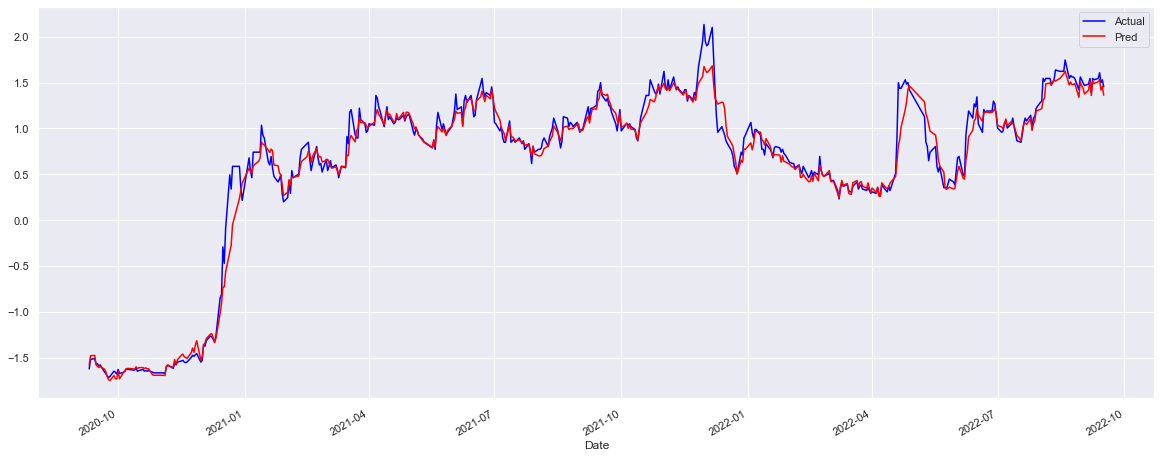

In [17]:
predictions['Actual'].plot(figsize=(20,8), legend=True, color='blue')
predictions['Pred'].plot(legend=True, color='red', figsize=(20,8))

### Evaluation

**Inverse transform scaled Close price**

In [18]:
from joblib import load

In [19]:
close_scaler = load('../feature_engineering/isat_close_scaler.bin')

In [20]:
inversed_pred = close_scaler.inverse_transform(np.array(predictions['Pred']).reshape(-1,1))
inversed_act = close_scaler.inverse_transform(np.array(predictions['Actual']).reshape(-1,1))

In [21]:
inversed = pd.DataFrame(inversed_pred)
inversed['Actual'] = inversed_act
inversed.rename({0:'Pred'}, axis=1, inplace=True)
inversed.index = test_labels.index
inversed.head(2)

,Pred,Actual
Date,,
2020-09-10,2150.087646,2080.0
2020-09-11,2313.684570,2250.0


**Plot error distribution**

In [22]:
def plotErrorHist(inversed_df):
    """
    Function to plot error histogram
    """
    error = inversed_df['Pred'] - inversed_df['Actual']
    plt.figure(figsize=(10,6))
    plt.hist(error, bins=25)
    plt.xlabel('Prediction Error [Close]')
    _ = plt.ylabel('Count')

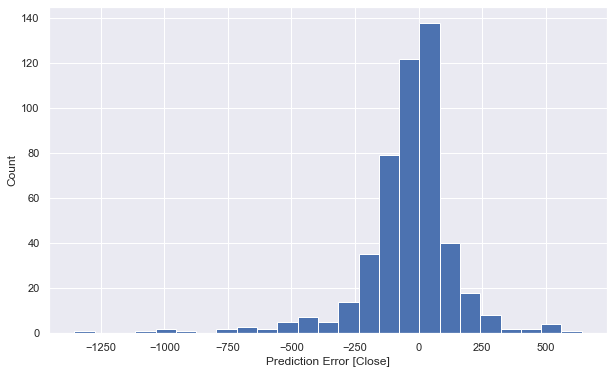

In [23]:
plotErrorHist(inversed)

**RMSE**

In [24]:
from statsmodels.tools.eval_measures import rmse

In [25]:
rmse(inversed['Pred'], inversed['Actual'])

203.472153707565

**MAPE**

In [26]:
# mape
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [27]:
mape(inversed['Actual'], inversed['Pred'])

2.2044146410085528

**R-squared**

In [28]:
from sklearn.metrics import r2_score

In [29]:
r2_score(inversed['Actual'], inversed['Pred'])

0.9817005393477796

### Save Model

In [30]:
# Save model
model.save_model('./models/isat.json')